# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory data analysis

### Questions

Does the gender affects on the descition to cancle the service?

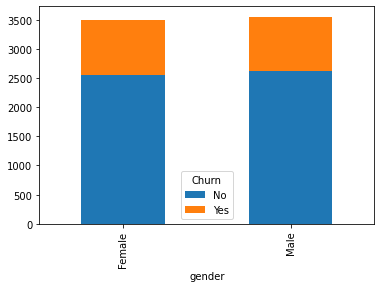

In [6]:
plot = data.groupby(['gender','Churn']).size().reset_index().pivot(columns='Churn', index='gender', values=0)
plot.plot(kind='bar', stacked=True, )

We see no difference between genders when it comes to cancel the service

Senior Citizens tend to cancel more?

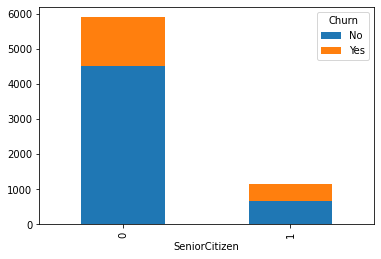

In [7]:
plot = data.groupby(['SeniorCitizen','Churn']).size().reset_index().pivot(columns='Churn', index='SeniorCitizen', values=0)
plot.plot(kind='bar', stacked=True)

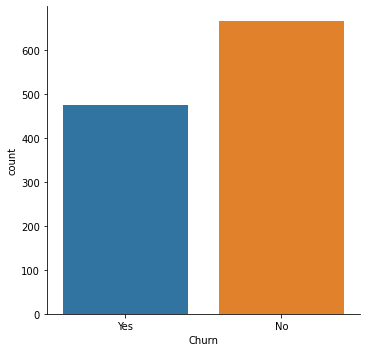

In [8]:
sns.catplot(x='Churn', kind='count',data=data[['SeniorCitizen','Churn']][data.SeniorCitizen == 1])

We can observe that although there are not many Seniors Citizens in the data set, a considerable part of them cancel their contracts. Let's make a deeper analysis here

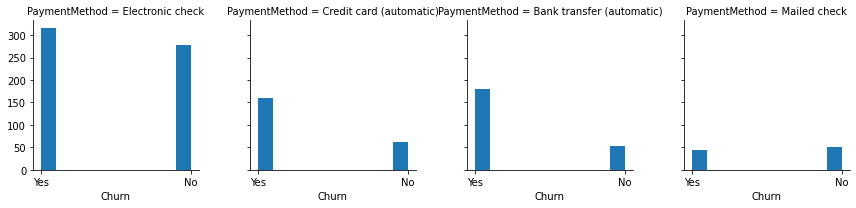

In [9]:
g = sns.FacetGrid(data[data.SeniorCitizen ==1], col='PaymentMethod')
g = g.map(plt.hist, 'Churn')

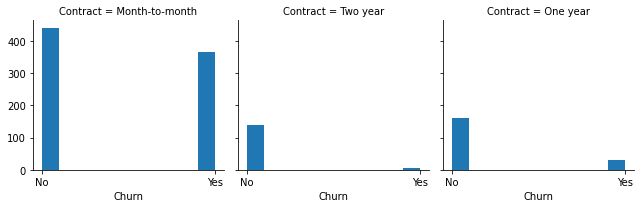

In [10]:
g = sns.FacetGrid(data[data.SeniorCitizen ==1], col='Contract')
g = g.map(plt.hist, 'Churn')

We can already start to think that the feature PaymentMethod and Contract are very powerful to this analysis

Let's see what happend with this two feature but with no Senior Citizens

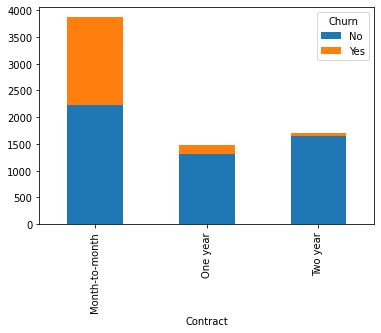

In [11]:
plot = data.groupby(['Contract','Churn']).size().reset_index().pivot(columns='Churn', index='Contract', values=0)
plot.plot(kind='bar', stacked=True)

Here is a huge finding, as we can see the most part of the churn is by month-to-month contract customers. This was one of my theories before analyzing the data and came up to be true.

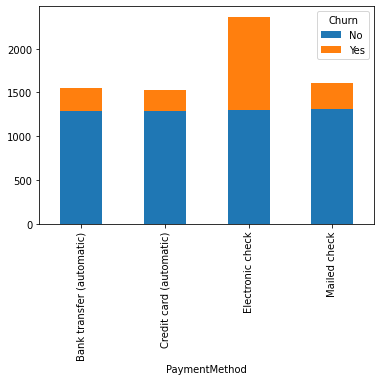

In [12]:
plot = data.groupby(['PaymentMethod','Churn']).size().reset_index().pivot(columns='Churn', index='PaymentMethod', values=0)
plot.plot(kind='bar', stacked=True)

Another interesting finding here, the electronic check payment method was the one with most considerable churn rate.

In [13]:
rates = pd.DataFrame([], columns=['Method', 'Positive Rate', 'Negative Rate'])

In [14]:
for method in data['PaymentMethod'].value_counts().index.tolist():
    negative_rate = data[data.PaymentMethod == method]['Churn'].value_counts()[0] / data['Churn'].shape[0]
    positive_rate = data[data.PaymentMethod == method]['Churn'].value_counts()[1] / data['Churn'].shape[0]
    rate = {'Method': method, 'Positive Rate': positive_rate, 'Negative Rate': negative_rate}
    rates = rates.append(pd.Series(rate), ignore_index=True)

In [15]:
rates

Method  Positive Rate  Negative Rate
0           Electronic check       0.152066       0.183729
1               Mailed check       0.043731       0.185148
2  Bank transfer (automatic)       0.036632       0.182593
3    Credit card (automatic)       0.032941       0.183161

Make a quick look to the positive rates of the other three, significantly lower than Electronic Check

Next we want to analyze the tenure which stands for how long the clients have been actively paying the service

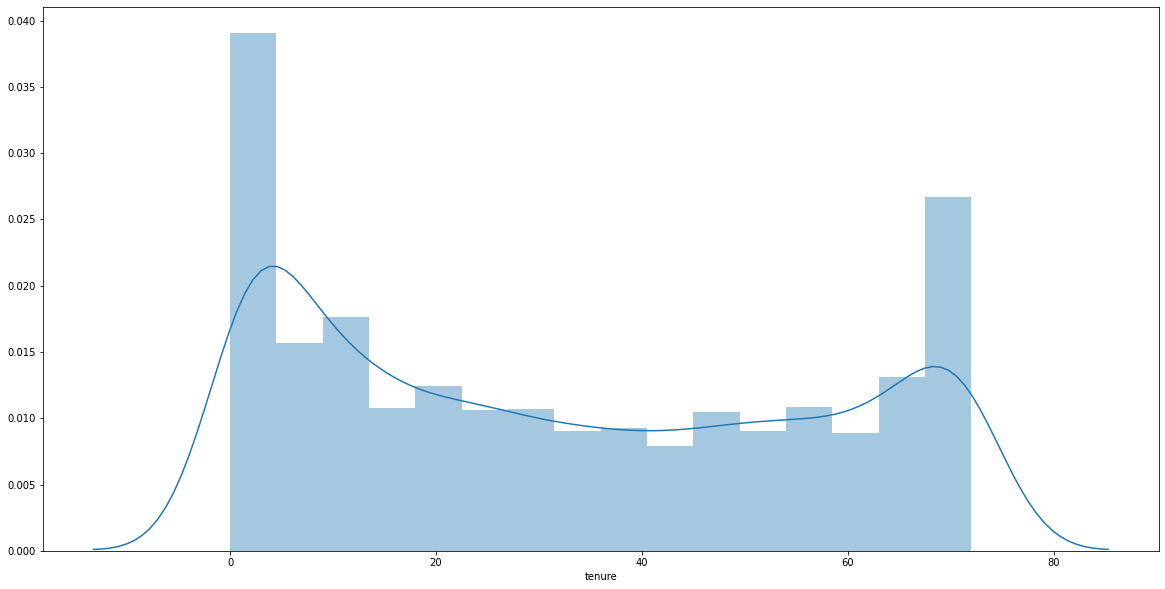

In [16]:
plt.figure(figsize=(20,10))
sns.distplot(data['tenure'])

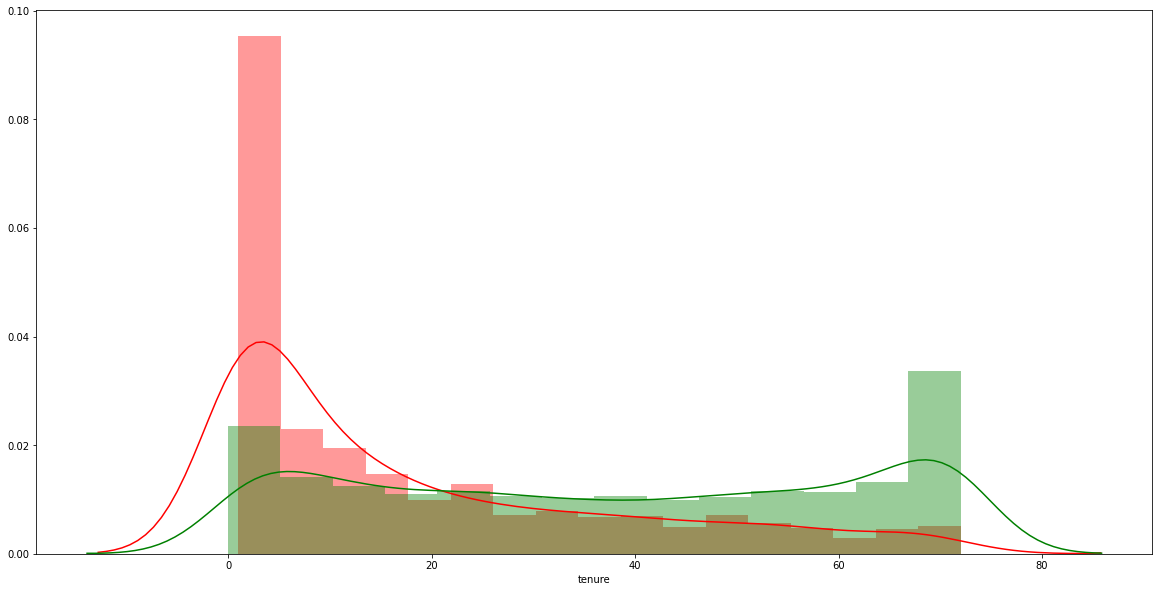

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(data['tenure'][data.Churn == 'Yes'], color='red')
sns.distplot(data['tenure'][data.Churn == 'No'], color='green')

An interesting observation here, the red ones showing the tenure of the clients that churned. And in green the ones that did not. We can see a large amount of clients who churned in the first months and the ones who are clients for more than a year maintaing the service.

Taking a look to the Dependents and Partners of the clients, we can see that people who has not a partner or dependents tend to have a greater churn rate. This could be because of the freedom of not being attached to anyone 

<Figure size 720x720 with 0 Axes>

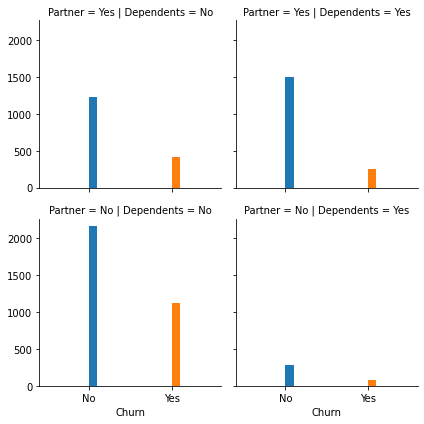

In [18]:
plt.figure(figsize=(10,10))
g = sns.FacetGrid(data, col='Dependents', row='Partner', hue='Churn')
g = g.map(plt.hist, 'Churn')

Now another theory I had in mind was the fact that if the client is recieving a paper billing instead of a paperless it would have a greater churn rate but the following plot prove me wrong.

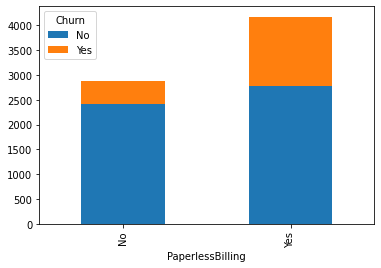

In [19]:
plot = data.groupby(['PaperlessBilling','Churn']).size().reset_index().pivot(columns='Churn', index='PaperlessBilling', values=0)
plot.plot(kind='bar', stacked=True)

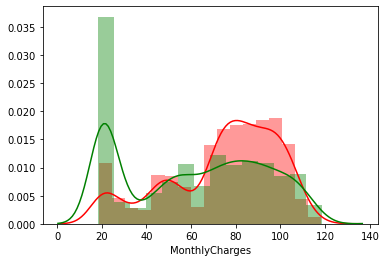

In [20]:
sns.distplot(data['MonthlyCharges'][data.Churn == 'Yes'], color= 'red')
sns.distplot(data['MonthlyCharges'][data.Churn == 'No'], color ='green')

Looking at the monthly charges of the clients we can see that at lower charges, lower the churn rate too but this could be biased because we are not counting how many services the client had contracted.

Now that our basic EDA has ended we are going to create a baseline model for all the features 

# Data Modeling

We need to map all our data since XGBoost and LightGBM need the features as number input. On the other hand Catboost do not need the features to be numbers.

In [21]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [22]:
def map_categorical_ft(data, features):
    map_features = []
    for feature in features:
        mapping = {}
        idx = data[feature].value_counts().index.tolist()
        for index,value in enumerate(idx):
            mapping.update({value: index})  
        data[feature+'_ctg'] = data[feature].map(mapping)
        map_features.append(feature+'_ctg')
    return map_features


In [23]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [24]:
cat_features = map_categorical_ft(data, cat_features)

features = cat_features + ['tenure','MonthlyCharges', 'TotalCharges']

In [25]:
data['TotalCharges'] = (data['tenure'] * data['MonthlyCharges'] ) - data['MonthlyCharges']

In [26]:
data['Churn'] = data['Churn'].map({'Yes': 1,
                                   'No': 0})

In [27]:
data_mod = data.copy()

## Creating a baseline model

Since this is a classification problem, we are going to train three different algorithms and see the performance of each one. Catboost, XGBoost and LightGBM

### Importing all the models

In [89]:
from catboost import CatBoostClassifier
from catboost import Pool
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features], data['Churn'], 
                                                        test_size=0.1)

clfs = [CatBoostClassifier(task_type = 'GPU', devices = '0:1'),
          xgb.XGBClassifier(),
          lgb.LGBMClassifier(),
          RandomForestClassifier()
         ]

for cls in clfs:
    cls.fit(X_train, y_train)
    

Learning rate set to 0.030456
0:	learn: 0.6713081	total: 30ms	remaining: 29.9s
1:	learn: 0.6512009	total: 55.5ms	remaining: 27.7s
2:	learn: 0.6353123	total: 68.3ms	remaining: 22.7s
3:	learn: 0.6185546	total: 95.3ms	remaining: 23.7s
4:	learn: 0.6033909	total: 123ms	remaining: 24.4s
5:	learn: 0.5892507	total: 160ms	remaining: 26.5s
6:	learn: 0.5763685	total: 188ms	remaining: 26.7s
7:	learn: 0.5647967	total: 209ms	remaining: 25.9s
8:	learn: 0.5541701	total: 229ms	remaining: 25.2s
9:	learn: 0.5440019	total: 245ms	remaining: 24.2s
10:	learn: 0.5364481	total: 255ms	remaining: 22.9s
11:	learn: 0.5282861	total: 265ms	remaining: 21.8s
12:	learn: 0.5202989	total: 286ms	remaining: 21.7s
13:	learn: 0.5136834	total: 306ms	remaining: 21.5s
14:	learn: 0.5086965	total: 317ms	remaining: 20.8s
15:	learn: 0.5019273	total: 339ms	remaining: 20.9s
16:	learn: 0.4982061	total: 349ms	remaining: 20.2s
17:	learn: 0.4931269	total: 358ms	remaining: 19.6s
18:	learn: 0.4877091	total: 382ms	remaining: 19.7s
19:	learn

169:	learn: 0.3949383	total: 3.33s	remaining: 16.3s
170:	learn: 0.3946509	total: 3.36s	remaining: 16.3s
171:	learn: 0.3945799	total: 3.38s	remaining: 16.3s
172:	learn: 0.3945065	total: 3.4s	remaining: 16.2s
173:	learn: 0.3944202	total: 3.42s	remaining: 16.2s
174:	learn: 0.3943688	total: 3.43s	remaining: 16.2s
175:	learn: 0.3941533	total: 3.45s	remaining: 16.2s
176:	learn: 0.3940504	total: 3.47s	remaining: 16.1s
177:	learn: 0.3940329	total: 3.48s	remaining: 16.1s
178:	learn: 0.3940229	total: 3.49s	remaining: 16s
179:	learn: 0.3939523	total: 3.51s	remaining: 16s
180:	learn: 0.3939321	total: 3.53s	remaining: 16s
181:	learn: 0.3938637	total: 3.56s	remaining: 16s
182:	learn: 0.3938193	total: 3.57s	remaining: 16s
183:	learn: 0.3937696	total: 3.58s	remaining: 15.9s
184:	learn: 0.3937315	total: 3.61s	remaining: 15.9s
185:	learn: 0.3936911	total: 3.63s	remaining: 15.9s
186:	learn: 0.3935737	total: 3.66s	remaining: 15.9s
187:	learn: 0.3935369	total: 3.68s	remaining: 15.9s
188:	learn: 0.3935013	t

330:	learn: 0.3852806	total: 6.52s	remaining: 13.2s
331:	learn: 0.3852764	total: 6.53s	remaining: 13.1s
332:	learn: 0.3852683	total: 6.54s	remaining: 13.1s
333:	learn: 0.3852655	total: 6.56s	remaining: 13.1s
334:	learn: 0.3851920	total: 6.58s	remaining: 13.1s
335:	learn: 0.3851623	total: 6.6s	remaining: 13s
336:	learn: 0.3851568	total: 6.61s	remaining: 13s
337:	learn: 0.3851516	total: 6.62s	remaining: 13s
338:	learn: 0.3850669	total: 6.64s	remaining: 13s
339:	learn: 0.3849907	total: 6.66s	remaining: 12.9s
340:	learn: 0.3849866	total: 6.67s	remaining: 12.9s
341:	learn: 0.3849863	total: 6.68s	remaining: 12.9s
342:	learn: 0.3849402	total: 6.7s	remaining: 12.8s
343:	learn: 0.3848895	total: 6.72s	remaining: 12.8s
344:	learn: 0.3848506	total: 6.74s	remaining: 12.8s
345:	learn: 0.3847063	total: 6.77s	remaining: 12.8s
346:	learn: 0.3846484	total: 6.79s	remaining: 12.8s
347:	learn: 0.3845692	total: 6.81s	remaining: 12.8s
348:	learn: 0.3844963	total: 6.83s	remaining: 12.7s
349:	learn: 0.3844289	

498:	learn: 0.3793034	total: 9.85s	remaining: 9.89s
499:	learn: 0.3792998	total: 9.86s	remaining: 9.86s
500:	learn: 0.3792909	total: 9.88s	remaining: 9.84s
501:	learn: 0.3792849	total: 9.91s	remaining: 9.83s
502:	learn: 0.3792715	total: 9.93s	remaining: 9.81s
503:	learn: 0.3792713	total: 9.94s	remaining: 9.78s
504:	learn: 0.3792713	total: 9.95s	remaining: 9.75s
505:	learn: 0.3792604	total: 9.97s	remaining: 9.73s
506:	learn: 0.3792597	total: 9.98s	remaining: 9.7s
507:	learn: 0.3792468	total: 9.98s	remaining: 9.67s
508:	learn: 0.3792468	total: 9.99s	remaining: 9.64s
509:	learn: 0.3792451	total: 10s	remaining: 9.62s
510:	learn: 0.3792450	total: 10s	remaining: 9.58s
511:	learn: 0.3791905	total: 10s	remaining: 9.57s
512:	learn: 0.3790882	total: 10.1s	remaining: 9.55s
513:	learn: 0.3790623	total: 10.1s	remaining: 9.53s
514:	learn: 0.3790166	total: 10.1s	remaining: 9.52s
515:	learn: 0.3788936	total: 10.1s	remaining: 9.5s
516:	learn: 0.3788768	total: 10.2s	remaining: 9.48s
517:	learn: 0.378833

658:	learn: 0.3754917	total: 12.6s	remaining: 6.51s
659:	learn: 0.3754716	total: 12.6s	remaining: 6.49s
660:	learn: 0.3754449	total: 12.6s	remaining: 6.48s
661:	learn: 0.3753835	total: 12.7s	remaining: 6.46s
662:	learn: 0.3753693	total: 12.7s	remaining: 6.44s
663:	learn: 0.3753688	total: 12.7s	remaining: 6.42s
664:	learn: 0.3753449	total: 12.7s	remaining: 6.4s
665:	learn: 0.3753166	total: 12.7s	remaining: 6.38s
666:	learn: 0.3752557	total: 12.7s	remaining: 6.36s
667:	learn: 0.3752536	total: 12.8s	remaining: 6.34s
668:	learn: 0.3752489	total: 12.8s	remaining: 6.32s
669:	learn: 0.3751779	total: 12.8s	remaining: 6.3s
670:	learn: 0.3750862	total: 12.8s	remaining: 6.29s
671:	learn: 0.3750861	total: 12.8s	remaining: 6.26s
672:	learn: 0.3750825	total: 12.9s	remaining: 6.24s
673:	learn: 0.3750447	total: 12.9s	remaining: 6.22s
674:	learn: 0.3749984	total: 12.9s	remaining: 6.21s
675:	learn: 0.3749599	total: 12.9s	remaining: 6.19s
676:	learn: 0.3748572	total: 12.9s	remaining: 6.17s
677:	learn: 0.

822:	learn: 0.3703657	total: 15.5s	remaining: 3.34s
823:	learn: 0.3703276	total: 15.6s	remaining: 3.32s
824:	learn: 0.3703232	total: 15.6s	remaining: 3.3s
825:	learn: 0.3702819	total: 15.6s	remaining: 3.29s
826:	learn: 0.3702755	total: 15.6s	remaining: 3.27s
827:	learn: 0.3702753	total: 15.6s	remaining: 3.25s
828:	learn: 0.3702752	total: 15.6s	remaining: 3.23s
829:	learn: 0.3702749	total: 15.6s	remaining: 3.2s
830:	learn: 0.3702695	total: 15.7s	remaining: 3.19s
831:	learn: 0.3702563	total: 15.7s	remaining: 3.17s
832:	learn: 0.3702463	total: 15.7s	remaining: 3.15s
833:	learn: 0.3702078	total: 15.7s	remaining: 3.13s
834:	learn: 0.3701381	total: 15.7s	remaining: 3.11s
835:	learn: 0.3700975	total: 15.8s	remaining: 3.09s
836:	learn: 0.3700770	total: 15.8s	remaining: 3.07s
837:	learn: 0.3700657	total: 15.8s	remaining: 3.06s
838:	learn: 0.3700462	total: 15.8s	remaining: 3.04s
839:	learn: 0.3699684	total: 15.8s	remaining: 3.02s
840:	learn: 0.3699594	total: 15.9s	remaining: 3s
841:	learn: 0.369

991:	learn: 0.3663564	total: 18.5s	remaining: 149ms
992:	learn: 0.3663531	total: 18.5s	remaining: 130ms
993:	learn: 0.3663524	total: 18.5s	remaining: 112ms
994:	learn: 0.3663499	total: 18.5s	remaining: 93.1ms
995:	learn: 0.3663498	total: 18.5s	remaining: 74.5ms
996:	learn: 0.3663431	total: 18.6s	remaining: 55.9ms
997:	learn: 0.3663415	total: 18.6s	remaining: 37.2ms
998:	learn: 0.3663409	total: 18.6s	remaining: 18.6ms
999:	learn: 0.3663345	total: 18.6s	remaining: 0us


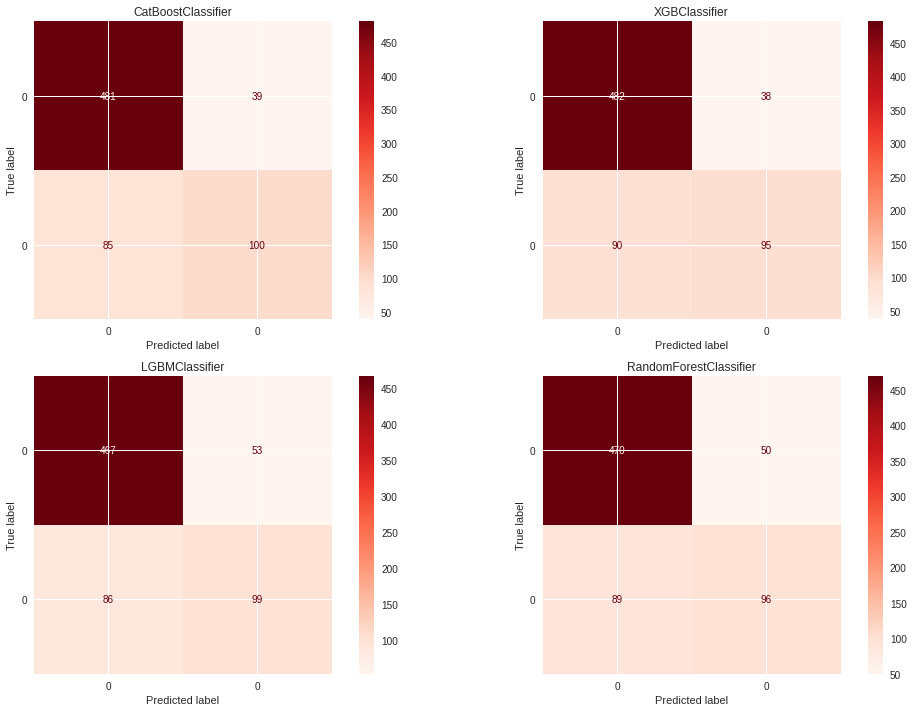

In [90]:
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(clfs, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Reds',
                         display_labels=data.Churn)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [91]:
from sklearn.metrics import accuracy_score, auc,roc_auc_score, recall_score, log_loss, roc_curve, f1_score,precision_score
metrics = pd.DataFrame([], columns=['Name','Accuracy','AUC Score','Precision','Recall','F1-Score','Logloss'])

for cls in clfs:
    stats = {}
    prediction = cls.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, prediction, pos_label=1)
    stats.update({'Accuracy': accuracy_score(y_test, prediction),
                  'Name': type(cls).__name__ ,
                 'Recall' : recall_score(y_test, prediction),
                 'F1-Score': f1_score(y_test, prediction),
                 'AUC Score': roc_auc_score(y_test, prediction),
                 'Logloss': log_loss(y_test,prediction),
                 'Precision': precision_score(y_test,prediction)})
    metrics = metrics.append(stats, ignore_index=True)
        

In [92]:
metrics

Name  Accuracy  AUC Score  Precision    Recall  F1-Score  \
0      CatBoostClassifier  0.824113   0.732770   0.719424  0.540541  0.617284   
1           XGBClassifier  0.818440   0.720218   0.714286  0.513514  0.597484   
2          LGBMClassifier  0.802837   0.716606   0.651316  0.535135  0.587537   
3  RandomForestClassifier  0.802837   0.711383   0.657534  0.518919  0.580060   

    Logloss  
0  6.074950  
1  6.270913  
2  6.809833  
3  6.809830

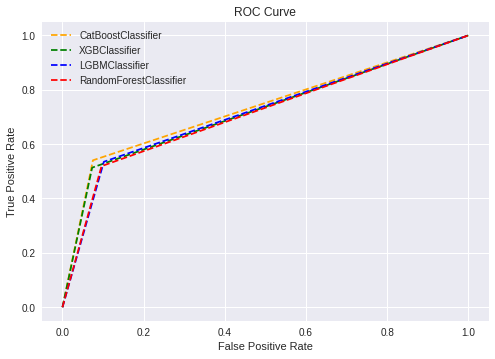

In [93]:
colors = ['orange','green','blue','red']
plt.style.use('seaborn')
for idx, cls in enumerate(clfs):
    prediction = cls.predict(X_test)
    fpr, tpr , threshold = roc_curve(y_test, prediction)
    plt.plot(fpr, tpr, linestyle='--', color=colors[idx],
                 label=type(cls).__name__)
    
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

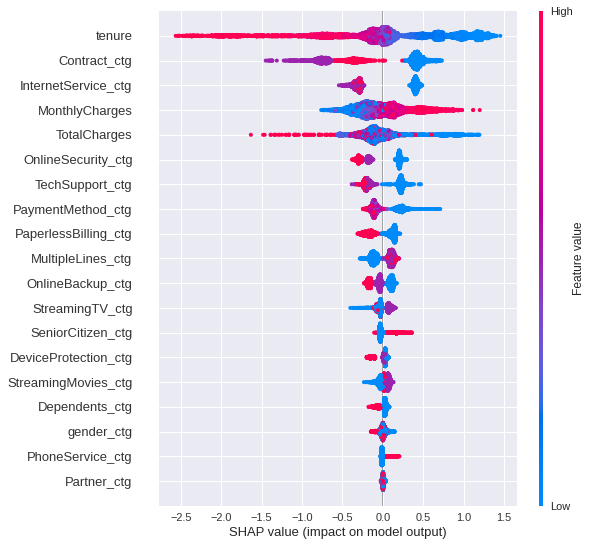

In [94]:
import shap


shap_values = clfs[0].get_feature_importance(Pool(X_train,y_train), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X_train)

In [95]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cat_params = { 'learning_rate' : [0.01,0.02,0.05],
               'eval_metric' : ['AUC'],
               'depth': [1,3,5],
               'random_seed' : [1],
               'od_type' : ['Iter'],
               'od_wait' : [500],
               'grow_policy' : ['Lossguide'],
               'min_data_in_leaf' : [2,5,8,12,24,30],
               'max_leaves' : [24,32]
             }


xgb_params = { 'learning_rate' : [0.01,0.02,0.05],
               'eval_metric' : ['auc'],
               'grow_policy' : ['lossguide'],
               'max_depth' : [1,3,5],
               'max_leaves': [24,32],
               'subsample' : [0,1]
    
}

lgb_params = { 'learning_rate' : [0.01,0.02,0.05],
               'max_depth' : [1,3,5],
               'min_data_in_leaf' : [2,5,8,12,24,30]
}

rnd_params = { 'criterion': ['gini','entropy'],
               'max_depth' : [1,3,5],
               'min_samples_leaf' : [2,5,8,12,24,30]
    
}

param_grids = [cat_params,xgb_params,lgb_params,rnd_params]

In [ ]:
best_params = {}
clfs = [CatBoostClassifier(task_type = 'GPU', devices = '0:1'),
          xgb.XGBClassifier(),
          lgb.LGBMClassifier(),
          RandomForestClassifier()
         ]
for idx,model in enumerate(clfs):
    print('Next model')
    gs = GridSearchCV(model, param_grid=param_grids[idx], cv=3, refit=True)
    gs.fit(X_train[features],y_train)
    best_params.update({type(model).__name__ : gs.best_params_})
    print(best_params)
    
    

Next model
0:	learn: 0.7310193	total: 2.57ms	remaining: 2.57s
1:	learn: 0.7310193	total: 4.9ms	remaining: 2.44s
2:	learn: 0.7310193	total: 6.82ms	remaining: 2.27s
3:	learn: 0.7310193	total: 8.78ms	remaining: 2.19s
4:	learn: 0.7310193	total: 10.9ms	remaining: 2.16s
5:	learn: 0.7310193	total: 16.3ms	remaining: 2.7s
6:	learn: 0.7310193	total: 19.9ms	remaining: 2.82s
7:	learn: 0.7310193	total: 22.6ms	remaining: 2.8s
8:	learn: 0.7310193	total: 24.5ms	remaining: 2.7s
9:	learn: 0.7876453	total: 26.4ms	remaining: 2.62s
10:	learn: 0.7876453	total: 28.3ms	remaining: 2.55s
11:	learn: 0.7876453	total: 30.3ms	remaining: 2.49s
12:	learn: 0.7876453	total: 32.3ms	remaining: 2.45s
13:	learn: 0.7876453	total: 34.6ms	remaining: 2.44s
14:	learn: 0.7876453	total: 36.6ms	remaining: 2.4s
15:	learn: 0.7876453	total: 39.3ms	remaining: 2.42s
16:	learn: 0.7876453	total: 43ms	remaining: 2.49s
17:	learn: 0.7876453	total: 46.4ms	remaining: 2.53s
18:	learn: 0.7876453	total: 49.2ms	remaining: 2.54s
19:	learn: 0.80363

175:	learn: 0.8416863	total: 475ms	remaining: 2.22s
176:	learn: 0.8416843	total: 481ms	remaining: 2.24s
177:	learn: 0.8417546	total: 483ms	remaining: 2.23s
178:	learn: 0.8417426	total: 485ms	remaining: 2.23s
179:	learn: 0.8418359	total: 487ms	remaining: 2.22s
180:	learn: 0.8419309	total: 497ms	remaining: 2.25s
181:	learn: 0.8419013	total: 501ms	remaining: 2.25s
182:	learn: 0.8418990	total: 503ms	remaining: 2.25s
183:	learn: 0.8419524	total: 507ms	remaining: 2.25s
184:	learn: 0.8421011	total: 509ms	remaining: 2.24s
185:	learn: 0.8421336	total: 511ms	remaining: 2.24s
186:	learn: 0.8421071	total: 515ms	remaining: 2.24s
187:	learn: 0.8420822	total: 518ms	remaining: 2.24s
188:	learn: 0.8421427	total: 520ms	remaining: 2.23s
189:	learn: 0.8422128	total: 533ms	remaining: 2.27s
190:	learn: 0.8422036	total: 535ms	remaining: 2.27s
191:	learn: 0.8421898	total: 540ms	remaining: 2.27s
192:	learn: 0.8421525	total: 543ms	remaining: 2.27s
193:	learn: 0.8421505	total: 547ms	remaining: 2.27s
194:	learn: 

365:	learn: 0.8455414	total: 1.06s	remaining: 1.83s
366:	learn: 0.8455971	total: 1.06s	remaining: 1.83s
367:	learn: 0.8455549	total: 1.06s	remaining: 1.83s
368:	learn: 0.8456275	total: 1.07s	remaining: 1.82s
369:	learn: 0.8456353	total: 1.07s	remaining: 1.82s
370:	learn: 0.8456993	total: 1.07s	remaining: 1.81s
371:	learn: 0.8457450	total: 1.07s	remaining: 1.81s
372:	learn: 0.8457421	total: 1.07s	remaining: 1.81s
373:	learn: 0.8457355	total: 1.08s	remaining: 1.8s
374:	learn: 0.8457639	total: 1.08s	remaining: 1.8s
375:	learn: 0.8457959	total: 1.08s	remaining: 1.8s
376:	learn: 0.8458143	total: 1.08s	remaining: 1.79s
377:	learn: 0.8458341	total: 1.09s	remaining: 1.79s
378:	learn: 0.8458605	total: 1.09s	remaining: 1.79s
379:	learn: 0.8458566	total: 1.09s	remaining: 1.78s
380:	learn: 0.8459008	total: 1.09s	remaining: 1.78s
381:	learn: 0.8459386	total: 1.1s	remaining: 1.77s
382:	learn: 0.8459162	total: 1.1s	remaining: 1.77s
383:	learn: 0.8458915	total: 1.1s	remaining: 1.76s
384:	learn: 0.8459

571:	learn: 0.8490928	total: 1.64s	remaining: 1.23s
572:	learn: 0.8490986	total: 1.64s	remaining: 1.22s
573:	learn: 0.8490799	total: 1.64s	remaining: 1.22s
574:	learn: 0.8490745	total: 1.65s	remaining: 1.22s
575:	learn: 0.8490811	total: 1.65s	remaining: 1.21s
576:	learn: 0.8491167	total: 1.65s	remaining: 1.21s
577:	learn: 0.8491285	total: 1.65s	remaining: 1.21s
578:	learn: 0.8491195	total: 1.66s	remaining: 1.2s
579:	learn: 0.8491388	total: 1.66s	remaining: 1.2s
580:	learn: 0.8491526	total: 1.66s	remaining: 1.2s
581:	learn: 0.8491440	total: 1.66s	remaining: 1.2s
582:	learn: 0.8491442	total: 1.67s	remaining: 1.19s
583:	learn: 0.8491661	total: 1.67s	remaining: 1.19s
584:	learn: 0.8492038	total: 1.67s	remaining: 1.19s
585:	learn: 0.8492466	total: 1.67s	remaining: 1.18s
586:	learn: 0.8492707	total: 1.68s	remaining: 1.18s
587:	learn: 0.8492934	total: 1.68s	remaining: 1.18s
588:	learn: 0.8493052	total: 1.68s	remaining: 1.17s
589:	learn: 0.8493665	total: 1.68s	remaining: 1.17s
590:	learn: 0.84

785:	learn: 0.8516580	total: 2.22s	remaining: 606ms
786:	learn: 0.8516701	total: 2.23s	remaining: 603ms
787:	learn: 0.8516842	total: 2.24s	remaining: 602ms
788:	learn: 0.8516914	total: 2.24s	remaining: 599ms
789:	learn: 0.8517143	total: 2.24s	remaining: 595ms
790:	learn: 0.8517249	total: 2.24s	remaining: 593ms
791:	learn: 0.8517453	total: 2.24s	remaining: 589ms
792:	learn: 0.8517516	total: 2.25s	remaining: 587ms
793:	learn: 0.8517528	total: 2.25s	remaining: 584ms
794:	learn: 0.8517648	total: 2.25s	remaining: 581ms
795:	learn: 0.8517723	total: 2.25s	remaining: 578ms
796:	learn: 0.8517740	total: 2.26s	remaining: 575ms
797:	learn: 0.8518007	total: 2.26s	remaining: 572ms
798:	learn: 0.8518102	total: 2.26s	remaining: 570ms
799:	learn: 0.8518214	total: 2.27s	remaining: 566ms
800:	learn: 0.8518247	total: 2.27s	remaining: 564ms
801:	learn: 0.8518278	total: 2.27s	remaining: 560ms
802:	learn: 0.8518299	total: 2.27s	remaining: 558ms
803:	learn: 0.8518408	total: 2.27s	remaining: 555ms
804:	learn: 

955:	learn: 0.8529866	total: 2.83s	remaining: 130ms
956:	learn: 0.8530015	total: 2.83s	remaining: 127ms
957:	learn: 0.8530045	total: 2.84s	remaining: 124ms
958:	learn: 0.8530152	total: 2.84s	remaining: 122ms
959:	learn: 0.8530261	total: 2.85s	remaining: 119ms
960:	learn: 0.8530367	total: 2.85s	remaining: 116ms
961:	learn: 0.8530427	total: 2.86s	remaining: 113ms
962:	learn: 0.8530616	total: 2.86s	remaining: 110ms
963:	learn: 0.8530771	total: 2.86s	remaining: 107ms
964:	learn: 0.8530843	total: 2.87s	remaining: 104ms
965:	learn: 0.8530941	total: 2.87s	remaining: 101ms
966:	learn: 0.8530993	total: 2.88s	remaining: 98.1ms
967:	learn: 0.8530929	total: 2.88s	remaining: 95.2ms
968:	learn: 0.8530883	total: 2.88s	remaining: 92.2ms
969:	learn: 0.8530843	total: 2.89s	remaining: 89.3ms
970:	learn: 0.8530996	total: 2.89s	remaining: 86.3ms
971:	learn: 0.8531093	total: 2.89s	remaining: 83.4ms
972:	learn: 0.8531073	total: 2.9s	remaining: 80.4ms
973:	learn: 0.8531239	total: 2.9s	remaining: 77.5ms
974:	l

155:	learn: 0.8373465	total: 391ms	remaining: 2.12s
156:	learn: 0.8373005	total: 395ms	remaining: 2.12s
157:	learn: 0.8373407	total: 400ms	remaining: 2.13s
158:	learn: 0.8373192	total: 404ms	remaining: 2.14s
159:	learn: 0.8372807	total: 408ms	remaining: 2.14s
160:	learn: 0.8373439	total: 409ms	remaining: 2.13s
161:	learn: 0.8373712	total: 411ms	remaining: 2.13s
162:	learn: 0.8374008	total: 416ms	remaining: 2.13s
163:	learn: 0.8374140	total: 419ms	remaining: 2.13s
164:	learn: 0.8373074	total: 420ms	remaining: 2.13s
165:	learn: 0.8372824	total: 422ms	remaining: 2.12s
166:	learn: 0.8372819	total: 424ms	remaining: 2.11s
167:	learn: 0.8372974	total: 426ms	remaining: 2.11s
168:	learn: 0.8371299	total: 428ms	remaining: 2.1s
169:	learn: 0.8371497	total: 431ms	remaining: 2.1s
170:	learn: 0.8371520	total: 435ms	remaining: 2.11s
171:	learn: 0.8371359	total: 436ms	remaining: 2.1s
172:	learn: 0.8370621	total: 438ms	remaining: 2.09s
173:	learn: 0.8371207	total: 440ms	remaining: 2.09s
174:	learn: 0.8

374:	learn: 0.8423923	total: 977ms	remaining: 1.63s
375:	learn: 0.8424567	total: 980ms	remaining: 1.63s
376:	learn: 0.8424946	total: 984ms	remaining: 1.63s
377:	learn: 0.8424946	total: 987ms	remaining: 1.62s
378:	learn: 0.8425596	total: 997ms	remaining: 1.63s
379:	learn: 0.8425246	total: 1s	remaining: 1.63s
380:	learn: 0.8425324	total: 1s	remaining: 1.63s
381:	learn: 0.8425361	total: 1s	remaining: 1.63s
382:	learn: 0.8425393	total: 1.01s	remaining: 1.62s
383:	learn: 0.8425499	total: 1.01s	remaining: 1.62s
384:	learn: 0.8425329	total: 1.01s	remaining: 1.61s
385:	learn: 0.8425542	total: 1.01s	remaining: 1.61s
386:	learn: 0.8425599	total: 1.02s	remaining: 1.61s
387:	learn: 0.8425398	total: 1.02s	remaining: 1.61s
388:	learn: 0.8425861	total: 1.02s	remaining: 1.61s
389:	learn: 0.8425832	total: 1.03s	remaining: 1.61s
390:	learn: 0.8425904	total: 1.03s	remaining: 1.61s
391:	learn: 0.8425807	total: 1.03s	remaining: 1.6s
392:	learn: 0.8425727	total: 1.03s	remaining: 1.6s
393:	learn: 0.8426172	t

541:	learn: 0.8452956	total: 1.36s	remaining: 1.15s
542:	learn: 0.8453121	total: 1.36s	remaining: 1.15s
543:	learn: 0.8453285	total: 1.37s	remaining: 1.15s
544:	learn: 0.8453644	total: 1.38s	remaining: 1.15s
545:	learn: 0.8454018	total: 1.38s	remaining: 1.15s
546:	learn: 0.8453857	total: 1.38s	remaining: 1.14s
547:	learn: 0.8453653	total: 1.38s	remaining: 1.14s
548:	learn: 0.8453639	total: 1.39s	remaining: 1.14s
549:	learn: 0.8453716	total: 1.39s	remaining: 1.13s
550:	learn: 0.8453733	total: 1.39s	remaining: 1.13s
551:	learn: 0.8453946	total: 1.39s	remaining: 1.13s
552:	learn: 0.8453742	total: 1.4s	remaining: 1.13s
553:	learn: 0.8454262	total: 1.4s	remaining: 1.13s
554:	learn: 0.8454288	total: 1.4s	remaining: 1.12s
555:	learn: 0.8454707	total: 1.4s	remaining: 1.12s
556:	learn: 0.8455235	total: 1.41s	remaining: 1.12s
557:	learn: 0.8455798	total: 1.41s	remaining: 1.11s
558:	learn: 0.8456022	total: 1.41s	remaining: 1.11s
559:	learn: 0.8455879	total: 1.41s	remaining: 1.11s
560:	learn: 0.84

733:	learn: 0.8480960	total: 1.94s	remaining: 703ms
734:	learn: 0.8481230	total: 1.95s	remaining: 703ms
735:	learn: 0.8481324	total: 1.96s	remaining: 702ms
736:	learn: 0.8481626	total: 1.96s	remaining: 700ms
737:	learn: 0.8481804	total: 1.96s	remaining: 697ms
738:	learn: 0.8481746	total: 1.97s	remaining: 695ms
739:	learn: 0.8482169	total: 1.97s	remaining: 692ms
740:	learn: 0.8482125	total: 1.97s	remaining: 690ms
741:	learn: 0.8482013	total: 1.98s	remaining: 689ms
742:	learn: 0.8482054	total: 1.98s	remaining: 686ms
743:	learn: 0.8482114	total: 1.99s	remaining: 684ms
744:	learn: 0.8482499	total: 1.99s	remaining: 681ms
745:	learn: 0.8482487	total: 1.99s	remaining: 679ms
746:	learn: 0.8482703	total: 2s	remaining: 676ms
747:	learn: 0.8482580	total: 2s	remaining: 673ms
748:	learn: 0.8482947	total: 2s	remaining: 670ms
749:	learn: 0.8483349	total: 2s	remaining: 668ms
750:	learn: 0.8483676	total: 2.01s	remaining: 665ms
751:	learn: 0.8483866	total: 2.01s	remaining: 663ms
752:	learn: 0.8484047	to

917:	learn: 0.8502568	total: 2.52s	remaining: 225ms
918:	learn: 0.8502593	total: 2.52s	remaining: 222ms
919:	learn: 0.8502775	total: 2.52s	remaining: 220ms
920:	learn: 0.8502820	total: 2.54s	remaining: 217ms
921:	learn: 0.8503108	total: 2.54s	remaining: 215ms
922:	learn: 0.8503064	total: 2.54s	remaining: 212ms
923:	learn: 0.8503064	total: 2.55s	remaining: 209ms
924:	learn: 0.8503110	total: 2.55s	remaining: 207ms
925:	learn: 0.8503277	total: 2.55s	remaining: 204ms
926:	learn: 0.8503285	total: 2.56s	remaining: 201ms
927:	learn: 0.8503303	total: 2.56s	remaining: 199ms
928:	learn: 0.8503475	total: 2.56s	remaining: 196ms
929:	learn: 0.8503444	total: 2.56s	remaining: 193ms
930:	learn: 0.8503705	total: 2.57s	remaining: 190ms
931:	learn: 0.8503906	total: 2.57s	remaining: 188ms
932:	learn: 0.8503803	total: 2.57s	remaining: 185ms
933:	learn: 0.8503937	total: 2.58s	remaining: 182ms
934:	learn: 0.8504084	total: 2.58s	remaining: 179ms
935:	learn: 0.8504173	total: 2.58s	remaining: 176ms
936:	learn: 

128:	learn: 0.8294811	total: 388ms	remaining: 2.62s
129:	learn: 0.8294512	total: 390ms	remaining: 2.61s
130:	learn: 0.8294504	total: 392ms	remaining: 2.6s
131:	learn: 0.8293069	total: 403ms	remaining: 2.65s
132:	learn: 0.8294073	total: 406ms	remaining: 2.65s
133:	learn: 0.8296091	total: 409ms	remaining: 2.65s
134:	learn: 0.8296338	total: 414ms	remaining: 2.65s
135:	learn: 0.8302688	total: 418ms	remaining: 2.66s
136:	learn: 0.8302060	total: 421ms	remaining: 2.65s
137:	learn: 0.8305199	total: 425ms	remaining: 2.65s
138:	learn: 0.8305242	total: 429ms	remaining: 2.66s
139:	learn: 0.8305222	total: 432ms	remaining: 2.65s
140:	learn: 0.8304528	total: 434ms	remaining: 2.64s
141:	learn: 0.8302292	total: 436ms	remaining: 2.63s
142:	learn: 0.8301784	total: 438ms	remaining: 2.62s
143:	learn: 0.8301962	total: 439ms	remaining: 2.61s
144:	learn: 0.8302737	total: 442ms	remaining: 2.6s
145:	learn: 0.8304030	total: 444ms	remaining: 2.59s
146:	learn: 0.8304030	total: 446ms	remaining: 2.59s
147:	learn: 0.

357:	learn: 0.8362707	total: 972ms	remaining: 1.74s
358:	learn: 0.8362784	total: 975ms	remaining: 1.74s
359:	learn: 0.8363146	total: 979ms	remaining: 1.74s
360:	learn: 0.8363298	total: 982ms	remaining: 1.74s
361:	learn: 0.8363450	total: 989ms	remaining: 1.74s
362:	learn: 0.8363438	total: 991ms	remaining: 1.74s
363:	learn: 0.8363341	total: 993ms	remaining: 1.73s
364:	learn: 0.8363335	total: 995ms	remaining: 1.73s
365:	learn: 0.8363542	total: 996ms	remaining: 1.73s
366:	learn: 0.8364268	total: 998ms	remaining: 1.72s
367:	learn: 0.8364265	total: 1s	remaining: 1.72s
368:	learn: 0.8364263	total: 1s	remaining: 1.72s
369:	learn: 0.8364072	total: 1s	remaining: 1.71s
370:	learn: 0.8364950	total: 1.01s	remaining: 1.71s
371:	learn: 0.8364898	total: 1.01s	remaining: 1.7s
372:	learn: 0.8364442	total: 1.01s	remaining: 1.7s
373:	learn: 0.8365113	total: 1.01s	remaining: 1.69s
374:	learn: 0.8365259	total: 1.01s	remaining: 1.69s
375:	learn: 0.8364972	total: 1.01s	remaining: 1.69s
376:	learn: 0.8365050	t

572:	learn: 0.8396787	total: 1.56s	remaining: 1.16s
573:	learn: 0.8397149	total: 1.56s	remaining: 1.16s
574:	learn: 0.8397201	total: 1.56s	remaining: 1.15s
575:	learn: 0.8397163	total: 1.56s	remaining: 1.15s
576:	learn: 0.8397327	total: 1.57s	remaining: 1.15s
577:	learn: 0.8397562	total: 1.57s	remaining: 1.15s
578:	learn: 0.8397709	total: 1.57s	remaining: 1.15s
579:	learn: 0.8397780	total: 1.58s	remaining: 1.14s
580:	learn: 0.8397597	total: 1.58s	remaining: 1.14s
581:	learn: 0.8397780	total: 1.58s	remaining: 1.14s
582:	learn: 0.8397803	total: 1.58s	remaining: 1.13s
583:	learn: 0.8397990	total: 1.59s	remaining: 1.13s
584:	learn: 0.8398059	total: 1.59s	remaining: 1.13s
585:	learn: 0.8398283	total: 1.59s	remaining: 1.12s
586:	learn: 0.8398326	total: 1.59s	remaining: 1.12s
587:	learn: 0.8398452	total: 1.6s	remaining: 1.12s
588:	learn: 0.8398656	total: 1.6s	remaining: 1.11s
589:	learn: 0.8398922	total: 1.6s	remaining: 1.11s
590:	learn: 0.8399166	total: 1.6s	remaining: 1.11s
591:	learn: 0.83

772:	learn: 0.8420600	total: 2.14s	remaining: 628ms
773:	learn: 0.8420818	total: 2.15s	remaining: 627ms
774:	learn: 0.8420724	total: 2.15s	remaining: 624ms
775:	learn: 0.8420896	total: 2.15s	remaining: 621ms
776:	learn: 0.8420985	total: 2.15s	remaining: 619ms
777:	learn: 0.8421338	total: 2.16s	remaining: 616ms
778:	learn: 0.8421524	total: 2.16s	remaining: 614ms
779:	learn: 0.8421780	total: 2.17s	remaining: 611ms
780:	learn: 0.8421800	total: 2.17s	remaining: 609ms
781:	learn: 0.8422115	total: 2.17s	remaining: 606ms
782:	learn: 0.8422136	total: 2.18s	remaining: 604ms
783:	learn: 0.8422342	total: 2.18s	remaining: 601ms
784:	learn: 0.8422422	total: 2.18s	remaining: 598ms
785:	learn: 0.8422604	total: 2.19s	remaining: 596ms
786:	learn: 0.8422650	total: 2.19s	remaining: 594ms
787:	learn: 0.8422707	total: 2.2s	remaining: 591ms
788:	learn: 0.8422839	total: 2.2s	remaining: 589ms
789:	learn: 0.8422982	total: 2.21s	remaining: 586ms
790:	learn: 0.8422956	total: 2.21s	remaining: 584ms
791:	learn: 0.

953:	learn: 0.8438068	total: 2.72s	remaining: 131ms
954:	learn: 0.8437942	total: 2.72s	remaining: 128ms
955:	learn: 0.8438065	total: 2.73s	remaining: 125ms
956:	learn: 0.8438163	total: 2.73s	remaining: 123ms
957:	learn: 0.8438146	total: 2.73s	remaining: 120ms
958:	learn: 0.8438229	total: 2.73s	remaining: 117ms
959:	learn: 0.8438338	total: 2.74s	remaining: 114ms
960:	learn: 0.8438464	total: 2.74s	remaining: 111ms
961:	learn: 0.8438470	total: 2.74s	remaining: 108ms
962:	learn: 0.8438522	total: 2.75s	remaining: 106ms
963:	learn: 0.8438572	total: 2.75s	remaining: 103ms
964:	learn: 0.8438741	total: 2.75s	remaining: 99.8ms
965:	learn: 0.8438873	total: 2.76s	remaining: 97ms
966:	learn: 0.8438968	total: 2.76s	remaining: 94.1ms
967:	learn: 0.8439097	total: 2.77s	remaining: 91.4ms
968:	learn: 0.8439209	total: 2.77s	remaining: 88.6ms
969:	learn: 0.8439381	total: 2.77s	remaining: 85.8ms
970:	learn: 0.8439335	total: 2.78s	remaining: 82.9ms
971:	learn: 0.8439433	total: 2.78s	remaining: 80.1ms
972:	l

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "_catboost.pyx", line 5439, in _catboost._CoutLogPrinter
  File "/home/tomas/anaconda3/lib/python3.7/site-packages/ipykernel/iostream.py", line 384, in write
    def write(self, string):
KeyboardInterrupt

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "_catboost.pyx", line 5439, in _catboost._CoutLogPrinter
  File "_catboost.pyx", line 2021, in _catboost.to_native_str
SystemError: <built-in method decode of bytes object at 0x7fc955965690> returned a result with an error set

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "_catboost.pyx", line 5439, in _catboost._CoutLogPrinter
  File "_catboost.pyx", line 2021, in _catboost.to_native_str
SystemError: <built-in method decode of bytes object at 0x7fc95596569

0:	learn: 0.7265455	total: 2.92ms	remaining: 2.91s
1:	learn: 0.7265455	total: 4.99ms	remaining: 2.49s
2:	learn: 0.7265455	total: 7.47ms	remaining: 2.48s
3:	learn: 0.7265455	total: 10.8ms	remaining: 2.7s
4:	learn: 0.7265455	total: 15.1ms	remaining: 3s
5:	learn: 0.7265455	total: 19ms	remaining: 3.15s
6:	learn: 0.7265455	total: 20.7ms	remaining: 2.94s
7:	learn: 0.7265455	total: 22.8ms	remaining: 2.83s
8:	learn: 0.7265455	total: 24.9ms	remaining: 2.74s
9:	learn: 0.7265455	total: 27.2ms	remaining: 2.69s
10:	learn: 0.7265455	total: 29.8ms	remaining: 2.68s
11:	learn: 0.7265455	total: 33.1ms	remaining: 2.72s
12:	learn: 0.7265455	total: 34.9ms	remaining: 2.65s
13:	learn: 0.7769537	total: 36.8ms	remaining: 2.59s
14:	learn: 0.7769537	total: 39.4ms	remaining: 2.58s
15:	learn: 0.7769537	total: 41.3ms	remaining: 2.54s
16:	learn: 0.7769537	total: 43.1ms	remaining: 2.49s
17:	learn: 0.7967303	total: 47.1ms	remaining: 2.57s
18:	learn: 0.7973056	total: 49.3ms	remaining: 2.54s
19:	learn: 0.7973056	total: 

185:	learn: 0.8373321	total: 584ms	remaining: 2.56s
186:	learn: 0.8373155	total: 588ms	remaining: 2.56s
187:	learn: 0.8374559	total: 593ms	remaining: 2.56s
188:	learn: 0.8373456	total: 596ms	remaining: 2.56s
189:	learn: 0.8373614	total: 599ms	remaining: 2.55s
190:	learn: 0.8373476	total: 603ms	remaining: 2.55s
191:	learn: 0.8373499	total: 607ms	remaining: 2.55s
192:	learn: 0.8373479	total: 610ms	remaining: 2.55s
193:	learn: 0.8373758	total: 614ms	remaining: 2.55s
194:	learn: 0.8378382	total: 620ms	remaining: 2.56s
195:	learn: 0.8378830	total: 622ms	remaining: 2.55s
196:	learn: 0.8378620	total: 624ms	remaining: 2.54s
197:	learn: 0.8377741	total: 628ms	remaining: 2.54s
198:	learn: 0.8377500	total: 631ms	remaining: 2.54s
199:	learn: 0.8377161	total: 634ms	remaining: 2.54s
200:	learn: 0.8377144	total: 638ms	remaining: 2.54s
201:	learn: 0.8378144	total: 641ms	remaining: 2.53s
202:	learn: 0.8376794	total: 643ms	remaining: 2.52s
203:	learn: 0.8377564	total: 647ms	remaining: 2.52s
204:	learn: 

389:	learn: 0.8425837	total: 1.17s	remaining: 1.82s
390:	learn: 0.8425910	total: 1.17s	remaining: 1.82s
391:	learn: 0.8425805	total: 1.18s	remaining: 1.83s
392:	learn: 0.8425727	total: 1.18s	remaining: 1.82s
393:	learn: 0.8426144	total: 1.18s	remaining: 1.82s
394:	learn: 0.8426724	total: 1.19s	remaining: 1.82s
395:	learn: 0.8426549	total: 1.2s	remaining: 1.82s
396:	learn: 0.8427143	total: 1.2s	remaining: 1.82s
397:	learn: 0.8427301	total: 1.21s	remaining: 1.83s
398:	learn: 0.8426977	total: 1.21s	remaining: 1.83s
399:	learn: 0.8426876	total: 1.22s	remaining: 1.83s
400:	learn: 0.8426864	total: 1.22s	remaining: 1.82s
401:	learn: 0.8427266	total: 1.23s	remaining: 1.82s
402:	learn: 0.8426928	total: 1.23s	remaining: 1.82s
403:	learn: 0.8427356	total: 1.23s	remaining: 1.82s
404:	learn: 0.8427591	total: 1.24s	remaining: 1.82s
405:	learn: 0.8427430	total: 1.24s	remaining: 1.81s
406:	learn: 0.8427947	total: 1.24s	remaining: 1.81s
407:	learn: 0.8428146	total: 1.25s	remaining: 1.81s
408:	learn: 0.

550:	learn: 0.8453751	total: 1.75s	remaining: 1.42s
551:	learn: 0.8453948	total: 1.75s	remaining: 1.42s
552:	learn: 0.8453742	total: 1.75s	remaining: 1.42s
553:	learn: 0.8454264	total: 1.75s	remaining: 1.41s
554:	learn: 0.8454288	total: 1.76s	remaining: 1.41s
555:	learn: 0.8454704	total: 1.76s	remaining: 1.4s
556:	learn: 0.8455235	total: 1.77s	remaining: 1.41s
557:	learn: 0.8455793	total: 1.77s	remaining: 1.41s
558:	learn: 0.8456017	total: 1.78s	remaining: 1.4s
559:	learn: 0.8455873	total: 1.79s	remaining: 1.41s
560:	learn: 0.8456091	total: 1.79s	remaining: 1.4s
561:	learn: 0.8455939	total: 1.79s	remaining: 1.4s
562:	learn: 0.8456136	total: 1.8s	remaining: 1.4s
563:	learn: 0.8456455	total: 1.8s	remaining: 1.39s
564:	learn: 0.8456443	total: 1.81s	remaining: 1.39s
565:	learn: 0.8456236	total: 1.81s	remaining: 1.39s
566:	learn: 0.8456222	total: 1.82s	remaining: 1.39s
567:	learn: 0.8456366	total: 1.82s	remaining: 1.38s
568:	learn: 0.8456868	total: 1.82s	remaining: 1.38s
569:	learn: 0.84568

789:	learn: 0.8488469	total: 2.53s	remaining: 673ms
790:	learn: 0.8488414	total: 2.53s	remaining: 670ms
791:	learn: 0.8488711	total: 2.54s	remaining: 666ms
792:	learn: 0.8488900	total: 2.54s	remaining: 663ms
793:	learn: 0.8488782	total: 2.54s	remaining: 659ms
794:	learn: 0.8489115	total: 2.54s	remaining: 656ms
795:	learn: 0.8489147	total: 2.55s	remaining: 654ms
796:	learn: 0.8489454	total: 2.56s	remaining: 651ms
797:	learn: 0.8489724	total: 2.56s	remaining: 648ms
798:	learn: 0.8489816	total: 2.56s	remaining: 645ms
799:	learn: 0.8490227	total: 2.57s	remaining: 642ms
800:	learn: 0.8490247	total: 2.57s	remaining: 639ms
801:	learn: 0.8490347	total: 2.57s	remaining: 636ms
802:	learn: 0.8490471	total: 2.58s	remaining: 633ms
803:	learn: 0.8490678	total: 2.58s	remaining: 630ms
804:	learn: 0.8490977	total: 2.59s	remaining: 626ms
805:	learn: 0.8491060	total: 2.59s	remaining: 623ms
806:	learn: 0.8491147	total: 2.59s	remaining: 619ms
807:	learn: 0.8491187	total: 2.59s	remaining: 616ms
808:	learn: 

995:	learn: 0.8509263	total: 3.12s	remaining: 12.5ms
996:	learn: 0.8509381	total: 3.12s	remaining: 9.4ms
997:	learn: 0.8509263	total: 3.13s	remaining: 6.27ms
998:	learn: 0.8509386	total: 3.13s	remaining: 3.13ms
999:	learn: 0.8509688	total: 3.13s	remaining: 0us
0:	learn: 0.7255760	total: 2.42ms	remaining: 2.42s
1:	learn: 0.7255760	total: 6.63ms	remaining: 3.31s
2:	learn: 0.7255760	total: 9.83ms	remaining: 3.27s
3:	learn: 0.7255760	total: 13.5ms	remaining: 3.36s
4:	learn: 0.7255760	total: 16.7ms	remaining: 3.33s
5:	learn: 0.7255760	total: 20.1ms	remaining: 3.33s
6:	learn: 0.7255760	total: 23.2ms	remaining: 3.3s
7:	learn: 0.7255760	total: 26.4ms	remaining: 3.27s
8:	learn: 0.7255760	total: 29.5ms	remaining: 3.25s
9:	learn: 0.7255760	total: 32.9ms	remaining: 3.26s
10:	learn: 0.7255760	total: 37.1ms	remaining: 3.33s
11:	learn: 0.7255760	total: 40.6ms	remaining: 3.34s
12:	learn: 0.7255760	total: 43.4ms	remaining: 3.3s
13:	learn: 0.7255760	total: 46.5ms	remaining: 3.27s
14:	learn: 0.7255760	to

174:	learn: 0.8314018	total: 392ms	remaining: 1.85s
175:	learn: 0.8314902	total: 393ms	remaining: 1.84s
176:	learn: 0.8311716	total: 395ms	remaining: 1.84s
177:	learn: 0.8315648	total: 397ms	remaining: 1.83s
178:	learn: 0.8314922	total: 399ms	remaining: 1.83s
179:	learn: 0.8314939	total: 406ms	remaining: 1.85s
180:	learn: 0.8314807	total: 407ms	remaining: 1.84s
181:	learn: 0.8314503	total: 409ms	remaining: 1.84s
182:	learn: 0.8315679	total: 411ms	remaining: 1.83s
183:	learn: 0.8315091	total: 412ms	remaining: 1.83s
184:	learn: 0.8317243	total: 414ms	remaining: 1.82s
185:	learn: 0.8316684	total: 418ms	remaining: 1.83s
186:	learn: 0.8317037	total: 420ms	remaining: 1.83s
187:	learn: 0.8315246	total: 422ms	remaining: 1.82s
188:	learn: 0.8317438	total: 424ms	remaining: 1.82s
189:	learn: 0.8316100	total: 427ms	remaining: 1.82s
190:	learn: 0.8317113	total: 428ms	remaining: 1.81s
191:	learn: 0.8315615	total: 430ms	remaining: 1.81s
192:	learn: 0.8315927	total: 432ms	remaining: 1.81s
193:	learn: 

412:	learn: 0.8370778	total: 978ms	remaining: 1.39s
413:	learn: 0.8370956	total: 980ms	remaining: 1.39s
414:	learn: 0.8371498	total: 982ms	remaining: 1.38s
415:	learn: 0.8371357	total: 983ms	remaining: 1.38s
416:	learn: 0.8372052	total: 985ms	remaining: 1.38s
417:	learn: 0.8372416	total: 987ms	remaining: 1.37s
418:	learn: 0.8372531	total: 991ms	remaining: 1.37s
419:	learn: 0.8372296	total: 993ms	remaining: 1.37s
420:	learn: 0.8372574	total: 995ms	remaining: 1.37s
421:	learn: 0.8372709	total: 997ms	remaining: 1.36s
422:	learn: 0.8372867	total: 998ms	remaining: 1.36s
423:	learn: 0.8373286	total: 1s	remaining: 1.36s
424:	learn: 0.8373688	total: 1s	remaining: 1.35s
425:	learn: 0.8373811	total: 1s	remaining: 1.35s
426:	learn: 0.8373963	total: 1.01s	remaining: 1.35s
427:	learn: 0.8374049	total: 1.01s	remaining: 1.35s
428:	learn: 0.8374422	total: 1.01s	remaining: 1.34s
429:	learn: 0.8374414	total: 1.01s	remaining: 1.34s
430:	learn: 0.8374437	total: 1.01s	remaining: 1.34s
431:	learn: 0.8374570

651:	learn: 0.8406603	total: 1.56s	remaining: 831ms
652:	learn: 0.8406629	total: 1.56s	remaining: 828ms
653:	learn: 0.8407025	total: 1.56s	remaining: 827ms
654:	learn: 0.8407192	total: 1.56s	remaining: 824ms
655:	learn: 0.8407335	total: 1.57s	remaining: 821ms
656:	learn: 0.8407277	total: 1.57s	remaining: 819ms
657:	learn: 0.8407103	total: 1.57s	remaining: 816ms
658:	learn: 0.8407311	total: 1.57s	remaining: 813ms
659:	learn: 0.8407256	total: 1.57s	remaining: 810ms
660:	learn: 0.8407395	total: 1.57s	remaining: 808ms
661:	learn: 0.8407294	total: 1.58s	remaining: 805ms
662:	learn: 0.8407299	total: 1.58s	remaining: 802ms
663:	learn: 0.8407225	total: 1.58s	remaining: 800ms
664:	learn: 0.8407210	total: 1.58s	remaining: 797ms
665:	learn: 0.8407173	total: 1.58s	remaining: 795ms
666:	learn: 0.8407328	total: 1.58s	remaining: 792ms
667:	learn: 0.8407778	total: 1.59s	remaining: 789ms
668:	learn: 0.8407962	total: 1.59s	remaining: 786ms
669:	learn: 0.8408120	total: 1.59s	remaining: 784ms
670:	learn: 

833:	learn: 0.8427231	total: 1.94s	remaining: 387ms
834:	learn: 0.8427452	total: 1.95s	remaining: 385ms
835:	learn: 0.8427445	total: 1.95s	remaining: 383ms
836:	learn: 0.8427459	total: 1.95s	remaining: 381ms
837:	learn: 0.8427669	total: 1.96s	remaining: 378ms
838:	learn: 0.8427757	total: 1.96s	remaining: 376ms
839:	learn: 0.8427760	total: 1.96s	remaining: 374ms
840:	learn: 0.8427892	total: 1.96s	remaining: 371ms
841:	learn: 0.8427990	total: 1.97s	remaining: 369ms
842:	learn: 0.8428062	total: 1.97s	remaining: 366ms
843:	learn: 0.8428243	total: 1.97s	remaining: 364ms
844:	learn: 0.8428265	total: 1.97s	remaining: 362ms
845:	learn: 0.8428396	total: 1.97s	remaining: 359ms
846:	learn: 0.8428588	total: 1.97s	remaining: 357ms
847:	learn: 0.8428697	total: 1.98s	remaining: 355ms
848:	learn: 0.8428769	total: 1.98s	remaining: 352ms
849:	learn: 0.8428927	total: 1.98s	remaining: 350ms
850:	learn: 0.8428961	total: 1.98s	remaining: 347ms
851:	learn: 0.8428915	total: 1.99s	remaining: 345ms
852:	learn: 

0:	learn: 0.7310193	total: 4.79ms	remaining: 4.79s
1:	learn: 0.7310193	total: 8.02ms	remaining: 4s
2:	learn: 0.7310193	total: 11.2ms	remaining: 3.71s
3:	learn: 0.7310193	total: 14.3ms	remaining: 3.56s
4:	learn: 0.7310193	total: 16.2ms	remaining: 3.23s
5:	learn: 0.7310193	total: 17.9ms	remaining: 2.97s
6:	learn: 0.7310193	total: 19.6ms	remaining: 2.77s
7:	learn: 0.7310193	total: 21.6ms	remaining: 2.68s
8:	learn: 0.7310193	total: 23.3ms	remaining: 2.57s
9:	learn: 0.7876453	total: 25.1ms	remaining: 2.48s
10:	learn: 0.7876453	total: 26.8ms	remaining: 2.41s
11:	learn: 0.7876453	total: 28.4ms	remaining: 2.34s
12:	learn: 0.7876453	total: 30.5ms	remaining: 2.31s
13:	learn: 0.7876453	total: 32.3ms	remaining: 2.27s
14:	learn: 0.7876453	total: 33.9ms	remaining: 2.23s
15:	learn: 0.7876453	total: 35.6ms	remaining: 2.19s
16:	learn: 0.7876453	total: 37.4ms	remaining: 2.16s
17:	learn: 0.7876453	total: 39.4ms	remaining: 2.15s
18:	learn: 0.7876453	total: 41.2ms	remaining: 2.13s
19:	learn: 0.8036365	tota

170:	learn: 0.8413225	total: 392ms	remaining: 1.9s
171:	learn: 0.8413756	total: 395ms	remaining: 1.9s
172:	learn: 0.8413994	total: 401ms	remaining: 1.92s
173:	learn: 0.8416226	total: 403ms	remaining: 1.91s
174:	learn: 0.8416516	total: 404ms	remaining: 1.91s
175:	learn: 0.8416863	total: 406ms	remaining: 1.9s
176:	learn: 0.8416843	total: 408ms	remaining: 1.9s
177:	learn: 0.8417546	total: 410ms	remaining: 1.89s
178:	learn: 0.8417429	total: 412ms	remaining: 1.89s
179:	learn: 0.8418359	total: 414ms	remaining: 1.88s
180:	learn: 0.8419309	total: 416ms	remaining: 1.88s
181:	learn: 0.8419013	total: 418ms	remaining: 1.88s
182:	learn: 0.8418990	total: 421ms	remaining: 1.88s
183:	learn: 0.8419524	total: 422ms	remaining: 1.87s
184:	learn: 0.8421011	total: 424ms	remaining: 1.87s
185:	learn: 0.8421336	total: 426ms	remaining: 1.86s
186:	learn: 0.8421071	total: 428ms	remaining: 1.86s
187:	learn: 0.8420822	total: 431ms	remaining: 1.86s
188:	learn: 0.8421427	total: 432ms	remaining: 1.85s
189:	learn: 0.84

405:	learn: 0.8463563	total: 972ms	remaining: 1.42s
406:	learn: 0.8463715	total: 975ms	remaining: 1.42s
407:	learn: 0.8463853	total: 978ms	remaining: 1.42s
408:	learn: 0.8464145	total: 981ms	remaining: 1.42s
409:	learn: 0.8464042	total: 984ms	remaining: 1.42s
410:	learn: 0.8464054	total: 988ms	remaining: 1.42s
411:	learn: 0.8464401	total: 991ms	remaining: 1.41s
412:	learn: 0.8464384	total: 995ms	remaining: 1.41s
413:	learn: 0.8464952	total: 998ms	remaining: 1.41s
414:	learn: 0.8465380	total: 1s	remaining: 1.41s
415:	learn: 0.8465320	total: 1s	remaining: 1.41s
416:	learn: 0.8465535	total: 1.01s	remaining: 1.41s
417:	learn: 0.8465816	total: 1.01s	remaining: 1.41s
418:	learn: 0.8466577	total: 1.01s	remaining: 1.41s
419:	learn: 0.8466227	total: 1.02s	remaining: 1.41s
420:	learn: 0.8466706	total: 1.02s	remaining: 1.4s
421:	learn: 0.8466544	total: 1.02s	remaining: 1.4s
422:	learn: 0.8466356	total: 1.02s	remaining: 1.39s
423:	learn: 0.8466264	total: 1.02s	remaining: 1.39s
424:	learn: 0.846629

585:	learn: 0.8492466	total: 1.36s	remaining: 960ms
586:	learn: 0.8492707	total: 1.36s	remaining: 957ms
587:	learn: 0.8492934	total: 1.36s	remaining: 956ms
588:	learn: 0.8493040	total: 1.37s	remaining: 954ms
589:	learn: 0.8493677	total: 1.37s	remaining: 953ms
590:	learn: 0.8494101	total: 1.37s	remaining: 950ms
591:	learn: 0.8494175	total: 1.38s	remaining: 948ms
592:	learn: 0.8493963	total: 1.38s	remaining: 946ms
593:	learn: 0.8494003	total: 1.38s	remaining: 944ms
594:	learn: 0.8494098	total: 1.39s	remaining: 943ms
595:	learn: 0.8494233	total: 1.39s	remaining: 941ms
596:	learn: 0.8494063	total: 1.39s	remaining: 938ms
597:	learn: 0.8494078	total: 1.39s	remaining: 936ms
598:	learn: 0.8494632	total: 1.4s	remaining: 935ms
599:	learn: 0.8494792	total: 1.4s	remaining: 933ms
600:	learn: 0.8495108	total: 1.4s	remaining: 931ms
601:	learn: 0.8495082	total: 1.41s	remaining: 930ms
602:	learn: 0.8495378	total: 1.41s	remaining: 928ms
603:	learn: 0.8495295	total: 1.41s	remaining: 926ms
604:	learn: 0.8

755:	learn: 0.8513661	total: 1.74s	remaining: 563ms
756:	learn: 0.8513839	total: 1.75s	remaining: 560ms
757:	learn: 0.8514192	total: 1.75s	remaining: 559ms
758:	learn: 0.8514442	total: 1.75s	remaining: 557ms
759:	learn: 0.8514571	total: 1.76s	remaining: 555ms
760:	learn: 0.8514775	total: 1.76s	remaining: 553ms
761:	learn: 0.8514801	total: 1.76s	remaining: 551ms
762:	learn: 0.8514918	total: 1.77s	remaining: 549ms
763:	learn: 0.8514976	total: 1.77s	remaining: 547ms
764:	learn: 0.8514956	total: 1.77s	remaining: 545ms
765:	learn: 0.8515134	total: 1.78s	remaining: 544ms
766:	learn: 0.8515197	total: 1.79s	remaining: 543ms
767:	learn: 0.8515174	total: 1.79s	remaining: 541ms
768:	learn: 0.8515236	total: 1.79s	remaining: 539ms
769:	learn: 0.8515270	total: 1.8s	remaining: 537ms
770:	learn: 0.8515319	total: 1.8s	remaining: 535ms
771:	learn: 0.8515477	total: 1.8s	remaining: 533ms
772:	learn: 0.8515718	total: 1.81s	remaining: 531ms
773:	learn: 0.8515635	total: 1.81s	remaining: 529ms
774:	learn: 0.8

956:	learn: 0.8530015	total: 2.33s	remaining: 105ms
957:	learn: 0.8530045	total: 2.33s	remaining: 102ms
958:	learn: 0.8530160	total: 2.33s	remaining: 99.8ms
959:	learn: 0.8530266	total: 2.34s	remaining: 97.4ms
960:	learn: 0.8530375	total: 2.34s	remaining: 95ms
961:	learn: 0.8530436	total: 2.34s	remaining: 92.6ms
962:	learn: 0.8530625	total: 2.35s	remaining: 90.2ms
963:	learn: 0.8530777	total: 2.35s	remaining: 87.7ms
964:	learn: 0.8530849	total: 2.35s	remaining: 85.3ms
965:	learn: 0.8530941	total: 2.35s	remaining: 82.9ms
966:	learn: 0.8530993	total: 2.36s	remaining: 80.5ms
967:	learn: 0.8530921	total: 2.36s	remaining: 78.1ms
968:	learn: 0.8530872	total: 2.36s	remaining: 75.6ms
969:	learn: 0.8530832	total: 2.36s	remaining: 73.1ms
970:	learn: 0.8530978	total: 2.37s	remaining: 70.7ms
971:	learn: 0.8531081	total: 2.37s	remaining: 68.3ms
972:	learn: 0.8531059	total: 2.37s	remaining: 65.8ms
973:	learn: 0.8531231	total: 2.37s	remaining: 63.4ms
974:	learn: 0.8531283	total: 2.38s	remaining: 61ms

174:	learn: 0.8372643	total: 388ms	remaining: 1.83s
175:	learn: 0.8372103	total: 392ms	remaining: 1.83s
176:	learn: 0.8372356	total: 394ms	remaining: 1.83s
177:	learn: 0.8372735	total: 395ms	remaining: 1.82s
178:	learn: 0.8371601	total: 397ms	remaining: 1.82s
179:	learn: 0.8371896	total: 398ms	remaining: 1.81s
180:	learn: 0.8372318	total: 400ms	remaining: 1.81s
181:	learn: 0.8373465	total: 402ms	remaining: 1.8s
182:	learn: 0.8373623	total: 404ms	remaining: 1.8s
183:	learn: 0.8373901	total: 405ms	remaining: 1.8s
184:	learn: 0.8373580	total: 413ms	remaining: 1.82s
185:	learn: 0.8373321	total: 415ms	remaining: 1.82s
186:	learn: 0.8373155	total: 417ms	remaining: 1.81s
187:	learn: 0.8374559	total: 419ms	remaining: 1.81s
188:	learn: 0.8373456	total: 420ms	remaining: 1.8s
189:	learn: 0.8373614	total: 422ms	remaining: 1.8s
190:	learn: 0.8373476	total: 424ms	remaining: 1.8s
191:	learn: 0.8373499	total: 427ms	remaining: 1.8s
192:	learn: 0.8373479	total: 429ms	remaining: 1.79s
193:	learn: 0.83737

345:	learn: 0.8419099	total: 776ms	remaining: 1.47s
346:	learn: 0.8419088	total: 779ms	remaining: 1.47s
347:	learn: 0.8419033	total: 783ms	remaining: 1.47s
348:	learn: 0.8419085	total: 786ms	remaining: 1.47s
349:	learn: 0.8420369	total: 789ms	remaining: 1.47s
350:	learn: 0.8419895	total: 793ms	remaining: 1.47s
351:	learn: 0.8420142	total: 795ms	remaining: 1.46s
352:	learn: 0.8420857	total: 797ms	remaining: 1.46s
353:	learn: 0.8421219	total: 799ms	remaining: 1.46s
354:	learn: 0.8421460	total: 800ms	remaining: 1.45s
355:	learn: 0.8421659	total: 802ms	remaining: 1.45s
356:	learn: 0.8421771	total: 804ms	remaining: 1.45s
357:	learn: 0.8421538	total: 807ms	remaining: 1.45s
358:	learn: 0.8421466	total: 808ms	remaining: 1.44s
359:	learn: 0.8422167	total: 811ms	remaining: 1.44s
360:	learn: 0.8422512	total: 813ms	remaining: 1.44s
361:	learn: 0.8422833	total: 815ms	remaining: 1.44s
362:	learn: 0.8422842	total: 816ms	remaining: 1.43s
363:	learn: 0.8422710	total: 818ms	remaining: 1.43s
364:	learn: 

516:	learn: 0.8447305	total: 1.16s	remaining: 1.09s
517:	learn: 0.8447566	total: 1.17s	remaining: 1.09s
518:	learn: 0.8447612	total: 1.18s	remaining: 1.09s
519:	learn: 0.8447690	total: 1.18s	remaining: 1.09s
520:	learn: 0.8447739	total: 1.18s	remaining: 1.09s
521:	learn: 0.8447954	total: 1.19s	remaining: 1.09s
522:	learn: 0.8448411	total: 1.19s	remaining: 1.09s
523:	learn: 0.8448368	total: 1.2s	remaining: 1.08s
524:	learn: 0.8448425	total: 1.2s	remaining: 1.08s
525:	learn: 0.8449192	total: 1.2s	remaining: 1.08s
526:	learn: 0.8449236	total: 1.2s	remaining: 1.08s
527:	learn: 0.8449394	total: 1.21s	remaining: 1.08s
528:	learn: 0.8449552	total: 1.21s	remaining: 1.07s
529:	learn: 0.8449769	total: 1.21s	remaining: 1.07s
530:	learn: 0.8449715	total: 1.21s	remaining: 1.07s
531:	learn: 0.8450258	total: 1.22s	remaining: 1.07s
532:	learn: 0.8450263	total: 1.22s	remaining: 1.07s
533:	learn: 0.8450473	total: 1.22s	remaining: 1.07s
534:	learn: 0.8450508	total: 1.22s	remaining: 1.06s
535:	learn: 0.84

700:	learn: 0.8477607	total: 1.75s	remaining: 748ms
701:	learn: 0.8477464	total: 1.76s	remaining: 746ms
702:	learn: 0.8477843	total: 1.76s	remaining: 744ms
703:	learn: 0.8478274	total: 1.76s	remaining: 742ms
704:	learn: 0.8478038	total: 1.77s	remaining: 741ms
705:	learn: 0.8478144	total: 1.77s	remaining: 739ms
706:	learn: 0.8478343	total: 1.78s	remaining: 737ms
707:	learn: 0.8478228	total: 1.78s	remaining: 735ms
708:	learn: 0.8478262	total: 1.78s	remaining: 733ms
709:	learn: 0.8478443	total: 1.79s	remaining: 731ms
710:	learn: 0.8478475	total: 1.79s	remaining: 729ms
711:	learn: 0.8478963	total: 1.8s	remaining: 726ms
712:	learn: 0.8478733	total: 1.8s	remaining: 725ms
713:	learn: 0.8478728	total: 1.8s	remaining: 723ms
714:	learn: 0.8479357	total: 1.81s	remaining: 721ms
715:	learn: 0.8479477	total: 1.81s	remaining: 719ms
716:	learn: 0.8479377	total: 1.82s	remaining: 717ms
717:	learn: 0.8479227	total: 1.82s	remaining: 715ms
718:	learn: 0.8479268	total: 1.82s	remaining: 713ms
719:	learn: 0.8

905:	learn: 0.8502046	total: 2.54s	remaining: 263ms
906:	learn: 0.8502069	total: 2.54s	remaining: 261ms
907:	learn: 0.8502095	total: 2.55s	remaining: 258ms
908:	learn: 0.8502296	total: 2.55s	remaining: 255ms
909:	learn: 0.8502208	total: 2.55s	remaining: 253ms
910:	learn: 0.8502223	total: 2.56s	remaining: 250ms
911:	learn: 0.8502125	total: 2.56s	remaining: 247ms
912:	learn: 0.8502094	total: 2.56s	remaining: 245ms
913:	learn: 0.8502355	total: 2.57s	remaining: 242ms
914:	learn: 0.8502507	total: 2.57s	remaining: 239ms
915:	learn: 0.8502438	total: 2.58s	remaining: 236ms
916:	learn: 0.8502407	total: 2.58s	remaining: 234ms
917:	learn: 0.8502553	total: 2.58s	remaining: 231ms
918:	learn: 0.8502576	total: 2.59s	remaining: 228ms
919:	learn: 0.8502769	total: 2.59s	remaining: 225ms
920:	learn: 0.8502823	total: 2.6s	remaining: 223ms
921:	learn: 0.8503096	total: 2.6s	remaining: 220ms
922:	learn: 0.8503059	total: 2.6s	remaining: 217ms
923:	learn: 0.8503059	total: 2.61s	remaining: 215ms
924:	learn: 0.8

109:	learn: 0.8291516	total: 397ms	remaining: 3.21s
110:	learn: 0.8291775	total: 401ms	remaining: 3.21s
111:	learn: 0.8289459	total: 405ms	remaining: 3.21s
112:	learn: 0.8294395	total: 409ms	remaining: 3.21s
113:	learn: 0.8294395	total: 413ms	remaining: 3.21s
114:	learn: 0.8293597	total: 417ms	remaining: 3.21s
115:	learn: 0.8293597	total: 421ms	remaining: 3.21s
116:	learn: 0.8294977	total: 424ms	remaining: 3.2s
117:	learn: 0.8294452	total: 428ms	remaining: 3.2s
118:	learn: 0.8294452	total: 431ms	remaining: 3.19s
119:	learn: 0.8291100	total: 436ms	remaining: 3.19s
120:	learn: 0.8290495	total: 440ms	remaining: 3.19s
121:	learn: 0.8291821	total: 443ms	remaining: 3.19s
122:	learn: 0.8291643	total: 446ms	remaining: 3.18s
123:	learn: 0.8292776	total: 450ms	remaining: 3.18s
124:	learn: 0.8294682	total: 454ms	remaining: 3.17s
125:	learn: 0.8294045	total: 457ms	remaining: 3.17s
126:	learn: 0.8293052	total: 460ms	remaining: 3.16s
127:	learn: 0.8292891	total: 464ms	remaining: 3.16s
128:	learn: 0.

283:	learn: 0.8350208	total: 986ms	remaining: 2.48s
284:	learn: 0.8350363	total: 989ms	remaining: 2.48s
285:	learn: 0.8350213	total: 992ms	remaining: 2.48s
286:	learn: 0.8350345	total: 1s	remaining: 2.48s
287:	learn: 0.8350951	total: 1s	remaining: 2.48s
288:	learn: 0.8350572	total: 1s	remaining: 2.47s
289:	learn: 0.8350696	total: 1s	remaining: 2.46s
290:	learn: 0.8350584	total: 1.01s	remaining: 2.46s
291:	learn: 0.8351077	total: 1.01s	remaining: 2.46s
292:	learn: 0.8352534	total: 1.02s	remaining: 2.45s
293:	learn: 0.8352218	total: 1.02s	remaining: 2.45s
294:	learn: 0.8352490	total: 1.02s	remaining: 2.45s
295:	learn: 0.8352267	total: 1.03s	remaining: 2.44s
296:	learn: 0.8352261	total: 1.03s	remaining: 2.44s
297:	learn: 0.8352582	total: 1.03s	remaining: 2.43s
298:	learn: 0.8352970	total: 1.03s	remaining: 2.42s
299:	learn: 0.8352872	total: 1.03s	remaining: 2.41s
300:	learn: 0.8352982	total: 1.03s	remaining: 2.4s
301:	learn: 0.8353888	total: 1.04s	remaining: 2.4s
302:	learn: 0.8353877	tota

444:	learn: 0.8376819	total: 1.39s	remaining: 1.73s
445:	learn: 0.8377057	total: 1.39s	remaining: 1.73s
446:	learn: 0.8377777	total: 1.39s	remaining: 1.72s
447:	learn: 0.8377596	total: 1.4s	remaining: 1.72s
448:	learn: 0.8377751	total: 1.4s	remaining: 1.72s
449:	learn: 0.8378070	total: 1.4s	remaining: 1.72s
450:	learn: 0.8378259	total: 1.41s	remaining: 1.71s
451:	learn: 0.8378799	total: 1.41s	remaining: 1.71s
452:	learn: 0.8378982	total: 1.41s	remaining: 1.71s
453:	learn: 0.8378905	total: 1.42s	remaining: 1.7s
454:	learn: 0.8379080	total: 1.42s	remaining: 1.7s
455:	learn: 0.8379476	total: 1.42s	remaining: 1.69s
456:	learn: 0.8379974	total: 1.42s	remaining: 1.69s
457:	learn: 0.8379759	total: 1.42s	remaining: 1.68s
458:	learn: 0.8380444	total: 1.42s	remaining: 1.68s
459:	learn: 0.8380286	total: 1.43s	remaining: 1.67s
460:	learn: 0.8380430	total: 1.43s	remaining: 1.67s
461:	learn: 0.8380344	total: 1.43s	remaining: 1.67s
462:	learn: 0.8381248	total: 1.43s	remaining: 1.66s
463:	learn: 0.838

676:	learn: 0.8408811	total: 1.97s	remaining: 941ms
677:	learn: 0.8408938	total: 1.98s	remaining: 938ms
678:	learn: 0.8408998	total: 1.98s	remaining: 935ms
679:	learn: 0.8409090	total: 1.98s	remaining: 932ms
680:	learn: 0.8409259	total: 1.98s	remaining: 928ms
681:	learn: 0.8409512	total: 1.98s	remaining: 925ms
682:	learn: 0.8409739	total: 1.99s	remaining: 924ms
683:	learn: 0.8409997	total: 1.99s	remaining: 921ms
684:	learn: 0.8409994	total: 2s	remaining: 918ms
685:	learn: 0.8410114	total: 2s	remaining: 916ms
686:	learn: 0.8410290	total: 2s	remaining: 913ms
687:	learn: 0.8410407	total: 2.01s	remaining: 911ms
688:	learn: 0.8410510	total: 2.01s	remaining: 908ms
689:	learn: 0.8410516	total: 2.02s	remaining: 905ms
690:	learn: 0.8410619	total: 2.02s	remaining: 903ms
691:	learn: 0.8410823	total: 2.02s	remaining: 899ms
692:	learn: 0.8410898	total: 2.02s	remaining: 896ms
693:	learn: 0.8411259	total: 2.02s	remaining: 893ms
694:	learn: 0.8411529	total: 2.03s	remaining: 890ms
695:	learn: 0.8411509

905:	learn: 0.8433854	total: 2.56s	remaining: 266ms
906:	learn: 0.8433986	total: 2.57s	remaining: 263ms
907:	learn: 0.8434064	total: 2.57s	remaining: 260ms
908:	learn: 0.8434005	total: 2.57s	remaining: 257ms
909:	learn: 0.8434174	total: 2.57s	remaining: 254ms
910:	learn: 0.8434137	total: 2.58s	remaining: 252ms
911:	learn: 0.8434246	total: 2.59s	remaining: 250ms
912:	learn: 0.8434412	total: 2.59s	remaining: 247ms
913:	learn: 0.8434497	total: 2.59s	remaining: 244ms
914:	learn: 0.8434485	total: 2.6s	remaining: 241ms
915:	learn: 0.8434655	total: 2.6s	remaining: 239ms
916:	learn: 0.8434649	total: 2.6s	remaining: 236ms
917:	learn: 0.8434772	total: 2.61s	remaining: 233ms
918:	learn: 0.8434815	total: 2.61s	remaining: 230ms
919:	learn: 0.8434950	total: 2.61s	remaining: 227ms
920:	learn: 0.8435097	total: 2.62s	remaining: 225ms
921:	learn: 0.8435146	total: 2.62s	remaining: 222ms
922:	learn: 0.8435154	total: 2.63s	remaining: 219ms
923:	learn: 0.8435148	total: 2.63s	remaining: 216ms
924:	learn: 0.8

85:	learn: 0.8353609	total: 198ms	remaining: 2.1s
86:	learn: 0.8353247	total: 201ms	remaining: 2.11s
87:	learn: 0.8353247	total: 203ms	remaining: 2.1s
88:	learn: 0.8352053	total: 205ms	remaining: 2.09s
89:	learn: 0.8353847	total: 206ms	remaining: 2.08s
90:	learn: 0.8352931	total: 208ms	remaining: 2.08s
91:	learn: 0.8352931	total: 213ms	remaining: 2.1s
92:	learn: 0.8358919	total: 215ms	remaining: 2.1s
93:	learn: 0.8353353	total: 217ms	remaining: 2.09s
94:	learn: 0.8353662	total: 219ms	remaining: 2.09s
95:	learn: 0.8353369	total: 222ms	remaining: 2.09s
96:	learn: 0.8353369	total: 224ms	remaining: 2.08s
97:	learn: 0.8353349	total: 228ms	remaining: 2.1s
98:	learn: 0.8353056	total: 231ms	remaining: 2.1s
99:	learn: 0.8353056	total: 236ms	remaining: 2.12s
100:	learn: 0.8353050	total: 239ms	remaining: 2.13s
101:	learn: 0.8353667	total: 241ms	remaining: 2.13s
102:	learn: 0.8354933	total: 243ms	remaining: 2.12s
103:	learn: 0.8354933	total: 245ms	remaining: 2.11s
104:	learn: 0.8369028	total: 247m

254:	learn: 0.8436577	total: 589ms	remaining: 1.72s
255:	learn: 0.8438030	total: 592ms	remaining: 1.72s
256:	learn: 0.8436164	total: 594ms	remaining: 1.72s
257:	learn: 0.8437301	total: 595ms	remaining: 1.71s
258:	learn: 0.8437140	total: 597ms	remaining: 1.71s
259:	learn: 0.8437565	total: 599ms	remaining: 1.7s
260:	learn: 0.8436333	total: 601ms	remaining: 1.7s
261:	learn: 0.8437450	total: 603ms	remaining: 1.7s
262:	learn: 0.8437875	total: 605ms	remaining: 1.69s
263:	learn: 0.8437476	total: 608ms	remaining: 1.69s
264:	learn: 0.8437858	total: 611ms	remaining: 1.69s
265:	learn: 0.8438831	total: 613ms	remaining: 1.69s
266:	learn: 0.8438845	total: 615ms	remaining: 1.69s
267:	learn: 0.8438239	total: 617ms	remaining: 1.68s
268:	learn: 0.8438092	total: 619ms	remaining: 1.68s
269:	learn: 0.8438269	total: 621ms	remaining: 1.68s
270:	learn: 0.8438238	total: 623ms	remaining: 1.68s
271:	learn: 0.8438740	total: 625ms	remaining: 1.67s
272:	learn: 0.8438244	total: 626ms	remaining: 1.67s
273:	learn: 0.8

418:	learn: 0.8466545	total: 980ms	remaining: 1.36s
419:	learn: 0.8466221	total: 983ms	remaining: 1.36s
420:	learn: 0.8466683	total: 986ms	remaining: 1.36s
421:	learn: 0.8466518	total: 995ms	remaining: 1.36s
422:	learn: 0.8466356	total: 999ms	remaining: 1.36s
423:	learn: 0.8466264	total: 1s	remaining: 1.36s
424:	learn: 0.8466307	total: 1s	remaining: 1.36s
425:	learn: 0.8466384	total: 1.01s	remaining: 1.36s
426:	learn: 0.8467056	total: 1.01s	remaining: 1.36s
427:	learn: 0.8467076	total: 1.02s	remaining: 1.36s
428:	learn: 0.8467741	total: 1.02s	remaining: 1.36s
429:	learn: 0.8467764	total: 1.02s	remaining: 1.36s
430:	learn: 0.8468218	total: 1.02s	remaining: 1.35s
431:	learn: 0.8468519	total: 1.03s	remaining: 1.35s
432:	learn: 0.8468907	total: 1.03s	remaining: 1.35s
433:	learn: 0.8469087	total: 1.03s	remaining: 1.34s
434:	learn: 0.8469041	total: 1.03s	remaining: 1.34s
435:	learn: 0.8469067	total: 1.03s	remaining: 1.34s
436:	learn: 0.8468886	total: 1.04s	remaining: 1.33s
437:	learn: 0.8469

621:	learn: 0.8497116	total: 1.56s	remaining: 951ms
622:	learn: 0.8497199	total: 1.57s	remaining: 953ms
623:	learn: 0.8497317	total: 1.58s	remaining: 953ms
624:	learn: 0.8497374	total: 1.58s	remaining: 951ms
625:	learn: 0.8497481	total: 1.59s	remaining: 948ms
626:	learn: 0.8497802	total: 1.59s	remaining: 945ms
627:	learn: 0.8497897	total: 1.59s	remaining: 944ms
628:	learn: 0.8497860	total: 1.6s	remaining: 945ms
629:	learn: 0.8498063	total: 1.6s	remaining: 943ms
630:	learn: 0.8498207	total: 1.61s	remaining: 940ms
631:	learn: 0.8498408	total: 1.61s	remaining: 937ms
632:	learn: 0.8498603	total: 1.61s	remaining: 934ms
633:	learn: 0.8498686	total: 1.61s	remaining: 931ms
634:	learn: 0.8498646	total: 1.61s	remaining: 928ms
635:	learn: 0.8498827	total: 1.62s	remaining: 925ms
636:	learn: 0.8498701	total: 1.62s	remaining: 922ms
637:	learn: 0.8498787	total: 1.62s	remaining: 919ms
638:	learn: 0.8498836	total: 1.62s	remaining: 916ms
639:	learn: 0.8498882	total: 1.62s	remaining: 913ms
640:	learn: 0.

834:	learn: 0.8520776	total: 2.15s	remaining: 425ms
835:	learn: 0.8520831	total: 2.16s	remaining: 423ms
836:	learn: 0.8520958	total: 2.16s	remaining: 421ms
837:	learn: 0.8521044	total: 2.16s	remaining: 418ms
838:	learn: 0.8521116	total: 2.17s	remaining: 416ms
839:	learn: 0.8521334	total: 2.17s	remaining: 414ms
840:	learn: 0.8521561	total: 2.18s	remaining: 412ms
841:	learn: 0.8521684	total: 2.18s	remaining: 409ms
842:	learn: 0.8521733	total: 2.18s	remaining: 407ms
843:	learn: 0.8521661	total: 2.19s	remaining: 404ms
844:	learn: 0.8521656	total: 2.19s	remaining: 402ms
845:	learn: 0.8521883	total: 2.19s	remaining: 400ms
846:	learn: 0.8521966	total: 2.2s	remaining: 397ms
847:	learn: 0.8521880	total: 2.2s	remaining: 395ms
848:	learn: 0.8521802	total: 2.21s	remaining: 392ms
849:	learn: 0.8522075	total: 2.21s	remaining: 390ms
850:	learn: 0.8522061	total: 2.21s	remaining: 387ms
851:	learn: 0.8522121	total: 2.21s	remaining: 385ms
852:	learn: 0.8522247	total: 2.22s	remaining: 382ms
853:	learn: 0.

0:	learn: 0.7265455	total: 2.19ms	remaining: 2.18s
1:	learn: 0.7265455	total: 3.87ms	remaining: 1.93s
2:	learn: 0.7265455	total: 6.97ms	remaining: 2.31s
3:	learn: 0.7265455	total: 10.2ms	remaining: 2.54s
4:	learn: 0.7265455	total: 13.4ms	remaining: 2.67s
5:	learn: 0.7265455	total: 16.7ms	remaining: 2.76s
6:	learn: 0.7265455	total: 19.8ms	remaining: 2.81s
7:	learn: 0.7265455	total: 23ms	remaining: 2.85s
8:	learn: 0.7265455	total: 26.1ms	remaining: 2.88s
9:	learn: 0.7265455	total: 29.4ms	remaining: 2.91s
10:	learn: 0.7265455	total: 33.4ms	remaining: 3.01s
11:	learn: 0.7265455	total: 36.7ms	remaining: 3.02s
12:	learn: 0.7265455	total: 39.8ms	remaining: 3.02s
13:	learn: 0.7769537	total: 43ms	remaining: 3.03s
14:	learn: 0.7769537	total: 47.2ms	remaining: 3.1s
15:	learn: 0.7769537	total: 51ms	remaining: 3.14s
16:	learn: 0.7769537	total: 54.3ms	remaining: 3.14s
17:	learn: 0.7967303	total: 56.5ms	remaining: 3.08s
18:	learn: 0.7973056	total: 59.8ms	remaining: 3.08s
19:	learn: 0.7973056	total: 6

207:	learn: 0.8380071	total: 598ms	remaining: 2.28s
208:	learn: 0.8381846	total: 602ms	remaining: 2.28s
209:	learn: 0.8381995	total: 605ms	remaining: 2.28s
210:	learn: 0.8382027	total: 613ms	remaining: 2.29s
211:	learn: 0.8381536	total: 615ms	remaining: 2.29s
212:	learn: 0.8383411	total: 617ms	remaining: 2.28s
213:	learn: 0.8382811	total: 620ms	remaining: 2.28s
214:	learn: 0.8382234	total: 624ms	remaining: 2.28s
215:	learn: 0.8383216	total: 626ms	remaining: 2.27s
216:	learn: 0.8383742	total: 628ms	remaining: 2.27s
217:	learn: 0.8384540	total: 630ms	remaining: 2.26s
218:	learn: 0.8385469	total: 632ms	remaining: 2.25s
219:	learn: 0.8385116	total: 633ms	remaining: 2.25s
220:	learn: 0.8385220	total: 635ms	remaining: 2.24s
221:	learn: 0.8385550	total: 637ms	remaining: 2.23s
222:	learn: 0.8384872	total: 639ms	remaining: 2.23s
223:	learn: 0.8384573	total: 641ms	remaining: 2.22s
224:	learn: 0.8385079	total: 643ms	remaining: 2.21s
225:	learn: 0.8385378	total: 644ms	remaining: 2.21s
226:	learn: 

416:	learn: 0.8430301	total: 1.18s	remaining: 1.65s
417:	learn: 0.8430703	total: 1.18s	remaining: 1.65s
418:	learn: 0.8430634	total: 1.18s	remaining: 1.64s
419:	learn: 0.8430870	total: 1.19s	remaining: 1.64s
420:	learn: 0.8431565	total: 1.19s	remaining: 1.63s
421:	learn: 0.8431625	total: 1.19s	remaining: 1.63s
422:	learn: 0.8431703	total: 1.19s	remaining: 1.63s
423:	learn: 0.8431591	total: 1.19s	remaining: 1.62s
424:	learn: 0.8431515	total: 1.19s	remaining: 1.62s
425:	learn: 0.8431658	total: 1.2s	remaining: 1.62s
426:	learn: 0.8431486	total: 1.2s	remaining: 1.61s
427:	learn: 0.8431917	total: 1.21s	remaining: 1.61s
428:	learn: 0.8432049	total: 1.21s	remaining: 1.61s
429:	learn: 0.8432224	total: 1.21s	remaining: 1.6s
430:	learn: 0.8432328	total: 1.21s	remaining: 1.6s
431:	learn: 0.8432552	total: 1.21s	remaining: 1.6s
432:	learn: 0.8432330	total: 1.22s	remaining: 1.6s
433:	learn: 0.8432293	total: 1.23s	remaining: 1.6s
434:	learn: 0.8432394	total: 1.23s	remaining: 1.59s
435:	learn: 0.84331

631:	learn: 0.8467602	total: 1.77s	remaining: 1.03s
632:	learn: 0.8467751	total: 1.77s	remaining: 1.03s
633:	learn: 0.8467751	total: 1.77s	remaining: 1.02s
634:	learn: 0.8467947	total: 1.78s	remaining: 1.02s
635:	learn: 0.8468340	total: 1.78s	remaining: 1.02s
636:	learn: 0.8468803	total: 1.78s	remaining: 1.02s
637:	learn: 0.8468570	total: 1.79s	remaining: 1.01s
638:	learn: 0.8468705	total: 1.79s	remaining: 1.01s
639:	learn: 0.8468995	total: 1.79s	remaining: 1.01s
640:	learn: 0.8468806	total: 1.79s	remaining: 1s
641:	learn: 0.8468636	total: 1.8s	remaining: 1s
642:	learn: 0.8468949	total: 1.8s	remaining: 998ms
643:	learn: 0.8468926	total: 1.8s	remaining: 995ms
644:	learn: 0.8469047	total: 1.8s	remaining: 992ms
645:	learn: 0.8469141	total: 1.8s	remaining: 989ms
646:	learn: 0.8469315	total: 1.81s	remaining: 987ms
647:	learn: 0.8469525	total: 1.81s	remaining: 984ms
648:	learn: 0.8469482	total: 1.82s	remaining: 982ms
649:	learn: 0.8469778	total: 1.82s	remaining: 980ms
650:	learn: 0.8469740	t

827:	learn: 0.8493538	total: 2.35s	remaining: 488ms
828:	learn: 0.8493742	total: 2.35s	remaining: 486ms
829:	learn: 0.8493899	total: 2.36s	remaining: 483ms
830:	learn: 0.8493870	total: 2.36s	remaining: 480ms
831:	learn: 0.8494261	total: 2.36s	remaining: 477ms
832:	learn: 0.8494479	total: 2.36s	remaining: 474ms
833:	learn: 0.8494505	total: 2.37s	remaining: 471ms
834:	learn: 0.8494654	total: 2.37s	remaining: 468ms
835:	learn: 0.8494766	total: 2.37s	remaining: 466ms
836:	learn: 0.8494666	total: 2.38s	remaining: 463ms
837:	learn: 0.8494634	total: 2.38s	remaining: 460ms
838:	learn: 0.8494585	total: 2.39s	remaining: 458ms
839:	learn: 0.8494758	total: 2.39s	remaining: 455ms
840:	learn: 0.8494858	total: 2.39s	remaining: 453ms
841:	learn: 0.8494927	total: 2.4s	remaining: 450ms
842:	learn: 0.8495186	total: 2.4s	remaining: 447ms
843:	learn: 0.8495660	total: 2.4s	remaining: 444ms
844:	learn: 0.8495594	total: 2.41s	remaining: 442ms
845:	learn: 0.8495888	total: 2.41s	remaining: 439ms
846:	learn: 0.8

0:	learn: 0.7255760	total: 2.66ms	remaining: 2.65s
1:	learn: 0.7255760	total: 4.57ms	remaining: 2.28s
2:	learn: 0.7255760	total: 6.51ms	remaining: 2.16s
3:	learn: 0.7255760	total: 8.48ms	remaining: 2.11s
4:	learn: 0.7255760	total: 10.8ms	remaining: 2.15s
5:	learn: 0.7255760	total: 12.8ms	remaining: 2.11s
6:	learn: 0.7255760	total: 14.6ms	remaining: 2.08s
7:	learn: 0.7255760	total: 16.8ms	remaining: 2.09s
8:	learn: 0.7255760	total: 22ms	remaining: 2.42s
9:	learn: 0.7255760	total: 24.1ms	remaining: 2.38s
10:	learn: 0.7255760	total: 26ms	remaining: 2.34s
11:	learn: 0.7255760	total: 28.2ms	remaining: 2.33s
12:	learn: 0.7255760	total: 30.6ms	remaining: 2.32s
13:	learn: 0.7255760	total: 32.5ms	remaining: 2.29s
14:	learn: 0.7255760	total: 35ms	remaining: 2.3s
15:	learn: 0.7255760	total: 36.9ms	remaining: 2.27s
16:	learn: 0.7255760	total: 38.8ms	remaining: 2.24s
17:	learn: 0.7255760	total: 40.8ms	remaining: 2.23s
18:	learn: 0.7790608	total: 42.7ms	remaining: 2.21s
19:	learn: 0.7790608	total: 4

235:	learn: 0.8335772	total: 585ms	remaining: 1.89s
236:	learn: 0.8336352	total: 589ms	remaining: 1.9s
237:	learn: 0.8336541	total: 598ms	remaining: 1.91s
238:	learn: 0.8336965	total: 602ms	remaining: 1.92s
239:	learn: 0.8337453	total: 604ms	remaining: 1.91s
240:	learn: 0.8337049	total: 606ms	remaining: 1.91s
241:	learn: 0.8337132	total: 609ms	remaining: 1.91s
242:	learn: 0.8337918	total: 611ms	remaining: 1.9s
243:	learn: 0.8338162	total: 613ms	remaining: 1.9s
244:	learn: 0.8338785	total: 615ms	remaining: 1.89s
245:	learn: 0.8340386	total: 617ms	remaining: 1.89s
246:	learn: 0.8342025	total: 619ms	remaining: 1.89s
247:	learn: 0.8342760	total: 621ms	remaining: 1.88s
248:	learn: 0.8343750	total: 624ms	remaining: 1.88s
249:	learn: 0.8344771	total: 626ms	remaining: 1.88s
250:	learn: 0.8345265	total: 628ms	remaining: 1.87s
251:	learn: 0.8345371	total: 630ms	remaining: 1.87s
252:	learn: 0.8345767	total: 632ms	remaining: 1.87s
253:	learn: 0.8345896	total: 634ms	remaining: 1.86s
254:	learn: 0.8

449:	learn: 0.8378070	total: 1.17s	remaining: 1.43s
450:	learn: 0.8378259	total: 1.17s	remaining: 1.43s
451:	learn: 0.8378793	total: 1.18s	remaining: 1.43s
452:	learn: 0.8378979	total: 1.18s	remaining: 1.42s
453:	learn: 0.8378899	total: 1.18s	remaining: 1.42s
454:	learn: 0.8379074	total: 1.19s	remaining: 1.42s
455:	learn: 0.8379467	total: 1.19s	remaining: 1.42s
456:	learn: 0.8379971	total: 1.19s	remaining: 1.42s
457:	learn: 0.8379761	total: 1.2s	remaining: 1.41s
458:	learn: 0.8380447	total: 1.2s	remaining: 1.41s
459:	learn: 0.8380295	total: 1.2s	remaining: 1.41s
460:	learn: 0.8380430	total: 1.2s	remaining: 1.41s
461:	learn: 0.8380338	total: 1.2s	remaining: 1.4s
462:	learn: 0.8381239	total: 1.21s	remaining: 1.4s
463:	learn: 0.8381305	total: 1.21s	remaining: 1.4s
464:	learn: 0.8380967	total: 1.21s	remaining: 1.39s
465:	learn: 0.8381145	total: 1.21s	remaining: 1.39s
466:	learn: 0.8381377	total: 1.21s	remaining: 1.39s
467:	learn: 0.8381429	total: 1.22s	remaining: 1.38s
468:	learn: 0.838182

660:	learn: 0.8407402	total: 1.75s	remaining: 898ms
661:	learn: 0.8407308	total: 1.75s	remaining: 896ms
662:	learn: 0.8407311	total: 1.76s	remaining: 893ms
663:	learn: 0.8407225	total: 1.76s	remaining: 890ms
664:	learn: 0.8407207	total: 1.76s	remaining: 887ms
665:	learn: 0.8407182	total: 1.76s	remaining: 884ms
666:	learn: 0.8407339	total: 1.76s	remaining: 881ms
667:	learn: 0.8407784	total: 1.77s	remaining: 878ms
668:	learn: 0.8407974	total: 1.77s	remaining: 875ms
669:	learn: 0.8408134	total: 1.77s	remaining: 872ms
670:	learn: 0.8408163	total: 1.77s	remaining: 870ms
671:	learn: 0.8408375	total: 1.78s	remaining: 868ms
672:	learn: 0.8408571	total: 1.78s	remaining: 865ms
673:	learn: 0.8408473	total: 1.78s	remaining: 863ms
674:	learn: 0.8408473	total: 1.78s	remaining: 860ms
675:	learn: 0.8408724	total: 1.79s	remaining: 857ms
676:	learn: 0.8408809	total: 1.79s	remaining: 854ms
677:	learn: 0.8408932	total: 1.79s	remaining: 851ms
678:	learn: 0.8408998	total: 1.79s	remaining: 848ms
679:	learn: 

874:	learn: 0.8431234	total: 2.33s	remaining: 334ms
875:	learn: 0.8431435	total: 2.34s	remaining: 331ms
876:	learn: 0.8431535	total: 2.34s	remaining: 328ms
877:	learn: 0.8431613	total: 2.34s	remaining: 325ms
878:	learn: 0.8431774	total: 2.34s	remaining: 323ms
879:	learn: 0.8431900	total: 2.35s	remaining: 320ms
880:	learn: 0.8431917	total: 2.35s	remaining: 317ms
881:	learn: 0.8432092	total: 2.35s	remaining: 315ms
882:	learn: 0.8432207	total: 2.35s	remaining: 312ms
883:	learn: 0.8432098	total: 2.36s	remaining: 310ms
884:	learn: 0.8432000	total: 2.36s	remaining: 307ms
885:	learn: 0.8432038	total: 2.37s	remaining: 305ms
886:	learn: 0.8432046	total: 2.37s	remaining: 302ms
887:	learn: 0.8432258	total: 2.37s	remaining: 299ms
888:	learn: 0.8432376	total: 2.38s	remaining: 297ms
889:	learn: 0.8432557	total: 2.38s	remaining: 294ms
890:	learn: 0.8432612	total: 2.38s	remaining: 291ms
891:	learn: 0.8432583	total: 2.38s	remaining: 288ms
892:	learn: 0.8432640	total: 2.38s	remaining: 286ms
893:	learn: 

84:	learn: 0.8352225	total: 196ms	remaining: 2.1s
85:	learn: 0.8353609	total: 198ms	remaining: 2.1s
86:	learn: 0.8353247	total: 200ms	remaining: 2.1s
87:	learn: 0.8353247	total: 202ms	remaining: 2.09s
88:	learn: 0.8352053	total: 203ms	remaining: 2.08s
89:	learn: 0.8353847	total: 205ms	remaining: 2.08s
90:	learn: 0.8352931	total: 207ms	remaining: 2.07s
91:	learn: 0.8352931	total: 209ms	remaining: 2.06s
92:	learn: 0.8358919	total: 211ms	remaining: 2.06s
93:	learn: 0.8353353	total: 214ms	remaining: 2.06s
94:	learn: 0.8353662	total: 215ms	remaining: 2.05s
95:	learn: 0.8353369	total: 217ms	remaining: 2.04s
96:	learn: 0.8353369	total: 219ms	remaining: 2.04s
97:	learn: 0.8353349	total: 222ms	remaining: 2.05s
98:	learn: 0.8353056	total: 226ms	remaining: 2.05s
99:	learn: 0.8353056	total: 230ms	remaining: 2.07s
100:	learn: 0.8353050	total: 232ms	remaining: 2.06s
101:	learn: 0.8353667	total: 234ms	remaining: 2.06s
102:	learn: 0.8354933	total: 236ms	remaining: 2.06s
103:	learn: 0.8354933	total: 23

263:	learn: 0.8437476	total: 579ms	remaining: 1.61s
264:	learn: 0.8437858	total: 584ms	remaining: 1.62s
265:	learn: 0.8438831	total: 587ms	remaining: 1.62s
266:	learn: 0.8438845	total: 591ms	remaining: 1.62s
267:	learn: 0.8438239	total: 593ms	remaining: 1.62s
268:	learn: 0.8438086	total: 594ms	remaining: 1.61s
269:	learn: 0.8438269	total: 596ms	remaining: 1.61s
270:	learn: 0.8438238	total: 598ms	remaining: 1.61s
271:	learn: 0.8438740	total: 600ms	remaining: 1.6s
272:	learn: 0.8438244	total: 602ms	remaining: 1.6s
273:	learn: 0.8438387	total: 604ms	remaining: 1.6s
274:	learn: 0.8437770	total: 606ms	remaining: 1.6s
275:	learn: 0.8438356	total: 608ms	remaining: 1.59s
276:	learn: 0.8439283	total: 610ms	remaining: 1.59s
277:	learn: 0.8439096	total: 612ms	remaining: 1.59s
278:	learn: 0.8438689	total: 614ms	remaining: 1.58s
279:	learn: 0.8438410	total: 616ms	remaining: 1.58s
280:	learn: 0.8438795	total: 618ms	remaining: 1.58s
281:	learn: 0.8438623	total: 620ms	remaining: 1.58s
282:	learn: 0.84

443:	learn: 0.8469799	total: 965ms	remaining: 1.21s
444:	learn: 0.8470396	total: 966ms	remaining: 1.21s
445:	learn: 0.8470227	total: 970ms	remaining: 1.2s
446:	learn: 0.8470112	total: 973ms	remaining: 1.2s
447:	learn: 0.8470207	total: 982ms	remaining: 1.21s
448:	learn: 0.8470425	total: 986ms	remaining: 1.21s
449:	learn: 0.8470669	total: 987ms	remaining: 1.21s
450:	learn: 0.8471128	total: 989ms	remaining: 1.2s
451:	learn: 0.8471102	total: 991ms	remaining: 1.2s
452:	learn: 0.8470927	total: 994ms	remaining: 1.2s
453:	learn: 0.8471679	total: 996ms	remaining: 1.2s
454:	learn: 0.8472196	total: 1s	remaining: 1.2s
455:	learn: 0.8472664	total: 1s	remaining: 1.2s
456:	learn: 0.8473482	total: 1.01s	remaining: 1.2s
457:	learn: 0.8473370	total: 1.01s	remaining: 1.2s
458:	learn: 0.8473514	total: 1.01s	remaining: 1.2s
459:	learn: 0.8473606	total: 1.02s	remaining: 1.19s
460:	learn: 0.8473830	total: 1.02s	remaining: 1.19s
461:	learn: 0.8474292	total: 1.02s	remaining: 1.19s
462:	learn: 0.8474427	total: 

657:	learn: 0.8502982	total: 1.55s	remaining: 805ms
658:	learn: 0.8502908	total: 1.56s	remaining: 806ms
659:	learn: 0.8503077	total: 1.56s	remaining: 804ms
660:	learn: 0.8503218	total: 1.56s	remaining: 801ms
661:	learn: 0.8503097	total: 1.56s	remaining: 799ms
662:	learn: 0.8503249	total: 1.57s	remaining: 796ms
663:	learn: 0.8503401	total: 1.57s	remaining: 794ms
664:	learn: 0.8503513	total: 1.57s	remaining: 793ms
665:	learn: 0.8503433	total: 1.58s	remaining: 791ms
666:	learn: 0.8503835	total: 1.58s	remaining: 789ms
667:	learn: 0.8503838	total: 1.58s	remaining: 787ms
668:	learn: 0.8504234	total: 1.59s	remaining: 785ms
669:	learn: 0.8504406	total: 1.59s	remaining: 784ms
670:	learn: 0.8504550	total: 1.59s	remaining: 782ms
671:	learn: 0.8504630	total: 1.6s	remaining: 780ms
672:	learn: 0.8504822	total: 1.6s	remaining: 778ms
673:	learn: 0.8504992	total: 1.6s	remaining: 777ms
674:	learn: 0.8504943	total: 1.61s	remaining: 775ms
675:	learn: 0.8504860	total: 1.61s	remaining: 773ms
676:	learn: 0.8

875:	learn: 0.8524409	total: 2.13s	remaining: 302ms
876:	learn: 0.8524549	total: 2.14s	remaining: 300ms
877:	learn: 0.8524587	total: 2.14s	remaining: 297ms
878:	learn: 0.8524682	total: 2.14s	remaining: 295ms
879:	learn: 0.8524730	total: 2.15s	remaining: 293ms
880:	learn: 0.8524753	total: 2.15s	remaining: 290ms
881:	learn: 0.8524874	total: 2.15s	remaining: 288ms
882:	learn: 0.8524713	total: 2.15s	remaining: 285ms
883:	learn: 0.8524792	total: 2.16s	remaining: 283ms
884:	learn: 0.8524953	total: 2.16s	remaining: 281ms
885:	learn: 0.8525223	total: 2.16s	remaining: 278ms
886:	learn: 0.8525168	total: 2.16s	remaining: 276ms
887:	learn: 0.8525172	total: 2.17s	remaining: 273ms
888:	learn: 0.8525256	total: 2.17s	remaining: 271ms
889:	learn: 0.8525307	total: 2.17s	remaining: 268ms
890:	learn: 0.8525365	total: 2.17s	remaining: 266ms
891:	learn: 0.8525574	total: 2.17s	remaining: 263ms
892:	learn: 0.8525581	total: 2.18s	remaining: 261ms
893:	learn: 0.8525616	total: 2.18s	remaining: 258ms
894:	learn: 

69:	learn: 0.8280129	total: 200ms	remaining: 2.65s
70:	learn: 0.8277952	total: 202ms	remaining: 2.64s
71:	learn: 0.8279012	total: 203ms	remaining: 2.62s
72:	learn: 0.8291242	total: 205ms	remaining: 2.6s
73:	learn: 0.8292382	total: 214ms	remaining: 2.68s
74:	learn: 0.8292382	total: 216ms	remaining: 2.66s
75:	learn: 0.8289174	total: 218ms	remaining: 2.65s
76:	learn: 0.8289334	total: 220ms	remaining: 2.63s
77:	learn: 0.8286933	total: 222ms	remaining: 2.62s
78:	learn: 0.8294450	total: 226ms	remaining: 2.63s
79:	learn: 0.8294450	total: 230ms	remaining: 2.65s
80:	learn: 0.8292792	total: 234ms	remaining: 2.65s
81:	learn: 0.8277802	total: 237ms	remaining: 2.65s
82:	learn: 0.8278831	total: 239ms	remaining: 2.65s
83:	learn: 0.8277696	total: 242ms	remaining: 2.63s
84:	learn: 0.8281154	total: 244ms	remaining: 2.63s
85:	learn: 0.8281315	total: 246ms	remaining: 2.61s
86:	learn: 0.8301044	total: 247ms	remaining: 2.6s
87:	learn: 0.8283752	total: 249ms	remaining: 2.58s
88:	learn: 0.8302965	total: 251ms

238:	learn: 0.8390283	total: 587ms	remaining: 1.87s
239:	learn: 0.8389427	total: 589ms	remaining: 1.86s
240:	learn: 0.8390449	total: 591ms	remaining: 1.86s
241:	learn: 0.8391408	total: 592ms	remaining: 1.85s
242:	learn: 0.8391457	total: 594ms	remaining: 1.85s
243:	learn: 0.8390965	total: 596ms	remaining: 1.85s
244:	learn: 0.8390842	total: 598ms	remaining: 1.84s
245:	learn: 0.8391537	total: 600ms	remaining: 1.84s
246:	learn: 0.8392450	total: 601ms	remaining: 1.83s
247:	learn: 0.8393461	total: 603ms	remaining: 1.83s
248:	learn: 0.8394206	total: 605ms	remaining: 1.82s
249:	learn: 0.8394904	total: 608ms	remaining: 1.82s
250:	learn: 0.8394280	total: 611ms	remaining: 1.82s
251:	learn: 0.8395127	total: 613ms	remaining: 1.82s
252:	learn: 0.8394165	total: 615ms	remaining: 1.81s
253:	learn: 0.8395139	total: 617ms	remaining: 1.81s
254:	learn: 0.8395332	total: 619ms	remaining: 1.81s
255:	learn: 0.8395656	total: 621ms	remaining: 1.8s
256:	learn: 0.8396192	total: 623ms	remaining: 1.8s
257:	learn: 0.

412:	learn: 0.8429331	total: 972ms	remaining: 1.38s
413:	learn: 0.8429250	total: 975ms	remaining: 1.38s
414:	learn: 0.8429646	total: 977ms	remaining: 1.38s
415:	learn: 0.8430014	total: 979ms	remaining: 1.37s
416:	learn: 0.8430301	total: 980ms	remaining: 1.37s
417:	learn: 0.8430703	total: 982ms	remaining: 1.37s
418:	learn: 0.8430637	total: 984ms	remaining: 1.36s
419:	learn: 0.8430873	total: 986ms	remaining: 1.36s
420:	learn: 0.8431568	total: 987ms	remaining: 1.36s
421:	learn: 0.8431591	total: 990ms	remaining: 1.35s
422:	learn: 0.8431666	total: 992ms	remaining: 1.35s
423:	learn: 0.8431594	total: 993ms	remaining: 1.35s
424:	learn: 0.8431535	total: 997ms	remaining: 1.35s
425:	learn: 0.8431678	total: 998ms	remaining: 1.34s
426:	learn: 0.8431486	total: 1s	remaining: 1.34s
427:	learn: 0.8431917	total: 1s	remaining: 1.34s
428:	learn: 0.8432060	total: 1s	remaining: 1.34s
429:	learn: 0.8432230	total: 1.01s	remaining: 1.33s
430:	learn: 0.8432328	total: 1.01s	remaining: 1.33s
431:	learn: 0.8432540

572:	learn: 0.8457512	total: 1.36s	remaining: 1.01s
573:	learn: 0.8457984	total: 1.36s	remaining: 1.01s
574:	learn: 0.8458527	total: 1.37s	remaining: 1.01s
575:	learn: 0.8458886	total: 1.37s	remaining: 1.01s
576:	learn: 0.8459156	total: 1.37s	remaining: 1.01s
577:	learn: 0.8459395	total: 1.38s	remaining: 1s
578:	learn: 0.8459337	total: 1.38s	remaining: 1s
579:	learn: 0.8459403	total: 1.38s	remaining: 1s
580:	learn: 0.8459147	total: 1.39s	remaining: 1s
581:	learn: 0.8459389	total: 1.39s	remaining: 999ms
582:	learn: 0.8459750	total: 1.39s	remaining: 998ms
583:	learn: 0.8459782	total: 1.4s	remaining: 996ms
584:	learn: 0.8459883	total: 1.4s	remaining: 995ms
585:	learn: 0.8460127	total: 1.41s	remaining: 993ms
586:	learn: 0.8460641	total: 1.41s	remaining: 992ms
587:	learn: 0.8460745	total: 1.41s	remaining: 990ms
588:	learn: 0.8461000	total: 1.42s	remaining: 989ms
589:	learn: 0.8461391	total: 1.42s	remaining: 987ms
590:	learn: 0.8461629	total: 1.42s	remaining: 986ms
591:	learn: 0.8461948	tota

783:	learn: 0.8487392	total: 1.94s	remaining: 536ms
784:	learn: 0.8487346	total: 1.95s	remaining: 534ms
785:	learn: 0.8487492	total: 1.95s	remaining: 532ms
786:	learn: 0.8487782	total: 1.96s	remaining: 529ms
787:	learn: 0.8487817	total: 1.96s	remaining: 527ms
788:	learn: 0.8488055	total: 1.96s	remaining: 524ms
789:	learn: 0.8488472	total: 1.96s	remaining: 522ms
790:	learn: 0.8488417	total: 1.97s	remaining: 519ms
791:	learn: 0.8488708	total: 1.97s	remaining: 517ms
792:	learn: 0.8488897	total: 1.97s	remaining: 514ms
793:	learn: 0.8488779	total: 1.97s	remaining: 512ms
794:	learn: 0.8489124	total: 1.98s	remaining: 510ms
795:	learn: 0.8489155	total: 1.98s	remaining: 507ms
796:	learn: 0.8489460	total: 1.98s	remaining: 505ms
797:	learn: 0.8489730	total: 1.99s	remaining: 503ms
798:	learn: 0.8489822	total: 1.99s	remaining: 501ms
799:	learn: 0.8490227	total: 1.99s	remaining: 498ms
800:	learn: 0.8490247	total: 2s	remaining: 496ms
801:	learn: 0.8490345	total: 2s	remaining: 494ms
802:	learn: 0.8490

995:	learn: 0.8509265	total: 2.53s	remaining: 10.2ms
996:	learn: 0.8509383	total: 2.53s	remaining: 7.62ms
997:	learn: 0.8509251	total: 2.54s	remaining: 5.08ms
998:	learn: 0.8509392	total: 2.54s	remaining: 2.54ms
999:	learn: 0.8509688	total: 2.54s	remaining: 0us
0:	learn: 0.7255760	total: 3.14ms	remaining: 3.13s
1:	learn: 0.7255760	total: 6.4ms	remaining: 3.19s
2:	learn: 0.7255760	total: 9.76ms	remaining: 3.24s
3:	learn: 0.7255760	total: 11.6ms	remaining: 2.9s
4:	learn: 0.7255760	total: 13.4ms	remaining: 2.67s
5:	learn: 0.7255760	total: 15.2ms	remaining: 2.52s
6:	learn: 0.7255760	total: 17.6ms	remaining: 2.49s
7:	learn: 0.7255760	total: 23ms	remaining: 2.85s
8:	learn: 0.7255760	total: 26.3ms	remaining: 2.9s
9:	learn: 0.7255760	total: 28.8ms	remaining: 2.85s
10:	learn: 0.7255760	total: 30.6ms	remaining: 2.75s
11:	learn: 0.7255760	total: 32.4ms	remaining: 2.67s
12:	learn: 0.7255760	total: 35.3ms	remaining: 2.68s
13:	learn: 0.7255760	total: 38.7ms	remaining: 2.73s
14:	learn: 0.7255760	tota

232:	learn: 0.8336112	total: 582ms	remaining: 1.92s
233:	learn: 0.8335277	total: 584ms	remaining: 1.91s
234:	learn: 0.8335823	total: 587ms	remaining: 1.91s
235:	learn: 0.8335812	total: 589ms	remaining: 1.91s
236:	learn: 0.8336352	total: 590ms	remaining: 1.9s
237:	learn: 0.8336541	total: 599ms	remaining: 1.92s
238:	learn: 0.8336965	total: 602ms	remaining: 1.92s
239:	learn: 0.8337453	total: 604ms	remaining: 1.91s
240:	learn: 0.8337049	total: 605ms	remaining: 1.91s
241:	learn: 0.8337132	total: 607ms	remaining: 1.9s
242:	learn: 0.8337916	total: 609ms	remaining: 1.9s
243:	learn: 0.8338162	total: 611ms	remaining: 1.89s
244:	learn: 0.8338779	total: 613ms	remaining: 1.89s
245:	learn: 0.8340397	total: 615ms	remaining: 1.89s
246:	learn: 0.8342019	total: 617ms	remaining: 1.88s
247:	learn: 0.8342760	total: 619ms	remaining: 1.88s
248:	learn: 0.8343744	total: 621ms	remaining: 1.87s
249:	learn: 0.8344765	total: 623ms	remaining: 1.87s
250:	learn: 0.8345265	total: 625ms	remaining: 1.86s
251:	learn: 0.8

395:	learn: 0.8368915	total: 973ms	remaining: 1.48s
396:	learn: 0.8368801	total: 977ms	remaining: 1.48s
397:	learn: 0.8369501	total: 982ms	remaining: 1.49s
398:	learn: 0.8369894	total: 986ms	remaining: 1.48s
399:	learn: 0.8369742	total: 988ms	remaining: 1.48s
400:	learn: 0.8369885	total: 990ms	remaining: 1.48s
401:	learn: 0.8370259	total: 992ms	remaining: 1.48s
402:	learn: 0.8370304	total: 994ms	remaining: 1.47s
403:	learn: 0.8370425	total: 996ms	remaining: 1.47s
404:	learn: 0.8370324	total: 998ms	remaining: 1.47s
405:	learn: 0.8370081	total: 1000ms	remaining: 1.46s
406:	learn: 0.8370428	total: 1s	remaining: 1.46s
407:	learn: 0.8370350	total: 1s	remaining: 1.46s
408:	learn: 0.8370669	total: 1s	remaining: 1.45s
409:	learn: 0.8370827	total: 1.01s	remaining: 1.45s
410:	learn: 0.8371139	total: 1.01s	remaining: 1.45s
411:	learn: 0.8370672	total: 1.01s	remaining: 1.45s
412:	learn: 0.8370766	total: 1.01s	remaining: 1.44s
413:	learn: 0.8370962	total: 1.02s	remaining: 1.44s
414:	learn: 0.837150

623:	learn: 0.8403391	total: 1.55s	remaining: 937ms
624:	learn: 0.8403680	total: 1.56s	remaining: 935ms
625:	learn: 0.8403876	total: 1.56s	remaining: 932ms
626:	learn: 0.8403735	total: 1.56s	remaining: 929ms
627:	learn: 0.8403879	total: 1.56s	remaining: 926ms
628:	learn: 0.8403821	total: 1.56s	remaining: 923ms
629:	learn: 0.8404140	total: 1.57s	remaining: 921ms
630:	learn: 0.8404278	total: 1.57s	remaining: 918ms
631:	learn: 0.8403942	total: 1.57s	remaining: 915ms
632:	learn: 0.8404039	total: 1.57s	remaining: 912ms
633:	learn: 0.8404246	total: 1.57s	remaining: 909ms
634:	learn: 0.8404236	total: 1.58s	remaining: 906ms
635:	learn: 0.8404362	total: 1.58s	remaining: 903ms
636:	learn: 0.8404311	total: 1.58s	remaining: 900ms
637:	learn: 0.8404686	total: 1.58s	remaining: 898ms
638:	learn: 0.8404807	total: 1.58s	remaining: 896ms
639:	learn: 0.8404967	total: 1.59s	remaining: 893ms
640:	learn: 0.8405065	total: 1.59s	remaining: 891ms
641:	learn: 0.8405189	total: 1.59s	remaining: 888ms
642:	learn: 

790:	learn: 0.8422965	total: 1.94s	remaining: 514ms
791:	learn: 0.8423213	total: 1.95s	remaining: 511ms
792:	learn: 0.8423440	total: 1.95s	remaining: 509ms
793:	learn: 0.8423507	total: 1.95s	remaining: 507ms
794:	learn: 0.8423720	total: 1.96s	remaining: 505ms
795:	learn: 0.8423866	total: 1.96s	remaining: 502ms
796:	learn: 0.8423989	total: 1.96s	remaining: 500ms
797:	learn: 0.8424253	total: 1.96s	remaining: 497ms
798:	learn: 0.8424170	total: 1.97s	remaining: 495ms
799:	learn: 0.8424377	total: 1.97s	remaining: 492ms
800:	learn: 0.8424437	total: 1.97s	remaining: 490ms
801:	learn: 0.8424589	total: 1.97s	remaining: 487ms
802:	learn: 0.8424727	total: 1.98s	remaining: 485ms
803:	learn: 0.8424850	total: 1.98s	remaining: 482ms
804:	learn: 0.8424985	total: 1.98s	remaining: 480ms
805:	learn: 0.8425069	total: 1.98s	remaining: 477ms
806:	learn: 0.8425241	total: 1.99s	remaining: 475ms
807:	learn: 0.8425048	total: 1.99s	remaining: 472ms
808:	learn: 0.8425200	total: 1.99s	remaining: 470ms
809:	learn: 

989:	learn: 0.8440411	total: 2.53s	remaining: 25.5ms
990:	learn: 0.8440446	total: 2.53s	remaining: 23ms
991:	learn: 0.8440515	total: 2.53s	remaining: 20.4ms
992:	learn: 0.8440647	total: 2.53s	remaining: 17.9ms
993:	learn: 0.8440575	total: 2.54s	remaining: 15.3ms
994:	learn: 0.8440675	total: 2.54s	remaining: 12.8ms
995:	learn: 0.8440727	total: 2.54s	remaining: 10.2ms
996:	learn: 0.8440750	total: 2.54s	remaining: 7.65ms
997:	learn: 0.8440862	total: 2.54s	remaining: 5.1ms
998:	learn: 0.8440879	total: 2.55s	remaining: 2.55ms
999:	learn: 0.8441161	total: 2.55s	remaining: 0us
0:	learn: 0.7310193	total: 2.18ms	remaining: 2.18s
1:	learn: 0.7310193	total: 3.81ms	remaining: 1.9s
2:	learn: 0.7310193	total: 5.61ms	remaining: 1.86s
3:	learn: 0.7310193	total: 7.29ms	remaining: 1.81s
4:	learn: 0.7310193	total: 9.31ms	remaining: 1.85s
5:	learn: 0.7310193	total: 10.9ms	remaining: 1.81s
6:	learn: 0.7310193	total: 13ms	remaining: 1.85s
7:	learn: 0.7310193	total: 15.4ms	remaining: 1.91s
8:	learn: 0.731019

179:	learn: 0.8418359	total: 389ms	remaining: 1.77s
180:	learn: 0.8419309	total: 390ms	remaining: 1.77s
181:	learn: 0.8419013	total: 392ms	remaining: 1.76s
182:	learn: 0.8418990	total: 394ms	remaining: 1.76s
183:	learn: 0.8419524	total: 397ms	remaining: 1.76s
184:	learn: 0.8421011	total: 400ms	remaining: 1.76s
185:	learn: 0.8421336	total: 402ms	remaining: 1.76s
186:	learn: 0.8421071	total: 405ms	remaining: 1.76s
187:	learn: 0.8420822	total: 406ms	remaining: 1.75s
188:	learn: 0.8421427	total: 408ms	remaining: 1.75s
189:	learn: 0.8422128	total: 410ms	remaining: 1.75s
190:	learn: 0.8422036	total: 412ms	remaining: 1.75s
191:	learn: 0.8421898	total: 414ms	remaining: 1.74s
192:	learn: 0.8421525	total: 416ms	remaining: 1.74s
193:	learn: 0.8421505	total: 417ms	remaining: 1.73s
194:	learn: 0.8421755	total: 419ms	remaining: 1.73s
195:	learn: 0.8423936	total: 421ms	remaining: 1.73s
196:	learn: 0.8423842	total: 422ms	remaining: 1.72s
197:	learn: 0.8421786	total: 424ms	remaining: 1.72s
198:	learn: 

410:	learn: 0.8464054	total: 976ms	remaining: 1.4s
411:	learn: 0.8464401	total: 979ms	remaining: 1.4s
412:	learn: 0.8464384	total: 983ms	remaining: 1.4s
413:	learn: 0.8464961	total: 986ms	remaining: 1.4s
414:	learn: 0.8465388	total: 989ms	remaining: 1.39s
415:	learn: 0.8465320	total: 993ms	remaining: 1.39s
416:	learn: 0.8465509	total: 995ms	remaining: 1.39s
417:	learn: 0.8465793	total: 997ms	remaining: 1.39s
418:	learn: 0.8466554	total: 999ms	remaining: 1.39s
419:	learn: 0.8466204	total: 1s	remaining: 1.38s
420:	learn: 0.8466683	total: 1s	remaining: 1.38s
421:	learn: 0.8466518	total: 1s	remaining: 1.38s
422:	learn: 0.8466356	total: 1.01s	remaining: 1.37s
423:	learn: 0.8466267	total: 1.01s	remaining: 1.37s
424:	learn: 0.8466307	total: 1.01s	remaining: 1.37s
425:	learn: 0.8466384	total: 1.01s	remaining: 1.36s
426:	learn: 0.8467059	total: 1.01s	remaining: 1.36s
427:	learn: 0.8467079	total: 1.01s	remaining: 1.36s
428:	learn: 0.8467744	total: 1.02s	remaining: 1.35s
429:	learn: 0.8467764	tot

595:	learn: 0.8494238	total: 1.36s	remaining: 923ms
596:	learn: 0.8494072	total: 1.36s	remaining: 920ms
597:	learn: 0.8494089	total: 1.36s	remaining: 918ms
598:	learn: 0.8494623	total: 1.37s	remaining: 915ms
599:	learn: 0.8494792	total: 1.37s	remaining: 913ms
600:	learn: 0.8495108	total: 1.37s	remaining: 910ms
601:	learn: 0.8495079	total: 1.37s	remaining: 908ms
602:	learn: 0.8495378	total: 1.37s	remaining: 905ms
603:	learn: 0.8495295	total: 1.38s	remaining: 902ms
604:	learn: 0.8495834	total: 1.38s	remaining: 900ms
605:	learn: 0.8495860	total: 1.38s	remaining: 897ms
606:	learn: 0.8495722	total: 1.38s	remaining: 895ms
607:	learn: 0.8496193	total: 1.38s	remaining: 893ms
608:	learn: 0.8496130	total: 1.39s	remaining: 890ms
609:	learn: 0.8496572	total: 1.39s	remaining: 888ms
610:	learn: 0.8496630	total: 1.39s	remaining: 885ms
611:	learn: 0.8496632	total: 1.39s	remaining: 883ms
612:	learn: 0.8496613	total: 1.39s	remaining: 880ms
613:	learn: 0.8496581	total: 1.4s	remaining: 879ms
614:	learn: 0

830:	learn: 0.8520351	total: 1.94s	remaining: 394ms
831:	learn: 0.8520644	total: 1.94s	remaining: 392ms
832:	learn: 0.8520750	total: 1.95s	remaining: 390ms
833:	learn: 0.8520799	total: 1.95s	remaining: 388ms
834:	learn: 0.8520776	total: 1.96s	remaining: 387ms
835:	learn: 0.8520834	total: 1.96s	remaining: 385ms
836:	learn: 0.8520961	total: 1.97s	remaining: 383ms
837:	learn: 0.8521044	total: 1.97s	remaining: 381ms
838:	learn: 0.8521113	total: 1.98s	remaining: 379ms
839:	learn: 0.8521329	total: 1.98s	remaining: 377ms
840:	learn: 0.8521561	total: 1.98s	remaining: 375ms
841:	learn: 0.8521690	total: 1.98s	remaining: 372ms
842:	learn: 0.8521742	total: 1.99s	remaining: 370ms
843:	learn: 0.8521664	total: 1.99s	remaining: 367ms
844:	learn: 0.8521658	total: 1.99s	remaining: 365ms
845:	learn: 0.8521880	total: 1.99s	remaining: 363ms
846:	learn: 0.8521966	total: 1.99s	remaining: 360ms
847:	learn: 0.8521871	total: 2s	remaining: 358ms
848:	learn: 0.8521794	total: 2s	remaining: 355ms
849:	learn: 0.8522

0:	learn: 0.7265455	total: 2.46ms	remaining: 2.46s
1:	learn: 0.7265455	total: 4.39ms	remaining: 2.19s
2:	learn: 0.7265455	total: 6.33ms	remaining: 2.1s
3:	learn: 0.7265455	total: 8.67ms	remaining: 2.16s
4:	learn: 0.7265455	total: 10.7ms	remaining: 2.13s
5:	learn: 0.7265455	total: 12.6ms	remaining: 2.09s
6:	learn: 0.7265455	total: 14.7ms	remaining: 2.08s
7:	learn: 0.7265455	total: 17.1ms	remaining: 2.12s
8:	learn: 0.7265455	total: 19.1ms	remaining: 2.1s
9:	learn: 0.7265455	total: 21ms	remaining: 2.08s
10:	learn: 0.7265455	total: 22.9ms	remaining: 2.06s
11:	learn: 0.7265455	total: 24.8ms	remaining: 2.04s
12:	learn: 0.7265455	total: 27.7ms	remaining: 2.1s
13:	learn: 0.7769537	total: 30.4ms	remaining: 2.14s
14:	learn: 0.7769537	total: 33.1ms	remaining: 2.17s
15:	learn: 0.7769537	total: 34.8ms	remaining: 2.14s
16:	learn: 0.7769537	total: 36.5ms	remaining: 2.11s
17:	learn: 0.7967303	total: 38.2ms	remaining: 2.08s
18:	learn: 0.7973056	total: 40.2ms	remaining: 2.08s
19:	learn: 0.7973056	total:

181:	learn: 0.8373465	total: 387ms	remaining: 1.74s
182:	learn: 0.8373623	total: 389ms	remaining: 1.74s
183:	learn: 0.8373901	total: 398ms	remaining: 1.77s
184:	learn: 0.8373580	total: 402ms	remaining: 1.77s
185:	learn: 0.8373321	total: 406ms	remaining: 1.78s
186:	learn: 0.8373155	total: 409ms	remaining: 1.78s
187:	learn: 0.8374559	total: 412ms	remaining: 1.78s
188:	learn: 0.8373456	total: 416ms	remaining: 1.78s
189:	learn: 0.8373614	total: 419ms	remaining: 1.78s
190:	learn: 0.8373476	total: 422ms	remaining: 1.79s
191:	learn: 0.8373499	total: 426ms	remaining: 1.79s
192:	learn: 0.8373479	total: 429ms	remaining: 1.79s
193:	learn: 0.8373758	total: 431ms	remaining: 1.79s
194:	learn: 0.8378382	total: 433ms	remaining: 1.79s
195:	learn: 0.8378830	total: 434ms	remaining: 1.78s
196:	learn: 0.8378620	total: 436ms	remaining: 1.78s
197:	learn: 0.8377741	total: 438ms	remaining: 1.77s
198:	learn: 0.8377500	total: 440ms	remaining: 1.77s
199:	learn: 0.8377161	total: 442ms	remaining: 1.77s
200:	learn: 

397:	learn: 0.8427301	total: 970ms	remaining: 1.47s
398:	learn: 0.8426977	total: 971ms	remaining: 1.46s
399:	learn: 0.8426876	total: 973ms	remaining: 1.46s
400:	learn: 0.8426864	total: 975ms	remaining: 1.46s
401:	learn: 0.8427266	total: 977ms	remaining: 1.45s
402:	learn: 0.8426928	total: 978ms	remaining: 1.45s
403:	learn: 0.8427333	total: 980ms	remaining: 1.45s
404:	learn: 0.8427568	total: 981ms	remaining: 1.44s
405:	learn: 0.8427430	total: 989ms	remaining: 1.45s
406:	learn: 0.8427947	total: 991ms	remaining: 1.44s
407:	learn: 0.8428146	total: 993ms	remaining: 1.44s
408:	learn: 0.8428597	total: 994ms	remaining: 1.44s
409:	learn: 0.8428726	total: 997ms	remaining: 1.43s
410:	learn: 0.8428749	total: 999ms	remaining: 1.43s
411:	learn: 0.8428976	total: 1s	remaining: 1.43s
412:	learn: 0.8429331	total: 1s	remaining: 1.43s
413:	learn: 0.8429258	total: 1.01s	remaining: 1.43s
414:	learn: 0.8429655	total: 1.01s	remaining: 1.43s
415:	learn: 0.8430014	total: 1.02s	remaining: 1.43s
416:	learn: 0.8430

557:	learn: 0.8455797	total: 1.35s	remaining: 1.07s
558:	learn: 0.8456021	total: 1.36s	remaining: 1.07s
559:	learn: 0.8455879	total: 1.36s	remaining: 1.07s
560:	learn: 0.8456097	total: 1.36s	remaining: 1.06s
561:	learn: 0.8455951	total: 1.36s	remaining: 1.06s
562:	learn: 0.8456136	total: 1.36s	remaining: 1.06s
563:	learn: 0.8456455	total: 1.37s	remaining: 1.06s
564:	learn: 0.8456446	total: 1.37s	remaining: 1.06s
565:	learn: 0.8456242	total: 1.38s	remaining: 1.05s
566:	learn: 0.8456216	total: 1.38s	remaining: 1.05s
567:	learn: 0.8456357	total: 1.38s	remaining: 1.05s
568:	learn: 0.8456865	total: 1.38s	remaining: 1.05s
569:	learn: 0.8456908	total: 1.38s	remaining: 1.04s
570:	learn: 0.8457164	total: 1.39s	remaining: 1.04s
571:	learn: 0.8457285	total: 1.39s	remaining: 1.04s
572:	learn: 0.8457503	total: 1.39s	remaining: 1.03s
573:	learn: 0.8457975	total: 1.39s	remaining: 1.03s
574:	learn: 0.8458527	total: 1.39s	remaining: 1.03s
575:	learn: 0.8458892	total: 1.4s	remaining: 1.03s
576:	learn: 0

735:	learn: 0.8481324	total: 1.74s	remaining: 625ms
736:	learn: 0.8481629	total: 1.75s	remaining: 625ms
737:	learn: 0.8481807	total: 1.75s	remaining: 623ms
738:	learn: 0.8481752	total: 1.75s	remaining: 620ms
739:	learn: 0.8482171	total: 1.76s	remaining: 618ms
740:	learn: 0.8482125	total: 1.76s	remaining: 615ms
741:	learn: 0.8482024	total: 1.76s	remaining: 614ms
742:	learn: 0.8482064	total: 1.77s	remaining: 612ms
743:	learn: 0.8482114	total: 1.77s	remaining: 610ms
744:	learn: 0.8482507	total: 1.77s	remaining: 608ms
745:	learn: 0.8482487	total: 1.78s	remaining: 606ms
746:	learn: 0.8482700	total: 1.78s	remaining: 604ms
747:	learn: 0.8482582	total: 1.79s	remaining: 602ms
748:	learn: 0.8482953	total: 1.79s	remaining: 600ms
749:	learn: 0.8483355	total: 1.79s	remaining: 598ms
750:	learn: 0.8483679	total: 1.8s	remaining: 596ms
751:	learn: 0.8483869	total: 1.8s	remaining: 594ms
752:	learn: 0.8484053	total: 1.8s	remaining: 592ms
753:	learn: 0.8484313	total: 1.8s	remaining: 589ms
754:	learn: 0.84

934:	learn: 0.8504087	total: 2.32s	remaining: 161ms
935:	learn: 0.8504179	total: 2.33s	remaining: 159ms
936:	learn: 0.8504179	total: 2.33s	remaining: 157ms
937:	learn: 0.8504305	total: 2.33s	remaining: 154ms
938:	learn: 0.8504392	total: 2.34s	remaining: 152ms
939:	learn: 0.8504377	total: 2.34s	remaining: 150ms
940:	learn: 0.8504615	total: 2.35s	remaining: 147ms
941:	learn: 0.8504802	total: 2.35s	remaining: 145ms
942:	learn: 0.8504607	total: 2.35s	remaining: 142ms
943:	learn: 0.8504544	total: 2.36s	remaining: 140ms
944:	learn: 0.8504739	total: 2.36s	remaining: 137ms
945:	learn: 0.8504834	total: 2.36s	remaining: 135ms
946:	learn: 0.8504845	total: 2.37s	remaining: 133ms
947:	learn: 0.8504837	total: 2.37s	remaining: 130ms
948:	learn: 0.8504693	total: 2.37s	remaining: 128ms
949:	learn: 0.8504929	total: 2.38s	remaining: 125ms
950:	learn: 0.8504989	total: 2.38s	remaining: 123ms
951:	learn: 0.8505028	total: 2.38s	remaining: 120ms
952:	learn: 0.8505203	total: 2.39s	remaining: 118ms
953:	learn: 

109:	learn: 0.8291516	total: 392ms	remaining: 3.17s
110:	learn: 0.8291775	total: 397ms	remaining: 3.18s
111:	learn: 0.8289459	total: 401ms	remaining: 3.18s
112:	learn: 0.8294395	total: 404ms	remaining: 3.17s
113:	learn: 0.8294395	total: 407ms	remaining: 3.16s
114:	learn: 0.8293597	total: 417ms	remaining: 3.21s
115:	learn: 0.8293597	total: 420ms	remaining: 3.2s
116:	learn: 0.8294977	total: 424ms	remaining: 3.2s
117:	learn: 0.8294452	total: 431ms	remaining: 3.22s
118:	learn: 0.8294452	total: 434ms	remaining: 3.21s
119:	learn: 0.8291100	total: 438ms	remaining: 3.21s
120:	learn: 0.8290495	total: 441ms	remaining: 3.2s
121:	learn: 0.8291795	total: 443ms	remaining: 3.19s
122:	learn: 0.8291643	total: 445ms	remaining: 3.17s
123:	learn: 0.8292776	total: 447ms	remaining: 3.16s
124:	learn: 0.8294682	total: 449ms	remaining: 3.14s
125:	learn: 0.8294045	total: 451ms	remaining: 3.13s
126:	learn: 0.8293052	total: 453ms	remaining: 3.12s
127:	learn: 0.8292891	total: 458ms	remaining: 3.12s
128:	learn: 0.8

306:	learn: 0.8353977	total: 968ms	remaining: 2.19s
307:	learn: 0.8353980	total: 973ms	remaining: 2.19s
308:	learn: 0.8354439	total: 975ms	remaining: 2.18s
309:	learn: 0.8354781	total: 977ms	remaining: 2.17s
310:	learn: 0.8355286	total: 979ms	remaining: 2.17s
311:	learn: 0.8355498	total: 987ms	remaining: 2.18s
312:	learn: 0.8355400	total: 989ms	remaining: 2.17s
313:	learn: 0.8355868	total: 991ms	remaining: 2.17s
314:	learn: 0.8355951	total: 993ms	remaining: 2.16s
315:	learn: 0.8356373	total: 995ms	remaining: 2.15s
316:	learn: 0.8356147	total: 999ms	remaining: 2.15s
317:	learn: 0.8356474	total: 1s	remaining: 2.15s
318:	learn: 0.8356362	total: 1s	remaining: 2.14s
319:	learn: 0.8356350	total: 1s	remaining: 2.14s
320:	learn: 0.8357059	total: 1.01s	remaining: 2.13s
321:	learn: 0.8357183	total: 1.01s	remaining: 2.13s
322:	learn: 0.8357159	total: 1.01s	remaining: 2.12s
323:	learn: 0.8357122	total: 1.01s	remaining: 2.12s
324:	learn: 0.8357567	total: 1.02s	remaining: 2.12s
325:	learn: 0.8357733

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "_catboost.pyx", line 5439, in _catboost._CoutLogPrinter
  File "/home/tomas/anaconda3/lib/python3.7/site-packages/ipykernel/iostream.py", line 384, in write
    def write(self, string):
KeyboardInterrupt

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "_catboost.pyx", line 5439, in _catboost._CoutLogPrinter
  File "_catboost.pyx", line 2021, in _catboost.to_native_str
SystemError: <built-in method decode of bytes object at 0x7fc955953bd0> returned a result with an error set

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "_catboost.pyx", line 5439, in _catboost._CoutLogPrinter
  File "_catboost.pyx", line 2021, in _catboost.to_native_str
SystemError: <built-in method decode of bytes object at 0x7fc955953bd

0:	learn: 0.7310193	total: 2.27ms	remaining: 2.27s
1:	learn: 0.7310193	total: 4.08ms	remaining: 2.04s
2:	learn: 0.7310193	total: 5.83ms	remaining: 1.94s
3:	learn: 0.7310193	total: 11.3ms	remaining: 2.81s
4:	learn: 0.7310193	total: 14ms	remaining: 2.78s
5:	learn: 0.7310193	total: 17.1ms	remaining: 2.83s
6:	learn: 0.7310193	total: 20.4ms	remaining: 2.89s
7:	learn: 0.7310193	total: 22.9ms	remaining: 2.84s
8:	learn: 0.7310193	total: 24.9ms	remaining: 2.74s
9:	learn: 0.7876453	total: 28.4ms	remaining: 2.81s
10:	learn: 0.7876453	total: 30.3ms	remaining: 2.73s
11:	learn: 0.7876453	total: 32ms	remaining: 2.63s
12:	learn: 0.7876453	total: 33.7ms	remaining: 2.56s
13:	learn: 0.7876453	total: 35.6ms	remaining: 2.51s
14:	learn: 0.7876453	total: 40.4ms	remaining: 2.65s
15:	learn: 0.7876453	total: 42.9ms	remaining: 2.64s
16:	learn: 0.7876453	total: 44.5ms	remaining: 2.58s
17:	learn: 0.7876453	total: 46.3ms	remaining: 2.52s
18:	learn: 0.7876453	total: 47.9ms	remaining: 2.47s
19:	learn: 0.8036365	total

186:	learn: 0.8421071	total: 794ms	remaining: 3.45s
187:	learn: 0.8420822	total: 796ms	remaining: 3.44s
188:	learn: 0.8421427	total: 798ms	remaining: 3.42s
189:	learn: 0.8422128	total: 800ms	remaining: 3.41s
190:	learn: 0.8422036	total: 801ms	remaining: 3.39s
191:	learn: 0.8421898	total: 803ms	remaining: 3.38s
192:	learn: 0.8421525	total: 805ms	remaining: 3.37s
193:	learn: 0.8421505	total: 809ms	remaining: 3.36s
194:	learn: 0.8421755	total: 813ms	remaining: 3.35s
195:	learn: 0.8423936	total: 816ms	remaining: 3.35s
196:	learn: 0.8423842	total: 822ms	remaining: 3.35s
197:	learn: 0.8421786	total: 826ms	remaining: 3.35s
198:	learn: 0.8421023	total: 830ms	remaining: 3.34s
199:	learn: 0.8423862	total: 834ms	remaining: 3.33s
200:	learn: 0.8422257	total: 839ms	remaining: 3.34s
201:	learn: 0.8421485	total: 844ms	remaining: 3.33s
202:	learn: 0.8421554	total: 847ms	remaining: 3.32s
203:	learn: 0.8423890	total: 848ms	remaining: 3.31s
204:	learn: 0.8424226	total: 850ms	remaining: 3.3s
205:	learn: 0

363:	learn: 0.8454978	total: 1.38s	remaining: 2.4s
364:	learn: 0.8455107	total: 1.38s	remaining: 2.4s
365:	learn: 0.8455400	total: 1.38s	remaining: 2.39s
366:	learn: 0.8455957	total: 1.39s	remaining: 2.39s
367:	learn: 0.8455535	total: 1.39s	remaining: 2.38s
368:	learn: 0.8456284	total: 1.39s	remaining: 2.38s
369:	learn: 0.8456362	total: 1.4s	remaining: 2.38s
370:	learn: 0.8456993	total: 1.4s	remaining: 2.37s
371:	learn: 0.8457450	total: 1.4s	remaining: 2.37s
372:	learn: 0.8457421	total: 1.41s	remaining: 2.37s
373:	learn: 0.8457355	total: 1.41s	remaining: 2.36s
374:	learn: 0.8457639	total: 1.42s	remaining: 2.36s
375:	learn: 0.8457962	total: 1.42s	remaining: 2.35s
376:	learn: 0.8458143	total: 1.42s	remaining: 2.35s
377:	learn: 0.8458338	total: 1.43s	remaining: 2.35s
378:	learn: 0.8458605	total: 1.43s	remaining: 2.34s
379:	learn: 0.8458566	total: 1.43s	remaining: 2.33s
380:	learn: 0.8459014	total: 1.43s	remaining: 2.33s
381:	learn: 0.8459392	total: 1.44s	remaining: 2.32s
382:	learn: 0.845

545:	learn: 0.8487570	total: 1.97s	remaining: 1.64s
546:	learn: 0.8487406	total: 1.97s	remaining: 1.63s
547:	learn: 0.8487423	total: 1.97s	remaining: 1.63s
548:	learn: 0.8487653	total: 1.98s	remaining: 1.62s
549:	learn: 0.8488109	total: 1.98s	remaining: 1.62s
550:	learn: 0.8488176	total: 1.98s	remaining: 1.61s
551:	learn: 0.8488710	total: 1.99s	remaining: 1.61s
552:	learn: 0.8488580	total: 1.99s	remaining: 1.61s
553:	learn: 0.8488414	total: 1.99s	remaining: 1.6s
554:	learn: 0.8488632	total: 2s	remaining: 1.6s
555:	learn: 0.8488930	total: 2s	remaining: 1.6s
556:	learn: 0.8489281	total: 2s	remaining: 1.59s
557:	learn: 0.8489625	total: 2.02s	remaining: 1.6s
558:	learn: 0.8489688	total: 2.02s	remaining: 1.59s
559:	learn: 0.8489906	total: 2.02s	remaining: 1.59s
560:	learn: 0.8489763	total: 2.02s	remaining: 1.58s
561:	learn: 0.8489938	total: 2.03s	remaining: 1.58s
562:	learn: 0.8490242	total: 2.03s	remaining: 1.57s
563:	learn: 0.8490541	total: 2.03s	remaining: 1.57s
564:	learn: 0.8490607	tot

755:	learn: 0.8513652	total: 2.54s	remaining: 820ms
756:	learn: 0.8513831	total: 2.54s	remaining: 817ms
757:	learn: 0.8514195	total: 2.55s	remaining: 813ms
758:	learn: 0.8514439	total: 2.56s	remaining: 813ms
759:	learn: 0.8514574	total: 2.56s	remaining: 809ms
760:	learn: 0.8514774	total: 2.56s	remaining: 805ms
761:	learn: 0.8514804	total: 2.57s	remaining: 802ms
762:	learn: 0.8514921	total: 2.57s	remaining: 800ms
763:	learn: 0.8514996	total: 2.58s	remaining: 797ms
764:	learn: 0.8514964	total: 2.58s	remaining: 793ms
765:	learn: 0.8515128	total: 2.59s	remaining: 791ms
766:	learn: 0.8515194	total: 2.6s	remaining: 788ms
767:	learn: 0.8515171	total: 2.6s	remaining: 785ms
768:	learn: 0.8515236	total: 2.6s	remaining: 782ms
769:	learn: 0.8515258	total: 2.61s	remaining: 780ms
770:	learn: 0.8515322	total: 2.61s	remaining: 777ms
771:	learn: 0.8515483	total: 2.62s	remaining: 773ms
772:	learn: 0.8515726	total: 2.62s	remaining: 770ms
773:	learn: 0.8515640	total: 2.63s	remaining: 767ms
774:	learn: 0.8

939:	learn: 0.8528696	total: 3.12s	remaining: 199ms
940:	learn: 0.8528656	total: 3.13s	remaining: 196ms
941:	learn: 0.8528653	total: 3.14s	remaining: 193ms
942:	learn: 0.8528776	total: 3.14s	remaining: 190ms
943:	learn: 0.8528819	total: 3.14s	remaining: 187ms
944:	learn: 0.8528840	total: 3.15s	remaining: 183ms
945:	learn: 0.8529041	total: 3.15s	remaining: 180ms
946:	learn: 0.8529075	total: 3.15s	remaining: 176ms
947:	learn: 0.8529124	total: 3.15s	remaining: 173ms
948:	learn: 0.8529388	total: 3.15s	remaining: 170ms
949:	learn: 0.8529575	total: 3.16s	remaining: 166ms
950:	learn: 0.8529524	total: 3.16s	remaining: 163ms
951:	learn: 0.8529722	total: 3.16s	remaining: 159ms
952:	learn: 0.8529823	total: 3.17s	remaining: 156ms
953:	learn: 0.8529777	total: 3.17s	remaining: 153ms
954:	learn: 0.8529900	total: 3.17s	remaining: 150ms
955:	learn: 0.8529869	total: 3.18s	remaining: 146ms
956:	learn: 0.8530018	total: 3.18s	remaining: 143ms
957:	learn: 0.8530045	total: 3.18s	remaining: 140ms
958:	learn: 

120:	learn: 0.8370368	total: 393ms	remaining: 2.85s
121:	learn: 0.8366477	total: 396ms	remaining: 2.85s
122:	learn: 0.8366402	total: 400ms	remaining: 2.85s
123:	learn: 0.8370931	total: 409ms	remaining: 2.89s
124:	learn: 0.8370704	total: 418ms	remaining: 2.92s
125:	learn: 0.8370291	total: 421ms	remaining: 2.92s
126:	learn: 0.8367071	total: 424ms	remaining: 2.92s
127:	learn: 0.8371446	total: 428ms	remaining: 2.91s
128:	learn: 0.8371428	total: 430ms	remaining: 2.91s
129:	learn: 0.8367798	total: 432ms	remaining: 2.89s
130:	learn: 0.8367780	total: 438ms	remaining: 2.91s
131:	learn: 0.8366577	total: 442ms	remaining: 2.9s
132:	learn: 0.8364842	total: 446ms	remaining: 2.9s
133:	learn: 0.8365615	total: 449ms	remaining: 2.9s
134:	learn: 0.8366861	total: 452ms	remaining: 2.89s
135:	learn: 0.8370276	total: 455ms	remaining: 2.89s
136:	learn: 0.8366787	total: 458ms	remaining: 2.89s
137:	learn: 0.8365121	total: 460ms	remaining: 2.87s
138:	learn: 0.8366327	total: 462ms	remaining: 2.86s
139:	learn: 0.8

319:	learn: 0.8414372	total: 975ms	remaining: 2.07s
320:	learn: 0.8414030	total: 979ms	remaining: 2.07s
321:	learn: 0.8414340	total: 985ms	remaining: 2.07s
322:	learn: 0.8415681	total: 988ms	remaining: 2.07s
323:	learn: 0.8415793	total: 992ms	remaining: 2.07s
324:	learn: 0.8416049	total: 996ms	remaining: 2.07s
325:	learn: 0.8416368	total: 999ms	remaining: 2.07s
326:	learn: 0.8417060	total: 1s	remaining: 2.06s
327:	learn: 0.8417132	total: 1.01s	remaining: 2.06s
328:	learn: 0.8416902	total: 1.01s	remaining: 2.06s
329:	learn: 0.8416707	total: 1.01s	remaining: 2.06s
330:	learn: 0.8416687	total: 1.01s	remaining: 2.05s
331:	learn: 0.8417639	total: 1.02s	remaining: 2.05s
332:	learn: 0.8418141	total: 1.02s	remaining: 2.05s
333:	learn: 0.8418371	total: 1.02s	remaining: 2.04s
334:	learn: 0.8418788	total: 1.03s	remaining: 2.04s
335:	learn: 0.8418440	total: 1.03s	remaining: 2.04s
336:	learn: 0.8418693	total: 1.03s	remaining: 2.04s
337:	learn: 0.8418835	total: 1.04s	remaining: 2.03s
338:	learn: 0.8

514:	learn: 0.8447244	total: 1.56s	remaining: 1.47s
515:	learn: 0.8447113	total: 1.56s	remaining: 1.46s
516:	learn: 0.8447291	total: 1.57s	remaining: 1.47s
517:	learn: 0.8447555	total: 1.57s	remaining: 1.46s
518:	learn: 0.8447601	total: 1.57s	remaining: 1.46s
519:	learn: 0.8447693	total: 1.57s	remaining: 1.45s
520:	learn: 0.8447742	total: 1.58s	remaining: 1.45s
521:	learn: 0.8447957	total: 1.58s	remaining: 1.45s
522:	learn: 0.8448408	total: 1.58s	remaining: 1.45s
523:	learn: 0.8448365	total: 1.59s	remaining: 1.44s
524:	learn: 0.8448422	total: 1.59s	remaining: 1.44s
525:	learn: 0.8449192	total: 1.6s	remaining: 1.44s
526:	learn: 0.8449236	total: 1.6s	remaining: 1.44s
527:	learn: 0.8449397	total: 1.6s	remaining: 1.43s
528:	learn: 0.8449555	total: 1.61s	remaining: 1.43s
529:	learn: 0.8449769	total: 1.61s	remaining: 1.43s
530:	learn: 0.8449715	total: 1.61s	remaining: 1.42s
531:	learn: 0.8450252	total: 1.62s	remaining: 1.42s
532:	learn: 0.8450266	total: 1.62s	remaining: 1.42s
533:	learn: 0.8

679:	learn: 0.8474016	total: 2.15s	remaining: 1.01s
680:	learn: 0.8474013	total: 2.16s	remaining: 1.01s
681:	learn: 0.8474246	total: 2.18s	remaining: 1.01s
682:	learn: 0.8474679	total: 2.18s	remaining: 1.01s
683:	learn: 0.8475165	total: 2.19s	remaining: 1.01s
684:	learn: 0.8474955	total: 2.19s	remaining: 1.01s
685:	learn: 0.8475512	total: 2.2s	remaining: 1.01s
686:	learn: 0.8475291	total: 2.21s	remaining: 1.01s
687:	learn: 0.8475934	total: 2.22s	remaining: 1.01s
688:	learn: 0.8475943	total: 2.23s	remaining: 1s
689:	learn: 0.8476230	total: 2.23s	remaining: 1s
690:	learn: 0.8476161	total: 2.23s	remaining: 999ms
691:	learn: 0.8476482	total: 2.24s	remaining: 995ms
692:	learn: 0.8476375	total: 2.25s	remaining: 996ms
693:	learn: 0.8476898	total: 2.25s	remaining: 993ms
694:	learn: 0.8476806	total: 2.26s	remaining: 992ms
695:	learn: 0.8476915	total: 2.26s	remaining: 988ms
696:	learn: 0.8477260	total: 2.27s	remaining: 987ms
697:	learn: 0.8477441	total: 2.28s	remaining: 986ms
698:	learn: 0.84775

880:	learn: 0.8499190	total: 2.93s	remaining: 396ms
881:	learn: 0.8499144	total: 2.93s	remaining: 392ms
882:	learn: 0.8499175	total: 2.93s	remaining: 389ms
883:	learn: 0.8499293	total: 2.93s	remaining: 385ms
884:	learn: 0.8499356	total: 2.94s	remaining: 382ms
885:	learn: 0.8499756	total: 2.94s	remaining: 378ms
886:	learn: 0.8499868	total: 2.94s	remaining: 375ms
887:	learn: 0.8500063	total: 2.94s	remaining: 371ms
888:	learn: 0.8500155	total: 2.94s	remaining: 368ms
889:	learn: 0.8500267	total: 2.94s	remaining: 364ms
890:	learn: 0.8500402	total: 2.95s	remaining: 360ms
891:	learn: 0.8500399	total: 2.95s	remaining: 357ms
892:	learn: 0.8500643	total: 2.95s	remaining: 353ms
893:	learn: 0.8500663	total: 2.95s	remaining: 350ms
894:	learn: 0.8500721	total: 2.95s	remaining: 347ms
895:	learn: 0.8500907	total: 2.96s	remaining: 343ms
896:	learn: 0.8501054	total: 2.96s	remaining: 340ms
897:	learn: 0.8501223	total: 2.96s	remaining: 336ms
898:	learn: 0.8501163	total: 2.96s	remaining: 333ms
899:	learn: 

69:	learn: 0.8238170	total: 197ms	remaining: 2.61s
70:	learn: 0.8266012	total: 200ms	remaining: 2.62s
71:	learn: 0.8267490	total: 203ms	remaining: 2.62s
72:	learn: 0.8272029	total: 207ms	remaining: 2.63s
73:	learn: 0.8276234	total: 210ms	remaining: 2.63s
74:	learn: 0.8274653	total: 213ms	remaining: 2.62s
75:	learn: 0.8272276	total: 220ms	remaining: 2.67s
76:	learn: 0.8271803	total: 222ms	remaining: 2.66s
77:	learn: 0.8270586	total: 224ms	remaining: 2.64s
78:	learn: 0.8271140	total: 226ms	remaining: 2.63s
79:	learn: 0.8271327	total: 228ms	remaining: 2.62s
80:	learn: 0.8271327	total: 230ms	remaining: 2.61s
81:	learn: 0.8272769	total: 235ms	remaining: 2.64s
82:	learn: 0.8272769	total: 240ms	remaining: 2.65s
83:	learn: 0.8272180	total: 246ms	remaining: 2.69s
84:	learn: 0.8271121	total: 252ms	remaining: 2.71s
85:	learn: 0.8270464	total: 255ms	remaining: 2.71s
86:	learn: 0.8273334	total: 257ms	remaining: 2.69s
87:	learn: 0.8276356	total: 258ms	remaining: 2.68s
88:	learn: 0.8273566	total: 260

281:	learn: 0.8349987	total: 774ms	remaining: 1.97s
282:	learn: 0.8350417	total: 776ms	remaining: 1.97s
283:	learn: 0.8350208	total: 778ms	remaining: 1.96s
284:	learn: 0.8350363	total: 780ms	remaining: 1.96s
285:	learn: 0.8350213	total: 781ms	remaining: 1.95s
286:	learn: 0.8350345	total: 783ms	remaining: 1.95s
287:	learn: 0.8350951	total: 785ms	remaining: 1.94s
288:	learn: 0.8350572	total: 787ms	remaining: 1.94s
289:	learn: 0.8350696	total: 789ms	remaining: 1.93s
290:	learn: 0.8350584	total: 792ms	remaining: 1.93s
291:	learn: 0.8351077	total: 794ms	remaining: 1.92s
292:	learn: 0.8352534	total: 796ms	remaining: 1.92s
293:	learn: 0.8352212	total: 797ms	remaining: 1.91s
294:	learn: 0.8352485	total: 799ms	remaining: 1.91s
295:	learn: 0.8352261	total: 801ms	remaining: 1.9s
296:	learn: 0.8352255	total: 803ms	remaining: 1.9s
297:	learn: 0.8352582	total: 805ms	remaining: 1.9s
298:	learn: 0.8352970	total: 806ms	remaining: 1.89s
299:	learn: 0.8352872	total: 808ms	remaining: 1.88s
300:	learn: 0.8

453:	learn: 0.8378896	total: 1.16s	remaining: 1.4s
454:	learn: 0.8379071	total: 1.17s	remaining: 1.4s
455:	learn: 0.8379464	total: 1.17s	remaining: 1.4s
456:	learn: 0.8379959	total: 1.17s	remaining: 1.39s
457:	learn: 0.8379761	total: 1.17s	remaining: 1.39s
458:	learn: 0.8380447	total: 1.18s	remaining: 1.39s
459:	learn: 0.8380295	total: 1.18s	remaining: 1.38s
460:	learn: 0.8380430	total: 1.18s	remaining: 1.38s
461:	learn: 0.8380344	total: 1.18s	remaining: 1.38s
462:	learn: 0.8381239	total: 1.18s	remaining: 1.37s
463:	learn: 0.8381305	total: 1.18s	remaining: 1.37s
464:	learn: 0.8380967	total: 1.19s	remaining: 1.36s
465:	learn: 0.8381179	total: 1.19s	remaining: 1.36s
466:	learn: 0.8381406	total: 1.19s	remaining: 1.36s
467:	learn: 0.8381429	total: 1.19s	remaining: 1.35s
468:	learn: 0.8381822	total: 1.19s	remaining: 1.35s
469:	learn: 0.8381767	total: 1.19s	remaining: 1.35s
470:	learn: 0.8382139	total: 1.2s	remaining: 1.34s
471:	learn: 0.8382099	total: 1.2s	remaining: 1.34s
472:	learn: 0.838

658:	learn: 0.8407302	total: 1.75s	remaining: 905ms
659:	learn: 0.8407253	total: 1.76s	remaining: 905ms
660:	learn: 0.8407400	total: 1.76s	remaining: 903ms
661:	learn: 0.8407294	total: 1.76s	remaining: 901ms
662:	learn: 0.8407299	total: 1.77s	remaining: 898ms
663:	learn: 0.8407225	total: 1.77s	remaining: 896ms
664:	learn: 0.8407187	total: 1.78s	remaining: 897ms
665:	learn: 0.8407179	total: 1.78s	remaining: 894ms
666:	learn: 0.8407336	total: 1.79s	remaining: 892ms
667:	learn: 0.8407784	total: 1.79s	remaining: 890ms
668:	learn: 0.8407962	total: 1.8s	remaining: 889ms
669:	learn: 0.8408123	total: 1.8s	remaining: 886ms
670:	learn: 0.8408149	total: 1.8s	remaining: 884ms
671:	learn: 0.8408367	total: 1.81s	remaining: 882ms
672:	learn: 0.8408562	total: 1.81s	remaining: 880ms
673:	learn: 0.8408467	total: 1.81s	remaining: 877ms
674:	learn: 0.8408482	total: 1.82s	remaining: 875ms
675:	learn: 0.8408730	total: 1.82s	remaining: 874ms
676:	learn: 0.8408814	total: 1.82s	remaining: 871ms
677:	learn: 0.8

846:	learn: 0.8428583	total: 2.33s	remaining: 421ms
847:	learn: 0.8428692	total: 2.33s	remaining: 418ms
848:	learn: 0.8428763	total: 2.33s	remaining: 415ms
849:	learn: 0.8428924	total: 2.34s	remaining: 412ms
850:	learn: 0.8428958	total: 2.34s	remaining: 409ms
851:	learn: 0.8428915	total: 2.34s	remaining: 407ms
852:	learn: 0.8428981	total: 2.35s	remaining: 404ms
853:	learn: 0.8428961	total: 2.38s	remaining: 406ms
854:	learn: 0.8429154	total: 2.4s	remaining: 406ms
855:	learn: 0.8429291	total: 2.4s	remaining: 404ms
856:	learn: 0.8429446	total: 2.4s	remaining: 401ms
857:	learn: 0.8429558	total: 2.4s	remaining: 398ms
858:	learn: 0.8429483	total: 2.41s	remaining: 395ms
859:	learn: 0.8429530	total: 2.41s	remaining: 393ms
860:	learn: 0.8429613	total: 2.41s	remaining: 390ms
861:	learn: 0.8429636	total: 2.42s	remaining: 387ms
862:	learn: 0.8429719	total: 2.42s	remaining: 384ms
863:	learn: 0.8429902	total: 2.42s	remaining: 381ms
864:	learn: 0.8429894	total: 2.42s	remaining: 378ms
865:	learn: 0.84

51:	learn: 0.8277044	total: 198ms	remaining: 3.6s
52:	learn: 0.8277044	total: 201ms	remaining: 3.59s
53:	learn: 0.8277044	total: 205ms	remaining: 3.6s
54:	learn: 0.8277044	total: 209ms	remaining: 3.59s
55:	learn: 0.8277044	total: 212ms	remaining: 3.58s
56:	learn: 0.8294868	total: 216ms	remaining: 3.57s
57:	learn: 0.8316305	total: 219ms	remaining: 3.56s
58:	learn: 0.8318128	total: 225ms	remaining: 3.58s
59:	learn: 0.8303743	total: 229ms	remaining: 3.58s
60:	learn: 0.8308139	total: 232ms	remaining: 3.58s
61:	learn: 0.8308139	total: 236ms	remaining: 3.57s
62:	learn: 0.8308139	total: 240ms	remaining: 3.57s
63:	learn: 0.8311323	total: 243ms	remaining: 3.56s
64:	learn: 0.8311323	total: 247ms	remaining: 3.55s
65:	learn: 0.8311254	total: 250ms	remaining: 3.54s
66:	learn: 0.8311738	total: 257ms	remaining: 3.57s
67:	learn: 0.8311738	total: 261ms	remaining: 3.57s
68:	learn: 0.8310331	total: 264ms	remaining: 3.57s
69:	learn: 0.8321747	total: 269ms	remaining: 3.57s
70:	learn: 0.8321747	total: 273ms

212:	learn: 0.8424160	total: 784ms	remaining: 2.9s
213:	learn: 0.8424183	total: 788ms	remaining: 2.89s
214:	learn: 0.8424571	total: 791ms	remaining: 2.89s
215:	learn: 0.8424284	total: 794ms	remaining: 2.88s
216:	learn: 0.8424559	total: 799ms	remaining: 2.88s
217:	learn: 0.8424129	total: 803ms	remaining: 2.88s
218:	learn: 0.8423965	total: 806ms	remaining: 2.88s
219:	learn: 0.8423557	total: 808ms	remaining: 2.87s
220:	learn: 0.8423695	total: 811ms	remaining: 2.86s
221:	learn: 0.8423827	total: 815ms	remaining: 2.85s
222:	learn: 0.8426101	total: 816ms	remaining: 2.84s
223:	learn: 0.8424605	total: 819ms	remaining: 2.83s
224:	learn: 0.8424973	total: 821ms	remaining: 2.83s
225:	learn: 0.8425099	total: 824ms	remaining: 2.82s
226:	learn: 0.8427011	total: 827ms	remaining: 2.82s
227:	learn: 0.8425326	total: 833ms	remaining: 2.82s
228:	learn: 0.8427143	total: 835ms	remaining: 2.81s
229:	learn: 0.8426816	total: 847ms	remaining: 2.84s
230:	learn: 0.8426770	total: 849ms	remaining: 2.83s
231:	learn: 0

394:	learn: 0.8461789	total: 1.36s	remaining: 2.09s
395:	learn: 0.8462340	total: 1.37s	remaining: 2.09s
396:	learn: 0.8462592	total: 1.38s	remaining: 2.09s
397:	learn: 0.8463069	total: 1.38s	remaining: 2.09s
398:	learn: 0.8462954	total: 1.38s	remaining: 2.08s
399:	learn: 0.8462885	total: 1.39s	remaining: 2.08s
400:	learn: 0.8463032	total: 1.39s	remaining: 2.08s
401:	learn: 0.8463155	total: 1.39s	remaining: 2.07s
402:	learn: 0.8463152	total: 1.4s	remaining: 2.07s
403:	learn: 0.8462960	total: 1.4s	remaining: 2.07s
404:	learn: 0.8462917	total: 1.4s	remaining: 2.06s
405:	learn: 0.8463563	total: 1.41s	remaining: 2.06s
406:	learn: 0.8463715	total: 1.41s	remaining: 2.05s
407:	learn: 0.8463853	total: 1.41s	remaining: 2.05s
408:	learn: 0.8464145	total: 1.41s	remaining: 2.04s
409:	learn: 0.8464042	total: 1.42s	remaining: 2.04s
410:	learn: 0.8464054	total: 1.42s	remaining: 2.04s
411:	learn: 0.8464401	total: 1.42s	remaining: 2.03s
412:	learn: 0.8464384	total: 1.43s	remaining: 2.03s
413:	learn: 0.8

563:	learn: 0.8490541	total: 1.96s	remaining: 1.51s
564:	learn: 0.8490607	total: 1.96s	remaining: 1.51s
565:	learn: 0.8490888	total: 1.96s	remaining: 1.5s
566:	learn: 0.8490831	total: 1.97s	remaining: 1.5s
567:	learn: 0.8490621	total: 1.97s	remaining: 1.5s
568:	learn: 0.8490957	total: 1.97s	remaining: 1.49s
569:	learn: 0.8491083	total: 1.97s	remaining: 1.49s
570:	learn: 0.8491109	total: 1.97s	remaining: 1.48s
571:	learn: 0.8490943	total: 1.98s	remaining: 1.48s
572:	learn: 0.8491023	total: 1.98s	remaining: 1.47s
573:	learn: 0.8490799	total: 1.98s	remaining: 1.47s
574:	learn: 0.8490756	total: 1.98s	remaining: 1.47s
575:	learn: 0.8490845	total: 1.98s	remaining: 1.46s
576:	learn: 0.8491175	total: 1.99s	remaining: 1.46s
577:	learn: 0.8491293	total: 1.99s	remaining: 1.45s
578:	learn: 0.8491218	total: 1.99s	remaining: 1.45s
579:	learn: 0.8491385	total: 2s	remaining: 1.45s
580:	learn: 0.8491523	total: 2s	remaining: 1.44s
581:	learn: 0.8491431	total: 2s	remaining: 1.44s
582:	learn: 0.8491431	to

727:	learn: 0.8510281	total: 2.54s	remaining: 950ms
728:	learn: 0.8510235	total: 2.55s	remaining: 947ms
729:	learn: 0.8510660	total: 2.55s	remaining: 943ms
730:	learn: 0.8510792	total: 2.55s	remaining: 939ms
731:	learn: 0.8510849	total: 2.55s	remaining: 935ms
732:	learn: 0.8511320	total: 2.56s	remaining: 931ms
733:	learn: 0.8511423	total: 2.56s	remaining: 927ms
734:	learn: 0.8511423	total: 2.56s	remaining: 925ms
735:	learn: 0.8511578	total: 2.57s	remaining: 921ms
736:	learn: 0.8511776	total: 2.57s	remaining: 917ms
737:	learn: 0.8511725	total: 2.57s	remaining: 913ms
738:	learn: 0.8511627	total: 2.58s	remaining: 910ms
739:	learn: 0.8511754	total: 2.58s	remaining: 906ms
740:	learn: 0.8512227	total: 2.58s	remaining: 903ms
741:	learn: 0.8512351	total: 2.58s	remaining: 899ms
742:	learn: 0.8512313	total: 2.59s	remaining: 895ms
743:	learn: 0.8512422	total: 2.59s	remaining: 891ms
744:	learn: 0.8512598	total: 2.59s	remaining: 888ms
745:	learn: 0.8512876	total: 2.6s	remaining: 884ms
746:	learn: 0

888:	learn: 0.8525273	total: 3.13s	remaining: 391ms
889:	learn: 0.8525316	total: 3.14s	remaining: 388ms
890:	learn: 0.8525373	total: 3.15s	remaining: 385ms
891:	learn: 0.8525580	total: 3.15s	remaining: 381ms
892:	learn: 0.8525590	total: 3.16s	remaining: 378ms
893:	learn: 0.8525624	total: 3.16s	remaining: 375ms
894:	learn: 0.8525636	total: 3.17s	remaining: 371ms
895:	learn: 0.8525642	total: 3.17s	remaining: 368ms
896:	learn: 0.8525739	total: 3.17s	remaining: 365ms
897:	learn: 0.8525952	total: 3.18s	remaining: 361ms
898:	learn: 0.8525912	total: 3.19s	remaining: 358ms
899:	learn: 0.8525983	total: 3.2s	remaining: 355ms
900:	learn: 0.8526052	total: 3.21s	remaining: 352ms
901:	learn: 0.8526038	total: 3.23s	remaining: 351ms
902:	learn: 0.8526084	total: 3.23s	remaining: 347ms
903:	learn: 0.8526230	total: 3.24s	remaining: 344ms
904:	learn: 0.8526147	total: 3.24s	remaining: 341ms
905:	learn: 0.8526247	total: 3.25s	remaining: 337ms
906:	learn: 0.8526316	total: 3.27s	remaining: 336ms
907:	learn: 0

66:	learn: 0.8277518	total: 406ms	remaining: 5.65s
67:	learn: 0.8277518	total: 437ms	remaining: 5.98s
68:	learn: 0.8279121	total: 467ms	remaining: 6.3s
69:	learn: 0.8280129	total: 500ms	remaining: 6.64s
70:	learn: 0.8277952	total: 506ms	remaining: 6.62s
71:	learn: 0.8279012	total: 509ms	remaining: 6.56s
72:	learn: 0.8291242	total: 513ms	remaining: 6.52s
73:	learn: 0.8292382	total: 517ms	remaining: 6.47s
74:	learn: 0.8292382	total: 521ms	remaining: 6.42s
75:	learn: 0.8289174	total: 525ms	remaining: 6.39s
76:	learn: 0.8289334	total: 529ms	remaining: 6.34s
77:	learn: 0.8286933	total: 533ms	remaining: 6.3s
78:	learn: 0.8294450	total: 537ms	remaining: 6.26s
79:	learn: 0.8294450	total: 541ms	remaining: 6.22s
80:	learn: 0.8292792	total: 544ms	remaining: 6.18s
81:	learn: 0.8277802	total: 549ms	remaining: 6.14s
82:	learn: 0.8278831	total: 552ms	remaining: 6.1s
83:	learn: 0.8277696	total: 557ms	remaining: 6.07s
84:	learn: 0.8281154	total: 561ms	remaining: 6.04s
85:	learn: 0.8281315	total: 565ms	

262:	learn: 0.8398004	total: 1.38s	remaining: 3.87s
263:	learn: 0.8397760	total: 1.41s	remaining: 3.92s
264:	learn: 0.8397794	total: 1.41s	remaining: 3.91s
265:	learn: 0.8397958	total: 1.41s	remaining: 3.9s
266:	learn: 0.8399410	total: 1.42s	remaining: 3.89s
267:	learn: 0.8401889	total: 1.42s	remaining: 3.88s
268:	learn: 0.8402776	total: 1.42s	remaining: 3.87s
269:	learn: 0.8401797	total: 1.43s	remaining: 3.86s
270:	learn: 0.8402213	total: 1.43s	remaining: 3.86s
271:	learn: 0.8402337	total: 1.44s	remaining: 3.85s
272:	learn: 0.8403842	total: 1.44s	remaining: 3.84s
273:	learn: 0.8404347	total: 1.45s	remaining: 3.83s
274:	learn: 0.8404692	total: 1.45s	remaining: 3.83s
275:	learn: 0.8405212	total: 1.46s	remaining: 3.82s
276:	learn: 0.8405600	total: 1.46s	remaining: 3.81s
277:	learn: 0.8405597	total: 1.46s	remaining: 3.79s
278:	learn: 0.8405824	total: 1.47s	remaining: 3.8s
279:	learn: 0.8405761	total: 1.47s	remaining: 3.79s
280:	learn: 0.8405404	total: 1.48s	remaining: 3.77s
281:	learn: 0.

429:	learn: 0.8432224	total: 2.17s	remaining: 2.87s
430:	learn: 0.8432322	total: 2.17s	remaining: 2.87s
431:	learn: 0.8432546	total: 2.18s	remaining: 2.86s
432:	learn: 0.8432330	total: 2.18s	remaining: 2.85s
433:	learn: 0.8432313	total: 2.19s	remaining: 2.85s
434:	learn: 0.8432394	total: 2.19s	remaining: 2.84s
435:	learn: 0.8433133	total: 2.19s	remaining: 2.84s
436:	learn: 0.8433641	total: 2.2s	remaining: 2.83s
437:	learn: 0.8433892	total: 2.2s	remaining: 2.83s
438:	learn: 0.8434363	total: 2.21s	remaining: 2.82s
439:	learn: 0.8434578	total: 2.21s	remaining: 2.81s
440:	learn: 0.8434980	total: 2.22s	remaining: 2.81s
441:	learn: 0.8435132	total: 2.22s	remaining: 2.81s
442:	learn: 0.8435405	total: 2.23s	remaining: 2.8s
443:	learn: 0.8435891	total: 2.23s	remaining: 2.79s
444:	learn: 0.8435563	total: 2.24s	remaining: 2.79s
445:	learn: 0.8435891	total: 2.24s	remaining: 2.78s
446:	learn: 0.8436264	total: 2.24s	remaining: 2.78s
447:	learn: 0.8436636	total: 2.25s	remaining: 2.77s
448:	learn: 0.8

625:	learn: 0.8467530	total: 2.95s	remaining: 1.76s
626:	learn: 0.8467839	total: 2.96s	remaining: 1.76s
627:	learn: 0.8467626	total: 2.96s	remaining: 1.75s
628:	learn: 0.8467315	total: 2.96s	remaining: 1.75s
629:	learn: 0.8467789	total: 2.96s	remaining: 1.74s
630:	learn: 0.8467565	total: 2.97s	remaining: 1.74s
631:	learn: 0.8467591	total: 2.97s	remaining: 1.73s
632:	learn: 0.8467768	total: 2.97s	remaining: 1.72s
633:	learn: 0.8467751	total: 2.98s	remaining: 1.72s
634:	learn: 0.8467947	total: 2.98s	remaining: 1.72s
635:	learn: 0.8468337	total: 2.99s	remaining: 1.71s
636:	learn: 0.8468803	total: 2.99s	remaining: 1.7s
637:	learn: 0.8468536	total: 3s	remaining: 1.7s
638:	learn: 0.8468702	total: 3s	remaining: 1.69s
639:	learn: 0.8468986	total: 3s	remaining: 1.69s
640:	learn: 0.8468791	total: 3s	remaining: 1.68s
641:	learn: 0.8468633	total: 3.01s	remaining: 1.68s
642:	learn: 0.8468952	total: 3.01s	remaining: 1.67s
643:	learn: 0.8468926	total: 3.02s	remaining: 1.67s
644:	learn: 0.8469021	tota

811:	learn: 0.8491713	total: 3.73s	remaining: 864ms
812:	learn: 0.8491873	total: 3.73s	remaining: 859ms
813:	learn: 0.8492031	total: 3.74s	remaining: 854ms
814:	learn: 0.8492128	total: 3.74s	remaining: 849ms
815:	learn: 0.8492367	total: 3.74s	remaining: 844ms
816:	learn: 0.8492433	total: 3.75s	remaining: 839ms
817:	learn: 0.8492393	total: 3.75s	remaining: 835ms
818:	learn: 0.8492654	total: 3.75s	remaining: 830ms
819:	learn: 0.8492789	total: 3.76s	remaining: 825ms
820:	learn: 0.8492855	total: 3.76s	remaining: 820ms
821:	learn: 0.8492976	total: 3.76s	remaining: 815ms
822:	learn: 0.8492970	total: 3.76s	remaining: 810ms
823:	learn: 0.8493263	total: 3.77s	remaining: 804ms
824:	learn: 0.8493366	total: 3.77s	remaining: 799ms
825:	learn: 0.8493421	total: 3.77s	remaining: 795ms
826:	learn: 0.8493455	total: 3.77s	remaining: 790ms
827:	learn: 0.8493538	total: 3.78s	remaining: 785ms
828:	learn: 0.8493742	total: 3.78s	remaining: 780ms
829:	learn: 0.8493896	total: 3.79s	remaining: 775ms
830:	learn: 

992:	learn: 0.8508858	total: 4.32s	remaining: 30.4ms
993:	learn: 0.8508866	total: 4.32s	remaining: 26.1ms
994:	learn: 0.8508950	total: 4.32s	remaining: 21.7ms
995:	learn: 0.8509260	total: 4.32s	remaining: 17.4ms
996:	learn: 0.8509386	total: 4.32s	remaining: 13ms
997:	learn: 0.8509254	total: 4.33s	remaining: 8.67ms
998:	learn: 0.8509395	total: 4.33s	remaining: 4.33ms
999:	learn: 0.8509693	total: 4.33s	remaining: 0us
0:	learn: 0.7255760	total: 4ms	remaining: 4s
1:	learn: 0.7255760	total: 7.33ms	remaining: 3.66s
2:	learn: 0.7255760	total: 10.8ms	remaining: 3.6s
3:	learn: 0.7255760	total: 14ms	remaining: 3.5s
4:	learn: 0.7255760	total: 17.3ms	remaining: 3.43s
5:	learn: 0.7255760	total: 20.5ms	remaining: 3.39s
6:	learn: 0.7255760	total: 23.9ms	remaining: 3.39s
7:	learn: 0.7255760	total: 27.1ms	remaining: 3.35s
8:	learn: 0.7255760	total: 28.9ms	remaining: 3.18s
9:	learn: 0.7255760	total: 32.3ms	remaining: 3.2s
10:	learn: 0.7255760	total: 34ms	remaining: 3.06s
11:	learn: 0.7255760	total: 37.6

196:	learn: 0.8318982	total: 584ms	remaining: 2.38s
197:	learn: 0.8318905	total: 587ms	remaining: 2.38s
198:	learn: 0.8317823	total: 591ms	remaining: 2.38s
199:	learn: 0.8317858	total: 594ms	remaining: 2.38s
200:	learn: 0.8317978	total: 597ms	remaining: 2.37s
201:	learn: 0.8318440	total: 600ms	remaining: 2.37s
202:	learn: 0.8319780	total: 604ms	remaining: 2.37s
203:	learn: 0.8319499	total: 607ms	remaining: 2.37s
204:	learn: 0.8321230	total: 610ms	remaining: 2.37s
205:	learn: 0.8321465	total: 613ms	remaining: 2.36s
206:	learn: 0.8322283	total: 617ms	remaining: 2.36s
207:	learn: 0.8322641	total: 620ms	remaining: 2.36s
208:	learn: 0.8322237	total: 623ms	remaining: 2.36s
209:	learn: 0.8323052	total: 626ms	remaining: 2.35s
210:	learn: 0.8325158	total: 629ms	remaining: 2.35s
211:	learn: 0.8323261	total: 632ms	remaining: 2.35s
212:	learn: 0.8324317	total: 635ms	remaining: 2.35s
213:	learn: 0.8324971	total: 638ms	remaining: 2.34s
214:	learn: 0.8325554	total: 641ms	remaining: 2.34s
215:	learn: 

410:	learn: 0.8371145	total: 1.37s	remaining: 1.96s
411:	learn: 0.8370672	total: 1.37s	remaining: 1.96s
412:	learn: 0.8370778	total: 1.37s	remaining: 1.95s
413:	learn: 0.8370953	total: 1.38s	remaining: 1.95s
414:	learn: 0.8371495	total: 1.38s	remaining: 1.95s
415:	learn: 0.8371357	total: 1.38s	remaining: 1.94s
416:	learn: 0.8372049	total: 1.39s	remaining: 1.94s
417:	learn: 0.8372414	total: 1.39s	remaining: 1.94s
418:	learn: 0.8372531	total: 1.39s	remaining: 1.93s
419:	learn: 0.8372296	total: 1.4s	remaining: 1.93s
420:	learn: 0.8372574	total: 1.4s	remaining: 1.92s
421:	learn: 0.8372709	total: 1.4s	remaining: 1.92s
422:	learn: 0.8372864	total: 1.41s	remaining: 1.92s
423:	learn: 0.8373283	total: 1.41s	remaining: 1.91s
424:	learn: 0.8373685	total: 1.41s	remaining: 1.91s
425:	learn: 0.8373811	total: 1.41s	remaining: 1.91s
426:	learn: 0.8373966	total: 1.42s	remaining: 1.9s
427:	learn: 0.8374049	total: 1.42s	remaining: 1.9s
428:	learn: 0.8374422	total: 1.42s	remaining: 1.89s
429:	learn: 0.837

588:	learn: 0.8398636	total: 1.95s	remaining: 1.36s
589:	learn: 0.8398914	total: 1.96s	remaining: 1.36s
590:	learn: 0.8399155	total: 1.96s	remaining: 1.35s
591:	learn: 0.8399517	total: 1.96s	remaining: 1.35s
592:	learn: 0.8399801	total: 1.97s	remaining: 1.35s
593:	learn: 0.8399827	total: 1.97s	remaining: 1.35s
594:	learn: 0.8399781	total: 1.97s	remaining: 1.34s
595:	learn: 0.8399947	total: 1.98s	remaining: 1.34s
596:	learn: 0.8400389	total: 1.98s	remaining: 1.34s
597:	learn: 0.8400377	total: 1.98s	remaining: 1.33s
598:	learn: 0.8400587	total: 1.99s	remaining: 1.33s
599:	learn: 0.8400815	total: 1.99s	remaining: 1.33s
600:	learn: 0.8400964	total: 2s	remaining: 1.32s
601:	learn: 0.8401139	total: 2s	remaining: 1.32s
602:	learn: 0.8401321	total: 2s	remaining: 1.32s
603:	learn: 0.8401373	total: 2.01s	remaining: 1.32s
604:	learn: 0.8401350	total: 2.01s	remaining: 1.31s
605:	learn: 0.8401290	total: 2.02s	remaining: 1.31s
606:	learn: 0.8401465	total: 2.02s	remaining: 1.31s
607:	learn: 0.8401597

753:	learn: 0.8418490	total: 2.54s	remaining: 830ms
754:	learn: 0.8418317	total: 2.55s	remaining: 827ms
755:	learn: 0.8418395	total: 2.55s	remaining: 823ms
756:	learn: 0.8418562	total: 2.55s	remaining: 820ms
757:	learn: 0.8418510	total: 2.56s	remaining: 817ms
758:	learn: 0.8418689	total: 2.56s	remaining: 813ms
759:	learn: 0.8418814	total: 2.56s	remaining: 809ms
760:	learn: 0.8418914	total: 2.56s	remaining: 805ms
761:	learn: 0.8418853	total: 2.57s	remaining: 801ms
762:	learn: 0.8418893	total: 2.57s	remaining: 798ms
763:	learn: 0.8419151	total: 2.57s	remaining: 794ms
764:	learn: 0.8419266	total: 2.57s	remaining: 790ms
765:	learn: 0.8419341	total: 2.57s	remaining: 786ms
766:	learn: 0.8419515	total: 2.58s	remaining: 783ms
767:	learn: 0.8419676	total: 2.58s	remaining: 779ms
768:	learn: 0.8419800	total: 2.58s	remaining: 775ms
769:	learn: 0.8420067	total: 2.58s	remaining: 771ms
770:	learn: 0.8420282	total: 2.58s	remaining: 768ms
771:	learn: 0.8420491	total: 2.59s	remaining: 764ms
772:	learn: 

927:	learn: 0.8435544	total: 3.14s	remaining: 244ms
928:	learn: 0.8435705	total: 3.14s	remaining: 240ms
929:	learn: 0.8435748	total: 3.15s	remaining: 237ms
930:	learn: 0.8435920	total: 3.15s	remaining: 233ms
931:	learn: 0.8435952	total: 3.15s	remaining: 230ms
932:	learn: 0.8435946	total: 3.15s	remaining: 227ms
933:	learn: 0.8435917	total: 3.16s	remaining: 223ms
934:	learn: 0.8436193	total: 3.16s	remaining: 220ms
935:	learn: 0.8436382	total: 3.16s	remaining: 216ms
936:	learn: 0.8436474	total: 3.17s	remaining: 213ms
937:	learn: 0.8436784	total: 3.17s	remaining: 209ms
938:	learn: 0.8436867	total: 3.17s	remaining: 206ms
939:	learn: 0.8436865	total: 3.18s	remaining: 203ms
940:	learn: 0.8436896	total: 3.18s	remaining: 199ms
941:	learn: 0.8437003	total: 3.18s	remaining: 196ms
942:	learn: 0.8437038	total: 3.19s	remaining: 193ms
943:	learn: 0.8437345	total: 3.19s	remaining: 189ms
944:	learn: 0.8437322	total: 3.19s	remaining: 186ms
945:	learn: 0.8437385	total: 3.19s	remaining: 182ms
946:	learn: 

92:	learn: 0.8358919	total: 195ms	remaining: 1.9s
93:	learn: 0.8353353	total: 198ms	remaining: 1.91s
94:	learn: 0.8353662	total: 200ms	remaining: 1.91s
95:	learn: 0.8353369	total: 202ms	remaining: 1.9s
96:	learn: 0.8353369	total: 203ms	remaining: 1.89s
97:	learn: 0.8353349	total: 205ms	remaining: 1.89s
98:	learn: 0.8353056	total: 207ms	remaining: 1.88s
99:	learn: 0.8353056	total: 208ms	remaining: 1.87s
100:	learn: 0.8353050	total: 210ms	remaining: 1.87s
101:	learn: 0.8353667	total: 212ms	remaining: 1.86s
102:	learn: 0.8354933	total: 214ms	remaining: 1.86s
103:	learn: 0.8354933	total: 215ms	remaining: 1.85s
104:	learn: 0.8369028	total: 217ms	remaining: 1.85s
105:	learn: 0.8369769	total: 218ms	remaining: 1.84s
106:	learn: 0.8367763	total: 220ms	remaining: 1.84s
107:	learn: 0.8387588	total: 222ms	remaining: 1.83s
108:	learn: 0.8389739	total: 223ms	remaining: 1.83s
109:	learn: 0.8388358	total: 225ms	remaining: 1.82s
110:	learn: 0.8389021	total: 227ms	remaining: 1.81s
111:	learn: 0.8388573	

303:	learn: 0.8440971	total: 779ms	remaining: 1.78s
304:	learn: 0.8442976	total: 782ms	remaining: 1.78s
305:	learn: 0.8443696	total: 786ms	remaining: 1.78s
306:	learn: 0.8443694	total: 789ms	remaining: 1.78s
307:	learn: 0.8443823	total: 793ms	remaining: 1.78s
308:	learn: 0.8445135	total: 797ms	remaining: 1.78s
309:	learn: 0.8445272	total: 800ms	remaining: 1.78s
310:	learn: 0.8445519	total: 804ms	remaining: 1.78s
311:	learn: 0.8445795	total: 807ms	remaining: 1.78s
312:	learn: 0.8446102	total: 811ms	remaining: 1.78s
313:	learn: 0.8446711	total: 815ms	remaining: 1.78s
314:	learn: 0.8447049	total: 818ms	remaining: 1.78s
315:	learn: 0.8446553	total: 822ms	remaining: 1.78s
316:	learn: 0.8446978	total: 826ms	remaining: 1.78s
317:	learn: 0.8447153	total: 830ms	remaining: 1.78s
318:	learn: 0.8446648	total: 833ms	remaining: 1.78s
319:	learn: 0.8446774	total: 836ms	remaining: 1.78s
320:	learn: 0.8447285	total: 839ms	remaining: 1.77s
321:	learn: 0.8447936	total: 845ms	remaining: 1.78s
322:	learn: 

529:	learn: 0.8484876	total: 1.36s	remaining: 1.21s
530:	learn: 0.8485585	total: 1.36s	remaining: 1.21s
531:	learn: 0.8485461	total: 1.37s	remaining: 1.2s
532:	learn: 0.8485123	total: 1.37s	remaining: 1.2s
533:	learn: 0.8485571	total: 1.37s	remaining: 1.2s
534:	learn: 0.8485527	total: 1.38s	remaining: 1.2s
535:	learn: 0.8485869	total: 1.38s	remaining: 1.2s
536:	learn: 0.8486228	total: 1.38s	remaining: 1.19s
537:	learn: 0.8486193	total: 1.39s	remaining: 1.19s
538:	learn: 0.8487134	total: 1.39s	remaining: 1.19s
539:	learn: 0.8487377	total: 1.39s	remaining: 1.19s
540:	learn: 0.8487452	total: 1.4s	remaining: 1.19s
541:	learn: 0.8487745	total: 1.4s	remaining: 1.18s
542:	learn: 0.8487544	total: 1.4s	remaining: 1.18s
543:	learn: 0.8487656	total: 1.41s	remaining: 1.18s
544:	learn: 0.8487610	total: 1.41s	remaining: 1.18s
545:	learn: 0.8487558	total: 1.41s	remaining: 1.17s
546:	learn: 0.8487403	total: 1.42s	remaining: 1.17s
547:	learn: 0.8487423	total: 1.42s	remaining: 1.17s
548:	learn: 0.848765

724:	learn: 0.8509991	total: 1.95s	remaining: 741ms
725:	learn: 0.8510519	total: 1.96s	remaining: 739ms
726:	learn: 0.8510376	total: 1.96s	remaining: 736ms
727:	learn: 0.8510264	total: 1.96s	remaining: 734ms
728:	learn: 0.8510212	total: 1.97s	remaining: 731ms
729:	learn: 0.8510637	total: 1.97s	remaining: 729ms
730:	learn: 0.8510777	total: 1.97s	remaining: 726ms
731:	learn: 0.8510844	total: 1.98s	remaining: 724ms
732:	learn: 0.8511314	total: 1.98s	remaining: 722ms
733:	learn: 0.8511420	total: 1.98s	remaining: 719ms
734:	learn: 0.8511420	total: 1.99s	remaining: 717ms
735:	learn: 0.8511575	total: 1.99s	remaining: 714ms
736:	learn: 0.8511776	total: 1.99s	remaining: 712ms
737:	learn: 0.8511725	total: 2s	remaining: 709ms
738:	learn: 0.8511624	total: 2.01s	remaining: 711ms
739:	learn: 0.8511754	total: 2.02s	remaining: 709ms
740:	learn: 0.8512227	total: 2.02s	remaining: 706ms
741:	learn: 0.8512351	total: 2.02s	remaining: 704ms
742:	learn: 0.8512319	total: 2.03s	remaining: 701ms
743:	learn: 0.8

940:	learn: 0.8528656	total: 2.54s	remaining: 159ms
941:	learn: 0.8528653	total: 2.54s	remaining: 157ms
942:	learn: 0.8528779	total: 2.55s	remaining: 154ms
943:	learn: 0.8528819	total: 2.55s	remaining: 151ms
944:	learn: 0.8528837	total: 2.55s	remaining: 149ms
945:	learn: 0.8529041	total: 2.55s	remaining: 146ms
946:	learn: 0.8529075	total: 2.56s	remaining: 143ms
947:	learn: 0.8529124	total: 2.56s	remaining: 140ms
948:	learn: 0.8529391	total: 2.56s	remaining: 138ms
949:	learn: 0.8529570	total: 2.56s	remaining: 135ms
950:	learn: 0.8529526	total: 2.57s	remaining: 132ms
951:	learn: 0.8529718	total: 2.57s	remaining: 130ms
952:	learn: 0.8529821	total: 2.58s	remaining: 127ms
953:	learn: 0.8529786	total: 2.58s	remaining: 124ms
954:	learn: 0.8529898	total: 2.58s	remaining: 122ms
955:	learn: 0.8529866	total: 2.59s	remaining: 119ms
956:	learn: 0.8530018	total: 2.59s	remaining: 116ms
957:	learn: 0.8530045	total: 2.59s	remaining: 114ms
958:	learn: 0.8530152	total: 2.6s	remaining: 111ms
959:	learn: 0

166:	learn: 0.8372819	total: 387ms	remaining: 1.93s
167:	learn: 0.8372974	total: 389ms	remaining: 1.93s
168:	learn: 0.8371299	total: 391ms	remaining: 1.92s
169:	learn: 0.8371497	total: 393ms	remaining: 1.92s
170:	learn: 0.8371520	total: 394ms	remaining: 1.91s
171:	learn: 0.8371454	total: 396ms	remaining: 1.91s
172:	learn: 0.8370716	total: 398ms	remaining: 1.9s
173:	learn: 0.8371207	total: 399ms	remaining: 1.9s
174:	learn: 0.8372643	total: 401ms	remaining: 1.89s
175:	learn: 0.8372103	total: 403ms	remaining: 1.89s
176:	learn: 0.8372356	total: 404ms	remaining: 1.88s
177:	learn: 0.8372735	total: 406ms	remaining: 1.88s
178:	learn: 0.8371601	total: 408ms	remaining: 1.87s
179:	learn: 0.8371896	total: 411ms	remaining: 1.87s
180:	learn: 0.8372318	total: 415ms	remaining: 1.88s
181:	learn: 0.8373465	total: 418ms	remaining: 1.88s
182:	learn: 0.8373623	total: 421ms	remaining: 1.88s
183:	learn: 0.8373901	total: 424ms	remaining: 1.88s
184:	learn: 0.8373580	total: 427ms	remaining: 1.88s
185:	learn: 0.

339:	learn: 0.8418447	total: 779ms	remaining: 1.51s
340:	learn: 0.8418246	total: 782ms	remaining: 1.51s
341:	learn: 0.8418749	total: 786ms	remaining: 1.51s
342:	learn: 0.8418872	total: 787ms	remaining: 1.51s
343:	learn: 0.8419019	total: 789ms	remaining: 1.5s
344:	learn: 0.8419002	total: 791ms	remaining: 1.5s
345:	learn: 0.8419105	total: 792ms	remaining: 1.5s
346:	learn: 0.8419093	total: 794ms	remaining: 1.49s
347:	learn: 0.8419039	total: 796ms	remaining: 1.49s
348:	learn: 0.8419085	total: 797ms	remaining: 1.49s
349:	learn: 0.8420369	total: 799ms	remaining: 1.48s
350:	learn: 0.8419895	total: 801ms	remaining: 1.48s
351:	learn: 0.8420142	total: 802ms	remaining: 1.48s
352:	learn: 0.8420857	total: 804ms	remaining: 1.47s
353:	learn: 0.8421216	total: 806ms	remaining: 1.47s
354:	learn: 0.8421452	total: 808ms	remaining: 1.47s
355:	learn: 0.8421659	total: 809ms	remaining: 1.46s
356:	learn: 0.8421771	total: 811ms	remaining: 1.46s
357:	learn: 0.8421532	total: 813ms	remaining: 1.46s
358:	learn: 0.8

540:	learn: 0.8452675	total: 1.17s	remaining: 989ms
541:	learn: 0.8452953	total: 1.17s	remaining: 986ms
542:	learn: 0.8453119	total: 1.17s	remaining: 984ms
543:	learn: 0.8453282	total: 1.17s	remaining: 981ms
544:	learn: 0.8453639	total: 1.17s	remaining: 979ms
545:	learn: 0.8454018	total: 1.17s	remaining: 976ms
546:	learn: 0.8453857	total: 1.18s	remaining: 974ms
547:	learn: 0.8453647	total: 1.18s	remaining: 971ms
548:	learn: 0.8453641	total: 1.18s	remaining: 969ms
549:	learn: 0.8453719	total: 1.18s	remaining: 966ms
550:	learn: 0.8453742	total: 1.18s	remaining: 963ms
551:	learn: 0.8453950	total: 1.18s	remaining: 961ms
552:	learn: 0.8453746	total: 1.19s	remaining: 958ms
553:	learn: 0.8454270	total: 1.19s	remaining: 956ms
554:	learn: 0.8454293	total: 1.19s	remaining: 954ms
555:	learn: 0.8454704	total: 1.19s	remaining: 951ms
556:	learn: 0.8455235	total: 1.19s	remaining: 948ms
557:	learn: 0.8455796	total: 1.19s	remaining: 946ms
558:	learn: 0.8456019	total: 1.2s	remaining: 943ms
559:	learn: 0

732:	learn: 0.8481002	total: 1.56s	remaining: 567ms
733:	learn: 0.8480980	total: 1.56s	remaining: 566ms
734:	learn: 0.8481241	total: 1.56s	remaining: 564ms
735:	learn: 0.8481318	total: 1.57s	remaining: 562ms
736:	learn: 0.8481629	total: 1.57s	remaining: 560ms
737:	learn: 0.8481807	total: 1.57s	remaining: 559ms
738:	learn: 0.8481741	total: 1.58s	remaining: 557ms
739:	learn: 0.8482174	total: 1.58s	remaining: 555ms
740:	learn: 0.8482122	total: 1.58s	remaining: 553ms
741:	learn: 0.8482025	total: 1.59s	remaining: 552ms
742:	learn: 0.8482065	total: 1.59s	remaining: 550ms
743:	learn: 0.8482111	total: 1.59s	remaining: 548ms
744:	learn: 0.8482510	total: 1.59s	remaining: 546ms
745:	learn: 0.8482493	total: 1.6s	remaining: 544ms
746:	learn: 0.8482703	total: 1.6s	remaining: 543ms
747:	learn: 0.8482582	total: 1.6s	remaining: 541ms
748:	learn: 0.8482953	total: 1.61s	remaining: 539ms
749:	learn: 0.8483369	total: 1.61s	remaining: 537ms
750:	learn: 0.8483679	total: 1.61s	remaining: 535ms
751:	learn: 0.8

911:	learn: 0.8502119	total: 1.95s	remaining: 188ms
912:	learn: 0.8502094	total: 1.95s	remaining: 186ms
913:	learn: 0.8502355	total: 1.96s	remaining: 184ms
914:	learn: 0.8502507	total: 1.96s	remaining: 182ms
915:	learn: 0.8502429	total: 1.96s	remaining: 180ms
916:	learn: 0.8502395	total: 1.97s	remaining: 178ms
917:	learn: 0.8502550	total: 1.97s	remaining: 176ms
918:	learn: 0.8502576	total: 1.97s	remaining: 174ms
919:	learn: 0.8502766	total: 1.97s	remaining: 172ms
920:	learn: 0.8502823	total: 1.98s	remaining: 169ms
921:	learn: 0.8503099	total: 1.98s	remaining: 167ms
922:	learn: 0.8503056	total: 1.98s	remaining: 165ms
923:	learn: 0.8503050	total: 1.99s	remaining: 163ms
924:	learn: 0.8503096	total: 1.99s	remaining: 161ms
925:	learn: 0.8503268	total: 1.99s	remaining: 159ms
926:	learn: 0.8503280	total: 2s	remaining: 157ms
927:	learn: 0.8503294	total: 2s	remaining: 155ms
928:	learn: 0.8503473	total: 2.01s	remaining: 154ms
929:	learn: 0.8503438	total: 2.01s	remaining: 152ms
930:	learn: 0.8503

127:	learn: 0.8292891	total: 392ms	remaining: 2.67s
128:	learn: 0.8294811	total: 396ms	remaining: 2.67s
129:	learn: 0.8294512	total: 399ms	remaining: 2.67s
130:	learn: 0.8294504	total: 403ms	remaining: 2.67s
131:	learn: 0.8293069	total: 406ms	remaining: 2.67s
132:	learn: 0.8294073	total: 410ms	remaining: 2.67s
133:	learn: 0.8295976	total: 413ms	remaining: 2.67s
134:	learn: 0.8296338	total: 416ms	remaining: 2.67s
135:	learn: 0.8302688	total: 420ms	remaining: 2.67s
136:	learn: 0.8302060	total: 423ms	remaining: 2.67s
137:	learn: 0.8305199	total: 427ms	remaining: 2.67s
138:	learn: 0.8305242	total: 430ms	remaining: 2.67s
139:	learn: 0.8305222	total: 434ms	remaining: 2.66s
140:	learn: 0.8304528	total: 437ms	remaining: 2.66s
141:	learn: 0.8302292	total: 440ms	remaining: 2.66s
142:	learn: 0.8301784	total: 443ms	remaining: 2.65s
143:	learn: 0.8301962	total: 446ms	remaining: 2.65s
144:	learn: 0.8302737	total: 450ms	remaining: 2.65s
145:	learn: 0.8304030	total: 454ms	remaining: 2.65s
146:	learn: 

311:	learn: 0.8355501	total: 981ms	remaining: 2.16s
312:	learn: 0.8355403	total: 983ms	remaining: 2.16s
313:	learn: 0.8355871	total: 985ms	remaining: 2.15s
314:	learn: 0.8355954	total: 987ms	remaining: 2.15s
315:	learn: 0.8356376	total: 989ms	remaining: 2.14s
316:	learn: 0.8356149	total: 992ms	remaining: 2.14s
317:	learn: 0.8356476	total: 995ms	remaining: 2.13s
318:	learn: 0.8356362	total: 999ms	remaining: 2.13s
319:	learn: 0.8356350	total: 1s	remaining: 2.13s
320:	learn: 0.8356442	total: 1s	remaining: 2.13s
321:	learn: 0.8356574	total: 1.01s	remaining: 2.12s
322:	learn: 0.8356551	total: 1.01s	remaining: 2.12s
323:	learn: 0.8356514	total: 1.01s	remaining: 2.12s
324:	learn: 0.8357573	total: 1.02s	remaining: 2.12s
325:	learn: 0.8357742	total: 1.02s	remaining: 2.11s
326:	learn: 0.8358580	total: 1.02s	remaining: 2.11s
327:	learn: 0.8358465	total: 1.03s	remaining: 2.11s
328:	learn: 0.8358804	total: 1.03s	remaining: 2.1s
329:	learn: 0.8358933	total: 1.03s	remaining: 2.1s
330:	learn: 0.835908

514:	learn: 0.8389145	total: 1.56s	remaining: 1.47s
515:	learn: 0.8389013	total: 1.57s	remaining: 1.47s
516:	learn: 0.8388998	total: 1.57s	remaining: 1.47s
517:	learn: 0.8388917	total: 1.57s	remaining: 1.46s
518:	learn: 0.8389000	total: 1.58s	remaining: 1.46s
519:	learn: 0.8389071	total: 1.58s	remaining: 1.46s
520:	learn: 0.8389246	total: 1.58s	remaining: 1.46s
521:	learn: 0.8389223	total: 1.59s	remaining: 1.45s
522:	learn: 0.8389100	total: 1.59s	remaining: 1.45s
523:	learn: 0.8389266	total: 1.59s	remaining: 1.45s
524:	learn: 0.8389185	total: 1.6s	remaining: 1.44s
525:	learn: 0.8389607	total: 1.6s	remaining: 1.44s
526:	learn: 0.8389962	total: 1.6s	remaining: 1.44s
527:	learn: 0.8390220	total: 1.61s	remaining: 1.44s
528:	learn: 0.8390343	total: 1.61s	remaining: 1.43s
529:	learn: 0.8390414	total: 1.61s	remaining: 1.43s
530:	learn: 0.8390945	total: 1.62s	remaining: 1.43s
531:	learn: 0.8391550	total: 1.62s	remaining: 1.43s
532:	learn: 0.8391530	total: 1.62s	remaining: 1.42s
533:	learn: 0.8

693:	learn: 0.8411254	total: 2.15s	remaining: 946ms
694:	learn: 0.8411523	total: 2.15s	remaining: 943ms
695:	learn: 0.8411506	total: 2.15s	remaining: 940ms
696:	learn: 0.8411532	total: 2.16s	remaining: 938ms
697:	learn: 0.8411678	total: 2.16s	remaining: 935ms
698:	learn: 0.8411897	total: 2.16s	remaining: 932ms
699:	learn: 0.8411991	total: 2.17s	remaining: 929ms
700:	learn: 0.8411960	total: 2.17s	remaining: 926ms
701:	learn: 0.8412088	total: 2.17s	remaining: 923ms
702:	learn: 0.8412082	total: 2.18s	remaining: 920ms
703:	learn: 0.8412426	total: 2.18s	remaining: 917ms
704:	learn: 0.8412423	total: 2.18s	remaining: 914ms
705:	learn: 0.8412446	total: 2.19s	remaining: 911ms
706:	learn: 0.8412656	total: 2.19s	remaining: 908ms
707:	learn: 0.8412888	total: 2.19s	remaining: 905ms
708:	learn: 0.8413019	total: 2.2s	remaining: 902ms
709:	learn: 0.8413070	total: 2.2s	remaining: 899ms
710:	learn: 0.8413397	total: 2.22s	remaining: 901ms
711:	learn: 0.8413409	total: 2.22s	remaining: 897ms
712:	learn: 0.

886:	learn: 0.8432043	total: 2.73s	remaining: 348ms
887:	learn: 0.8432258	total: 2.74s	remaining: 345ms
888:	learn: 0.8432367	total: 2.74s	remaining: 342ms
889:	learn: 0.8432546	total: 2.74s	remaining: 339ms
890:	learn: 0.8432609	total: 2.75s	remaining: 336ms
891:	learn: 0.8432580	total: 2.75s	remaining: 333ms
892:	learn: 0.8432634	total: 2.75s	remaining: 330ms
893:	learn: 0.8432491	total: 2.76s	remaining: 327ms
894:	learn: 0.8432437	total: 2.76s	remaining: 324ms
895:	learn: 0.8432738	total: 2.76s	remaining: 321ms
896:	learn: 0.8433053	total: 2.77s	remaining: 318ms
897:	learn: 0.8433169	total: 2.77s	remaining: 315ms
898:	learn: 0.8433277	total: 2.77s	remaining: 312ms
899:	learn: 0.8433272	total: 2.78s	remaining: 309ms
900:	learn: 0.8433381	total: 2.78s	remaining: 306ms
901:	learn: 0.8433473	total: 2.78s	remaining: 303ms
902:	learn: 0.8433619	total: 2.79s	remaining: 299ms
903:	learn: 0.8433694	total: 2.79s	remaining: 296ms
904:	learn: 0.8433719	total: 2.79s	remaining: 293ms
905:	learn: 

70:	learn: 0.8321747	total: 200ms	remaining: 2.61s
71:	learn: 0.8330489	total: 203ms	remaining: 2.62s
72:	learn: 0.8331373	total: 206ms	remaining: 2.62s
73:	learn: 0.8331316	total: 209ms	remaining: 2.62s
74:	learn: 0.8330678	total: 213ms	remaining: 2.62s
75:	learn: 0.8330675	total: 216ms	remaining: 2.62s
76:	learn: 0.8361658	total: 219ms	remaining: 2.62s
77:	learn: 0.8353847	total: 222ms	remaining: 2.63s
78:	learn: 0.8350540	total: 225ms	remaining: 2.63s
79:	learn: 0.8350540	total: 229ms	remaining: 2.63s
80:	learn: 0.8343599	total: 232ms	remaining: 2.63s
81:	learn: 0.8353448	total: 235ms	remaining: 2.63s
82:	learn: 0.8352225	total: 238ms	remaining: 2.63s
83:	learn: 0.8352225	total: 241ms	remaining: 2.63s
84:	learn: 0.8352225	total: 245ms	remaining: 2.63s
85:	learn: 0.8353609	total: 248ms	remaining: 2.63s
86:	learn: 0.8353247	total: 251ms	remaining: 2.63s
87:	learn: 0.8353247	total: 254ms	remaining: 2.63s
88:	learn: 0.8352053	total: 257ms	remaining: 2.63s
89:	learn: 0.8353847	total: 260

285:	learn: 0.8439082	total: 785ms	remaining: 1.96s
286:	learn: 0.8439154	total: 788ms	remaining: 1.96s
287:	learn: 0.8439349	total: 792ms	remaining: 1.96s
288:	learn: 0.8439297	total: 795ms	remaining: 1.96s
289:	learn: 0.8439734	total: 798ms	remaining: 1.95s
290:	learn: 0.8439599	total: 801ms	remaining: 1.95s
291:	learn: 0.8439375	total: 804ms	remaining: 1.95s
292:	learn: 0.8439874	total: 808ms	remaining: 1.95s
293:	learn: 0.8438892	total: 811ms	remaining: 1.95s
294:	learn: 0.8438944	total: 814ms	remaining: 1.95s
295:	learn: 0.8439194	total: 818ms	remaining: 1.94s
296:	learn: 0.8439159	total: 821ms	remaining: 1.94s
297:	learn: 0.8440227	total: 824ms	remaining: 1.94s
298:	learn: 0.8440560	total: 827ms	remaining: 1.94s
299:	learn: 0.8440804	total: 830ms	remaining: 1.94s
300:	learn: 0.8441577	total: 834ms	remaining: 1.94s
301:	learn: 0.8441623	total: 836ms	remaining: 1.93s
302:	learn: 0.8440942	total: 839ms	remaining: 1.93s
303:	learn: 0.8440973	total: 841ms	remaining: 1.93s
304:	learn: 

494:	learn: 0.8479600	total: 1.38s	remaining: 1.41s
495:	learn: 0.8479933	total: 1.39s	remaining: 1.41s
496:	learn: 0.8479924	total: 1.39s	remaining: 1.41s
497:	learn: 0.8479855	total: 1.4s	remaining: 1.41s
498:	learn: 0.8480102	total: 1.4s	remaining: 1.4s
499:	learn: 0.8480429	total: 1.4s	remaining: 1.4s
500:	learn: 0.8480754	total: 1.4s	remaining: 1.4s
501:	learn: 0.8480777	total: 1.41s	remaining: 1.4s
502:	learn: 0.8481092	total: 1.41s	remaining: 1.39s
503:	learn: 0.8481147	total: 1.41s	remaining: 1.39s
504:	learn: 0.8480972	total: 1.41s	remaining: 1.39s
505:	learn: 0.8481133	total: 1.42s	remaining: 1.38s
506:	learn: 0.8481313	total: 1.42s	remaining: 1.38s
507:	learn: 0.8481686	total: 1.42s	remaining: 1.38s
508:	learn: 0.8481747	total: 1.43s	remaining: 1.38s
509:	learn: 0.8481882	total: 1.43s	remaining: 1.37s
510:	learn: 0.8481890	total: 1.43s	remaining: 1.37s
511:	learn: 0.8481658	total: 1.44s	remaining: 1.37s
512:	learn: 0.8482020	total: 1.44s	remaining: 1.36s
513:	learn: 0.848225

657:	learn: 0.8502982	total: 1.77s	remaining: 921ms
658:	learn: 0.8502899	total: 1.77s	remaining: 918ms
659:	learn: 0.8503074	total: 1.78s	remaining: 915ms
660:	learn: 0.8503223	total: 1.78s	remaining: 912ms
661:	learn: 0.8503103	total: 1.78s	remaining: 909ms
662:	learn: 0.8503255	total: 1.78s	remaining: 906ms
663:	learn: 0.8503404	total: 1.78s	remaining: 902ms
664:	learn: 0.8503516	total: 1.78s	remaining: 899ms
665:	learn: 0.8503436	total: 1.79s	remaining: 896ms
666:	learn: 0.8503838	total: 1.79s	remaining: 893ms
667:	learn: 0.8503841	total: 1.79s	remaining: 890ms
668:	learn: 0.8504237	total: 1.79s	remaining: 887ms
669:	learn: 0.8504406	total: 1.79s	remaining: 884ms
670:	learn: 0.8504550	total: 1.8s	remaining: 881ms
671:	learn: 0.8504627	total: 1.8s	remaining: 879ms
672:	learn: 0.8504814	total: 1.8s	remaining: 876ms
673:	learn: 0.8504992	total: 1.8s	remaining: 873ms
674:	learn: 0.8504940	total: 1.81s	remaining: 870ms
675:	learn: 0.8504857	total: 1.81s	remaining: 867ms
676:	learn: 0.85

823:	learn: 0.8519837	total: 2.16s	remaining: 461ms
824:	learn: 0.8520029	total: 2.16s	remaining: 458ms
825:	learn: 0.8520050	total: 2.16s	remaining: 456ms
826:	learn: 0.8520208	total: 2.16s	remaining: 453ms
827:	learn: 0.8520093	total: 2.17s	remaining: 450ms
828:	learn: 0.8520371	total: 2.17s	remaining: 447ms
829:	learn: 0.8520377	total: 2.17s	remaining: 445ms
830:	learn: 0.8520345	total: 2.17s	remaining: 442ms
831:	learn: 0.8520647	total: 2.17s	remaining: 439ms
832:	learn: 0.8520753	total: 2.18s	remaining: 436ms
833:	learn: 0.8520802	total: 2.18s	remaining: 434ms
834:	learn: 0.8520776	total: 2.18s	remaining: 431ms
835:	learn: 0.8520834	total: 2.18s	remaining: 428ms
836:	learn: 0.8520964	total: 2.18s	remaining: 425ms
837:	learn: 0.8521047	total: 2.19s	remaining: 423ms
838:	learn: 0.8521113	total: 2.19s	remaining: 420ms
839:	learn: 0.8521332	total: 2.19s	remaining: 417ms
840:	learn: 0.8521558	total: 2.19s	remaining: 415ms
841:	learn: 0.8521682	total: 2.19s	remaining: 412ms
842:	learn: 

0:	learn: 0.7265455	total: 2.55ms	remaining: 2.55s
1:	learn: 0.7265455	total: 4.54ms	remaining: 2.27s
2:	learn: 0.7265455	total: 6.44ms	remaining: 2.14s
3:	learn: 0.7265455	total: 8.38ms	remaining: 2.09s
4:	learn: 0.7265455	total: 11.3ms	remaining: 2.24s
5:	learn: 0.7265455	total: 13.2ms	remaining: 2.19s
6:	learn: 0.7265455	total: 15.3ms	remaining: 2.17s
7:	learn: 0.7265455	total: 17.3ms	remaining: 2.15s
8:	learn: 0.7265455	total: 20.1ms	remaining: 2.21s
9:	learn: 0.7265455	total: 23.4ms	remaining: 2.32s
10:	learn: 0.7265455	total: 25.3ms	remaining: 2.27s
11:	learn: 0.7265455	total: 27.2ms	remaining: 2.24s
12:	learn: 0.7265455	total: 29.1ms	remaining: 2.21s
13:	learn: 0.7769537	total: 31.1ms	remaining: 2.19s
14:	learn: 0.7769537	total: 33.1ms	remaining: 2.17s
15:	learn: 0.7769537	total: 36ms	remaining: 2.21s
16:	learn: 0.7769537	total: 39.3ms	remaining: 2.27s
17:	learn: 0.7967303	total: 42.7ms	remaining: 2.33s
18:	learn: 0.7973056	total: 46.1ms	remaining: 2.38s
19:	learn: 0.7973056	tot

161:	learn: 0.8373712	total: 392ms	remaining: 2.03s
162:	learn: 0.8374008	total: 394ms	remaining: 2.02s
163:	learn: 0.8374140	total: 398ms	remaining: 2.03s
164:	learn: 0.8373074	total: 401ms	remaining: 2.03s
165:	learn: 0.8372824	total: 405ms	remaining: 2.03s
166:	learn: 0.8372819	total: 408ms	remaining: 2.03s
167:	learn: 0.8372974	total: 411ms	remaining: 2.04s
168:	learn: 0.8371299	total: 413ms	remaining: 2.03s
169:	learn: 0.8371497	total: 415ms	remaining: 2.03s
170:	learn: 0.8371520	total: 419ms	remaining: 2.03s
171:	learn: 0.8371359	total: 422ms	remaining: 2.03s
172:	learn: 0.8370621	total: 426ms	remaining: 2.03s
173:	learn: 0.8371207	total: 428ms	remaining: 2.03s
174:	learn: 0.8372643	total: 430ms	remaining: 2.03s
175:	learn: 0.8372103	total: 432ms	remaining: 2.02s
176:	learn: 0.8372356	total: 434ms	remaining: 2.02s
177:	learn: 0.8372735	total: 435ms	remaining: 2.01s
178:	learn: 0.8371601	total: 437ms	remaining: 2s
179:	learn: 0.8371896	total: 439ms	remaining: 2s
180:	learn: 0.8372

319:	learn: 0.8414354	total: 782ms	remaining: 1.66s
320:	learn: 0.8414012	total: 785ms	remaining: 1.66s
321:	learn: 0.8414340	total: 787ms	remaining: 1.66s
322:	learn: 0.8415681	total: 790ms	remaining: 1.66s
323:	learn: 0.8415793	total: 793ms	remaining: 1.65s
324:	learn: 0.8416049	total: 795ms	remaining: 1.65s
325:	learn: 0.8416368	total: 796ms	remaining: 1.65s
326:	learn: 0.8417060	total: 798ms	remaining: 1.64s
327:	learn: 0.8417132	total: 800ms	remaining: 1.64s
328:	learn: 0.8416902	total: 802ms	remaining: 1.64s
329:	learn: 0.8416707	total: 804ms	remaining: 1.63s
330:	learn: 0.8416687	total: 806ms	remaining: 1.63s
331:	learn: 0.8417639	total: 807ms	remaining: 1.62s
332:	learn: 0.8418141	total: 809ms	remaining: 1.62s
333:	learn: 0.8418371	total: 811ms	remaining: 1.62s
334:	learn: 0.8418788	total: 813ms	remaining: 1.61s
335:	learn: 0.8418440	total: 814ms	remaining: 1.61s
336:	learn: 0.8418693	total: 816ms	remaining: 1.6s
337:	learn: 0.8418835	total: 818ms	remaining: 1.6s
338:	learn: 0.

479:	learn: 0.8440852	total: 1.17s	remaining: 1.27s
480:	learn: 0.8441235	total: 1.17s	remaining: 1.26s
481:	learn: 0.8441440	total: 1.18s	remaining: 1.26s
482:	learn: 0.8441575	total: 1.18s	remaining: 1.26s
483:	learn: 0.8441631	total: 1.18s	remaining: 1.26s
484:	learn: 0.8442181	total: 1.2s	remaining: 1.27s
485:	learn: 0.8441983	total: 1.2s	remaining: 1.27s
486:	learn: 0.8442026	total: 1.2s	remaining: 1.26s
487:	learn: 0.8442342	total: 1.2s	remaining: 1.26s
488:	learn: 0.8442681	total: 1.21s	remaining: 1.26s
489:	learn: 0.8442827	total: 1.22s	remaining: 1.27s
490:	learn: 0.8443017	total: 1.22s	remaining: 1.27s
491:	learn: 0.8443215	total: 1.22s	remaining: 1.26s
492:	learn: 0.8443723	total: 1.23s	remaining: 1.26s
493:	learn: 0.8443327	total: 1.23s	remaining: 1.26s
494:	learn: 0.8443453	total: 1.23s	remaining: 1.26s
495:	learn: 0.8443482	total: 1.23s	remaining: 1.25s
496:	learn: 0.8443439	total: 1.24s	remaining: 1.25s
497:	learn: 0.8443855	total: 1.24s	remaining: 1.25s
498:	learn: 0.84

707:	learn: 0.8478228	total: 1.75s	remaining: 723ms
708:	learn: 0.8478259	total: 1.75s	remaining: 720ms
709:	learn: 0.8478443	total: 1.76s	remaining: 717ms
710:	learn: 0.8478472	total: 1.76s	remaining: 715ms
711:	learn: 0.8478960	total: 1.76s	remaining: 712ms
712:	learn: 0.8478730	total: 1.76s	remaining: 709ms
713:	learn: 0.8478725	total: 1.76s	remaining: 706ms
714:	learn: 0.8479348	total: 1.76s	remaining: 704ms
715:	learn: 0.8479469	total: 1.77s	remaining: 701ms
716:	learn: 0.8479377	total: 1.77s	remaining: 698ms
717:	learn: 0.8479227	total: 1.77s	remaining: 695ms
718:	learn: 0.8479268	total: 1.77s	remaining: 693ms
719:	learn: 0.8479515	total: 1.77s	remaining: 690ms
720:	learn: 0.8479420	total: 1.77s	remaining: 687ms
721:	learn: 0.8479491	total: 1.78s	remaining: 684ms
722:	learn: 0.8479664	total: 1.78s	remaining: 682ms
723:	learn: 0.8479819	total: 1.78s	remaining: 679ms
724:	learn: 0.8480040	total: 1.78s	remaining: 676ms
725:	learn: 0.8480009	total: 1.78s	remaining: 673ms
726:	learn: 

872:	learn: 0.8498306	total: 2.55s	remaining: 371ms
873:	learn: 0.8498266	total: 2.55s	remaining: 367ms
874:	learn: 0.8498470	total: 2.55s	remaining: 364ms
875:	learn: 0.8498582	total: 2.55s	remaining: 361ms
876:	learn: 0.8498750	total: 2.55s	remaining: 358ms
877:	learn: 0.8498724	total: 2.56s	remaining: 355ms
878:	learn: 0.8498908	total: 2.56s	remaining: 353ms
879:	learn: 0.8498874	total: 2.57s	remaining: 350ms
880:	learn: 0.8499187	total: 2.57s	remaining: 347ms
881:	learn: 0.8499135	total: 2.58s	remaining: 345ms
882:	learn: 0.8499178	total: 2.6s	remaining: 344ms
883:	learn: 0.8499259	total: 2.6s	remaining: 342ms
884:	learn: 0.8499319	total: 2.61s	remaining: 339ms
885:	learn: 0.8499715	total: 2.62s	remaining: 337ms
886:	learn: 0.8499876	total: 2.63s	remaining: 335ms
887:	learn: 0.8500069	total: 2.63s	remaining: 332ms
888:	learn: 0.8500146	total: 2.63s	remaining: 329ms
889:	learn: 0.8500261	total: 2.64s	remaining: 327ms
890:	learn: 0.8500399	total: 2.64s	remaining: 324ms
891:	learn: 0.

47:	learn: 0.8200147	total: 195ms	remaining: 3.87s
48:	learn: 0.8236214	total: 199ms	remaining: 3.85s
49:	learn: 0.8209480	total: 202ms	remaining: 3.84s
50:	learn: 0.8209480	total: 205ms	remaining: 3.82s
51:	learn: 0.8209480	total: 209ms	remaining: 3.81s
52:	learn: 0.8204314	total: 217ms	remaining: 3.88s
53:	learn: 0.8245769	total: 221ms	remaining: 3.87s
54:	learn: 0.8245769	total: 225ms	remaining: 3.86s
55:	learn: 0.8245769	total: 231ms	remaining: 3.89s
56:	learn: 0.8245769	total: 238ms	remaining: 3.93s
57:	learn: 0.8219984	total: 241ms	remaining: 3.92s
58:	learn: 0.8213395	total: 247ms	remaining: 3.94s
59:	learn: 0.8213395	total: 251ms	remaining: 3.93s
60:	learn: 0.8203076	total: 255ms	remaining: 3.92s
61:	learn: 0.8235383	total: 258ms	remaining: 3.9s
62:	learn: 0.8250814	total: 264ms	remaining: 3.93s
63:	learn: 0.8227845	total: 269ms	remaining: 3.93s
64:	learn: 0.8258723	total: 273ms	remaining: 3.93s
65:	learn: 0.8263977	total: 282ms	remaining: 3.99s
66:	learn: 0.8262161	total: 287m

238:	learn: 0.8336965	total: 966ms	remaining: 3.08s
239:	learn: 0.8337453	total: 970ms	remaining: 3.07s
240:	learn: 0.8337049	total: 983ms	remaining: 3.1s
241:	learn: 0.8337132	total: 989ms	remaining: 3.1s
242:	learn: 0.8337916	total: 993ms	remaining: 3.09s
243:	learn: 0.8338162	total: 1s	remaining: 3.1s
244:	learn: 0.8338788	total: 1.01s	remaining: 3.12s
245:	learn: 0.8340380	total: 1.02s	remaining: 3.13s
246:	learn: 0.8342019	total: 1.03s	remaining: 3.14s
247:	learn: 0.8342760	total: 1.04s	remaining: 3.16s
248:	learn: 0.8343744	total: 1.05s	remaining: 3.16s
249:	learn: 0.8344765	total: 1.05s	remaining: 3.16s
250:	learn: 0.8345282	total: 1.06s	remaining: 3.15s
251:	learn: 0.8345371	total: 1.06s	remaining: 3.15s
252:	learn: 0.8345767	total: 1.06s	remaining: 3.14s
253:	learn: 0.8345896	total: 1.07s	remaining: 3.13s
254:	learn: 0.8345287	total: 1.07s	remaining: 3.13s
255:	learn: 0.8345242	total: 1.07s	remaining: 3.12s
256:	learn: 0.8345638	total: 1.07s	remaining: 3.11s
257:	learn: 0.8345

432:	learn: 0.8374726	total: 1.76s	remaining: 2.31s
433:	learn: 0.8374744	total: 1.76s	remaining: 2.3s
434:	learn: 0.8374850	total: 1.76s	remaining: 2.29s
435:	learn: 0.8375240	total: 1.77s	remaining: 2.29s
436:	learn: 0.8375145	total: 1.77s	remaining: 2.28s
437:	learn: 0.8375826	total: 1.77s	remaining: 2.27s
438:	learn: 0.8376302	total: 1.77s	remaining: 2.27s
439:	learn: 0.8376026	total: 1.78s	remaining: 2.26s
440:	learn: 0.8376351	total: 1.78s	remaining: 2.25s
441:	learn: 0.8376408	total: 1.78s	remaining: 2.25s
442:	learn: 0.8376781	total: 1.78s	remaining: 2.24s
443:	learn: 0.8376506	total: 1.79s	remaining: 2.24s
444:	learn: 0.8376819	total: 1.79s	remaining: 2.23s
445:	learn: 0.8377068	total: 1.79s	remaining: 2.22s
446:	learn: 0.8377777	total: 1.79s	remaining: 2.22s
447:	learn: 0.8377596	total: 1.79s	remaining: 2.21s
448:	learn: 0.8377751	total: 1.8s	remaining: 2.2s
449:	learn: 0.8378070	total: 1.8s	remaining: 2.21s
450:	learn: 0.8378259	total: 1.81s	remaining: 2.2s
451:	learn: 0.837

635:	learn: 0.8404345	total: 2.34s	remaining: 1.34s
636:	learn: 0.8404302	total: 2.35s	remaining: 1.34s
637:	learn: 0.8404675	total: 2.35s	remaining: 1.33s
638:	learn: 0.8404810	total: 2.35s	remaining: 1.33s
639:	learn: 0.8404976	total: 2.36s	remaining: 1.33s
640:	learn: 0.8405065	total: 2.37s	remaining: 1.32s
641:	learn: 0.8405183	total: 2.37s	remaining: 1.32s
642:	learn: 0.8405411	total: 2.37s	remaining: 1.32s
643:	learn: 0.8405555	total: 2.38s	remaining: 1.31s
644:	learn: 0.8405767	total: 2.38s	remaining: 1.31s
645:	learn: 0.8405827	total: 2.39s	remaining: 1.31s
646:	learn: 0.8406219	total: 2.4s	remaining: 1.31s
647:	learn: 0.8406394	total: 2.4s	remaining: 1.31s
648:	learn: 0.8406411	total: 2.41s	remaining: 1.3s
649:	learn: 0.8406684	total: 2.41s	remaining: 1.3s
650:	learn: 0.8406626	total: 2.41s	remaining: 1.29s
651:	learn: 0.8406609	total: 2.42s	remaining: 1.29s
652:	learn: 0.8406632	total: 2.42s	remaining: 1.28s
653:	learn: 0.8407028	total: 2.42s	remaining: 1.28s
654:	learn: 0.84

820:	learn: 0.8426047	total: 2.92s	remaining: 638ms
821:	learn: 0.8426214	total: 2.93s	remaining: 634ms
822:	learn: 0.8426225	total: 2.93s	remaining: 630ms
823:	learn: 0.8426297	total: 2.94s	remaining: 628ms
824:	learn: 0.8426469	total: 2.94s	remaining: 624ms
825:	learn: 0.8426457	total: 2.95s	remaining: 621ms
826:	learn: 0.8426566	total: 2.95s	remaining: 617ms
827:	learn: 0.8426563	total: 2.95s	remaining: 614ms
828:	learn: 0.8426813	total: 2.96s	remaining: 610ms
829:	learn: 0.8426894	total: 2.96s	remaining: 606ms
830:	learn: 0.8426888	total: 2.96s	remaining: 602ms
831:	learn: 0.8427046	total: 2.96s	remaining: 599ms
832:	learn: 0.8427185	total: 2.97s	remaining: 595ms
833:	learn: 0.8427228	total: 2.97s	remaining: 592ms
834:	learn: 0.8427460	total: 2.98s	remaining: 588ms
835:	learn: 0.8427450	total: 2.98s	remaining: 585ms
836:	learn: 0.8427459	total: 2.99s	remaining: 582ms
837:	learn: 0.8427663	total: 2.99s	remaining: 578ms
838:	learn: 0.8427743	total: 3s	remaining: 575ms
839:	learn: 0.8

0:	learn: 0.7310193	total: 4.12ms	remaining: 4.12s
1:	learn: 0.7310193	total: 7.94ms	remaining: 3.96s
2:	learn: 0.7310193	total: 11.6ms	remaining: 3.84s
3:	learn: 0.7310193	total: 14.8ms	remaining: 3.67s
4:	learn: 0.7310193	total: 17.9ms	remaining: 3.57s
5:	learn: 0.7310193	total: 21.1ms	remaining: 3.5s
6:	learn: 0.7310193	total: 23.5ms	remaining: 3.33s
7:	learn: 0.7310193	total: 31.5ms	remaining: 3.91s
8:	learn: 0.7310193	total: 34.9ms	remaining: 3.84s
9:	learn: 0.7876453	total: 42.5ms	remaining: 4.2s
10:	learn: 0.7876453	total: 46.7ms	remaining: 4.2s
11:	learn: 0.7876453	total: 49.9ms	remaining: 4.11s
12:	learn: 0.7876453	total: 53.4ms	remaining: 4.06s
13:	learn: 0.7876453	total: 59.7ms	remaining: 4.2s
14:	learn: 0.7876453	total: 63.9ms	remaining: 4.19s
15:	learn: 0.7876453	total: 67.2ms	remaining: 4.13s
16:	learn: 0.7876453	total: 73.4ms	remaining: 4.24s
17:	learn: 0.7876453	total: 75.8ms	remaining: 4.13s
18:	learn: 0.7876453	total: 77.4ms	remaining: 4s
19:	learn: 0.8036365	total: 7

178:	learn: 0.8417426	total: 591ms	remaining: 2.71s
179:	learn: 0.8418359	total: 594ms	remaining: 2.71s
180:	learn: 0.8419309	total: 598ms	remaining: 2.7s
181:	learn: 0.8419013	total: 601ms	remaining: 2.7s
182:	learn: 0.8418990	total: 605ms	remaining: 2.7s
183:	learn: 0.8419524	total: 608ms	remaining: 2.7s
184:	learn: 0.8421011	total: 618ms	remaining: 2.72s
185:	learn: 0.8421336	total: 622ms	remaining: 2.72s
186:	learn: 0.8421071	total: 626ms	remaining: 2.72s
187:	learn: 0.8420822	total: 632ms	remaining: 2.73s
188:	learn: 0.8421427	total: 635ms	remaining: 2.72s
189:	learn: 0.8422128	total: 637ms	remaining: 2.72s
190:	learn: 0.8422036	total: 639ms	remaining: 2.71s
191:	learn: 0.8421898	total: 641ms	remaining: 2.7s
192:	learn: 0.8421525	total: 646ms	remaining: 2.7s
193:	learn: 0.8421505	total: 648ms	remaining: 2.69s
194:	learn: 0.8421755	total: 650ms	remaining: 2.68s
195:	learn: 0.8423936	total: 652ms	remaining: 2.67s
196:	learn: 0.8423842	total: 654ms	remaining: 2.66s
197:	learn: 0.8421

350:	learn: 0.8452825	total: 1.18s	remaining: 2.18s
351:	learn: 0.8452943	total: 1.18s	remaining: 2.17s
352:	learn: 0.8452640	total: 1.18s	remaining: 2.17s
353:	learn: 0.8453295	total: 1.19s	remaining: 2.17s
354:	learn: 0.8453174	total: 1.19s	remaining: 2.16s
355:	learn: 0.8453283	total: 1.19s	remaining: 2.16s
356:	learn: 0.8453820	total: 1.2s	remaining: 2.16s
357:	learn: 0.8453909	total: 1.21s	remaining: 2.16s
358:	learn: 0.8453596	total: 1.21s	remaining: 2.16s
359:	learn: 0.8453630	total: 1.21s	remaining: 2.16s
360:	learn: 0.8453475	total: 1.22s	remaining: 2.16s
361:	learn: 0.8453510	total: 1.22s	remaining: 2.15s
362:	learn: 0.8454642	total: 1.23s	remaining: 2.15s
363:	learn: 0.8454978	total: 1.23s	remaining: 2.15s
364:	learn: 0.8455110	total: 1.23s	remaining: 2.14s
365:	learn: 0.8455400	total: 1.24s	remaining: 2.14s
366:	learn: 0.8455957	total: 1.24s	remaining: 2.14s
367:	learn: 0.8455535	total: 1.24s	remaining: 2.13s
368:	learn: 0.8456284	total: 1.25s	remaining: 2.13s
369:	learn: 0

520:	learn: 0.8483219	total: 1.77s	remaining: 1.63s
521:	learn: 0.8483610	total: 1.77s	remaining: 1.63s
522:	learn: 0.8483839	total: 1.78s	remaining: 1.62s
523:	learn: 0.8483788	total: 1.78s	remaining: 1.62s
524:	learn: 0.8483977	total: 1.8s	remaining: 1.63s
525:	learn: 0.8484345	total: 1.81s	remaining: 1.63s
526:	learn: 0.8484256	total: 1.81s	remaining: 1.62s
527:	learn: 0.8484612	total: 1.81s	remaining: 1.62s
528:	learn: 0.8484973	total: 1.82s	remaining: 1.62s
529:	learn: 0.8484882	total: 1.82s	remaining: 1.61s
530:	learn: 0.8485596	total: 1.82s	remaining: 1.61s
531:	learn: 0.8485476	total: 1.82s	remaining: 1.6s
532:	learn: 0.8485137	total: 1.82s	remaining: 1.6s
533:	learn: 0.8485582	total: 1.83s	remaining: 1.59s
534:	learn: 0.8485527	total: 1.83s	remaining: 1.59s
535:	learn: 0.8485869	total: 1.83s	remaining: 1.58s
536:	learn: 0.8486228	total: 1.83s	remaining: 1.58s
537:	learn: 0.8486196	total: 1.83s	remaining: 1.58s
538:	learn: 0.8487136	total: 1.84s	remaining: 1.57s
539:	learn: 0.8

707:	learn: 0.8507766	total: 2.35s	remaining: 969ms
708:	learn: 0.8507996	total: 2.35s	remaining: 966ms
709:	learn: 0.8508254	total: 2.35s	remaining: 962ms
710:	learn: 0.8508596	total: 2.36s	remaining: 958ms
711:	learn: 0.8508808	total: 2.36s	remaining: 954ms
712:	learn: 0.8509021	total: 2.36s	remaining: 951ms
713:	learn: 0.8508963	total: 2.37s	remaining: 948ms
714:	learn: 0.8508978	total: 2.38s	remaining: 947ms
715:	learn: 0.8509046	total: 2.38s	remaining: 943ms
716:	learn: 0.8509072	total: 2.38s	remaining: 940ms
717:	learn: 0.8509046	total: 2.38s	remaining: 936ms
718:	learn: 0.8508995	total: 2.38s	remaining: 932ms
719:	learn: 0.8509064	total: 2.39s	remaining: 928ms
720:	learn: 0.8509334	total: 2.39s	remaining: 924ms
721:	learn: 0.8509575	total: 2.39s	remaining: 920ms
722:	learn: 0.8509678	total: 2.39s	remaining: 917ms
723:	learn: 0.8509799	total: 2.4s	remaining: 914ms
724:	learn: 0.8509988	total: 2.41s	remaining: 913ms
725:	learn: 0.8510513	total: 2.41s	remaining: 909ms
726:	learn: 0

885:	learn: 0.8525220	total: 2.93s	remaining: 378ms
886:	learn: 0.8525177	total: 2.94s	remaining: 374ms
887:	learn: 0.8525175	total: 2.94s	remaining: 371ms
888:	learn: 0.8525259	total: 2.94s	remaining: 367ms
889:	learn: 0.8525310	total: 2.94s	remaining: 364ms
890:	learn: 0.8525368	total: 2.94s	remaining: 360ms
891:	learn: 0.8525580	total: 2.95s	remaining: 357ms
892:	learn: 0.8525587	total: 2.95s	remaining: 353ms
893:	learn: 0.8525619	total: 2.95s	remaining: 350ms
894:	learn: 0.8525630	total: 2.95s	remaining: 346ms
895:	learn: 0.8525642	total: 2.96s	remaining: 343ms
896:	learn: 0.8525742	total: 2.96s	remaining: 340ms
897:	learn: 0.8525954	total: 2.96s	remaining: 337ms
898:	learn: 0.8525906	total: 2.97s	remaining: 333ms
899:	learn: 0.8525980	total: 2.97s	remaining: 330ms
900:	learn: 0.8526038	total: 2.98s	remaining: 327ms
901:	learn: 0.8526021	total: 2.98s	remaining: 324ms
902:	learn: 0.8526081	total: 2.98s	remaining: 320ms
903:	learn: 0.8526233	total: 2.98s	remaining: 317ms
904:	learn: 

56:	learn: 0.8277762	total: 198ms	remaining: 3.27s
57:	learn: 0.8277762	total: 200ms	remaining: 3.24s
58:	learn: 0.8277762	total: 201ms	remaining: 3.21s
59:	learn: 0.8273626	total: 204ms	remaining: 3.19s
60:	learn: 0.8273626	total: 205ms	remaining: 3.16s
61:	learn: 0.8273626	total: 211ms	remaining: 3.2s
62:	learn: 0.8272207	total: 214ms	remaining: 3.18s
63:	learn: 0.8273816	total: 215ms	remaining: 3.15s
64:	learn: 0.8273626	total: 217ms	remaining: 3.12s
65:	learn: 0.8275461	total: 219ms	remaining: 3.1s
66:	learn: 0.8277518	total: 221ms	remaining: 3.08s
67:	learn: 0.8277518	total: 225ms	remaining: 3.08s
68:	learn: 0.8279121	total: 234ms	remaining: 3.16s
69:	learn: 0.8280129	total: 238ms	remaining: 3.16s
70:	learn: 0.8277952	total: 248ms	remaining: 3.24s
71:	learn: 0.8279012	total: 250ms	remaining: 3.22s
72:	learn: 0.8291242	total: 252ms	remaining: 3.2s
73:	learn: 0.8292382	total: 254ms	remaining: 3.18s
74:	learn: 0.8292382	total: 261ms	remaining: 3.22s
75:	learn: 0.8289174	total: 266ms	

252:	learn: 0.8394165	total: 774ms	remaining: 2.29s
253:	learn: 0.8395139	total: 776ms	remaining: 2.28s
254:	learn: 0.8395332	total: 778ms	remaining: 2.27s
255:	learn: 0.8395656	total: 784ms	remaining: 2.28s
256:	learn: 0.8396192	total: 785ms	remaining: 2.27s
257:	learn: 0.8396097	total: 787ms	remaining: 2.26s
258:	learn: 0.8395580	total: 791ms	remaining: 2.26s
259:	learn: 0.8398136	total: 794ms	remaining: 2.26s
260:	learn: 0.8397895	total: 798ms	remaining: 2.26s
261:	learn: 0.8397421	total: 802ms	remaining: 2.26s
262:	learn: 0.8398004	total: 805ms	remaining: 2.26s
263:	learn: 0.8397760	total: 809ms	remaining: 2.26s
264:	learn: 0.8397794	total: 813ms	remaining: 2.25s
265:	learn: 0.8397958	total: 818ms	remaining: 2.26s
266:	learn: 0.8399410	total: 822ms	remaining: 2.25s
267:	learn: 0.8401889	total: 825ms	remaining: 2.25s
268:	learn: 0.8402776	total: 833ms	remaining: 2.26s
269:	learn: 0.8401797	total: 835ms	remaining: 2.26s
270:	learn: 0.8402213	total: 837ms	remaining: 2.25s
271:	learn: 

444:	learn: 0.8435577	total: 1.36s	remaining: 1.7s
445:	learn: 0.8435891	total: 1.36s	remaining: 1.69s
446:	learn: 0.8436264	total: 1.36s	remaining: 1.69s
447:	learn: 0.8436636	total: 1.37s	remaining: 1.68s
448:	learn: 0.8436515	total: 1.37s	remaining: 1.68s
449:	learn: 0.8436739	total: 1.37s	remaining: 1.67s
450:	learn: 0.8436837	total: 1.37s	remaining: 1.67s
451:	learn: 0.8436883	total: 1.38s	remaining: 1.67s
452:	learn: 0.8437851	total: 1.38s	remaining: 1.67s
453:	learn: 0.8437992	total: 1.38s	remaining: 1.67s
454:	learn: 0.8438112	total: 1.39s	remaining: 1.66s
455:	learn: 0.8438319	total: 1.39s	remaining: 1.66s
456:	learn: 0.8438443	total: 1.39s	remaining: 1.65s
457:	learn: 0.8438655	total: 1.39s	remaining: 1.65s
458:	learn: 0.8438572	total: 1.39s	remaining: 1.64s
459:	learn: 0.8438889	total: 1.4s	remaining: 1.64s
460:	learn: 0.8439053	total: 1.4s	remaining: 1.63s
461:	learn: 0.8439096	total: 1.4s	remaining: 1.63s
462:	learn: 0.8439478	total: 1.4s	remaining: 1.62s
463:	learn: 0.843

637:	learn: 0.8468536	total: 1.95s	remaining: 1.1s
638:	learn: 0.8468702	total: 1.95s	remaining: 1.1s
639:	learn: 0.8468989	total: 1.95s	remaining: 1.1s
640:	learn: 0.8468797	total: 1.95s	remaining: 1.09s
641:	learn: 0.8468636	total: 1.96s	remaining: 1.09s
642:	learn: 0.8468953	total: 1.96s	remaining: 1.09s
643:	learn: 0.8468927	total: 1.96s	remaining: 1.08s
644:	learn: 0.8469022	total: 1.97s	remaining: 1.08s
645:	learn: 0.8469117	total: 1.97s	remaining: 1.08s
646:	learn: 0.8469310	total: 1.97s	remaining: 1.08s
647:	learn: 0.8469522	total: 1.98s	remaining: 1.07s
648:	learn: 0.8469476	total: 1.98s	remaining: 1.07s
649:	learn: 0.8469778	total: 1.98s	remaining: 1.07s
650:	learn: 0.8469720	total: 1.99s	remaining: 1.06s
651:	learn: 0.8469734	total: 1.99s	remaining: 1.06s
652:	learn: 0.8470128	total: 1.99s	remaining: 1.06s
653:	learn: 0.8470447	total: 1.99s	remaining: 1.05s
654:	learn: 0.8470734	total: 2s	remaining: 1.05s
655:	learn: 0.8471188	total: 2s	remaining: 1.05s
656:	learn: 0.8471558

800:	learn: 0.8490250	total: 2.53s	remaining: 629ms
801:	learn: 0.8490350	total: 2.54s	remaining: 626ms
802:	learn: 0.8490468	total: 2.54s	remaining: 623ms
803:	learn: 0.8490678	total: 2.54s	remaining: 621ms
804:	learn: 0.8490977	total: 2.55s	remaining: 618ms
805:	learn: 0.8491057	total: 2.55s	remaining: 615ms
806:	learn: 0.8491147	total: 2.56s	remaining: 612ms
807:	learn: 0.8491193	total: 2.56s	remaining: 609ms
808:	learn: 0.8491360	total: 2.56s	remaining: 606ms
809:	learn: 0.8491567	total: 2.57s	remaining: 602ms
810:	learn: 0.8491715	total: 2.57s	remaining: 599ms
811:	learn: 0.8491712	total: 2.57s	remaining: 595ms
812:	learn: 0.8491873	total: 2.58s	remaining: 593ms
813:	learn: 0.8492031	total: 2.58s	remaining: 589ms
814:	learn: 0.8492123	total: 2.58s	remaining: 586ms
815:	learn: 0.8492364	total: 2.58s	remaining: 582ms
816:	learn: 0.8492427	total: 2.58s	remaining: 579ms
817:	learn: 0.8492387	total: 2.58s	remaining: 575ms
818:	learn: 0.8492654	total: 2.59s	remaining: 572ms
819:	learn: 

988:	learn: 0.8508507	total: 3.32s	remaining: 36.9ms
989:	learn: 0.8508683	total: 3.32s	remaining: 33.5ms
990:	learn: 0.8508634	total: 3.32s	remaining: 30.2ms
991:	learn: 0.8508766	total: 3.32s	remaining: 26.8ms
992:	learn: 0.8508855	total: 3.33s	remaining: 23.5ms
993:	learn: 0.8508869	total: 3.33s	remaining: 20.1ms
994:	learn: 0.8508956	total: 3.33s	remaining: 16.7ms
995:	learn: 0.8509263	total: 3.33s	remaining: 13.4ms
996:	learn: 0.8509389	total: 3.33s	remaining: 10ms
997:	learn: 0.8509257	total: 3.34s	remaining: 6.69ms
998:	learn: 0.8509401	total: 3.34s	remaining: 3.34ms
999:	learn: 0.8509696	total: 3.34s	remaining: 0us
0:	learn: 0.7255760	total: 2.25ms	remaining: 2.25s
1:	learn: 0.7255760	total: 3.93ms	remaining: 1.96s
2:	learn: 0.7255760	total: 5.97ms	remaining: 1.99s
3:	learn: 0.7255760	total: 8.56ms	remaining: 2.13s
4:	learn: 0.7255760	total: 10.6ms	remaining: 2.12s
5:	learn: 0.7255760	total: 12.3ms	remaining: 2.04s
6:	learn: 0.7255760	total: 14ms	remaining: 1.98s
7:	learn: 0.72

196:	learn: 0.8318982	total: 589ms	remaining: 2.4s
197:	learn: 0.8318905	total: 592ms	remaining: 2.4s
198:	learn: 0.8317823	total: 594ms	remaining: 2.39s
199:	learn: 0.8317858	total: 595ms	remaining: 2.38s
200:	learn: 0.8317978	total: 598ms	remaining: 2.38s
201:	learn: 0.8318440	total: 599ms	remaining: 2.37s
202:	learn: 0.8319780	total: 601ms	remaining: 2.36s
203:	learn: 0.8319499	total: 603ms	remaining: 2.35s
204:	learn: 0.8321230	total: 605ms	remaining: 2.35s
205:	learn: 0.8321465	total: 606ms	remaining: 2.34s
206:	learn: 0.8322283	total: 608ms	remaining: 2.33s
207:	learn: 0.8322641	total: 610ms	remaining: 2.32s
208:	learn: 0.8322237	total: 611ms	remaining: 2.31s
209:	learn: 0.8323052	total: 614ms	remaining: 2.31s
210:	learn: 0.8325158	total: 616ms	remaining: 2.3s
211:	learn: 0.8323261	total: 618ms	remaining: 2.3s
212:	learn: 0.8324312	total: 620ms	remaining: 2.29s
213:	learn: 0.8324971	total: 622ms	remaining: 2.29s
214:	learn: 0.8325554	total: 624ms	remaining: 2.28s
215:	learn: 0.83

394:	learn: 0.8368860	total: 1.18s	remaining: 1.81s
395:	learn: 0.8368895	total: 1.18s	remaining: 1.81s
396:	learn: 0.8368781	total: 1.19s	remaining: 1.8s
397:	learn: 0.8369483	total: 1.19s	remaining: 1.8s
398:	learn: 0.8369891	total: 1.19s	remaining: 1.79s
399:	learn: 0.8369739	total: 1.2s	remaining: 1.8s
400:	learn: 0.8369891	total: 1.2s	remaining: 1.79s
401:	learn: 0.8370259	total: 1.21s	remaining: 1.79s
402:	learn: 0.8370307	total: 1.21s	remaining: 1.79s
403:	learn: 0.8370428	total: 1.21s	remaining: 1.78s
404:	learn: 0.8370324	total: 1.21s	remaining: 1.78s
405:	learn: 0.8370081	total: 1.21s	remaining: 1.77s
406:	learn: 0.8370428	total: 1.22s	remaining: 1.77s
407:	learn: 0.8370350	total: 1.22s	remaining: 1.76s
408:	learn: 0.8370672	total: 1.22s	remaining: 1.76s
409:	learn: 0.8370827	total: 1.22s	remaining: 1.76s
410:	learn: 0.8371139	total: 1.23s	remaining: 1.76s
411:	learn: 0.8370672	total: 1.23s	remaining: 1.75s
412:	learn: 0.8370772	total: 1.23s	remaining: 1.75s
413:	learn: 0.837

575:	learn: 0.8397158	total: 1.77s	remaining: 1.3s
576:	learn: 0.8397321	total: 1.78s	remaining: 1.3s
577:	learn: 0.8397562	total: 1.79s	remaining: 1.3s
578:	learn: 0.8397709	total: 1.79s	remaining: 1.3s
579:	learn: 0.8397769	total: 1.79s	remaining: 1.3s
580:	learn: 0.8397608	total: 1.8s	remaining: 1.3s
581:	learn: 0.8397778	total: 1.8s	remaining: 1.3s
582:	learn: 0.8397798	total: 1.81s	remaining: 1.29s
583:	learn: 0.8397981	total: 1.81s	remaining: 1.29s
584:	learn: 0.8398041	total: 1.82s	remaining: 1.29s
585:	learn: 0.8398265	total: 1.82s	remaining: 1.28s
586:	learn: 0.8398311	total: 1.82s	remaining: 1.28s
587:	learn: 0.8398440	total: 1.82s	remaining: 1.28s
588:	learn: 0.8398636	total: 1.82s	remaining: 1.27s
589:	learn: 0.8398908	total: 1.83s	remaining: 1.27s
590:	learn: 0.8399152	total: 1.83s	remaining: 1.27s
591:	learn: 0.8399517	total: 1.83s	remaining: 1.26s
592:	learn: 0.8399801	total: 1.83s	remaining: 1.26s
593:	learn: 0.8399818	total: 1.84s	remaining: 1.26s
594:	learn: 0.8399769

763:	learn: 0.8419145	total: 2.35s	remaining: 727ms
764:	learn: 0.8419260	total: 2.36s	remaining: 726ms
765:	learn: 0.8419338	total: 2.37s	remaining: 723ms
766:	learn: 0.8419513	total: 2.37s	remaining: 720ms
767:	learn: 0.8419673	total: 2.38s	remaining: 718ms
768:	learn: 0.8419797	total: 2.38s	remaining: 714ms
769:	learn: 0.8420067	total: 2.38s	remaining: 711ms
770:	learn: 0.8420282	total: 2.38s	remaining: 708ms
771:	learn: 0.8420491	total: 2.38s	remaining: 704ms
772:	learn: 0.8420586	total: 2.39s	remaining: 701ms
773:	learn: 0.8420804	total: 2.39s	remaining: 697ms
774:	learn: 0.8420712	total: 2.39s	remaining: 695ms
775:	learn: 0.8420905	total: 2.39s	remaining: 691ms
776:	learn: 0.8420988	total: 2.4s	remaining: 688ms
777:	learn: 0.8421341	total: 2.4s	remaining: 685ms
778:	learn: 0.8421527	total: 2.4s	remaining: 682ms
779:	learn: 0.8421774	total: 2.41s	remaining: 679ms
780:	learn: 0.8421786	total: 2.41s	remaining: 676ms
781:	learn: 0.8422107	total: 2.41s	remaining: 673ms
782:	learn: 0.8

961:	learn: 0.8438467	total: 2.94s	remaining: 116ms
962:	learn: 0.8438516	total: 2.94s	remaining: 113ms
963:	learn: 0.8438563	total: 2.94s	remaining: 110ms
964:	learn: 0.8438736	total: 2.94s	remaining: 107ms
965:	learn: 0.8438873	total: 2.95s	remaining: 104ms
966:	learn: 0.8438971	total: 2.95s	remaining: 101ms
967:	learn: 0.8439103	total: 2.95s	remaining: 97.7ms
968:	learn: 0.8439209	total: 2.96s	remaining: 94.6ms
969:	learn: 0.8439384	total: 2.96s	remaining: 91.5ms
970:	learn: 0.8439335	total: 2.96s	remaining: 88.4ms
971:	learn: 0.8439438	total: 2.96s	remaining: 85.3ms
972:	learn: 0.8439378	total: 2.96s	remaining: 82.3ms
973:	learn: 0.8439373	total: 2.97s	remaining: 79.2ms
974:	learn: 0.8439484	total: 2.97s	remaining: 76.1ms
975:	learn: 0.8439490	total: 2.97s	remaining: 73ms
976:	learn: 0.8439614	total: 2.97s	remaining: 70ms
977:	learn: 0.8439725	total: 2.97s	remaining: 66.9ms
978:	learn: 0.8439783	total: 2.98s	remaining: 63.8ms
979:	learn: 0.8439884	total: 2.98s	remaining: 60.8ms
980

121:	learn: 0.8394491	total: 390ms	remaining: 2.81s
122:	learn: 0.8395559	total: 392ms	remaining: 2.79s
123:	learn: 0.8394631	total: 394ms	remaining: 2.79s
124:	learn: 0.8394801	total: 398ms	remaining: 2.79s
125:	learn: 0.8394801	total: 400ms	remaining: 2.77s
126:	learn: 0.8396477	total: 402ms	remaining: 2.76s
127:	learn: 0.8397023	total: 404ms	remaining: 2.75s
128:	learn: 0.8397023	total: 405ms	remaining: 2.73s
129:	learn: 0.8399158	total: 407ms	remaining: 2.72s
130:	learn: 0.8397827	total: 409ms	remaining: 2.71s
131:	learn: 0.8398969	total: 410ms	remaining: 2.7s
132:	learn: 0.8396072	total: 412ms	remaining: 2.69s
133:	learn: 0.8398788	total: 417ms	remaining: 2.69s
134:	learn: 0.8398444	total: 419ms	remaining: 2.68s
135:	learn: 0.8399118	total: 420ms	remaining: 2.67s
136:	learn: 0.8400175	total: 422ms	remaining: 2.66s
137:	learn: 0.8400393	total: 424ms	remaining: 2.65s
138:	learn: 0.8400514	total: 426ms	remaining: 2.64s
139:	learn: 0.8401013	total: 428ms	remaining: 2.63s
140:	learn: 0

339:	learn: 0.8451507	total: 975ms	remaining: 1.89s
340:	learn: 0.8451464	total: 977ms	remaining: 1.89s
341:	learn: 0.8451866	total: 979ms	remaining: 1.88s
342:	learn: 0.8451950	total: 982ms	remaining: 1.88s
343:	learn: 0.8452242	total: 983ms	remaining: 1.88s
344:	learn: 0.8452093	total: 985ms	remaining: 1.87s
345:	learn: 0.8452412	total: 988ms	remaining: 1.87s
346:	learn: 0.8452397	total: 989ms	remaining: 1.86s
347:	learn: 0.8452130	total: 991ms	remaining: 1.86s
348:	learn: 0.8452601	total: 993ms	remaining: 1.85s
349:	learn: 0.8452845	total: 995ms	remaining: 1.85s
350:	learn: 0.8452825	total: 1s	remaining: 1.85s
351:	learn: 0.8452937	total: 1s	remaining: 1.84s
352:	learn: 0.8452643	total: 1s	remaining: 1.84s
353:	learn: 0.8453295	total: 1.01s	remaining: 1.84s
354:	learn: 0.8453174	total: 1.01s	remaining: 1.83s
355:	learn: 0.8453283	total: 1.01s	remaining: 1.83s
356:	learn: 0.8453820	total: 1.01s	remaining: 1.82s
357:	learn: 0.8453909	total: 1.01s	remaining: 1.82s
358:	learn: 0.8453596

557:	learn: 0.8489619	total: 1.55s	remaining: 1.23s
558:	learn: 0.8489685	total: 1.55s	remaining: 1.23s
559:	learn: 0.8489904	total: 1.56s	remaining: 1.23s
560:	learn: 0.8489769	total: 1.56s	remaining: 1.22s
561:	learn: 0.8489938	total: 1.57s	remaining: 1.22s
562:	learn: 0.8490242	total: 1.57s	remaining: 1.22s
563:	learn: 0.8490541	total: 1.58s	remaining: 1.22s
564:	learn: 0.8490607	total: 1.58s	remaining: 1.21s
565:	learn: 0.8490888	total: 1.58s	remaining: 1.21s
566:	learn: 0.8490834	total: 1.58s	remaining: 1.21s
567:	learn: 0.8490624	total: 1.58s	remaining: 1.2s
568:	learn: 0.8490960	total: 1.58s	remaining: 1.2s
569:	learn: 0.8491086	total: 1.59s	remaining: 1.2s
570:	learn: 0.8491112	total: 1.59s	remaining: 1.2s
571:	learn: 0.8490946	total: 1.6s	remaining: 1.19s
572:	learn: 0.8491026	total: 1.6s	remaining: 1.19s
573:	learn: 0.8490802	total: 1.6s	remaining: 1.19s
574:	learn: 0.8490753	total: 1.61s	remaining: 1.19s
575:	learn: 0.8490837	total: 1.61s	remaining: 1.19s
576:	learn: 0.84911

754:	learn: 0.8513627	total: 2.14s	remaining: 693ms
755:	learn: 0.8513658	total: 2.14s	remaining: 691ms
756:	learn: 0.8513842	total: 2.15s	remaining: 689ms
757:	learn: 0.8514207	total: 2.15s	remaining: 687ms
758:	learn: 0.8514442	total: 2.15s	remaining: 684ms
759:	learn: 0.8514580	total: 2.16s	remaining: 681ms
760:	learn: 0.8514761	total: 2.16s	remaining: 679ms
761:	learn: 0.8514809	total: 2.16s	remaining: 676ms
762:	learn: 0.8514927	total: 2.17s	remaining: 673ms
763:	learn: 0.8514990	total: 2.17s	remaining: 670ms
764:	learn: 0.8514970	total: 2.17s	remaining: 666ms
765:	learn: 0.8515142	total: 2.17s	remaining: 663ms
766:	learn: 0.8515197	total: 2.17s	remaining: 660ms
767:	learn: 0.8515171	total: 2.17s	remaining: 657ms
768:	learn: 0.8515240	total: 2.18s	remaining: 654ms
769:	learn: 0.8515264	total: 2.18s	remaining: 651ms
770:	learn: 0.8515328	total: 2.18s	remaining: 648ms
771:	learn: 0.8515486	total: 2.18s	remaining: 645ms
772:	learn: 0.8515724	total: 2.19s	remaining: 642ms
773:	learn: 

963:	learn: 0.8530780	total: 2.73s	remaining: 102ms
964:	learn: 0.8530852	total: 2.73s	remaining: 99ms
965:	learn: 0.8530955	total: 2.73s	remaining: 96.1ms
966:	learn: 0.8530996	total: 2.74s	remaining: 93.4ms
967:	learn: 0.8530924	total: 2.74s	remaining: 90.5ms
968:	learn: 0.8530878	total: 2.74s	remaining: 87.7ms
969:	learn: 0.8530849	total: 2.74s	remaining: 84.8ms
970:	learn: 0.8530996	total: 2.74s	remaining: 82ms
971:	learn: 0.8531102	total: 2.75s	remaining: 79.3ms
972:	learn: 0.8531079	total: 2.75s	remaining: 76.4ms
973:	learn: 0.8531245	total: 2.76s	remaining: 73.6ms
974:	learn: 0.8531288	total: 2.76s	remaining: 70.8ms
975:	learn: 0.8531320	total: 2.76s	remaining: 67.9ms
976:	learn: 0.8531469	total: 2.77s	remaining: 65.1ms
977:	learn: 0.8531466	total: 2.77s	remaining: 62.3ms
978:	learn: 0.8531544	total: 2.77s	remaining: 59.4ms
979:	learn: 0.8531613	total: 2.77s	remaining: 56.6ms
980:	learn: 0.8531831	total: 2.77s	remaining: 53.7ms
981:	learn: 0.8531928	total: 2.77s	remaining: 50.9m

146:	learn: 0.8371132	total: 394ms	remaining: 2.29s
147:	learn: 0.8371859	total: 396ms	remaining: 2.28s
148:	learn: 0.8371661	total: 398ms	remaining: 2.27s
149:	learn: 0.8371761	total: 400ms	remaining: 2.27s
150:	learn: 0.8372586	total: 402ms	remaining: 2.26s
151:	learn: 0.8372833	total: 404ms	remaining: 2.25s
152:	learn: 0.8372856	total: 405ms	remaining: 2.24s
153:	learn: 0.8372928	total: 408ms	remaining: 2.24s
154:	learn: 0.8373321	total: 409ms	remaining: 2.23s
155:	learn: 0.8373465	total: 411ms	remaining: 2.22s
156:	learn: 0.8373005	total: 413ms	remaining: 2.22s
157:	learn: 0.8373407	total: 415ms	remaining: 2.21s
158:	learn: 0.8373192	total: 417ms	remaining: 2.2s
159:	learn: 0.8372807	total: 419ms	remaining: 2.2s
160:	learn: 0.8373439	total: 420ms	remaining: 2.19s
161:	learn: 0.8373712	total: 422ms	remaining: 2.18s
162:	learn: 0.8374008	total: 426ms	remaining: 2.19s
163:	learn: 0.8374140	total: 428ms	remaining: 2.18s
164:	learn: 0.8373074	total: 430ms	remaining: 2.18s
165:	learn: 0.

359:	learn: 0.8422170	total: 980ms	remaining: 1.74s
360:	learn: 0.8422514	total: 984ms	remaining: 1.74s
361:	learn: 0.8422842	total: 989ms	remaining: 1.74s
362:	learn: 0.8422853	total: 992ms	remaining: 1.74s
363:	learn: 0.8422710	total: 995ms	remaining: 1.74s
364:	learn: 0.8422489	total: 1s	remaining: 1.74s
365:	learn: 0.8422411	total: 1s	remaining: 1.74s
366:	learn: 0.8422543	total: 1.01s	remaining: 1.74s
367:	learn: 0.8422448	total: 1.01s	remaining: 1.73s
368:	learn: 0.8422678	total: 1.01s	remaining: 1.73s
369:	learn: 0.8422583	total: 1.01s	remaining: 1.73s
370:	learn: 0.8423366	total: 1.01s	remaining: 1.72s
371:	learn: 0.8423814	total: 1.02s	remaining: 1.72s
372:	learn: 0.8423906	total: 1.02s	remaining: 1.71s
373:	learn: 0.8423966	total: 1.02s	remaining: 1.71s
374:	learn: 0.8423923	total: 1.02s	remaining: 1.71s
375:	learn: 0.8424567	total: 1.02s	remaining: 1.7s
376:	learn: 0.8424946	total: 1.03s	remaining: 1.7s
377:	learn: 0.8424946	total: 1.03s	remaining: 1.7s
378:	learn: 0.8425599

558:	learn: 0.8456014	total: 1.56s	remaining: 1.23s
559:	learn: 0.8455873	total: 1.56s	remaining: 1.23s
560:	learn: 0.8456091	total: 1.57s	remaining: 1.23s
561:	learn: 0.8455945	total: 1.57s	remaining: 1.22s
562:	learn: 0.8456139	total: 1.57s	remaining: 1.22s
563:	learn: 0.8456458	total: 1.58s	remaining: 1.22s
564:	learn: 0.8456449	total: 1.58s	remaining: 1.22s
565:	learn: 0.8456233	total: 1.58s	remaining: 1.21s
566:	learn: 0.8456233	total: 1.58s	remaining: 1.21s
567:	learn: 0.8456374	total: 1.58s	remaining: 1.21s
568:	learn: 0.8456874	total: 1.59s	remaining: 1.21s
569:	learn: 0.8456903	total: 1.6s	remaining: 1.2s
570:	learn: 0.8457156	total: 1.6s	remaining: 1.2s
571:	learn: 0.8457276	total: 1.6s	remaining: 1.2s
572:	learn: 0.8457503	total: 1.6s	remaining: 1.19s
573:	learn: 0.8457981	total: 1.6s	remaining: 1.19s
574:	learn: 0.8458527	total: 1.61s	remaining: 1.19s
575:	learn: 0.8458889	total: 1.61s	remaining: 1.18s
576:	learn: 0.8459162	total: 1.61s	remaining: 1.18s
577:	learn: 0.845940

765:	learn: 0.8485397	total: 2.15s	remaining: 656ms
766:	learn: 0.8485409	total: 2.15s	remaining: 653ms
767:	learn: 0.8485377	total: 2.15s	remaining: 650ms
768:	learn: 0.8485753	total: 2.15s	remaining: 647ms
769:	learn: 0.8485775	total: 2.16s	remaining: 644ms
770:	learn: 0.8485654	total: 2.16s	remaining: 641ms
771:	learn: 0.8485677	total: 2.16s	remaining: 638ms
772:	learn: 0.8486071	total: 2.16s	remaining: 635ms
773:	learn: 0.8486390	total: 2.16s	remaining: 632ms
774:	learn: 0.8486478	total: 2.17s	remaining: 629ms
775:	learn: 0.8486418	total: 2.17s	remaining: 626ms
776:	learn: 0.8486441	total: 2.17s	remaining: 623ms
777:	learn: 0.8486570	total: 2.17s	remaining: 620ms
778:	learn: 0.8486772	total: 2.17s	remaining: 617ms
779:	learn: 0.8487108	total: 2.17s	remaining: 613ms
780:	learn: 0.8487228	total: 2.18s	remaining: 610ms
781:	learn: 0.8487242	total: 2.18s	remaining: 608ms
782:	learn: 0.8487395	total: 2.18s	remaining: 605ms
783:	learn: 0.8487323	total: 2.18s	remaining: 602ms
784:	learn: 

948:	learn: 0.8504681	total: 2.73s	remaining: 147ms
949:	learn: 0.8504917	total: 2.73s	remaining: 144ms
950:	learn: 0.8504969	total: 2.74s	remaining: 141ms
951:	learn: 0.8505013	total: 2.74s	remaining: 138ms
952:	learn: 0.8505192	total: 2.74s	remaining: 135ms
953:	learn: 0.8505295	total: 2.75s	remaining: 132ms
954:	learn: 0.8505263	total: 2.75s	remaining: 129ms
955:	learn: 0.8505441	total: 2.75s	remaining: 127ms
956:	learn: 0.8505654	total: 2.75s	remaining: 124ms
957:	learn: 0.8505875	total: 2.76s	remaining: 121ms
958:	learn: 0.8505996	total: 2.76s	remaining: 118ms
959:	learn: 0.8506185	total: 2.76s	remaining: 115ms
960:	learn: 0.8506297	total: 2.76s	remaining: 112ms
961:	learn: 0.8506510	total: 2.77s	remaining: 109ms
962:	learn: 0.8506567	total: 2.77s	remaining: 106ms
963:	learn: 0.8506929	total: 2.77s	remaining: 104ms
964:	learn: 0.8506877	total: 2.77s	remaining: 101ms
965:	learn: 0.8506863	total: 2.78s	remaining: 97.7ms
966:	learn: 0.8506849	total: 2.78s	remaining: 94.8ms
967:	learn

132:	learn: 0.8294073	total: 398ms	remaining: 2.6s
133:	learn: 0.8296091	total: 400ms	remaining: 2.58s
134:	learn: 0.8296338	total: 402ms	remaining: 2.57s
135:	learn: 0.8302688	total: 404ms	remaining: 2.56s
136:	learn: 0.8302060	total: 406ms	remaining: 2.56s
137:	learn: 0.8305199	total: 408ms	remaining: 2.55s
138:	learn: 0.8305242	total: 409ms	remaining: 2.54s
139:	learn: 0.8305222	total: 413ms	remaining: 2.54s
140:	learn: 0.8304528	total: 417ms	remaining: 2.54s
141:	learn: 0.8302292	total: 420ms	remaining: 2.54s
142:	learn: 0.8301784	total: 424ms	remaining: 2.54s
143:	learn: 0.8301962	total: 427ms	remaining: 2.54s
144:	learn: 0.8302737	total: 430ms	remaining: 2.54s
145:	learn: 0.8304030	total: 433ms	remaining: 2.53s
146:	learn: 0.8304030	total: 437ms	remaining: 2.53s
147:	learn: 0.8304960	total: 441ms	remaining: 2.54s
148:	learn: 0.8308093	total: 445ms	remaining: 2.54s
149:	learn: 0.8307720	total: 448ms	remaining: 2.54s
150:	learn: 0.8308587	total: 452ms	remaining: 2.54s
151:	learn: 0

312:	learn: 0.8355403	total: 988ms	remaining: 2.17s
313:	learn: 0.8355871	total: 992ms	remaining: 2.17s
314:	learn: 0.8355954	total: 995ms	remaining: 2.16s
315:	learn: 0.8356376	total: 997ms	remaining: 2.16s
316:	learn: 0.8356149	total: 998ms	remaining: 2.15s
317:	learn: 0.8356497	total: 1s	remaining: 2.15s
318:	learn: 0.8356362	total: 1.01s	remaining: 2.15s
319:	learn: 0.8356350	total: 1.01s	remaining: 2.15s
320:	learn: 0.8357059	total: 1.01s	remaining: 2.15s
321:	learn: 0.8357191	total: 1.02s	remaining: 2.14s
322:	learn: 0.8357168	total: 1.02s	remaining: 2.14s
323:	learn: 0.8357131	total: 1.02s	remaining: 2.13s
324:	learn: 0.8357573	total: 1.02s	remaining: 2.13s
325:	learn: 0.8357742	total: 1.02s	remaining: 2.12s
326:	learn: 0.8358580	total: 1.03s	remaining: 2.11s
327:	learn: 0.8358465	total: 1.03s	remaining: 2.11s
328:	learn: 0.8358804	total: 1.03s	remaining: 2.1s
329:	learn: 0.8358933	total: 1.04s	remaining: 2.11s
330:	learn: 0.8359085	total: 1.04s	remaining: 2.11s
331:	learn: 0.83

521:	learn: 0.8389229	total: 1.57s	remaining: 1.44s
522:	learn: 0.8389097	total: 1.57s	remaining: 1.43s
523:	learn: 0.8389272	total: 1.58s	remaining: 1.43s
524:	learn: 0.8389191	total: 1.58s	remaining: 1.43s
525:	learn: 0.8389607	total: 1.59s	remaining: 1.43s
526:	learn: 0.8389962	total: 1.59s	remaining: 1.43s
527:	learn: 0.8390223	total: 1.6s	remaining: 1.43s
528:	learn: 0.8390341	total: 1.6s	remaining: 1.43s
529:	learn: 0.8390408	total: 1.6s	remaining: 1.42s
530:	learn: 0.8390939	total: 1.61s	remaining: 1.42s
531:	learn: 0.8391545	total: 1.61s	remaining: 1.42s
532:	learn: 0.8391530	total: 1.61s	remaining: 1.41s
533:	learn: 0.8391791	total: 1.62s	remaining: 1.41s
534:	learn: 0.8391737	total: 1.62s	remaining: 1.41s
535:	learn: 0.8391912	total: 1.63s	remaining: 1.41s
536:	learn: 0.8392334	total: 1.63s	remaining: 1.4s
537:	learn: 0.8392431	total: 1.63s	remaining: 1.4s
538:	learn: 0.8392463	total: 1.64s	remaining: 1.4s
539:	learn: 0.8392514	total: 1.64s	remaining: 1.4s
540:	learn: 0.83924

730:	learn: 0.8415666	total: 2.15s	remaining: 792ms
731:	learn: 0.8415930	total: 2.16s	remaining: 789ms
732:	learn: 0.8415901	total: 2.16s	remaining: 787ms
733:	learn: 0.8416071	total: 2.16s	remaining: 784ms
734:	learn: 0.8416237	total: 2.16s	remaining: 780ms
735:	learn: 0.8416375	total: 2.17s	remaining: 777ms
736:	learn: 0.8416317	total: 2.17s	remaining: 774ms
737:	learn: 0.8416412	total: 2.17s	remaining: 770ms
738:	learn: 0.8416613	total: 2.17s	remaining: 767ms
739:	learn: 0.8416730	total: 2.17s	remaining: 764ms
740:	learn: 0.8416817	total: 2.17s	remaining: 761ms
741:	learn: 0.8416931	total: 2.18s	remaining: 757ms
742:	learn: 0.8417127	total: 2.18s	remaining: 754ms
743:	learn: 0.8417038	total: 2.18s	remaining: 751ms
744:	learn: 0.8416972	total: 2.19s	remaining: 748ms
745:	learn: 0.8417297	total: 2.19s	remaining: 745ms
746:	learn: 0.8417372	total: 2.19s	remaining: 742ms
747:	learn: 0.8417533	total: 2.19s	remaining: 738ms
748:	learn: 0.8417749	total: 2.2s	remaining: 736ms
749:	learn: 0

925:	learn: 0.8435237	total: 2.74s	remaining: 219ms
926:	learn: 0.8435341	total: 2.74s	remaining: 216ms
927:	learn: 0.8435533	total: 2.74s	remaining: 213ms
928:	learn: 0.8435702	total: 2.74s	remaining: 210ms
929:	learn: 0.8435745	total: 2.75s	remaining: 207ms
930:	learn: 0.8435917	total: 2.75s	remaining: 204ms
931:	learn: 0.8435949	total: 2.75s	remaining: 201ms
932:	learn: 0.8435943	total: 2.75s	remaining: 198ms
933:	learn: 0.8435915	total: 2.75s	remaining: 195ms
934:	learn: 0.8436190	total: 2.77s	remaining: 192ms
935:	learn: 0.8436382	total: 2.77s	remaining: 189ms
936:	learn: 0.8436471	total: 2.77s	remaining: 186ms
937:	learn: 0.8436781	total: 2.77s	remaining: 183ms
938:	learn: 0.8436859	total: 2.78s	remaining: 181ms
939:	learn: 0.8436862	total: 2.79s	remaining: 178ms
940:	learn: 0.8436896	total: 2.79s	remaining: 175ms
941:	learn: 0.8437006	total: 2.79s	remaining: 172ms
942:	learn: 0.8437041	total: 2.8s	remaining: 169ms
943:	learn: 0.8437345	total: 2.8s	remaining: 166ms
944:	learn: 0.

140:	learn: 0.8437127	total: 389ms	remaining: 2.37s
141:	learn: 0.8438353	total: 392ms	remaining: 2.37s
142:	learn: 0.8438416	total: 395ms	remaining: 2.37s
143:	learn: 0.8438212	total: 399ms	remaining: 2.37s
144:	learn: 0.8439870	total: 402ms	remaining: 2.37s
145:	learn: 0.8439901	total: 411ms	remaining: 2.4s
146:	learn: 0.8439792	total: 415ms	remaining: 2.4s
147:	learn: 0.8440283	total: 418ms	remaining: 2.4s
148:	learn: 0.8439256	total: 421ms	remaining: 2.41s
149:	learn: 0.8441044	total: 425ms	remaining: 2.41s
150:	learn: 0.8441199	total: 429ms	remaining: 2.41s
151:	learn: 0.8441673	total: 432ms	remaining: 2.41s
152:	learn: 0.8441064	total: 435ms	remaining: 2.41s
153:	learn: 0.8441248	total: 441ms	remaining: 2.42s
154:	learn: 0.8441997	total: 445ms	remaining: 2.43s
155:	learn: 0.8441652	total: 448ms	remaining: 2.43s
156:	learn: 0.8443972	total: 452ms	remaining: 2.42s
157:	learn: 0.8446751	total: 455ms	remaining: 2.42s
158:	learn: 0.8446487	total: 463ms	remaining: 2.45s
159:	learn: 0.8

340:	learn: 0.8505211	total: 979ms	remaining: 1.89s
341:	learn: 0.8505504	total: 980ms	remaining: 1.89s
342:	learn: 0.8505940	total: 982ms	remaining: 1.88s
343:	learn: 0.8505975	total: 984ms	remaining: 1.88s
344:	learn: 0.8506265	total: 986ms	remaining: 1.87s
345:	learn: 0.8506411	total: 987ms	remaining: 1.87s
346:	learn: 0.8506744	total: 989ms	remaining: 1.86s
347:	learn: 0.8506790	total: 991ms	remaining: 1.86s
348:	learn: 0.8507034	total: 993ms	remaining: 1.85s
349:	learn: 0.8507519	total: 996ms	remaining: 1.85s
350:	learn: 0.8507990	total: 1000ms	remaining: 1.85s
351:	learn: 0.8508128	total: 1s	remaining: 1.84s
352:	learn: 0.8508352	total: 1s	remaining: 1.84s
353:	learn: 0.8508334	total: 1.01s	remaining: 1.84s
354:	learn: 0.8508386	total: 1.01s	remaining: 1.84s
355:	learn: 0.8508415	total: 1.02s	remaining: 1.84s
356:	learn: 0.8509035	total: 1.02s	remaining: 1.84s
357:	learn: 0.8509492	total: 1.02s	remaining: 1.84s
358:	learn: 0.8509675	total: 1.03s	remaining: 1.84s
359:	learn: 0.850

552:	learn: 0.8539571	total: 1.56s	remaining: 1.26s
553:	learn: 0.8539465	total: 1.57s	remaining: 1.26s
554:	learn: 0.8539596	total: 1.57s	remaining: 1.26s
555:	learn: 0.8539837	total: 1.57s	remaining: 1.25s
556:	learn: 0.8539843	total: 1.57s	remaining: 1.25s
557:	learn: 0.8539984	total: 1.58s	remaining: 1.25s
558:	learn: 0.8540068	total: 1.58s	remaining: 1.25s
559:	learn: 0.8540180	total: 1.58s	remaining: 1.24s
560:	learn: 0.8540055	total: 1.58s	remaining: 1.24s
561:	learn: 0.8540098	total: 1.59s	remaining: 1.24s
562:	learn: 0.8540161	total: 1.59s	remaining: 1.23s
563:	learn: 0.8540245	total: 1.59s	remaining: 1.23s
564:	learn: 0.8540359	total: 1.59s	remaining: 1.23s
565:	learn: 0.8540736	total: 1.59s	remaining: 1.22s
566:	learn: 0.8540658	total: 1.6s	remaining: 1.22s
567:	learn: 0.8540649	total: 1.6s	remaining: 1.22s
568:	learn: 0.8540859	total: 1.61s	remaining: 1.22s
569:	learn: 0.8540891	total: 1.61s	remaining: 1.21s
570:	learn: 0.8541063	total: 1.61s	remaining: 1.21s
571:	learn: 0.

755:	learn: 0.8555979	total: 2.15s	remaining: 694ms
756:	learn: 0.8556050	total: 2.15s	remaining: 691ms
757:	learn: 0.8556063	total: 2.15s	remaining: 687ms
758:	learn: 0.8556299	total: 2.15s	remaining: 684ms
759:	learn: 0.8556333	total: 2.16s	remaining: 681ms
760:	learn: 0.8556302	total: 2.16s	remaining: 678ms
761:	learn: 0.8556388	total: 2.16s	remaining: 675ms
762:	learn: 0.8556241	total: 2.17s	remaining: 673ms
763:	learn: 0.8556313	total: 2.17s	remaining: 669ms
764:	learn: 0.8556250	total: 2.17s	remaining: 667ms
765:	learn: 0.8556465	total: 2.17s	remaining: 664ms
766:	learn: 0.8556574	total: 2.17s	remaining: 661ms
767:	learn: 0.8556563	total: 2.18s	remaining: 659ms
768:	learn: 0.8556592	total: 2.18s	remaining: 655ms
769:	learn: 0.8556683	total: 2.18s	remaining: 652ms
770:	learn: 0.8556873	total: 2.19s	remaining: 649ms
771:	learn: 0.8556873	total: 2.19s	remaining: 646ms
772:	learn: 0.8556847	total: 2.19s	remaining: 643ms
773:	learn: 0.8556890	total: 2.19s	remaining: 640ms
774:	learn: 

938:	learn: 0.8565724	total: 2.73s	remaining: 178ms
939:	learn: 0.8565719	total: 2.74s	remaining: 175ms
940:	learn: 0.8565805	total: 2.74s	remaining: 172ms
941:	learn: 0.8565839	total: 2.75s	remaining: 169ms
942:	learn: 0.8565989	total: 2.75s	remaining: 166ms
943:	learn: 0.8566092	total: 2.75s	remaining: 163ms
944:	learn: 0.8566192	total: 2.75s	remaining: 160ms
945:	learn: 0.8566347	total: 2.75s	remaining: 157ms
946:	learn: 0.8566357	total: 2.76s	remaining: 154ms
947:	learn: 0.8566491	total: 2.76s	remaining: 151ms
948:	learn: 0.8566514	total: 2.76s	remaining: 148ms
949:	learn: 0.8566600	total: 2.76s	remaining: 146ms
950:	learn: 0.8566594	total: 2.77s	remaining: 143ms
951:	learn: 0.8566666	total: 2.77s	remaining: 140ms
952:	learn: 0.8566735	total: 2.77s	remaining: 137ms
953:	learn: 0.8566772	total: 2.78s	remaining: 134ms
954:	learn: 0.8566861	total: 2.78s	remaining: 131ms
955:	learn: 0.8566873	total: 2.78s	remaining: 128ms
956:	learn: 0.8566907	total: 2.78s	remaining: 125ms
957:	learn: 

117:	learn: 0.8396145	total: 393ms	remaining: 2.94s
118:	learn: 0.8395304	total: 396ms	remaining: 2.93s
119:	learn: 0.8394934	total: 405ms	remaining: 2.97s
120:	learn: 0.8395835	total: 411ms	remaining: 2.99s
121:	learn: 0.8396309	total: 415ms	remaining: 2.99s
122:	learn: 0.8395646	total: 418ms	remaining: 2.98s
123:	learn: 0.8396381	total: 422ms	remaining: 2.98s
124:	learn: 0.8396177	total: 425ms	remaining: 2.97s
125:	learn: 0.8395255	total: 432ms	remaining: 2.99s
126:	learn: 0.8396100	total: 435ms	remaining: 2.99s
127:	learn: 0.8397065	total: 438ms	remaining: 2.99s
128:	learn: 0.8396832	total: 442ms	remaining: 2.98s
129:	learn: 0.8397740	total: 446ms	remaining: 2.98s
130:	learn: 0.8397033	total: 449ms	remaining: 2.98s
131:	learn: 0.8395468	total: 452ms	remaining: 2.97s
132:	learn: 0.8395829	total: 455ms	remaining: 2.97s
133:	learn: 0.8396941	total: 459ms	remaining: 2.96s
134:	learn: 0.8397085	total: 463ms	remaining: 2.96s
135:	learn: 0.8397803	total: 465ms	remaining: 2.95s
136:	learn: 

312:	learn: 0.8465323	total: 972ms	remaining: 2.13s
313:	learn: 0.8466156	total: 974ms	remaining: 2.13s
314:	learn: 0.8466737	total: 975ms	remaining: 2.12s
315:	learn: 0.8466467	total: 977ms	remaining: 2.12s
316:	learn: 0.8466749	total: 979ms	remaining: 2.11s
317:	learn: 0.8466812	total: 981ms	remaining: 2.1s
318:	learn: 0.8467277	total: 982ms	remaining: 2.1s
319:	learn: 0.8467401	total: 987ms	remaining: 2.1s
320:	learn: 0.8467407	total: 989ms	remaining: 2.09s
321:	learn: 0.8467660	total: 992ms	remaining: 2.09s
322:	learn: 0.8468437	total: 996ms	remaining: 2.09s
323:	learn: 0.8468530	total: 999ms	remaining: 2.08s
324:	learn: 0.8468619	total: 1s	remaining: 2.08s
325:	learn: 0.8468492	total: 1.01s	remaining: 2.08s
326:	learn: 0.8468989	total: 1.01s	remaining: 2.08s
327:	learn: 0.8469670	total: 1.01s	remaining: 2.07s
328:	learn: 0.8469782	total: 1.01s	remaining: 2.06s
329:	learn: 0.8470595	total: 1.01s	remaining: 2.06s
330:	learn: 0.8470717	total: 1.02s	remaining: 2.06s
331:	learn: 0.8471

503:	learn: 0.8509969	total: 1.56s	remaining: 1.53s
504:	learn: 0.8510170	total: 1.57s	remaining: 1.54s
505:	learn: 0.8510346	total: 1.57s	remaining: 1.53s
506:	learn: 0.8510317	total: 1.57s	remaining: 1.53s
507:	learn: 0.8510817	total: 1.58s	remaining: 1.53s
508:	learn: 0.8510796	total: 1.58s	remaining: 1.53s
509:	learn: 0.8510986	total: 1.58s	remaining: 1.52s
510:	learn: 0.8511319	total: 1.59s	remaining: 1.52s
511:	learn: 0.8512023	total: 1.6s	remaining: 1.52s
512:	learn: 0.8512396	total: 1.6s	remaining: 1.52s
513:	learn: 0.8512336	total: 1.6s	remaining: 1.52s
514:	learn: 0.8512414	total: 1.61s	remaining: 1.51s
515:	learn: 0.8512408	total: 1.61s	remaining: 1.51s
516:	learn: 0.8512454	total: 1.61s	remaining: 1.51s
517:	learn: 0.8512626	total: 1.62s	remaining: 1.5s
518:	learn: 0.8512618	total: 1.62s	remaining: 1.5s
519:	learn: 0.8512689	total: 1.63s	remaining: 1.5s
520:	learn: 0.8512592	total: 1.63s	remaining: 1.5s
521:	learn: 0.8512836	total: 1.64s	remaining: 1.5s
522:	learn: 0.851351

707:	learn: 0.8537902	total: 2.14s	remaining: 883ms
708:	learn: 0.8538106	total: 2.14s	remaining: 880ms
709:	learn: 0.8538092	total: 2.15s	remaining: 876ms
710:	learn: 0.8537991	total: 2.15s	remaining: 873ms
711:	learn: 0.8537790	total: 2.15s	remaining: 872ms
712:	learn: 0.8538037	total: 2.16s	remaining: 869ms
713:	learn: 0.8538049	total: 2.16s	remaining: 865ms
714:	learn: 0.8538184	total: 2.16s	remaining: 862ms
715:	learn: 0.8538311	total: 2.17s	remaining: 859ms
716:	learn: 0.8538372	total: 2.17s	remaining: 855ms
717:	learn: 0.8538699	total: 2.17s	remaining: 852ms
718:	learn: 0.8538883	total: 2.17s	remaining: 849ms
719:	learn: 0.8538903	total: 2.17s	remaining: 845ms
720:	learn: 0.8538782	total: 2.17s	remaining: 842ms
721:	learn: 0.8538966	total: 2.18s	remaining: 838ms
722:	learn: 0.8538983	total: 2.18s	remaining: 835ms
723:	learn: 0.8539320	total: 2.18s	remaining: 831ms
724:	learn: 0.8539406	total: 2.19s	remaining: 829ms
725:	learn: 0.8539509	total: 2.19s	remaining: 826ms
726:	learn: 

915:	learn: 0.8554748	total: 2.72s	remaining: 250ms
916:	learn: 0.8554823	total: 2.73s	remaining: 247ms
917:	learn: 0.8554900	total: 2.73s	remaining: 244ms
918:	learn: 0.8554806	total: 2.74s	remaining: 241ms
919:	learn: 0.8554869	total: 2.74s	remaining: 238ms
920:	learn: 0.8554918	total: 2.74s	remaining: 235ms
921:	learn: 0.8554906	total: 2.74s	remaining: 232ms
922:	learn: 0.8554863	total: 2.75s	remaining: 229ms
923:	learn: 0.8554843	total: 2.75s	remaining: 226ms
924:	learn: 0.8554804	total: 2.75s	remaining: 223ms
925:	learn: 0.8554893	total: 2.75s	remaining: 220ms
926:	learn: 0.8554913	total: 2.75s	remaining: 217ms
927:	learn: 0.8554907	total: 2.76s	remaining: 214ms
928:	learn: 0.8554988	total: 2.76s	remaining: 211ms
929:	learn: 0.8555002	total: 2.76s	remaining: 208ms
930:	learn: 0.8554942	total: 2.76s	remaining: 205ms
931:	learn: 0.8554959	total: 2.77s	remaining: 202ms
932:	learn: 0.8555002	total: 2.77s	remaining: 199ms
933:	learn: 0.8555152	total: 2.77s	remaining: 196ms
934:	learn: 

119:	learn: 0.8341161	total: 394ms	remaining: 2.89s
120:	learn: 0.8340828	total: 396ms	remaining: 2.88s
121:	learn: 0.8343201	total: 398ms	remaining: 2.87s
122:	learn: 0.8343769	total: 401ms	remaining: 2.86s
123:	learn: 0.8346915	total: 404ms	remaining: 2.85s
124:	learn: 0.8348151	total: 405ms	remaining: 2.84s
125:	learn: 0.8347052	total: 407ms	remaining: 2.82s
126:	learn: 0.8348533	total: 409ms	remaining: 2.81s
127:	learn: 0.8348829	total: 412ms	remaining: 2.81s
128:	learn: 0.8349102	total: 417ms	remaining: 2.82s
129:	learn: 0.8349351	total: 422ms	remaining: 2.82s
130:	learn: 0.8349970	total: 424ms	remaining: 2.81s
131:	learn: 0.8350076	total: 425ms	remaining: 2.79s
132:	learn: 0.8350299	total: 427ms	remaining: 2.78s
133:	learn: 0.8350345	total: 429ms	remaining: 2.77s
134:	learn: 0.8350457	total: 434ms	remaining: 2.78s
135:	learn: 0.8350546	total: 436ms	remaining: 2.77s
136:	learn: 0.8350478	total: 438ms	remaining: 2.76s
137:	learn: 0.8350426	total: 439ms	remaining: 2.75s
138:	learn: 

327:	learn: 0.8409961	total: 977ms	remaining: 2s
328:	learn: 0.8410018	total: 980ms	remaining: 2s
329:	learn: 0.8410248	total: 982ms	remaining: 1.99s
330:	learn: 0.8410102	total: 984ms	remaining: 1.99s
331:	learn: 0.8409826	total: 987ms	remaining: 1.99s
332:	learn: 0.8410027	total: 991ms	remaining: 1.98s
333:	learn: 0.8410383	total: 994ms	remaining: 1.98s
334:	learn: 0.8410506	total: 997ms	remaining: 1.98s
335:	learn: 0.8410423	total: 1s	remaining: 1.98s
336:	learn: 0.8410997	total: 1.01s	remaining: 1.98s
337:	learn: 0.8410790	total: 1.01s	remaining: 1.98s
338:	learn: 0.8411470	total: 1.01s	remaining: 1.98s
339:	learn: 0.8411333	total: 1.02s	remaining: 1.97s
340:	learn: 0.8411347	total: 1.02s	remaining: 1.97s
341:	learn: 0.8412065	total: 1.02s	remaining: 1.97s
342:	learn: 0.8412647	total: 1.02s	remaining: 1.96s
343:	learn: 0.8413250	total: 1.03s	remaining: 1.96s
344:	learn: 0.8413591	total: 1.03s	remaining: 1.95s
345:	learn: 0.8413956	total: 1.03s	remaining: 1.95s
346:	learn: 0.8413898

536:	learn: 0.8446847	total: 1.56s	remaining: 1.34s
537:	learn: 0.8446847	total: 1.57s	remaining: 1.35s
538:	learn: 0.8447174	total: 1.57s	remaining: 1.34s
539:	learn: 0.8447289	total: 1.58s	remaining: 1.34s
540:	learn: 0.8447154	total: 1.58s	remaining: 1.34s
541:	learn: 0.8447593	total: 1.58s	remaining: 1.34s
542:	learn: 0.8447748	total: 1.59s	remaining: 1.34s
543:	learn: 0.8447576	total: 1.59s	remaining: 1.33s
544:	learn: 0.8447688	total: 1.6s	remaining: 1.33s
545:	learn: 0.8447647	total: 1.6s	remaining: 1.33s
546:	learn: 0.8447854	total: 1.6s	remaining: 1.32s
547:	learn: 0.8447897	total: 1.6s	remaining: 1.32s
548:	learn: 0.8447952	total: 1.6s	remaining: 1.32s
549:	learn: 0.8448250	total: 1.61s	remaining: 1.31s
550:	learn: 0.8448204	total: 1.61s	remaining: 1.31s
551:	learn: 0.8448414	total: 1.61s	remaining: 1.31s
552:	learn: 0.8448540	total: 1.61s	remaining: 1.3s
553:	learn: 0.8448614	total: 1.62s	remaining: 1.3s
554:	learn: 0.8448841	total: 1.62s	remaining: 1.3s
555:	learn: 0.844899

736:	learn: 0.8466171	total: 2.14s	remaining: 765ms
737:	learn: 0.8466361	total: 2.15s	remaining: 762ms
738:	learn: 0.8466461	total: 2.15s	remaining: 760ms
739:	learn: 0.8466628	total: 2.15s	remaining: 757ms
740:	learn: 0.8466608	total: 2.16s	remaining: 754ms
741:	learn: 0.8466605	total: 2.16s	remaining: 751ms
742:	learn: 0.8466636	total: 2.17s	remaining: 750ms
743:	learn: 0.8466587	total: 2.17s	remaining: 748ms
744:	learn: 0.8466461	total: 2.17s	remaining: 745ms
745:	learn: 0.8466582	total: 2.18s	remaining: 741ms
746:	learn: 0.8466752	total: 2.18s	remaining: 739ms
747:	learn: 0.8466893	total: 2.18s	remaining: 736ms
748:	learn: 0.8467034	total: 2.19s	remaining: 733ms
749:	learn: 0.8467410	total: 2.19s	remaining: 730ms
750:	learn: 0.8467381	total: 2.19s	remaining: 727ms
751:	learn: 0.8467553	total: 2.19s	remaining: 724ms
752:	learn: 0.8467655	total: 2.2s	remaining: 720ms
753:	learn: 0.8467853	total: 2.2s	remaining: 717ms
754:	learn: 0.8467839	total: 2.2s	remaining: 714ms
755:	learn: 0.8

928:	learn: 0.8478836	total: 2.73s	remaining: 209ms
929:	learn: 0.8478936	total: 2.74s	remaining: 206ms
930:	learn: 0.8479055	total: 2.74s	remaining: 203ms
931:	learn: 0.8479112	total: 2.75s	remaining: 200ms
932:	learn: 0.8479112	total: 2.75s	remaining: 197ms
933:	learn: 0.8479018	total: 2.75s	remaining: 195ms
934:	learn: 0.8479141	total: 2.76s	remaining: 192ms
935:	learn: 0.8479336	total: 2.76s	remaining: 189ms
936:	learn: 0.8479376	total: 2.76s	remaining: 186ms
937:	learn: 0.8479370	total: 2.77s	remaining: 183ms
938:	learn: 0.8479365	total: 2.77s	remaining: 180ms
939:	learn: 0.8479505	total: 2.77s	remaining: 177ms
940:	learn: 0.8479620	total: 2.77s	remaining: 174ms
941:	learn: 0.8479587	total: 2.79s	remaining: 172ms
942:	learn: 0.8479616	total: 2.79s	remaining: 169ms
943:	learn: 0.8479711	total: 2.79s	remaining: 166ms
944:	learn: 0.8479826	total: 2.8s	remaining: 163ms
945:	learn: 0.8479788	total: 2.8s	remaining: 160ms
946:	learn: 0.8479810	total: 2.8s	remaining: 157ms
947:	learn: 0.8

140:	learn: 0.8437127	total: 391ms	remaining: 2.38s
141:	learn: 0.8438407	total: 398ms	remaining: 2.4s
142:	learn: 0.8438416	total: 401ms	remaining: 2.4s
143:	learn: 0.8438212	total: 406ms	remaining: 2.41s
144:	learn: 0.8439870	total: 408ms	remaining: 2.4s
145:	learn: 0.8439901	total: 417ms	remaining: 2.44s
146:	learn: 0.8439792	total: 420ms	remaining: 2.44s
147:	learn: 0.8440283	total: 424ms	remaining: 2.44s
148:	learn: 0.8439253	total: 430ms	remaining: 2.45s
149:	learn: 0.8441041	total: 433ms	remaining: 2.45s
150:	learn: 0.8441184	total: 437ms	remaining: 2.45s
151:	learn: 0.8441670	total: 440ms	remaining: 2.46s
152:	learn: 0.8441061	total: 445ms	remaining: 2.46s
153:	learn: 0.8441248	total: 448ms	remaining: 2.46s
154:	learn: 0.8441997	total: 452ms	remaining: 2.46s
155:	learn: 0.8441652	total: 455ms	remaining: 2.46s
156:	learn: 0.8443986	total: 461ms	remaining: 2.48s
157:	learn: 0.8446751	total: 465ms	remaining: 2.48s
158:	learn: 0.8446487	total: 468ms	remaining: 2.48s
159:	learn: 0.8

350:	learn: 0.8507990	total: 974ms	remaining: 1.8s
351:	learn: 0.8508128	total: 978ms	remaining: 1.8s
352:	learn: 0.8508366	total: 981ms	remaining: 1.8s
353:	learn: 0.8508343	total: 984ms	remaining: 1.8s
354:	learn: 0.8508389	total: 987ms	remaining: 1.79s
355:	learn: 0.8508415	total: 989ms	remaining: 1.79s
356:	learn: 0.8509018	total: 993ms	remaining: 1.79s
357:	learn: 0.8509492	total: 996ms	remaining: 1.79s
358:	learn: 0.8509664	total: 1s	remaining: 1.79s
359:	learn: 0.8509804	total: 1.01s	remaining: 1.79s
360:	learn: 0.8509735	total: 1.01s	remaining: 1.79s
361:	learn: 0.8510037	total: 1.01s	remaining: 1.79s
362:	learn: 0.8510333	total: 1.02s	remaining: 1.78s
363:	learn: 0.8510404	total: 1.02s	remaining: 1.78s
364:	learn: 0.8510358	total: 1.02s	remaining: 1.77s
365:	learn: 0.8510163	total: 1.02s	remaining: 1.77s
366:	learn: 0.8510140	total: 1.02s	remaining: 1.77s
367:	learn: 0.8510554	total: 1.03s	remaining: 1.76s
368:	learn: 0.8511401	total: 1.03s	remaining: 1.76s
369:	learn: 0.85111

548:	learn: 0.8539241	total: 1.55s	remaining: 1.27s
549:	learn: 0.8539346	total: 1.56s	remaining: 1.28s
550:	learn: 0.8539483	total: 1.57s	remaining: 1.28s
551:	learn: 0.8539603	total: 1.57s	remaining: 1.27s
552:	learn: 0.8539568	total: 1.57s	remaining: 1.27s
553:	learn: 0.8539462	total: 1.58s	remaining: 1.27s
554:	learn: 0.8539593	total: 1.58s	remaining: 1.27s
555:	learn: 0.8539831	total: 1.58s	remaining: 1.26s
556:	learn: 0.8539854	total: 1.59s	remaining: 1.26s
557:	learn: 0.8539981	total: 1.59s	remaining: 1.26s
558:	learn: 0.8540078	total: 1.59s	remaining: 1.26s
559:	learn: 0.8540193	total: 1.59s	remaining: 1.25s
560:	learn: 0.8540058	total: 1.6s	remaining: 1.25s
561:	learn: 0.8540107	total: 1.6s	remaining: 1.25s
562:	learn: 0.8540159	total: 1.61s	remaining: 1.25s
563:	learn: 0.8540242	total: 1.61s	remaining: 1.24s
564:	learn: 0.8540351	total: 1.61s	remaining: 1.24s
565:	learn: 0.8540738	total: 1.61s	remaining: 1.24s
566:	learn: 0.8540669	total: 1.62s	remaining: 1.23s
567:	learn: 0.

741:	learn: 0.8555485	total: 2.13s	remaining: 741ms
742:	learn: 0.8555471	total: 2.13s	remaining: 739ms
743:	learn: 0.8555479	total: 2.14s	remaining: 736ms
744:	learn: 0.8555582	total: 2.14s	remaining: 733ms
745:	learn: 0.8555941	total: 2.15s	remaining: 731ms
746:	learn: 0.8555858	total: 2.15s	remaining: 729ms
747:	learn: 0.8555861	total: 2.15s	remaining: 726ms
748:	learn: 0.8555827	total: 2.16s	remaining: 723ms
749:	learn: 0.8555904	total: 2.16s	remaining: 720ms
750:	learn: 0.8555893	total: 2.16s	remaining: 717ms
751:	learn: 0.8555830	total: 2.16s	remaining: 713ms
752:	learn: 0.8555904	total: 2.16s	remaining: 710ms
753:	learn: 0.8555895	total: 2.17s	remaining: 707ms
754:	learn: 0.8555982	total: 2.17s	remaining: 704ms
755:	learn: 0.8555976	total: 2.17s	remaining: 701ms
756:	learn: 0.8556042	total: 2.17s	remaining: 698ms
757:	learn: 0.8556055	total: 2.18s	remaining: 695ms
758:	learn: 0.8556299	total: 2.18s	remaining: 692ms
759:	learn: 0.8556333	total: 2.18s	remaining: 689ms
760:	learn: 

943:	learn: 0.8566086	total: 2.72s	remaining: 162ms
944:	learn: 0.8566189	total: 2.73s	remaining: 159ms
945:	learn: 0.8566356	total: 2.73s	remaining: 156ms
946:	learn: 0.8566365	total: 2.73s	remaining: 153ms
947:	learn: 0.8566497	total: 2.73s	remaining: 150ms
948:	learn: 0.8566517	total: 2.73s	remaining: 147ms
949:	learn: 0.8566603	total: 2.74s	remaining: 144ms
950:	learn: 0.8566597	total: 2.74s	remaining: 141ms
951:	learn: 0.8566666	total: 2.74s	remaining: 138ms
952:	learn: 0.8566735	total: 2.74s	remaining: 135ms
953:	learn: 0.8566772	total: 2.74s	remaining: 132ms
954:	learn: 0.8566864	total: 2.75s	remaining: 129ms
955:	learn: 0.8566875	total: 2.75s	remaining: 126ms
956:	learn: 0.8566907	total: 2.75s	remaining: 124ms
957:	learn: 0.8566830	total: 2.75s	remaining: 121ms
958:	learn: 0.8566867	total: 2.75s	remaining: 118ms
959:	learn: 0.8566841	total: 2.76s	remaining: 115ms
960:	learn: 0.8566904	total: 2.76s	remaining: 112ms
961:	learn: 0.8566988	total: 2.76s	remaining: 109ms
962:	learn: 

120:	learn: 0.8395853	total: 392ms	remaining: 2.85s
121:	learn: 0.8396309	total: 396ms	remaining: 2.85s
122:	learn: 0.8395646	total: 399ms	remaining: 2.85s
123:	learn: 0.8396381	total: 404ms	remaining: 2.85s
124:	learn: 0.8396177	total: 406ms	remaining: 2.84s
125:	learn: 0.8395255	total: 410ms	remaining: 2.84s
126:	learn: 0.8396100	total: 413ms	remaining: 2.84s
127:	learn: 0.8397065	total: 416ms	remaining: 2.83s
128:	learn: 0.8396832	total: 420ms	remaining: 2.83s
129:	learn: 0.8397740	total: 422ms	remaining: 2.82s
130:	learn: 0.8397033	total: 424ms	remaining: 2.81s
131:	learn: 0.8395468	total: 425ms	remaining: 2.8s
132:	learn: 0.8395829	total: 428ms	remaining: 2.79s
133:	learn: 0.8396941	total: 432ms	remaining: 2.79s
134:	learn: 0.8397085	total: 441ms	remaining: 2.83s
135:	learn: 0.8397803	total: 444ms	remaining: 2.82s
136:	learn: 0.8398708	total: 448ms	remaining: 2.82s
137:	learn: 0.8399144	total: 451ms	remaining: 2.82s
138:	learn: 0.8398834	total: 454ms	remaining: 2.81s
139:	learn: 0

280:	learn: 0.8452709	total: 990ms	remaining: 2.53s
281:	learn: 0.8452649	total: 994ms	remaining: 2.53s
282:	learn: 0.8452721	total: 997ms	remaining: 2.53s
283:	learn: 0.8453614	total: 1s	remaining: 2.52s
284:	learn: 0.8454315	total: 1s	remaining: 2.52s
285:	learn: 0.8455113	total: 1.01s	remaining: 2.52s
286:	learn: 0.8455481	total: 1.01s	remaining: 2.52s
287:	learn: 0.8456417	total: 1.02s	remaining: 2.51s
288:	learn: 0.8457028	total: 1.02s	remaining: 2.51s
289:	learn: 0.8457608	total: 1.02s	remaining: 2.5s
290:	learn: 0.8457596	total: 1.03s	remaining: 2.5s
291:	learn: 0.8457999	total: 1.03s	remaining: 2.51s
292:	learn: 0.8458846	total: 1.04s	remaining: 2.5s
293:	learn: 0.8458705	total: 1.04s	remaining: 2.5s
294:	learn: 0.8458977	total: 1.04s	remaining: 2.5s
295:	learn: 0.8459729	total: 1.05s	remaining: 2.5s
296:	learn: 0.8460476	total: 1.05s	remaining: 2.49s
297:	learn: 0.8460243	total: 1.06s	remaining: 2.49s
298:	learn: 0.8460895	total: 1.06s	remaining: 2.48s
299:	learn: 0.8461300	to

467:	learn: 0.8502947	total: 1.78s	remaining: 2.02s
468:	learn: 0.8503446	total: 1.78s	remaining: 2.02s
469:	learn: 0.8503389	total: 1.78s	remaining: 2.01s
470:	learn: 0.8503418	total: 1.79s	remaining: 2.01s
471:	learn: 0.8503530	total: 1.79s	remaining: 2s
472:	learn: 0.8503380	total: 1.79s	remaining: 2s
473:	learn: 0.8503234	total: 1.8s	remaining: 2s
474:	learn: 0.8503320	total: 1.8s	remaining: 1.99s
475:	learn: 0.8503550	total: 1.81s	remaining: 1.99s
476:	learn: 0.8504176	total: 1.81s	remaining: 1.99s
477:	learn: 0.8504796	total: 1.81s	remaining: 1.98s
478:	learn: 0.8504949	total: 1.82s	remaining: 1.98s
479:	learn: 0.8504946	total: 1.82s	remaining: 1.98s
480:	learn: 0.8504992	total: 1.83s	remaining: 1.97s
481:	learn: 0.8505331	total: 1.83s	remaining: 1.97s
482:	learn: 0.8505308	total: 1.84s	remaining: 1.97s
483:	learn: 0.8505644	total: 1.84s	remaining: 1.96s
484:	learn: 0.8506034	total: 1.84s	remaining: 1.96s
485:	learn: 0.8506181	total: 1.86s	remaining: 1.97s
486:	learn: 0.8506348	t

629:	learn: 0.8529481	total: 2.57s	remaining: 1.51s
630:	learn: 0.8529262	total: 2.57s	remaining: 1.5s
631:	learn: 0.8529377	total: 2.58s	remaining: 1.5s
632:	learn: 0.8529630	total: 2.59s	remaining: 1.5s
633:	learn: 0.8529745	total: 2.59s	remaining: 1.5s
634:	learn: 0.8530055	total: 2.6s	remaining: 1.49s
635:	learn: 0.8530228	total: 2.6s	remaining: 1.49s
636:	learn: 0.8530509	total: 2.6s	remaining: 1.48s
637:	learn: 0.8530670	total: 2.61s	remaining: 1.48s
638:	learn: 0.8530776	total: 2.61s	remaining: 1.48s
639:	learn: 0.8530724	total: 2.62s	remaining: 1.47s
640:	learn: 0.8530791	total: 2.62s	remaining: 1.47s
641:	learn: 0.8530414	total: 2.63s	remaining: 1.47s
642:	learn: 0.8530477	total: 2.65s	remaining: 1.47s
643:	learn: 0.8530434	total: 2.65s	remaining: 1.47s
644:	learn: 0.8530721	total: 2.66s	remaining: 1.46s
645:	learn: 0.8531012	total: 2.67s	remaining: 1.46s
646:	learn: 0.8531460	total: 2.68s	remaining: 1.46s
647:	learn: 0.8531704	total: 2.68s	remaining: 1.46s
648:	learn: 0.85319

799:	learn: 0.8545940	total: 3.36s	remaining: 841ms
800:	learn: 0.8546038	total: 3.37s	remaining: 837ms
801:	learn: 0.8546141	total: 3.37s	remaining: 832ms
802:	learn: 0.8546233	total: 3.37s	remaining: 828ms
803:	learn: 0.8546348	total: 3.38s	remaining: 824ms
804:	learn: 0.8546371	total: 3.38s	remaining: 819ms
805:	learn: 0.8546291	total: 3.39s	remaining: 816ms
806:	learn: 0.8546431	total: 3.39s	remaining: 811ms
807:	learn: 0.8546397	total: 3.4s	remaining: 807ms
808:	learn: 0.8546581	total: 3.4s	remaining: 803ms
809:	learn: 0.8546762	total: 3.4s	remaining: 799ms
810:	learn: 0.8546667	total: 3.41s	remaining: 794ms
811:	learn: 0.8546744	total: 3.41s	remaining: 790ms
812:	learn: 0.8546845	total: 3.42s	remaining: 786ms
813:	learn: 0.8546946	total: 3.42s	remaining: 782ms
814:	learn: 0.8547046	total: 3.42s	remaining: 777ms
815:	learn: 0.8547150	total: 3.43s	remaining: 773ms
816:	learn: 0.8547311	total: 3.43s	remaining: 769ms
817:	learn: 0.8547374	total: 3.44s	remaining: 765ms
818:	learn: 0.8

974:	learn: 0.8557389	total: 4.15s	remaining: 106ms
975:	learn: 0.8557268	total: 4.16s	remaining: 102ms
976:	learn: 0.8557340	total: 4.16s	remaining: 97.9ms
977:	learn: 0.8557650	total: 4.17s	remaining: 93.7ms
978:	learn: 0.8557564	total: 4.17s	remaining: 89.4ms
979:	learn: 0.8557625	total: 4.17s	remaining: 85.2ms
980:	learn: 0.8557886	total: 4.18s	remaining: 80.9ms
981:	learn: 0.8557728	total: 4.18s	remaining: 76.6ms
982:	learn: 0.8557711	total: 4.18s	remaining: 72.4ms
983:	learn: 0.8557866	total: 4.19s	remaining: 68.1ms
984:	learn: 0.8557886	total: 4.2s	remaining: 63.9ms
985:	learn: 0.8557920	total: 4.2s	remaining: 59.6ms
986:	learn: 0.8557883	total: 4.2s	remaining: 55.4ms
987:	learn: 0.8557978	total: 4.21s	remaining: 51.1ms
988:	learn: 0.8557938	total: 4.21s	remaining: 46.8ms
989:	learn: 0.8558012	total: 4.21s	remaining: 42.6ms
990:	learn: 0.8558314	total: 4.22s	remaining: 38.3ms
991:	learn: 0.8558394	total: 4.22s	remaining: 34.1ms
992:	learn: 0.8558501	total: 4.23s	remaining: 29.8m

183:	learn: 0.8362365	total: 590ms	remaining: 2.62s
184:	learn: 0.8362804	total: 592ms	remaining: 2.61s
185:	learn: 0.8362328	total: 596ms	remaining: 2.61s
186:	learn: 0.8362564	total: 601ms	remaining: 2.61s
187:	learn: 0.8362906	total: 603ms	remaining: 2.6s
188:	learn: 0.8362717	total: 604ms	remaining: 2.59s
189:	learn: 0.8364298	total: 606ms	remaining: 2.58s
190:	learn: 0.8363712	total: 608ms	remaining: 2.57s
191:	learn: 0.8363563	total: 610ms	remaining: 2.56s
192:	learn: 0.8364034	total: 611ms	remaining: 2.56s
193:	learn: 0.8364152	total: 614ms	remaining: 2.55s
194:	learn: 0.8364169	total: 615ms	remaining: 2.54s
195:	learn: 0.8364683	total: 623ms	remaining: 2.56s
196:	learn: 0.8365695	total: 631ms	remaining: 2.57s
197:	learn: 0.8366393	total: 638ms	remaining: 2.58s
198:	learn: 0.8367593	total: 641ms	remaining: 2.58s
199:	learn: 0.8367679	total: 646ms	remaining: 2.58s
200:	learn: 0.8367110	total: 648ms	remaining: 2.58s
201:	learn: 0.8367555	total: 650ms	remaining: 2.57s
202:	learn: 0

381:	learn: 0.8421698	total: 1.17s	remaining: 1.9s
382:	learn: 0.8422051	total: 1.18s	remaining: 1.89s
383:	learn: 0.8422430	total: 1.18s	remaining: 1.89s
384:	learn: 0.8422703	total: 1.18s	remaining: 1.89s
385:	learn: 0.8422935	total: 1.19s	remaining: 1.89s
386:	learn: 0.8423164	total: 1.19s	remaining: 1.89s
387:	learn: 0.8423600	total: 1.2s	remaining: 1.89s
388:	learn: 0.8423804	total: 1.2s	remaining: 1.88s
389:	learn: 0.8424143	total: 1.2s	remaining: 1.88s
390:	learn: 0.8424427	total: 1.21s	remaining: 1.88s
391:	learn: 0.8424436	total: 1.21s	remaining: 1.88s
392:	learn: 0.8424545	total: 1.21s	remaining: 1.87s
393:	learn: 0.8424690	total: 1.22s	remaining: 1.87s
394:	learn: 0.8424974	total: 1.22s	remaining: 1.87s
395:	learn: 0.8424878	total: 1.23s	remaining: 1.88s
396:	learn: 0.8425328	total: 1.23s	remaining: 1.87s
397:	learn: 0.8425584	total: 1.24s	remaining: 1.87s
398:	learn: 0.8425628	total: 1.24s	remaining: 1.86s
399:	learn: 0.8425726	total: 1.24s	remaining: 1.86s
400:	learn: 0.84

595:	learn: 0.8453473	total: 1.95s	remaining: 1.32s
596:	learn: 0.8453726	total: 1.96s	remaining: 1.32s
597:	learn: 0.8453714	total: 1.96s	remaining: 1.32s
598:	learn: 0.8453806	total: 1.97s	remaining: 1.32s
599:	learn: 0.8454067	total: 1.97s	remaining: 1.31s
600:	learn: 0.8454098	total: 1.97s	remaining: 1.31s
601:	learn: 0.8454340	total: 1.98s	remaining: 1.31s
602:	learn: 0.8454271	total: 1.98s	remaining: 1.3s
603:	learn: 0.8454295	total: 1.98s	remaining: 1.3s
604:	learn: 0.8454183	total: 1.99s	remaining: 1.3s
605:	learn: 0.8454373	total: 2s	remaining: 1.3s
606:	learn: 0.8454531	total: 2s	remaining: 1.3s
607:	learn: 0.8454622	total: 2s	remaining: 1.29s
608:	learn: 0.8454915	total: 2.01s	remaining: 1.29s
609:	learn: 0.8454967	total: 2.01s	remaining: 1.29s
610:	learn: 0.8454998	total: 2.02s	remaining: 1.28s
611:	learn: 0.8455056	total: 2.02s	remaining: 1.28s
612:	learn: 0.8454967	total: 2.02s	remaining: 1.27s
613:	learn: 0.8454975	total: 2.02s	remaining: 1.27s
614:	learn: 0.8454912	tota

778:	learn: 0.8470100	total: 2.53s	remaining: 718ms
779:	learn: 0.8470192	total: 2.53s	remaining: 714ms
780:	learn: 0.8470241	total: 2.54s	remaining: 712ms
781:	learn: 0.8470505	total: 2.54s	remaining: 708ms
782:	learn: 0.8470413	total: 2.55s	remaining: 707ms
783:	learn: 0.8470475	total: 2.56s	remaining: 704ms
784:	learn: 0.8470655	total: 2.56s	remaining: 701ms
785:	learn: 0.8470733	total: 2.56s	remaining: 698ms
786:	learn: 0.8470839	total: 2.57s	remaining: 695ms
787:	learn: 0.8470905	total: 2.57s	remaining: 691ms
788:	learn: 0.8471220	total: 2.57s	remaining: 688ms
789:	learn: 0.8471215	total: 2.58s	remaining: 685ms
790:	learn: 0.8471203	total: 2.58s	remaining: 682ms
791:	learn: 0.8471436	total: 2.58s	remaining: 679ms
792:	learn: 0.8471486	total: 2.59s	remaining: 675ms
793:	learn: 0.8471519	total: 2.6s	remaining: 673ms
794:	learn: 0.8471712	total: 2.6s	remaining: 670ms
795:	learn: 0.8471688	total: 2.6s	remaining: 667ms
796:	learn: 0.8471766	total: 2.6s	remaining: 663ms
797:	learn: 0.84

978:	learn: 0.8480758	total: 3.11s	remaining: 66.7ms
979:	learn: 0.8480778	total: 3.11s	remaining: 63.5ms
980:	learn: 0.8480721	total: 3.11s	remaining: 60.3ms
981:	learn: 0.8480785	total: 3.12s	remaining: 57.1ms
982:	learn: 0.8480800	total: 3.12s	remaining: 53.9ms
983:	learn: 0.8480892	total: 3.12s	remaining: 50.8ms
984:	learn: 0.8480843	total: 3.12s	remaining: 47.6ms
985:	learn: 0.8480814	total: 3.13s	remaining: 44.4ms
986:	learn: 0.8480800	total: 3.13s	remaining: 41.2ms
987:	learn: 0.8480771	total: 3.13s	remaining: 38ms
988:	learn: 0.8480731	total: 3.13s	remaining: 34.8ms
989:	learn: 0.8480774	total: 3.13s	remaining: 31.7ms
990:	learn: 0.8480691	total: 3.14s	remaining: 28.5ms
991:	learn: 0.8480722	total: 3.14s	remaining: 25.3ms
992:	learn: 0.8480799	total: 3.14s	remaining: 22.1ms
993:	learn: 0.8480846	total: 3.14s	remaining: 19ms
994:	learn: 0.8481041	total: 3.15s	remaining: 15.8ms
995:	learn: 0.8481193	total: 3.15s	remaining: 12.7ms
996:	learn: 0.8481202	total: 3.15s	remaining: 9.49

200:	learn: 0.8463646	total: 581ms	remaining: 2.31s
201:	learn: 0.8463565	total: 583ms	remaining: 2.3s
202:	learn: 0.8464054	total: 585ms	remaining: 2.29s
203:	learn: 0.8464381	total: 586ms	remaining: 2.29s
204:	learn: 0.8465136	total: 588ms	remaining: 2.28s
205:	learn: 0.8465696	total: 590ms	remaining: 2.27s
206:	learn: 0.8466451	total: 593ms	remaining: 2.27s
207:	learn: 0.8467197	total: 596ms	remaining: 2.27s
208:	learn: 0.8466706	total: 599ms	remaining: 2.27s
209:	learn: 0.8467346	total: 603ms	remaining: 2.27s
210:	learn: 0.8466763	total: 605ms	remaining: 2.26s
211:	learn: 0.8467576	total: 607ms	remaining: 2.25s
212:	learn: 0.8468451	total: 608ms	remaining: 2.25s
213:	learn: 0.8468671	total: 610ms	remaining: 2.24s
214:	learn: 0.8469085	total: 612ms	remaining: 2.23s
215:	learn: 0.8469374	total: 614ms	remaining: 2.23s
216:	learn: 0.8469318	total: 615ms	remaining: 2.22s
217:	learn: 0.8470601	total: 617ms	remaining: 2.21s
218:	learn: 0.8470610	total: 619ms	remaining: 2.21s
219:	learn: 0

409:	learn: 0.8519216	total: 1.16s	remaining: 1.67s
410:	learn: 0.8519583	total: 1.17s	remaining: 1.67s
411:	learn: 0.8519893	total: 1.17s	remaining: 1.67s
412:	learn: 0.8520341	total: 1.17s	remaining: 1.67s
413:	learn: 0.8520246	total: 1.17s	remaining: 1.66s
414:	learn: 0.8520198	total: 1.18s	remaining: 1.66s
415:	learn: 0.8520203	total: 1.18s	remaining: 1.66s
416:	learn: 0.8520640	total: 1.18s	remaining: 1.66s
417:	learn: 0.8520918	total: 1.19s	remaining: 1.65s
418:	learn: 0.8520800	total: 1.19s	remaining: 1.65s
419:	learn: 0.8521033	total: 1.19s	remaining: 1.65s
420:	learn: 0.8521067	total: 1.2s	remaining: 1.65s
421:	learn: 0.8521105	total: 1.2s	remaining: 1.65s
422:	learn: 0.8521389	total: 1.21s	remaining: 1.64s
423:	learn: 0.8521288	total: 1.21s	remaining: 1.65s
424:	learn: 0.8521429	total: 1.22s	remaining: 1.65s
425:	learn: 0.8521880	total: 1.22s	remaining: 1.64s
426:	learn: 0.8522250	total: 1.22s	remaining: 1.64s
427:	learn: 0.8522373	total: 1.23s	remaining: 1.64s
428:	learn: 0.

630:	learn: 0.8546467	total: 1.74s	remaining: 1.02s
631:	learn: 0.8546504	total: 1.75s	remaining: 1.02s
632:	learn: 0.8546550	total: 1.75s	remaining: 1.01s
633:	learn: 0.8546524	total: 1.75s	remaining: 1.01s
634:	learn: 0.8546671	total: 1.76s	remaining: 1.01s
635:	learn: 0.8546714	total: 1.76s	remaining: 1.01s
636:	learn: 0.8546823	total: 1.76s	remaining: 1s
637:	learn: 0.8546823	total: 1.76s	remaining: 1s
638:	learn: 0.8546975	total: 1.77s	remaining: 999ms
639:	learn: 0.8547090	total: 1.77s	remaining: 997ms
640:	learn: 0.8547210	total: 1.77s	remaining: 995ms
641:	learn: 0.8547245	total: 1.78s	remaining: 992ms
642:	learn: 0.8547314	total: 1.78s	remaining: 990ms
643:	learn: 0.8547460	total: 1.78s	remaining: 987ms
644:	learn: 0.8547437	total: 1.79s	remaining: 985ms
645:	learn: 0.8547578	total: 1.79s	remaining: 982ms
646:	learn: 0.8547566	total: 1.79s	remaining: 980ms
647:	learn: 0.8547598	total: 1.8s	remaining: 978ms
648:	learn: 0.8547813	total: 1.8s	remaining: 976ms
649:	learn: 0.854806

824:	learn: 0.8560445	total: 2.33s	remaining: 494ms
825:	learn: 0.8560474	total: 2.33s	remaining: 492ms
826:	learn: 0.8560574	total: 2.34s	remaining: 489ms
827:	learn: 0.8560451	total: 2.34s	remaining: 486ms
828:	learn: 0.8560480	total: 2.34s	remaining: 484ms
829:	learn: 0.8560563	total: 2.35s	remaining: 481ms
830:	learn: 0.8560583	total: 2.35s	remaining: 478ms
831:	learn: 0.8560629	total: 2.35s	remaining: 476ms
832:	learn: 0.8560586	total: 2.36s	remaining: 473ms
833:	learn: 0.8560566	total: 2.36s	remaining: 470ms
834:	learn: 0.8560678	total: 2.37s	remaining: 468ms
835:	learn: 0.8560787	total: 2.37s	remaining: 465ms
836:	learn: 0.8560750	total: 2.37s	remaining: 462ms
837:	learn: 0.8560704	total: 2.38s	remaining: 460ms
838:	learn: 0.8560844	total: 2.38s	remaining: 457ms
839:	learn: 0.8560844	total: 2.38s	remaining: 454ms
840:	learn: 0.8560865	total: 2.39s	remaining: 451ms
841:	learn: 0.8561034	total: 2.39s	remaining: 449ms
842:	learn: 0.8561040	total: 2.39s	remaining: 446ms
843:	learn: 

0:	learn: 0.7265455	total: 2.27ms	remaining: 2.26s
1:	learn: 0.7265455	total: 4.03ms	remaining: 2.01s
2:	learn: 0.7265455	total: 6.26ms	remaining: 2.08s
3:	learn: 0.7265455	total: 8.77ms	remaining: 2.18s
4:	learn: 0.7265455	total: 13ms	remaining: 2.59s
5:	learn: 0.7265455	total: 16.4ms	remaining: 2.72s
6:	learn: 0.7769537	total: 19.7ms	remaining: 2.79s
7:	learn: 0.7769537	total: 22.2ms	remaining: 2.76s
8:	learn: 0.7769537	total: 24ms	remaining: 2.65s
9:	learn: 0.7967303	total: 25.8ms	remaining: 2.55s
10:	learn: 0.7973056	total: 27.6ms	remaining: 2.48s
11:	learn: 0.7973056	total: 29.4ms	remaining: 2.42s
12:	learn: 0.7973056	total: 31.2ms	remaining: 2.37s
13:	learn: 0.7967303	total: 32.9ms	remaining: 2.32s
14:	learn: 0.7973056	total: 34.8ms	remaining: 2.28s
15:	learn: 0.7973056	total: 36.8ms	remaining: 2.26s
16:	learn: 0.7973056	total: 39.8ms	remaining: 2.3s
17:	learn: 0.7973056	total: 41.6ms	remaining: 2.27s
18:	learn: 0.8119530	total: 43.4ms	remaining: 2.24s
19:	learn: 0.8119530	total:

201:	learn: 0.8427498	total: 587ms	remaining: 2.32s
202:	learn: 0.8428391	total: 591ms	remaining: 2.32s
203:	learn: 0.8428753	total: 594ms	remaining: 2.32s
204:	learn: 0.8428891	total: 596ms	remaining: 2.31s
205:	learn: 0.8429876	total: 600ms	remaining: 2.31s
206:	learn: 0.8430341	total: 603ms	remaining: 2.31s
207:	learn: 0.8430675	total: 608ms	remaining: 2.31s
208:	learn: 0.8430752	total: 611ms	remaining: 2.31s
209:	learn: 0.8431373	total: 613ms	remaining: 2.31s
210:	learn: 0.8431424	total: 615ms	remaining: 2.3s
211:	learn: 0.8432237	total: 617ms	remaining: 2.29s
212:	learn: 0.8432447	total: 619ms	remaining: 2.29s
213:	learn: 0.8432751	total: 620ms	remaining: 2.28s
214:	learn: 0.8432039	total: 622ms	remaining: 2.27s
215:	learn: 0.8432754	total: 625ms	remaining: 2.27s
216:	learn: 0.8432958	total: 628ms	remaining: 2.27s
217:	learn: 0.8433492	total: 631ms	remaining: 2.26s
218:	learn: 0.8433130	total: 634ms	remaining: 2.26s
219:	learn: 0.8432754	total: 637ms	remaining: 2.26s
220:	learn: 0

429:	learn: 0.8495246	total: 1.17s	remaining: 1.55s
430:	learn: 0.8495720	total: 1.18s	remaining: 1.55s
431:	learn: 0.8495766	total: 1.18s	remaining: 1.55s
432:	learn: 0.8496032	total: 1.18s	remaining: 1.55s
433:	learn: 0.8496316	total: 1.18s	remaining: 1.54s
434:	learn: 0.8496784	total: 1.18s	remaining: 1.54s
435:	learn: 0.8496753	total: 1.19s	remaining: 1.53s
436:	learn: 0.8496862	total: 1.19s	remaining: 1.53s
437:	learn: 0.8497270	total: 1.19s	remaining: 1.53s
438:	learn: 0.8497321	total: 1.19s	remaining: 1.53s
439:	learn: 0.8497801	total: 1.2s	remaining: 1.52s
440:	learn: 0.8498384	total: 1.2s	remaining: 1.52s
441:	learn: 0.8498683	total: 1.2s	remaining: 1.52s
442:	learn: 0.8498556	total: 1.2s	remaining: 1.51s
443:	learn: 0.8498861	total: 1.21s	remaining: 1.51s
444:	learn: 0.8499542	total: 1.21s	remaining: 1.51s
445:	learn: 0.8499545	total: 1.21s	remaining: 1.5s
446:	learn: 0.8499835	total: 1.21s	remaining: 1.5s
447:	learn: 0.8500205	total: 1.21s	remaining: 1.49s
448:	learn: 0.8500

671:	learn: 0.8534151	total: 1.75s	remaining: 855ms
672:	learn: 0.8534229	total: 1.75s	remaining: 853ms
673:	learn: 0.8534298	total: 1.76s	remaining: 850ms
674:	learn: 0.8534521	total: 1.76s	remaining: 847ms
675:	learn: 0.8534749	total: 1.76s	remaining: 844ms
676:	learn: 0.8535095	total: 1.76s	remaining: 841ms
677:	learn: 0.8535267	total: 1.76s	remaining: 838ms
678:	learn: 0.8535356	total: 1.77s	remaining: 835ms
679:	learn: 0.8535530	total: 1.77s	remaining: 832ms
680:	learn: 0.8535548	total: 1.77s	remaining: 829ms
681:	learn: 0.8535580	total: 1.77s	remaining: 826ms
682:	learn: 0.8535640	total: 1.77s	remaining: 823ms
683:	learn: 0.8535649	total: 1.78s	remaining: 821ms
684:	learn: 0.8535945	total: 1.79s	remaining: 821ms
685:	learn: 0.8535968	total: 1.79s	remaining: 818ms
686:	learn: 0.8536123	total: 1.79s	remaining: 815ms
687:	learn: 0.8536310	total: 1.79s	remaining: 813ms
688:	learn: 0.8536209	total: 1.79s	remaining: 810ms
689:	learn: 0.8536307	total: 1.79s	remaining: 807ms
690:	learn: 

883:	learn: 0.8552018	total: 2.34s	remaining: 307ms
884:	learn: 0.8552141	total: 2.34s	remaining: 305ms
885:	learn: 0.8552368	total: 2.35s	remaining: 302ms
886:	learn: 0.8552430	total: 2.35s	remaining: 299ms
887:	learn: 0.8552602	total: 2.35s	remaining: 297ms
888:	learn: 0.8552683	total: 2.35s	remaining: 294ms
889:	learn: 0.8552717	total: 2.35s	remaining: 291ms
890:	learn: 0.8552717	total: 2.36s	remaining: 288ms
891:	learn: 0.8552801	total: 2.36s	remaining: 286ms
892:	learn: 0.8552967	total: 2.36s	remaining: 283ms
893:	learn: 0.8552875	total: 2.36s	remaining: 280ms
894:	learn: 0.8552875	total: 2.36s	remaining: 277ms
895:	learn: 0.8553093	total: 2.38s	remaining: 276ms
896:	learn: 0.8553160	total: 2.38s	remaining: 273ms
897:	learn: 0.8553246	total: 2.38s	remaining: 270ms
898:	learn: 0.8553226	total: 2.38s	remaining: 268ms
899:	learn: 0.8553421	total: 2.38s	remaining: 265ms
900:	learn: 0.8553611	total: 2.38s	remaining: 262ms
901:	learn: 0.8553726	total: 2.39s	remaining: 259ms
902:	learn: 

67:	learn: 0.8304553	total: 199ms	remaining: 2.73s
68:	learn: 0.8304565	total: 203ms	remaining: 2.74s
69:	learn: 0.8302088	total: 205ms	remaining: 2.72s
70:	learn: 0.8303971	total: 208ms	remaining: 2.73s
71:	learn: 0.8304175	total: 212ms	remaining: 2.73s
72:	learn: 0.8307061	total: 215ms	remaining: 2.73s
73:	learn: 0.8308953	total: 218ms	remaining: 2.73s
74:	learn: 0.8307948	total: 222ms	remaining: 2.73s
75:	learn: 0.8312029	total: 225ms	remaining: 2.73s
76:	learn: 0.8311053	total: 228ms	remaining: 2.73s
77:	learn: 0.8308118	total: 231ms	remaining: 2.73s
78:	learn: 0.8310479	total: 234ms	remaining: 2.73s
79:	learn: 0.8310568	total: 238ms	remaining: 2.73s
80:	learn: 0.8310626	total: 241ms	remaining: 2.73s
81:	learn: 0.8311564	total: 244ms	remaining: 2.73s
82:	learn: 0.8311076	total: 248ms	remaining: 2.73s
83:	learn: 0.8310488	total: 252ms	remaining: 2.75s
84:	learn: 0.8310809	total: 256ms	remaining: 2.75s
85:	learn: 0.8308428	total: 259ms	remaining: 2.75s
86:	learn: 0.8310941	total: 263

298:	learn: 0.8401586	total: 781ms	remaining: 1.83s
299:	learn: 0.8401781	total: 784ms	remaining: 1.83s
300:	learn: 0.8401715	total: 787ms	remaining: 1.83s
301:	learn: 0.8401807	total: 789ms	remaining: 1.82s
302:	learn: 0.8402338	total: 790ms	remaining: 1.82s
303:	learn: 0.8402974	total: 792ms	remaining: 1.81s
304:	learn: 0.8403018	total: 794ms	remaining: 1.81s
305:	learn: 0.8403747	total: 796ms	remaining: 1.8s
306:	learn: 0.8404051	total: 797ms	remaining: 1.8s
307:	learn: 0.8404492	total: 800ms	remaining: 1.8s
308:	learn: 0.8404180	total: 802ms	remaining: 1.79s
309:	learn: 0.8404054	total: 804ms	remaining: 1.79s
310:	learn: 0.8405143	total: 806ms	remaining: 1.79s
311:	learn: 0.8405676	total: 812ms	remaining: 1.79s
312:	learn: 0.8406035	total: 815ms	remaining: 1.79s
313:	learn: 0.8406288	total: 819ms	remaining: 1.79s
314:	learn: 0.8406440	total: 822ms	remaining: 1.79s
315:	learn: 0.8406480	total: 825ms	remaining: 1.79s
316:	learn: 0.8407002	total: 828ms	remaining: 1.78s
317:	learn: 0.8

512:	learn: 0.8444677	total: 1.36s	remaining: 1.29s
513:	learn: 0.8445125	total: 1.36s	remaining: 1.29s
514:	learn: 0.8444967	total: 1.37s	remaining: 1.29s
515:	learn: 0.8445208	total: 1.38s	remaining: 1.29s
516:	learn: 0.8445090	total: 1.38s	remaining: 1.29s
517:	learn: 0.8445136	total: 1.39s	remaining: 1.29s
518:	learn: 0.8445202	total: 1.39s	remaining: 1.29s
519:	learn: 0.8445090	total: 1.39s	remaining: 1.28s
520:	learn: 0.8444798	total: 1.39s	remaining: 1.28s
521:	learn: 0.8445171	total: 1.39s	remaining: 1.27s
522:	learn: 0.8445449	total: 1.39s	remaining: 1.27s
523:	learn: 0.8445492	total: 1.4s	remaining: 1.27s
524:	learn: 0.8445618	total: 1.4s	remaining: 1.26s
525:	learn: 0.8445733	total: 1.4s	remaining: 1.26s
526:	learn: 0.8445825	total: 1.4s	remaining: 1.26s
527:	learn: 0.8445880	total: 1.4s	remaining: 1.25s
528:	learn: 0.8445874	total: 1.41s	remaining: 1.25s
529:	learn: 0.8445863	total: 1.41s	remaining: 1.25s
530:	learn: 0.8445868	total: 1.41s	remaining: 1.24s
531:	learn: 0.844

734:	learn: 0.8466159	total: 1.96s	remaining: 705ms
735:	learn: 0.8466156	total: 1.96s	remaining: 703ms
736:	learn: 0.8466183	total: 1.96s	remaining: 701ms
737:	learn: 0.8466375	total: 1.97s	remaining: 698ms
738:	learn: 0.8466464	total: 1.97s	remaining: 696ms
739:	learn: 0.8466628	total: 1.97s	remaining: 694ms
740:	learn: 0.8466602	total: 1.98s	remaining: 691ms
741:	learn: 0.8466619	total: 1.98s	remaining: 690ms
742:	learn: 0.8466648	total: 1.99s	remaining: 688ms
743:	learn: 0.8466587	total: 1.99s	remaining: 685ms
744:	learn: 0.8466461	total: 1.99s	remaining: 682ms
745:	learn: 0.8466576	total: 1.99s	remaining: 679ms
746:	learn: 0.8466750	total: 2s	remaining: 676ms
747:	learn: 0.8466905	total: 2s	remaining: 673ms
748:	learn: 0.8467031	total: 2s	remaining: 670ms
749:	learn: 0.8467401	total: 2s	remaining: 667ms
750:	learn: 0.8467375	total: 2s	remaining: 665ms
751:	learn: 0.8467533	total: 2.01s	remaining: 662ms
752:	learn: 0.8467649	total: 2.01s	remaining: 659ms
753:	learn: 0.8467847	total

952:	learn: 0.8479988	total: 2.54s	remaining: 125ms
953:	learn: 0.8479973	total: 2.54s	remaining: 123ms
954:	learn: 0.8479970	total: 2.55s	remaining: 120ms
955:	learn: 0.8479953	total: 2.55s	remaining: 117ms
956:	learn: 0.8480074	total: 2.55s	remaining: 115ms
957:	learn: 0.8480095	total: 2.55s	remaining: 112ms
958:	learn: 0.8480152	total: 2.55s	remaining: 109ms
959:	learn: 0.8480158	total: 2.56s	remaining: 107ms
960:	learn: 0.8480247	total: 2.56s	remaining: 104ms
961:	learn: 0.8480382	total: 2.56s	remaining: 101ms
962:	learn: 0.8480486	total: 2.56s	remaining: 98.5ms
963:	learn: 0.8480491	total: 2.56s	remaining: 95.8ms
964:	learn: 0.8480356	total: 2.57s	remaining: 93.1ms
965:	learn: 0.8480365	total: 2.57s	remaining: 90.4ms
966:	learn: 0.8480331	total: 2.57s	remaining: 87.8ms
967:	learn: 0.8480336	total: 2.58s	remaining: 85.2ms
968:	learn: 0.8480299	total: 2.58s	remaining: 82.6ms
969:	learn: 0.8480500	total: 2.58s	remaining: 79.9ms
970:	learn: 0.8480438	total: 2.58s	remaining: 77.2ms
971

142:	learn: 0.8438416	total: 396ms	remaining: 2.37s
143:	learn: 0.8438212	total: 398ms	remaining: 2.36s
144:	learn: 0.8439870	total: 399ms	remaining: 2.35s
145:	learn: 0.8439901	total: 401ms	remaining: 2.35s
146:	learn: 0.8439792	total: 404ms	remaining: 2.34s
147:	learn: 0.8440283	total: 406ms	remaining: 2.33s
148:	learn: 0.8439256	total: 407ms	remaining: 2.33s
149:	learn: 0.8441044	total: 409ms	remaining: 2.32s
150:	learn: 0.8441199	total: 414ms	remaining: 2.33s
151:	learn: 0.8441673	total: 416ms	remaining: 2.32s
152:	learn: 0.8441064	total: 417ms	remaining: 2.31s
153:	learn: 0.8441248	total: 419ms	remaining: 2.3s
154:	learn: 0.8441997	total: 421ms	remaining: 2.29s
155:	learn: 0.8441652	total: 424ms	remaining: 2.29s
156:	learn: 0.8443972	total: 427ms	remaining: 2.29s
157:	learn: 0.8446751	total: 430ms	remaining: 2.29s
158:	learn: 0.8446487	total: 434ms	remaining: 2.29s
159:	learn: 0.8446093	total: 437ms	remaining: 2.29s
160:	learn: 0.8446917	total: 439ms	remaining: 2.29s
161:	learn: 0

304:	learn: 0.8494596	total: 781ms	remaining: 1.78s
305:	learn: 0.8495009	total: 783ms	remaining: 1.78s
306:	learn: 0.8495367	total: 785ms	remaining: 1.77s
307:	learn: 0.8495840	total: 786ms	remaining: 1.77s
308:	learn: 0.8496429	total: 788ms	remaining: 1.76s
309:	learn: 0.8496259	total: 791ms	remaining: 1.76s
310:	learn: 0.8496403	total: 793ms	remaining: 1.76s
311:	learn: 0.8497649	total: 794ms	remaining: 1.75s
312:	learn: 0.8498251	total: 796ms	remaining: 1.75s
313:	learn: 0.8498942	total: 798ms	remaining: 1.74s
314:	learn: 0.8499566	total: 799ms	remaining: 1.74s
315:	learn: 0.8499624	total: 801ms	remaining: 1.73s
316:	learn: 0.8500430	total: 804ms	remaining: 1.73s
317:	learn: 0.8500548	total: 807ms	remaining: 1.73s
318:	learn: 0.8500361	total: 818ms	remaining: 1.75s
319:	learn: 0.8500726	total: 820ms	remaining: 1.74s
320:	learn: 0.8500713	total: 822ms	remaining: 1.74s
321:	learn: 0.8501396	total: 824ms	remaining: 1.73s
322:	learn: 0.8501810	total: 826ms	remaining: 1.73s
323:	learn: 

463:	learn: 0.8528204	total: 1.18s	remaining: 1.36s
464:	learn: 0.8528344	total: 1.18s	remaining: 1.36s
465:	learn: 0.8528540	total: 1.19s	remaining: 1.36s
466:	learn: 0.8528634	total: 1.19s	remaining: 1.36s
467:	learn: 0.8529217	total: 1.19s	remaining: 1.35s
468:	learn: 0.8529481	total: 1.2s	remaining: 1.35s
469:	learn: 0.8529556	total: 1.2s	remaining: 1.35s
470:	learn: 0.8530003	total: 1.21s	remaining: 1.35s
471:	learn: 0.8530006	total: 1.21s	remaining: 1.35s
472:	learn: 0.8530291	total: 1.21s	remaining: 1.35s
473:	learn: 0.8530452	total: 1.22s	remaining: 1.35s
474:	learn: 0.8530776	total: 1.22s	remaining: 1.34s
475:	learn: 0.8530678	total: 1.22s	remaining: 1.34s
476:	learn: 0.8530698	total: 1.22s	remaining: 1.34s
477:	learn: 0.8530776	total: 1.22s	remaining: 1.33s
478:	learn: 0.8531054	total: 1.22s	remaining: 1.33s
479:	learn: 0.8530945	total: 1.23s	remaining: 1.33s
480:	learn: 0.8531189	total: 1.23s	remaining: 1.32s
481:	learn: 0.8531462	total: 1.23s	remaining: 1.32s
482:	learn: 0.

657:	learn: 0.8548697	total: 1.76s	remaining: 918ms
658:	learn: 0.8548864	total: 1.77s	remaining: 919ms
659:	learn: 0.8548910	total: 1.78s	remaining: 916ms
660:	learn: 0.8548901	total: 1.78s	remaining: 914ms
661:	learn: 0.8549090	total: 1.78s	remaining: 912ms
662:	learn: 0.8549142	total: 1.79s	remaining: 909ms
663:	learn: 0.8549188	total: 1.79s	remaining: 907ms
664:	learn: 0.8549087	total: 1.79s	remaining: 905ms
665:	learn: 0.8549199	total: 1.8s	remaining: 902ms
666:	learn: 0.8549237	total: 1.8s	remaining: 900ms
667:	learn: 0.8549369	total: 1.81s	remaining: 898ms
668:	learn: 0.8549419	total: 1.81s	remaining: 896ms
669:	learn: 0.8549434	total: 1.81s	remaining: 894ms
670:	learn: 0.8549571	total: 1.82s	remaining: 892ms
671:	learn: 0.8549525	total: 1.82s	remaining: 890ms
672:	learn: 0.8549483	total: 1.83s	remaining: 888ms
673:	learn: 0.8549497	total: 1.83s	remaining: 885ms
674:	learn: 0.8549689	total: 1.83s	remaining: 883ms
675:	learn: 0.8549847	total: 1.84s	remaining: 881ms
676:	learn: 0.

867:	learn: 0.8562033	total: 2.35s	remaining: 358ms
868:	learn: 0.8562076	total: 2.35s	remaining: 355ms
869:	learn: 0.8562024	total: 2.36s	remaining: 352ms
870:	learn: 0.8562245	total: 2.36s	remaining: 350ms
871:	learn: 0.8562251	total: 2.36s	remaining: 347ms
872:	learn: 0.8562245	total: 2.37s	remaining: 344ms
873:	learn: 0.8562308	total: 2.37s	remaining: 341ms
874:	learn: 0.8562409	total: 2.37s	remaining: 339ms
875:	learn: 0.8562486	total: 2.37s	remaining: 336ms
876:	learn: 0.8562535	total: 2.37s	remaining: 333ms
877:	learn: 0.8562613	total: 2.38s	remaining: 330ms
878:	learn: 0.8562641	total: 2.38s	remaining: 327ms
879:	learn: 0.8562831	total: 2.39s	remaining: 325ms
880:	learn: 0.8562745	total: 2.39s	remaining: 323ms
881:	learn: 0.8562713	total: 2.39s	remaining: 320ms
882:	learn: 0.8562773	total: 2.39s	remaining: 317ms
883:	learn: 0.8562733	total: 2.4s	remaining: 314ms
884:	learn: 0.8562882	total: 2.4s	remaining: 312ms
885:	learn: 0.8563012	total: 2.4s	remaining: 309ms
886:	learn: 0.8

73:	learn: 0.8368145	total: 196ms	remaining: 2.46s
74:	learn: 0.8368145	total: 198ms	remaining: 2.44s
75:	learn: 0.8367195	total: 201ms	remaining: 2.44s
76:	learn: 0.8364828	total: 202ms	remaining: 2.42s
77:	learn: 0.8365204	total: 204ms	remaining: 2.41s
78:	learn: 0.8370951	total: 206ms	remaining: 2.4s
79:	learn: 0.8370437	total: 208ms	remaining: 2.39s
80:	learn: 0.8369774	total: 210ms	remaining: 2.38s
81:	learn: 0.8371021	total: 214ms	remaining: 2.4s
82:	learn: 0.8374955	total: 216ms	remaining: 2.38s
83:	learn: 0.8372382	total: 219ms	remaining: 2.38s
84:	learn: 0.8371112	total: 221ms	remaining: 2.38s
85:	learn: 0.8372735	total: 222ms	remaining: 2.36s
86:	learn: 0.8376762	total: 224ms	remaining: 2.35s
87:	learn: 0.8372365	total: 226ms	remaining: 2.34s
88:	learn: 0.8376481	total: 228ms	remaining: 2.33s
89:	learn: 0.8377144	total: 230ms	remaining: 2.33s
90:	learn: 0.8377431	total: 232ms	remaining: 2.31s
91:	learn: 0.8379129	total: 233ms	remaining: 2.3s
92:	learn: 0.8378150	total: 235ms	

273:	learn: 0.8451095	total: 783ms	remaining: 2.08s
274:	learn: 0.8451822	total: 785ms	remaining: 2.07s
275:	learn: 0.8451572	total: 787ms	remaining: 2.06s
276:	learn: 0.8451689	total: 789ms	remaining: 2.06s
277:	learn: 0.8451796	total: 790ms	remaining: 2.05s
278:	learn: 0.8452322	total: 792ms	remaining: 2.05s
279:	learn: 0.8452902	total: 795ms	remaining: 2.04s
280:	learn: 0.8452703	total: 796ms	remaining: 2.04s
281:	learn: 0.8452643	total: 798ms	remaining: 2.03s
282:	learn: 0.8452712	total: 800ms	remaining: 2.02s
283:	learn: 0.8453611	total: 801ms	remaining: 2.02s
284:	learn: 0.8454306	total: 803ms	remaining: 2.01s
285:	learn: 0.8455116	total: 805ms	remaining: 2.01s
286:	learn: 0.8455475	total: 806ms	remaining: 2s
287:	learn: 0.8456406	total: 808ms	remaining: 2s
288:	learn: 0.8457025	total: 810ms	remaining: 1.99s
289:	learn: 0.8457594	total: 812ms	remaining: 1.99s
290:	learn: 0.8457591	total: 814ms	remaining: 1.98s
291:	learn: 0.8457993	total: 816ms	remaining: 1.98s
292:	learn: 0.8458

432:	learn: 0.8496032	total: 1.18s	remaining: 1.54s
433:	learn: 0.8496316	total: 1.18s	remaining: 1.54s
434:	learn: 0.8496784	total: 1.18s	remaining: 1.53s
435:	learn: 0.8496761	total: 1.18s	remaining: 1.53s
436:	learn: 0.8496870	total: 1.19s	remaining: 1.53s
437:	learn: 0.8497267	total: 1.19s	remaining: 1.52s
438:	learn: 0.8497330	total: 1.19s	remaining: 1.52s
439:	learn: 0.8497807	total: 1.19s	remaining: 1.52s
440:	learn: 0.8498393	total: 1.2s	remaining: 1.52s
441:	learn: 0.8498700	total: 1.2s	remaining: 1.52s
442:	learn: 0.8498579	total: 1.2s	remaining: 1.51s
443:	learn: 0.8498875	total: 1.21s	remaining: 1.51s
444:	learn: 0.8499559	total: 1.21s	remaining: 1.51s
445:	learn: 0.8499556	total: 1.22s	remaining: 1.51s
446:	learn: 0.8499838	total: 1.22s	remaining: 1.51s
447:	learn: 0.8500194	total: 1.23s	remaining: 1.51s
448:	learn: 0.8500436	total: 1.23s	remaining: 1.51s
449:	learn: 0.8500867	total: 1.23s	remaining: 1.51s
450:	learn: 0.8500933	total: 1.24s	remaining: 1.5s
451:	learn: 0.85

630:	learn: 0.8529262	total: 1.76s	remaining: 1.03s
631:	learn: 0.8529372	total: 1.76s	remaining: 1.02s
632:	learn: 0.8529621	total: 1.76s	remaining: 1.02s
633:	learn: 0.8529745	total: 1.76s	remaining: 1.02s
634:	learn: 0.8530055	total: 1.76s	remaining: 1.01s
635:	learn: 0.8530228	total: 1.77s	remaining: 1.01s
636:	learn: 0.8530500	total: 1.77s	remaining: 1.01s
637:	learn: 0.8530667	total: 1.77s	remaining: 1s
638:	learn: 0.8530779	total: 1.77s	remaining: 1s
639:	learn: 0.8530719	total: 1.77s	remaining: 998ms
640:	learn: 0.8530791	total: 1.78s	remaining: 995ms
641:	learn: 0.8530414	total: 1.78s	remaining: 993ms
642:	learn: 0.8530466	total: 1.78s	remaining: 991ms
643:	learn: 0.8530443	total: 1.79s	remaining: 988ms
644:	learn: 0.8530730	total: 1.79s	remaining: 986ms
645:	learn: 0.8531015	total: 1.79s	remaining: 983ms
646:	learn: 0.8531460	total: 1.8s	remaining: 980ms
647:	learn: 0.8531695	total: 1.8s	remaining: 978ms
648:	learn: 0.8531988	total: 1.8s	remaining: 975ms
649:	learn: 0.8532221

840:	learn: 0.8549147	total: 2.35s	remaining: 444ms
841:	learn: 0.8549124	total: 2.35s	remaining: 441ms
842:	learn: 0.8549167	total: 2.35s	remaining: 438ms
843:	learn: 0.8549204	total: 2.35s	remaining: 435ms
844:	learn: 0.8549279	total: 2.35s	remaining: 432ms
845:	learn: 0.8549265	total: 2.36s	remaining: 429ms
846:	learn: 0.8549322	total: 2.36s	remaining: 427ms
847:	learn: 0.8549404	total: 2.37s	remaining: 424ms
848:	learn: 0.8549556	total: 2.37s	remaining: 421ms
849:	learn: 0.8549829	total: 2.38s	remaining: 419ms
850:	learn: 0.8550007	total: 2.38s	remaining: 417ms
851:	learn: 0.8550019	total: 2.38s	remaining: 414ms
852:	learn: 0.8550033	total: 2.39s	remaining: 411ms
853:	learn: 0.8550142	total: 2.39s	remaining: 408ms
854:	learn: 0.8550134	total: 2.39s	remaining: 406ms
855:	learn: 0.8550217	total: 2.4s	remaining: 403ms
856:	learn: 0.8550157	total: 2.4s	remaining: 400ms
857:	learn: 0.8550246	total: 2.4s	remaining: 397ms
858:	learn: 0.8550228	total: 2.4s	remaining: 394ms
859:	learn: 0.85

0:	learn: 0.7255760	total: 3.06ms	remaining: 3.06s
1:	learn: 0.7255760	total: 4.75ms	remaining: 2.37s
2:	learn: 0.7255760	total: 7.22ms	remaining: 2.4s
3:	learn: 0.7255760	total: 9.85ms	remaining: 2.45s
4:	learn: 0.7255760	total: 12.3ms	remaining: 2.45s
5:	learn: 0.7255760	total: 14.8ms	remaining: 2.45s
6:	learn: 0.7255760	total: 17.3ms	remaining: 2.45s
7:	learn: 0.7255760	total: 19.8ms	remaining: 2.45s
8:	learn: 0.7255760	total: 22.5ms	remaining: 2.48s
9:	learn: 0.7255760	total: 27.1ms	remaining: 2.69s
10:	learn: 0.7790608	total: 29.3ms	remaining: 2.63s
11:	learn: 0.7790608	total: 31.2ms	remaining: 2.56s
12:	learn: 0.7790608	total: 32.8ms	remaining: 2.49s
13:	learn: 0.7790608	total: 34.5ms	remaining: 2.43s
14:	learn: 0.8003288	total: 36.1ms	remaining: 2.37s
15:	learn: 0.8003288	total: 37.9ms	remaining: 2.33s
16:	learn: 0.8003288	total: 39.6ms	remaining: 2.29s
17:	learn: 0.8003288	total: 42.1ms	remaining: 2.3s
18:	learn: 0.8003288	total: 45.6ms	remaining: 2.35s
19:	learn: 0.8003288	tot

217:	learn: 0.8371670	total: 593ms	remaining: 2.13s
218:	learn: 0.8372086	total: 596ms	remaining: 2.12s
219:	learn: 0.8373679	total: 599ms	remaining: 2.12s
220:	learn: 0.8373576	total: 604ms	remaining: 2.13s
221:	learn: 0.8374184	total: 607ms	remaining: 2.13s
222:	learn: 0.8374088	total: 609ms	remaining: 2.12s
223:	learn: 0.8375551	total: 612ms	remaining: 2.12s
224:	learn: 0.8376123	total: 615ms	remaining: 2.12s
225:	learn: 0.8376522	total: 617ms	remaining: 2.11s
226:	learn: 0.8376306	total: 620ms	remaining: 2.11s
227:	learn: 0.8376163	total: 623ms	remaining: 2.11s
228:	learn: 0.8375540	total: 625ms	remaining: 2.1s
229:	learn: 0.8377139	total: 627ms	remaining: 2.1s
230:	learn: 0.8376737	total: 629ms	remaining: 2.09s
231:	learn: 0.8376530	total: 630ms	remaining: 2.09s
232:	learn: 0.8376966	total: 634ms	remaining: 2.09s
233:	learn: 0.8377710	total: 638ms	remaining: 2.09s
234:	learn: 0.8377750	total: 641ms	remaining: 2.09s
235:	learn: 0.8379630	total: 644ms	remaining: 2.08s
236:	learn: 0.

421:	learn: 0.8429525	total: 1.18s	remaining: 1.61s
422:	learn: 0.8429787	total: 1.18s	remaining: 1.61s
423:	learn: 0.8430228	total: 1.18s	remaining: 1.61s
424:	learn: 0.8430283	total: 1.18s	remaining: 1.6s
425:	learn: 0.8430317	total: 1.19s	remaining: 1.6s
426:	learn: 0.8430814	total: 1.19s	remaining: 1.59s
427:	learn: 0.8430662	total: 1.19s	remaining: 1.59s
428:	learn: 0.8431026	total: 1.19s	remaining: 1.59s
429:	learn: 0.8430986	total: 1.2s	remaining: 1.59s
430:	learn: 0.8431167	total: 1.21s	remaining: 1.59s
431:	learn: 0.8431368	total: 1.21s	remaining: 1.59s
432:	learn: 0.8431172	total: 1.21s	remaining: 1.58s
433:	learn: 0.8431098	total: 1.21s	remaining: 1.58s
434:	learn: 0.8431620	total: 1.21s	remaining: 1.58s
435:	learn: 0.8431907	total: 1.22s	remaining: 1.57s
436:	learn: 0.8432352	total: 1.22s	remaining: 1.57s
437:	learn: 0.8432538	total: 1.22s	remaining: 1.56s
438:	learn: 0.8432794	total: 1.22s	remaining: 1.56s
439:	learn: 0.8433233	total: 1.22s	remaining: 1.55s
440:	learn: 0.8

649:	learn: 0.8458666	total: 1.76s	remaining: 948ms
650:	learn: 0.8458918	total: 1.76s	remaining: 945ms
651:	learn: 0.8459007	total: 1.76s	remaining: 942ms
652:	learn: 0.8459346	total: 1.77s	remaining: 939ms
653:	learn: 0.8459587	total: 1.77s	remaining: 936ms
654:	learn: 0.8459530	total: 1.77s	remaining: 933ms
655:	learn: 0.8459524	total: 1.77s	remaining: 929ms
656:	learn: 0.8459571	total: 1.77s	remaining: 926ms
657:	learn: 0.8459893	total: 1.77s	remaining: 923ms
658:	learn: 0.8459812	total: 1.78s	remaining: 920ms
659:	learn: 0.8460085	total: 1.78s	remaining: 917ms
660:	learn: 0.8460108	total: 1.78s	remaining: 913ms
661:	learn: 0.8460102	total: 1.78s	remaining: 910ms
662:	learn: 0.8460108	total: 1.78s	remaining: 908ms
663:	learn: 0.8460297	total: 1.79s	remaining: 905ms
664:	learn: 0.8460234	total: 1.79s	remaining: 901ms
665:	learn: 0.8460518	total: 1.79s	remaining: 898ms
666:	learn: 0.8460607	total: 1.79s	remaining: 895ms
667:	learn: 0.8460756	total: 1.79s	remaining: 892ms
668:	learn: 

878:	learn: 0.8475937	total: 2.34s	remaining: 323ms
879:	learn: 0.8475788	total: 2.34s	remaining: 320ms
880:	learn: 0.8475937	total: 2.35s	remaining: 317ms
881:	learn: 0.8476040	total: 2.35s	remaining: 314ms
882:	learn: 0.8476115	total: 2.35s	remaining: 311ms
883:	learn: 0.8476138	total: 2.35s	remaining: 309ms
884:	learn: 0.8476178	total: 2.35s	remaining: 306ms
885:	learn: 0.8476425	total: 2.35s	remaining: 303ms
886:	learn: 0.8476491	total: 2.36s	remaining: 300ms
887:	learn: 0.8476683	total: 2.36s	remaining: 298ms
888:	learn: 0.8476772	total: 2.37s	remaining: 296ms
889:	learn: 0.8476939	total: 2.37s	remaining: 293ms
890:	learn: 0.8476939	total: 2.37s	remaining: 290ms
891:	learn: 0.8476942	total: 2.38s	remaining: 288ms
892:	learn: 0.8476898	total: 2.38s	remaining: 285ms
893:	learn: 0.8476987	total: 2.38s	remaining: 283ms
894:	learn: 0.8477082	total: 2.39s	remaining: 280ms
895:	learn: 0.8477088	total: 2.39s	remaining: 278ms
896:	learn: 0.8477240	total: 2.4s	remaining: 275ms
897:	learn: 0

74:	learn: 0.8395689	total: 198ms	remaining: 2.44s
75:	learn: 0.8394874	total: 200ms	remaining: 2.43s
76:	learn: 0.8397283	total: 201ms	remaining: 2.41s
77:	learn: 0.8400812	total: 203ms	remaining: 2.4s
78:	learn: 0.8400387	total: 205ms	remaining: 2.39s
79:	learn: 0.8399334	total: 207ms	remaining: 2.38s
80:	learn: 0.8400390	total: 208ms	remaining: 2.37s
81:	learn: 0.8401493	total: 211ms	remaining: 2.36s
82:	learn: 0.8402727	total: 212ms	remaining: 2.34s
83:	learn: 0.8405758	total: 214ms	remaining: 2.33s
84:	learn: 0.8407595	total: 216ms	remaining: 2.33s
85:	learn: 0.8408704	total: 218ms	remaining: 2.32s
86:	learn: 0.8409039	total: 220ms	remaining: 2.31s
87:	learn: 0.8410509	total: 221ms	remaining: 2.29s
88:	learn: 0.8411451	total: 223ms	remaining: 2.28s
89:	learn: 0.8413498	total: 225ms	remaining: 2.27s
90:	learn: 0.8415990	total: 226ms	remaining: 2.26s
91:	learn: 0.8415813	total: 228ms	remaining: 2.25s
92:	learn: 0.8415939	total: 230ms	remaining: 2.24s
93:	learn: 0.8412158	total: 234m

248:	learn: 0.8480290	total: 585ms	remaining: 1.76s
249:	learn: 0.8480749	total: 586ms	remaining: 1.76s
250:	learn: 0.8481728	total: 588ms	remaining: 1.75s
251:	learn: 0.8481840	total: 590ms	remaining: 1.75s
252:	learn: 0.8481823	total: 592ms	remaining: 1.75s
253:	learn: 0.8481631	total: 593ms	remaining: 1.74s
254:	learn: 0.8483016	total: 595ms	remaining: 1.74s
255:	learn: 0.8483021	total: 597ms	remaining: 1.73s
256:	learn: 0.8483917	total: 600ms	remaining: 1.73s
257:	learn: 0.8484178	total: 603ms	remaining: 1.73s
258:	learn: 0.8483995	total: 606ms	remaining: 1.73s
259:	learn: 0.8484284	total: 609ms	remaining: 1.73s
260:	learn: 0.8484548	total: 613ms	remaining: 1.73s
261:	learn: 0.8486348	total: 617ms	remaining: 1.74s
262:	learn: 0.8486001	total: 618ms	remaining: 1.73s
263:	learn: 0.8487313	total: 620ms	remaining: 1.73s
264:	learn: 0.8487106	total: 622ms	remaining: 1.73s
265:	learn: 0.8487593	total: 624ms	remaining: 1.72s
266:	learn: 0.8487504	total: 632ms	remaining: 1.73s
267:	learn: 

440:	learn: 0.8524433	total: 1.17s	remaining: 1.48s
441:	learn: 0.8524517	total: 1.17s	remaining: 1.48s
442:	learn: 0.8524605	total: 1.18s	remaining: 1.48s
443:	learn: 0.8524677	total: 1.18s	remaining: 1.48s
444:	learn: 0.8524852	total: 1.18s	remaining: 1.48s
445:	learn: 0.8524978	total: 1.18s	remaining: 1.47s
446:	learn: 0.8525171	total: 1.19s	remaining: 1.47s
447:	learn: 0.8525558	total: 1.19s	remaining: 1.47s
448:	learn: 0.8525837	total: 1.19s	remaining: 1.46s
449:	learn: 0.8526345	total: 1.2s	remaining: 1.46s
450:	learn: 0.8526388	total: 1.2s	remaining: 1.46s
451:	learn: 0.8526469	total: 1.2s	remaining: 1.45s
452:	learn: 0.8526847	total: 1.2s	remaining: 1.45s
453:	learn: 0.8526827	total: 1.2s	remaining: 1.45s
454:	learn: 0.8527272	total: 1.2s	remaining: 1.44s
455:	learn: 0.8527559	total: 1.21s	remaining: 1.44s
456:	learn: 0.8527674	total: 1.21s	remaining: 1.44s
457:	learn: 0.8527887	total: 1.21s	remaining: 1.44s
458:	learn: 0.8527955	total: 1.22s	remaining: 1.44s
459:	learn: 0.8528

601:	learn: 0.8544094	total: 1.56s	remaining: 1.03s
602:	learn: 0.8544279	total: 1.56s	remaining: 1.03s
603:	learn: 0.8544374	total: 1.56s	remaining: 1.02s
604:	learn: 0.8544569	total: 1.56s	remaining: 1.02s
605:	learn: 0.8544681	total: 1.56s	remaining: 1.02s
606:	learn: 0.8544563	total: 1.57s	remaining: 1.01s
607:	learn: 0.8544759	total: 1.57s	remaining: 1.01s
608:	learn: 0.8544744	total: 1.57s	remaining: 1.01s
609:	learn: 0.8544908	total: 1.57s	remaining: 1s
610:	learn: 0.8545092	total: 1.57s	remaining: 1s
611:	learn: 0.8545140	total: 1.58s	remaining: 1s
612:	learn: 0.8545103	total: 1.58s	remaining: 998ms
613:	learn: 0.8545184	total: 1.58s	remaining: 996ms
614:	learn: 0.8545214	total: 1.59s	remaining: 995ms
615:	learn: 0.8545415	total: 1.59s	remaining: 993ms
616:	learn: 0.8545481	total: 1.6s	remaining: 991ms
617:	learn: 0.8545492	total: 1.6s	remaining: 988ms
618:	learn: 0.8545495	total: 1.6s	remaining: 985ms
619:	learn: 0.8545650	total: 1.6s	remaining: 982ms
620:	learn: 0.8545627	tot

817:	learn: 0.8559903	total: 2.14s	remaining: 476ms
818:	learn: 0.8559926	total: 2.14s	remaining: 474ms
819:	learn: 0.8560112	total: 2.15s	remaining: 471ms
820:	learn: 0.8560155	total: 2.15s	remaining: 469ms
821:	learn: 0.8560227	total: 2.15s	remaining: 466ms
822:	learn: 0.8560250	total: 2.16s	remaining: 464ms
823:	learn: 0.8560368	total: 2.16s	remaining: 462ms
824:	learn: 0.8560445	total: 2.16s	remaining: 459ms
825:	learn: 0.8560474	total: 2.17s	remaining: 457ms
826:	learn: 0.8560589	total: 2.17s	remaining: 454ms
827:	learn: 0.8560460	total: 2.17s	remaining: 452ms
828:	learn: 0.8560483	total: 2.18s	remaining: 449ms
829:	learn: 0.8560557	total: 2.18s	remaining: 447ms
830:	learn: 0.8560580	total: 2.19s	remaining: 444ms
831:	learn: 0.8560623	total: 2.19s	remaining: 442ms
832:	learn: 0.8560583	total: 2.19s	remaining: 439ms
833:	learn: 0.8560566	total: 2.19s	remaining: 436ms
834:	learn: 0.8560675	total: 2.19s	remaining: 433ms
835:	learn: 0.8560801	total: 2.19s	remaining: 430ms
836:	learn: 

0:	learn: 0.7265455	total: 2.22ms	remaining: 2.22s
1:	learn: 0.7265455	total: 4.13ms	remaining: 2.06s
2:	learn: 0.7265455	total: 6.02ms	remaining: 2s
3:	learn: 0.7265455	total: 7.67ms	remaining: 1.91s
4:	learn: 0.7265455	total: 9.43ms	remaining: 1.88s
5:	learn: 0.7265455	total: 11.1ms	remaining: 1.84s
6:	learn: 0.7769537	total: 15.3ms	remaining: 2.17s
7:	learn: 0.7769537	total: 18ms	remaining: 2.23s
8:	learn: 0.7769537	total: 19.7ms	remaining: 2.17s
9:	learn: 0.7967303	total: 21.4ms	remaining: 2.12s
10:	learn: 0.7973056	total: 23.1ms	remaining: 2.08s
11:	learn: 0.7973056	total: 25.9ms	remaining: 2.13s
12:	learn: 0.7973056	total: 27.8ms	remaining: 2.11s
13:	learn: 0.7967303	total: 32.1ms	remaining: 2.26s
14:	learn: 0.7973056	total: 33.9ms	remaining: 2.23s
15:	learn: 0.7973056	total: 35.6ms	remaining: 2.19s
16:	learn: 0.7973056	total: 37.3ms	remaining: 2.16s
17:	learn: 0.7973056	total: 39ms	remaining: 2.13s
18:	learn: 0.8119530	total: 40.7ms	remaining: 2.1s
19:	learn: 0.8119530	total: 42

193:	learn: 0.8428507	total: 587ms	remaining: 2.44s
194:	learn: 0.8428849	total: 590ms	remaining: 2.44s
195:	learn: 0.8428874	total: 593ms	remaining: 2.43s
196:	learn: 0.8429379	total: 597ms	remaining: 2.43s
197:	learn: 0.8428431	total: 600ms	remaining: 2.43s
198:	learn: 0.8428713	total: 603ms	remaining: 2.43s
199:	learn: 0.8427995	total: 606ms	remaining: 2.42s
200:	learn: 0.8427917	total: 609ms	remaining: 2.42s
201:	learn: 0.8427627	total: 614ms	remaining: 2.42s
202:	learn: 0.8428472	total: 617ms	remaining: 2.42s
203:	learn: 0.8428759	total: 620ms	remaining: 2.42s
204:	learn: 0.8428851	total: 629ms	remaining: 2.44s
205:	learn: 0.8429842	total: 633ms	remaining: 2.44s
206:	learn: 0.8430298	total: 634ms	remaining: 2.43s
207:	learn: 0.8430640	total: 637ms	remaining: 2.42s
208:	learn: 0.8430761	total: 640ms	remaining: 2.42s
209:	learn: 0.8431370	total: 643ms	remaining: 2.42s
210:	learn: 0.8431427	total: 646ms	remaining: 2.42s
211:	learn: 0.8432249	total: 649ms	remaining: 2.41s
212:	learn: 

378:	learn: 0.8483374	total: 1.19s	remaining: 1.95s
379:	learn: 0.8484413	total: 1.19s	remaining: 1.95s
380:	learn: 0.8484815	total: 1.19s	remaining: 1.94s
381:	learn: 0.8485232	total: 1.2s	remaining: 1.94s
382:	learn: 0.8485364	total: 1.2s	remaining: 1.93s
383:	learn: 0.8485927	total: 1.2s	remaining: 1.93s
384:	learn: 0.8485895	total: 1.2s	remaining: 1.92s
385:	learn: 0.8486071	total: 1.2s	remaining: 1.92s
386:	learn: 0.8486544	total: 1.21s	remaining: 1.91s
387:	learn: 0.8486952	total: 1.21s	remaining: 1.9s
388:	learn: 0.8487370	total: 1.21s	remaining: 1.9s
389:	learn: 0.8487606	total: 1.21s	remaining: 1.89s
390:	learn: 0.8487770	total: 1.21s	remaining: 1.89s
391:	learn: 0.8487712	total: 1.22s	remaining: 1.89s
392:	learn: 0.8488436	total: 1.22s	remaining: 1.89s
393:	learn: 0.8488502	total: 1.22s	remaining: 1.88s
394:	learn: 0.8488632	total: 1.23s	remaining: 1.88s
395:	learn: 0.8489015	total: 1.23s	remaining: 1.87s
396:	learn: 0.8489334	total: 1.23s	remaining: 1.87s
397:	learn: 0.84898

552:	learn: 0.8518826	total: 1.58s	remaining: 1.28s
553:	learn: 0.8519047	total: 1.59s	remaining: 1.28s
554:	learn: 0.8519231	total: 1.59s	remaining: 1.28s
555:	learn: 0.8519363	total: 1.6s	remaining: 1.27s
556:	learn: 0.8519590	total: 1.6s	remaining: 1.27s
557:	learn: 0.8519909	total: 1.6s	remaining: 1.27s
558:	learn: 0.8519782	total: 1.6s	remaining: 1.26s
559:	learn: 0.8519883	total: 1.6s	remaining: 1.26s
560:	learn: 0.8519963	total: 1.6s	remaining: 1.26s
561:	learn: 0.8519906	total: 1.61s	remaining: 1.25s
562:	learn: 0.8520027	total: 1.61s	remaining: 1.25s
563:	learn: 0.8520119	total: 1.61s	remaining: 1.24s
564:	learn: 0.8520420	total: 1.61s	remaining: 1.24s
565:	learn: 0.8520547	total: 1.61s	remaining: 1.24s
566:	learn: 0.8520865	total: 1.62s	remaining: 1.24s
567:	learn: 0.8521032	total: 1.62s	remaining: 1.23s
568:	learn: 0.8521207	total: 1.62s	remaining: 1.23s
569:	learn: 0.8521385	total: 1.62s	remaining: 1.23s
570:	learn: 0.8521351	total: 1.63s	remaining: 1.22s
571:	learn: 0.8521

770:	learn: 0.8542771	total: 2.17s	remaining: 646ms
771:	learn: 0.8542762	total: 2.19s	remaining: 647ms
772:	learn: 0.8542903	total: 2.19s	remaining: 644ms
773:	learn: 0.8543078	total: 2.19s	remaining: 640ms
774:	learn: 0.8543451	total: 2.19s	remaining: 637ms
775:	learn: 0.8543371	total: 2.2s	remaining: 634ms
776:	learn: 0.8543319	total: 2.2s	remaining: 631ms
777:	learn: 0.8543443	total: 2.2s	remaining: 628ms
778:	learn: 0.8543471	total: 2.2s	remaining: 625ms
779:	learn: 0.8543670	total: 2.2s	remaining: 622ms
780:	learn: 0.8543544	total: 2.21s	remaining: 619ms
781:	learn: 0.8543650	total: 2.21s	remaining: 615ms
782:	learn: 0.8543776	total: 2.21s	remaining: 612ms
783:	learn: 0.8543902	total: 2.21s	remaining: 609ms
784:	learn: 0.8543785	total: 2.21s	remaining: 606ms
785:	learn: 0.8544055	total: 2.21s	remaining: 603ms
786:	learn: 0.8544339	total: 2.22s	remaining: 601ms
787:	learn: 0.8544487	total: 2.22s	remaining: 599ms
788:	learn: 0.8544809	total: 2.23s	remaining: 597ms
789:	learn: 0.854

974:	learn: 0.8557375	total: 2.76s	remaining: 70.7ms
975:	learn: 0.8557274	total: 2.76s	remaining: 67.9ms
976:	learn: 0.8557292	total: 2.76s	remaining: 65ms
977:	learn: 0.8557521	total: 2.76s	remaining: 62.2ms
978:	learn: 0.8557582	total: 2.77s	remaining: 59.4ms
979:	learn: 0.8557541	total: 2.77s	remaining: 56.5ms
980:	learn: 0.8557600	total: 2.77s	remaining: 53.7ms
981:	learn: 0.8557609	total: 2.77s	remaining: 50.8ms
982:	learn: 0.8557543	total: 2.77s	remaining: 48ms
983:	learn: 0.8557796	total: 2.77s	remaining: 45.1ms
984:	learn: 0.8557752	total: 2.78s	remaining: 42.3ms
985:	learn: 0.8557721	total: 2.78s	remaining: 39.5ms
986:	learn: 0.8557709	total: 2.78s	remaining: 36.6ms
987:	learn: 0.8557870	total: 2.79s	remaining: 33.9ms
988:	learn: 0.8557830	total: 2.79s	remaining: 31.1ms
989:	learn: 0.8557788	total: 2.8s	remaining: 28.3ms
990:	learn: 0.8558015	total: 2.8s	remaining: 25.4ms
991:	learn: 0.8558096	total: 2.8s	remaining: 22.6ms
992:	learn: 0.8558248	total: 2.8s	remaining: 19.8ms
9

155:	learn: 0.8354610	total: 391ms	remaining: 2.11s
156:	learn: 0.8354463	total: 394ms	remaining: 2.11s
157:	learn: 0.8354349	total: 395ms	remaining: 2.11s
158:	learn: 0.8355181	total: 399ms	remaining: 2.11s
159:	learn: 0.8354174	total: 402ms	remaining: 2.11s
160:	learn: 0.8355075	total: 405ms	remaining: 2.11s
161:	learn: 0.8355118	total: 409ms	remaining: 2.11s
162:	learn: 0.8355508	total: 412ms	remaining: 2.12s
163:	learn: 0.8355769	total: 415ms	remaining: 2.12s
164:	learn: 0.8356974	total: 419ms	remaining: 2.12s
165:	learn: 0.8357092	total: 422ms	remaining: 2.12s
166:	learn: 0.8356225	total: 425ms	remaining: 2.12s
167:	learn: 0.8358728	total: 427ms	remaining: 2.11s
168:	learn: 0.8359451	total: 429ms	remaining: 2.11s
169:	learn: 0.8359494	total: 430ms	remaining: 2.1s
170:	learn: 0.8358909	total: 432ms	remaining: 2.09s
171:	learn: 0.8358567	total: 434ms	remaining: 2.09s
172:	learn: 0.8358602	total: 437ms	remaining: 2.09s
173:	learn: 0.8359478	total: 439ms	remaining: 2.08s
174:	learn: 0

374:	learn: 0.8420582	total: 974ms	remaining: 1.62s
375:	learn: 0.8420659	total: 976ms	remaining: 1.62s
376:	learn: 0.8420650	total: 980ms	remaining: 1.62s
377:	learn: 0.8420607	total: 981ms	remaining: 1.61s
378:	learn: 0.8421142	total: 983ms	remaining: 1.61s
379:	learn: 0.8421061	total: 985ms	remaining: 1.61s
380:	learn: 0.8421615	total: 987ms	remaining: 1.6s
381:	learn: 0.8421707	total: 989ms	remaining: 1.6s
382:	learn: 0.8422057	total: 991ms	remaining: 1.59s
383:	learn: 0.8422441	total: 993ms	remaining: 1.59s
384:	learn: 0.8422720	total: 996ms	remaining: 1.59s
385:	learn: 0.8422929	total: 999ms	remaining: 1.59s
386:	learn: 0.8423150	total: 1s	remaining: 1.59s
387:	learn: 0.8423598	total: 1.01s	remaining: 1.59s
388:	learn: 0.8423801	total: 1.01s	remaining: 1.59s
389:	learn: 0.8424146	total: 1.01s	remaining: 1.58s
390:	learn: 0.8424436	total: 1.02s	remaining: 1.58s
391:	learn: 0.8424439	total: 1.02s	remaining: 1.58s
392:	learn: 0.8424551	total: 1.02s	remaining: 1.58s
393:	learn: 0.842

539:	learn: 0.8447286	total: 1.36s	remaining: 1.16s
540:	learn: 0.8447145	total: 1.36s	remaining: 1.16s
541:	learn: 0.8447596	total: 1.36s	remaining: 1.15s
542:	learn: 0.8447745	total: 1.37s	remaining: 1.15s
543:	learn: 0.8447567	total: 1.37s	remaining: 1.15s
544:	learn: 0.8447679	total: 1.37s	remaining: 1.14s
545:	learn: 0.8447642	total: 1.37s	remaining: 1.14s
546:	learn: 0.8447860	total: 1.37s	remaining: 1.14s
547:	learn: 0.8447894	total: 1.37s	remaining: 1.13s
548:	learn: 0.8447940	total: 1.38s	remaining: 1.13s
549:	learn: 0.8448247	total: 1.38s	remaining: 1.13s
550:	learn: 0.8448204	total: 1.38s	remaining: 1.13s
551:	learn: 0.8448414	total: 1.38s	remaining: 1.12s
552:	learn: 0.8448540	total: 1.38s	remaining: 1.12s
553:	learn: 0.8448606	total: 1.39s	remaining: 1.12s
554:	learn: 0.8448838	total: 1.39s	remaining: 1.11s
555:	learn: 0.8448993	total: 1.39s	remaining: 1.11s
556:	learn: 0.8449128	total: 1.39s	remaining: 1.11s
557:	learn: 0.8449430	total: 1.4s	remaining: 1.1s
558:	learn: 0.

779:	learn: 0.8470192	total: 1.94s	remaining: 548ms
780:	learn: 0.8470249	total: 1.95s	remaining: 545ms
781:	learn: 0.8470510	total: 1.95s	remaining: 543ms
782:	learn: 0.8470418	total: 1.95s	remaining: 541ms
783:	learn: 0.8470480	total: 1.96s	remaining: 539ms
784:	learn: 0.8470649	total: 1.96s	remaining: 537ms
785:	learn: 0.8470722	total: 1.96s	remaining: 535ms
786:	learn: 0.8470831	total: 1.97s	remaining: 532ms
787:	learn: 0.8470896	total: 1.97s	remaining: 529ms
788:	learn: 0.8471212	total: 1.97s	remaining: 527ms
789:	learn: 0.8471206	total: 1.97s	remaining: 524ms
790:	learn: 0.8471195	total: 1.97s	remaining: 521ms
791:	learn: 0.8471439	total: 1.97s	remaining: 519ms
792:	learn: 0.8471495	total: 1.98s	remaining: 516ms
793:	learn: 0.8471528	total: 1.98s	remaining: 514ms
794:	learn: 0.8471723	total: 1.98s	remaining: 511ms
795:	learn: 0.8471706	total: 1.99s	remaining: 509ms
796:	learn: 0.8471789	total: 1.99s	remaining: 506ms
797:	learn: 0.8471818	total: 1.99s	remaining: 504ms
798:	learn: 

958:	learn: 0.8480150	total: 2.33s	remaining: 99.7ms
959:	learn: 0.8480158	total: 2.33s	remaining: 97.3ms
960:	learn: 0.8480245	total: 2.34s	remaining: 94.8ms
961:	learn: 0.8480385	total: 2.34s	remaining: 92.4ms
962:	learn: 0.8480486	total: 2.34s	remaining: 89.9ms
963:	learn: 0.8480494	total: 2.34s	remaining: 87.5ms
964:	learn: 0.8480356	total: 2.34s	remaining: 85ms
965:	learn: 0.8480359	total: 2.35s	remaining: 82.6ms
966:	learn: 0.8480322	total: 2.35s	remaining: 80.1ms
967:	learn: 0.8480328	total: 2.35s	remaining: 77.6ms
968:	learn: 0.8480290	total: 2.35s	remaining: 75.2ms
969:	learn: 0.8480497	total: 2.35s	remaining: 72.8ms
970:	learn: 0.8480432	total: 2.35s	remaining: 70.4ms
971:	learn: 0.8480501	total: 2.36s	remaining: 67.9ms
972:	learn: 0.8480582	total: 2.36s	remaining: 65.5ms
973:	learn: 0.8480544	total: 2.36s	remaining: 63ms
974:	learn: 0.8480745	total: 2.36s	remaining: 60.6ms
975:	learn: 0.8480685	total: 2.36s	remaining: 58.2ms
976:	learn: 0.8480656	total: 2.37s	remaining: 55.7

138:	learn: 0.8434807	total: 397ms	remaining: 2.46s
139:	learn: 0.8434078	total: 400ms	remaining: 2.46s
140:	learn: 0.8437127	total: 402ms	remaining: 2.45s
141:	learn: 0.8438407	total: 404ms	remaining: 2.44s
142:	learn: 0.8438416	total: 405ms	remaining: 2.43s
143:	learn: 0.8438212	total: 407ms	remaining: 2.42s
144:	learn: 0.8439870	total: 412ms	remaining: 2.43s
145:	learn: 0.8439901	total: 415ms	remaining: 2.42s
146:	learn: 0.8439792	total: 416ms	remaining: 2.41s
147:	learn: 0.8440283	total: 418ms	remaining: 2.4s
148:	learn: 0.8439256	total: 419ms	remaining: 2.4s
149:	learn: 0.8441044	total: 421ms	remaining: 2.39s
150:	learn: 0.8441199	total: 423ms	remaining: 2.38s
151:	learn: 0.8441673	total: 425ms	remaining: 2.37s
152:	learn: 0.8441064	total: 426ms	remaining: 2.36s
153:	learn: 0.8441248	total: 428ms	remaining: 2.35s
154:	learn: 0.8441997	total: 430ms	remaining: 2.34s
155:	learn: 0.8441652	total: 432ms	remaining: 2.34s
156:	learn: 0.8443972	total: 434ms	remaining: 2.33s
157:	learn: 0.

352:	learn: 0.8508355	total: 982ms	remaining: 1.8s
353:	learn: 0.8508331	total: 986ms	remaining: 1.8s
354:	learn: 0.8508383	total: 989ms	remaining: 1.8s
355:	learn: 0.8508412	total: 992ms	remaining: 1.79s
356:	learn: 0.8509021	total: 996ms	remaining: 1.79s
357:	learn: 0.8509486	total: 999ms	remaining: 1.79s
358:	learn: 0.8509669	total: 1s	remaining: 1.79s
359:	learn: 0.8509793	total: 1s	remaining: 1.78s
360:	learn: 0.8509710	total: 1.01s	remaining: 1.78s
361:	learn: 0.8510008	total: 1.01s	remaining: 1.78s
362:	learn: 0.8510327	total: 1.01s	remaining: 1.77s
363:	learn: 0.8510390	total: 1.01s	remaining: 1.77s
364:	learn: 0.8510338	total: 1.02s	remaining: 1.77s
365:	learn: 0.8510149	total: 1.02s	remaining: 1.77s
366:	learn: 0.8510126	total: 1.02s	remaining: 1.76s
367:	learn: 0.8510551	total: 1.03s	remaining: 1.76s
368:	learn: 0.8511401	total: 1.03s	remaining: 1.76s
369:	learn: 0.8511197	total: 1.03s	remaining: 1.76s
370:	learn: 0.8511653	total: 1.03s	remaining: 1.76s
371:	learn: 0.8512285

588:	learn: 0.8542844	total: 1.57s	remaining: 1.09s
589:	learn: 0.8543036	total: 1.57s	remaining: 1.09s
590:	learn: 0.8543191	total: 1.57s	remaining: 1.09s
591:	learn: 0.8543249	total: 1.57s	remaining: 1.08s
592:	learn: 0.8543315	total: 1.58s	remaining: 1.08s
593:	learn: 0.8543355	total: 1.58s	remaining: 1.08s
594:	learn: 0.8543325	total: 1.58s	remaining: 1.07s
595:	learn: 0.8543362	total: 1.58s	remaining: 1.07s
596:	learn: 0.8543408	total: 1.58s	remaining: 1.07s
597:	learn: 0.8543658	total: 1.58s	remaining: 1.07s
598:	learn: 0.8543889	total: 1.59s	remaining: 1.06s
599:	learn: 0.8543978	total: 1.59s	remaining: 1.06s
600:	learn: 0.8543892	total: 1.59s	remaining: 1.06s
601:	learn: 0.8544097	total: 1.59s	remaining: 1.05s
602:	learn: 0.8544285	total: 1.59s	remaining: 1.05s
603:	learn: 0.8544371	total: 1.59s	remaining: 1.05s
604:	learn: 0.8544566	total: 1.6s	remaining: 1.04s
605:	learn: 0.8544678	total: 1.6s	remaining: 1.04s
606:	learn: 0.8544558	total: 1.61s	remaining: 1.04s
607:	learn: 0.

810:	learn: 0.8559512	total: 2.15s	remaining: 500ms
811:	learn: 0.8559547	total: 2.15s	remaining: 498ms
812:	learn: 0.8559630	total: 2.15s	remaining: 495ms
813:	learn: 0.8559673	total: 2.15s	remaining: 493ms
814:	learn: 0.8559839	total: 2.16s	remaining: 490ms
815:	learn: 0.8559929	total: 2.16s	remaining: 488ms
816:	learn: 0.8559980	total: 2.17s	remaining: 485ms
817:	learn: 0.8559912	total: 2.17s	remaining: 483ms
818:	learn: 0.8559937	total: 2.17s	remaining: 480ms
819:	learn: 0.8560118	total: 2.17s	remaining: 478ms
820:	learn: 0.8560155	total: 2.18s	remaining: 475ms
821:	learn: 0.8560233	total: 2.18s	remaining: 472ms
822:	learn: 0.8560256	total: 2.18s	remaining: 469ms
823:	learn: 0.8560368	total: 2.18s	remaining: 466ms
824:	learn: 0.8560451	total: 2.18s	remaining: 463ms
825:	learn: 0.8560483	total: 2.19s	remaining: 461ms
826:	learn: 0.8560592	total: 2.19s	remaining: 458ms
827:	learn: 0.8560460	total: 2.19s	remaining: 455ms
828:	learn: 0.8560483	total: 2.19s	remaining: 452ms
829:	learn: 

0:	learn: 0.7265455	total: 2.15ms	remaining: 2.14s
1:	learn: 0.7265455	total: 3.86ms	remaining: 1.92s
2:	learn: 0.7265455	total: 5.54ms	remaining: 1.84s
3:	learn: 0.7265455	total: 7.33ms	remaining: 1.82s
4:	learn: 0.7265455	total: 9.41ms	remaining: 1.87s
5:	learn: 0.7265455	total: 11.1ms	remaining: 1.84s
6:	learn: 0.7769537	total: 13.7ms	remaining: 1.95s
7:	learn: 0.7769537	total: 16.4ms	remaining: 2.03s
8:	learn: 0.7769537	total: 19ms	remaining: 2.09s
9:	learn: 0.7967303	total: 20.9ms	remaining: 2.07s
10:	learn: 0.7973056	total: 22.7ms	remaining: 2.04s
11:	learn: 0.7973056	total: 24.4ms	remaining: 2.01s
12:	learn: 0.7973056	total: 29ms	remaining: 2.2s
13:	learn: 0.7967303	total: 33ms	remaining: 2.32s
14:	learn: 0.7973056	total: 36.2ms	remaining: 2.38s
15:	learn: 0.7973056	total: 39.4ms	remaining: 2.42s
16:	learn: 0.7973056	total: 42.9ms	remaining: 2.48s
17:	learn: 0.7973056	total: 46.2ms	remaining: 2.52s
18:	learn: 0.8119530	total: 49.4ms	remaining: 2.55s
19:	learn: 0.8119530	total: 5

192:	learn: 0.8427924	total: 592ms	remaining: 2.48s
193:	learn: 0.8428551	total: 597ms	remaining: 2.48s
194:	learn: 0.8428892	total: 600ms	remaining: 2.48s
195:	learn: 0.8428917	total: 603ms	remaining: 2.47s
196:	learn: 0.8429419	total: 607ms	remaining: 2.47s
197:	learn: 0.8428431	total: 610ms	remaining: 2.47s
198:	learn: 0.8428713	total: 613ms	remaining: 2.47s
199:	learn: 0.8427995	total: 616ms	remaining: 2.46s
200:	learn: 0.8427908	total: 619ms	remaining: 2.46s
201:	learn: 0.8427578	total: 623ms	remaining: 2.46s
202:	learn: 0.8428472	total: 626ms	remaining: 2.46s
203:	learn: 0.8428759	total: 629ms	remaining: 2.46s
204:	learn: 0.8428851	total: 632ms	remaining: 2.45s
205:	learn: 0.8429833	total: 642ms	remaining: 2.47s
206:	learn: 0.8430298	total: 644ms	remaining: 2.46s
207:	learn: 0.8430640	total: 645ms	remaining: 2.46s
208:	learn: 0.8430761	total: 647ms	remaining: 2.45s
209:	learn: 0.8431373	total: 649ms	remaining: 2.44s
210:	learn: 0.8431427	total: 651ms	remaining: 2.43s
211:	learn: 

418:	learn: 0.8492405	total: 1.18s	remaining: 1.64s
419:	learn: 0.8492563	total: 1.18s	remaining: 1.64s
420:	learn: 0.8492960	total: 1.19s	remaining: 1.63s
421:	learn: 0.8493103	total: 1.19s	remaining: 1.63s
422:	learn: 0.8493147	total: 1.19s	remaining: 1.62s
423:	learn: 0.8493368	total: 1.19s	remaining: 1.62s
424:	learn: 0.8493572	total: 1.2s	remaining: 1.62s
425:	learn: 0.8494255	total: 1.2s	remaining: 1.61s
426:	learn: 0.8494350	total: 1.2s	remaining: 1.61s
427:	learn: 0.8494353	total: 1.2s	remaining: 1.61s
428:	learn: 0.8494864	total: 1.2s	remaining: 1.6s
429:	learn: 0.8495255	total: 1.21s	remaining: 1.6s
430:	learn: 0.8495726	total: 1.21s	remaining: 1.59s
431:	learn: 0.8495752	total: 1.21s	remaining: 1.59s
432:	learn: 0.8496017	total: 1.21s	remaining: 1.58s
433:	learn: 0.8496299	total: 1.21s	remaining: 1.58s
434:	learn: 0.8496767	total: 1.21s	remaining: 1.58s
435:	learn: 0.8496753	total: 1.22s	remaining: 1.57s
436:	learn: 0.8496853	total: 1.22s	remaining: 1.57s
437:	learn: 0.84972

635:	learn: 0.8530243	total: 1.76s	remaining: 1.01s
636:	learn: 0.8530516	total: 1.77s	remaining: 1.01s
637:	learn: 0.8530680	total: 1.77s	remaining: 1s
638:	learn: 0.8530786	total: 1.77s	remaining: 1s
639:	learn: 0.8530721	total: 1.77s	remaining: 997ms
640:	learn: 0.8530791	total: 1.77s	remaining: 993ms
641:	learn: 0.8530414	total: 1.77s	remaining: 990ms
642:	learn: 0.8530463	total: 1.78s	remaining: 987ms
643:	learn: 0.8530437	total: 1.78s	remaining: 984ms
644:	learn: 0.8530724	total: 1.78s	remaining: 981ms
645:	learn: 0.8531012	total: 1.79s	remaining: 979ms
646:	learn: 0.8531466	total: 1.79s	remaining: 976ms
647:	learn: 0.8531718	total: 1.79s	remaining: 974ms
648:	learn: 0.8532011	total: 1.79s	remaining: 971ms
649:	learn: 0.8532232	total: 1.8s	remaining: 970ms
650:	learn: 0.8532198	total: 1.81s	remaining: 970ms
651:	learn: 0.8532476	total: 1.81s	remaining: 966ms
652:	learn: 0.8532608	total: 1.81s	remaining: 964ms
653:	learn: 0.8532821	total: 1.82s	remaining: 961ms
654:	learn: 0.85329

842:	learn: 0.8549165	total: 2.35s	remaining: 438ms
843:	learn: 0.8549201	total: 2.35s	remaining: 435ms
844:	learn: 0.8549279	total: 2.35s	remaining: 432ms
845:	learn: 0.8549265	total: 2.36s	remaining: 429ms
846:	learn: 0.8549325	total: 2.36s	remaining: 426ms
847:	learn: 0.8549401	total: 2.36s	remaining: 424ms
848:	learn: 0.8549553	total: 2.36s	remaining: 421ms
849:	learn: 0.8549826	total: 2.37s	remaining: 418ms
850:	learn: 0.8550005	total: 2.38s	remaining: 416ms
851:	learn: 0.8550013	total: 2.38s	remaining: 414ms
852:	learn: 0.8550027	total: 2.4s	remaining: 414ms
853:	learn: 0.8550148	total: 2.4s	remaining: 411ms
854:	learn: 0.8550131	total: 2.41s	remaining: 408ms
855:	learn: 0.8550217	total: 2.41s	remaining: 406ms
856:	learn: 0.8550157	total: 2.41s	remaining: 403ms
857:	learn: 0.8550240	total: 2.42s	remaining: 400ms
858:	learn: 0.8550197	total: 2.42s	remaining: 397ms
859:	learn: 0.8550280	total: 2.42s	remaining: 395ms
860:	learn: 0.8550461	total: 2.43s	remaining: 392ms
861:	learn: 0.

0:	learn: 0.7255760	total: 5.28ms	remaining: 5.28s
1:	learn: 0.7255760	total: 8.02ms	remaining: 4s
2:	learn: 0.7255760	total: 11.3ms	remaining: 3.76s
3:	learn: 0.7255760	total: 14.3ms	remaining: 3.56s
4:	learn: 0.7255760	total: 17.1ms	remaining: 3.41s
5:	learn: 0.7255760	total: 20.7ms	remaining: 3.42s
6:	learn: 0.7255760	total: 24.6ms	remaining: 3.49s
7:	learn: 0.7255760	total: 29.3ms	remaining: 3.64s
8:	learn: 0.7255760	total: 33.7ms	remaining: 3.71s
9:	learn: 0.7255760	total: 37.4ms	remaining: 3.7s
10:	learn: 0.7790608	total: 46.6ms	remaining: 4.19s
11:	learn: 0.7790608	total: 56.4ms	remaining: 4.64s
12:	learn: 0.7790608	total: 60.2ms	remaining: 4.57s
13:	learn: 0.7790608	total: 63.2ms	remaining: 4.45s
14:	learn: 0.8003288	total: 65.6ms	remaining: 4.31s
15:	learn: 0.8003288	total: 69.5ms	remaining: 4.27s
16:	learn: 0.8003288	total: 71.5ms	remaining: 4.14s
17:	learn: 0.8003288	total: 73.5ms	remaining: 4.01s
18:	learn: 0.8003288	total: 81.1ms	remaining: 4.19s
19:	learn: 0.8003288	total

176:	learn: 0.8361674	total: 585ms	remaining: 2.72s
177:	learn: 0.8362311	total: 589ms	remaining: 2.72s
178:	learn: 0.8362314	total: 592ms	remaining: 2.72s
179:	learn: 0.8362707	total: 598ms	remaining: 2.72s
180:	learn: 0.8363031	total: 606ms	remaining: 2.74s
181:	learn: 0.8362931	total: 608ms	remaining: 2.73s
182:	learn: 0.8362403	total: 611ms	remaining: 2.73s
183:	learn: 0.8362365	total: 613ms	remaining: 2.72s
184:	learn: 0.8362804	total: 615ms	remaining: 2.71s
185:	learn: 0.8362328	total: 617ms	remaining: 2.7s
186:	learn: 0.8362573	total: 620ms	remaining: 2.7s
187:	learn: 0.8362915	total: 623ms	remaining: 2.69s
188:	learn: 0.8362728	total: 630ms	remaining: 2.7s
189:	learn: 0.8364321	total: 634ms	remaining: 2.7s
190:	learn: 0.8363730	total: 637ms	remaining: 2.7s
191:	learn: 0.8363581	total: 640ms	remaining: 2.69s
192:	learn: 0.8364037	total: 644ms	remaining: 2.69s
193:	learn: 0.8364155	total: 647ms	remaining: 2.69s
194:	learn: 0.8364172	total: 651ms	remaining: 2.69s
195:	learn: 0.836

348:	learn: 0.8414661	total: 1.16s	remaining: 2.17s
349:	learn: 0.8414840	total: 1.17s	remaining: 2.17s
350:	learn: 0.8414521	total: 1.18s	remaining: 2.17s
351:	learn: 0.8415167	total: 1.18s	remaining: 2.17s
352:	learn: 0.8415442	total: 1.18s	remaining: 2.17s
353:	learn: 0.8415497	total: 1.19s	remaining: 2.18s
354:	learn: 0.8415898	total: 1.2s	remaining: 2.17s
355:	learn: 0.8416484	total: 1.2s	remaining: 2.17s
356:	learn: 0.8416647	total: 1.2s	remaining: 2.16s
357:	learn: 0.8417164	total: 1.2s	remaining: 2.16s
358:	learn: 0.8417358	total: 1.2s	remaining: 2.15s
359:	learn: 0.8417438	total: 1.21s	remaining: 2.14s
360:	learn: 0.8417886	total: 1.21s	remaining: 2.14s
361:	learn: 0.8418078	total: 1.21s	remaining: 2.13s
362:	learn: 0.8418118	total: 1.21s	remaining: 2.13s
363:	learn: 0.8418308	total: 1.21s	remaining: 2.12s
364:	learn: 0.8418402	total: 1.22s	remaining: 2.11s
365:	learn: 0.8418629	total: 1.22s	remaining: 2.11s
366:	learn: 0.8418686	total: 1.22s	remaining: 2.11s
367:	learn: 0.841

522:	learn: 0.8445426	total: 1.76s	remaining: 1.6s
523:	learn: 0.8445472	total: 1.76s	remaining: 1.6s
524:	learn: 0.8445596	total: 1.77s	remaining: 1.6s
525:	learn: 0.8445716	total: 1.77s	remaining: 1.59s
526:	learn: 0.8445811	total: 1.77s	remaining: 1.59s
527:	learn: 0.8445865	total: 1.78s	remaining: 1.59s
528:	learn: 0.8445865	total: 1.78s	remaining: 1.59s
529:	learn: 0.8445860	total: 1.79s	remaining: 1.58s
530:	learn: 0.8445865	total: 1.79s	remaining: 1.58s
531:	learn: 0.8446092	total: 1.79s	remaining: 1.58s
532:	learn: 0.8446611	total: 1.8s	remaining: 1.57s
533:	learn: 0.8446821	total: 1.8s	remaining: 1.57s
534:	learn: 0.8446709	total: 1.8s	remaining: 1.56s
535:	learn: 0.8446732	total: 1.8s	remaining: 1.56s
536:	learn: 0.8446850	total: 1.81s	remaining: 1.56s
537:	learn: 0.8446844	total: 1.81s	remaining: 1.55s
538:	learn: 0.8447171	total: 1.81s	remaining: 1.55s
539:	learn: 0.8447283	total: 1.82s	remaining: 1.55s
540:	learn: 0.8447154	total: 1.82s	remaining: 1.55s
541:	learn: 0.84475

756:	learn: 0.8468019	total: 2.54s	remaining: 815ms
757:	learn: 0.8468040	total: 2.54s	remaining: 812ms
758:	learn: 0.8468226	total: 2.54s	remaining: 808ms
759:	learn: 0.8468364	total: 2.55s	remaining: 805ms
760:	learn: 0.8468430	total: 2.55s	remaining: 801ms
761:	learn: 0.8468470	total: 2.56s	remaining: 798ms
762:	learn: 0.8468651	total: 2.56s	remaining: 795ms
763:	learn: 0.8468699	total: 2.56s	remaining: 791ms
764:	learn: 0.8468757	total: 2.56s	remaining: 787ms
765:	learn: 0.8468829	total: 2.56s	remaining: 783ms
766:	learn: 0.8468832	total: 2.57s	remaining: 780ms
767:	learn: 0.8468771	total: 2.57s	remaining: 776ms
768:	learn: 0.8468834	total: 2.58s	remaining: 774ms
769:	learn: 0.8468926	total: 2.58s	remaining: 771ms
770:	learn: 0.8469199	total: 2.58s	remaining: 767ms
771:	learn: 0.8469239	total: 2.58s	remaining: 764ms
772:	learn: 0.8469288	total: 2.59s	remaining: 760ms
773:	learn: 0.8469411	total: 2.59s	remaining: 757ms
774:	learn: 0.8469627	total: 2.6s	remaining: 754ms
775:	learn: 0

924:	learn: 0.8478450	total: 3.13s	remaining: 254ms
925:	learn: 0.8478507	total: 3.13s	remaining: 250ms
926:	learn: 0.8478605	total: 3.14s	remaining: 247ms
927:	learn: 0.8478779	total: 3.15s	remaining: 244ms
928:	learn: 0.8478831	total: 3.15s	remaining: 241ms
929:	learn: 0.8478932	total: 3.16s	remaining: 238ms
930:	learn: 0.8479055	total: 3.16s	remaining: 234ms
931:	learn: 0.8479112	total: 3.17s	remaining: 231ms
932:	learn: 0.8479133	total: 3.18s	remaining: 228ms
933:	learn: 0.8479012	total: 3.19s	remaining: 225ms
934:	learn: 0.8479135	total: 3.19s	remaining: 222ms
935:	learn: 0.8479322	total: 3.19s	remaining: 218ms
936:	learn: 0.8479362	total: 3.19s	remaining: 215ms
937:	learn: 0.8479356	total: 3.2s	remaining: 211ms
938:	learn: 0.8479348	total: 3.2s	remaining: 208ms
939:	learn: 0.8479491	total: 3.21s	remaining: 205ms
940:	learn: 0.8479617	total: 3.21s	remaining: 201ms
941:	learn: 0.8479584	total: 3.22s	remaining: 198ms
942:	learn: 0.8479619	total: 3.23s	remaining: 195ms
943:	learn: 0.

135:	learn: 0.8432531	total: 397ms	remaining: 2.52s
136:	learn: 0.8431986	total: 400ms	remaining: 2.52s
137:	learn: 0.8433272	total: 403ms	remaining: 2.52s
138:	learn: 0.8434807	total: 408ms	remaining: 2.53s
139:	learn: 0.8434078	total: 410ms	remaining: 2.52s
140:	learn: 0.8437127	total: 412ms	remaining: 2.51s
141:	learn: 0.8438407	total: 414ms	remaining: 2.5s
142:	learn: 0.8438416	total: 416ms	remaining: 2.49s
143:	learn: 0.8438212	total: 418ms	remaining: 2.48s
144:	learn: 0.8439870	total: 420ms	remaining: 2.47s
145:	learn: 0.8439901	total: 421ms	remaining: 2.46s
146:	learn: 0.8439792	total: 423ms	remaining: 2.46s
147:	learn: 0.8440283	total: 425ms	remaining: 2.44s
148:	learn: 0.8439256	total: 427ms	remaining: 2.44s
149:	learn: 0.8441044	total: 428ms	remaining: 2.43s
150:	learn: 0.8441199	total: 430ms	remaining: 2.42s
151:	learn: 0.8441673	total: 432ms	remaining: 2.41s
152:	learn: 0.8441064	total: 433ms	remaining: 2.4s
153:	learn: 0.8441248	total: 438ms	remaining: 2.41s
154:	learn: 0.

362:	learn: 0.8510324	total: 982ms	remaining: 1.72s
363:	learn: 0.8510399	total: 986ms	remaining: 1.72s
364:	learn: 0.8510350	total: 989ms	remaining: 1.72s
365:	learn: 0.8510146	total: 992ms	remaining: 1.72s
366:	learn: 0.8510123	total: 1s	remaining: 1.73s
367:	learn: 0.8510551	total: 1s	remaining: 1.73s
368:	learn: 0.8511398	total: 1.01s	remaining: 1.72s
369:	learn: 0.8511191	total: 1.01s	remaining: 1.72s
370:	learn: 0.8511647	total: 1.01s	remaining: 1.71s
371:	learn: 0.8512287	total: 1.01s	remaining: 1.71s
372:	learn: 0.8513040	total: 1.01s	remaining: 1.71s
373:	learn: 0.8513350	total: 1.02s	remaining: 1.7s
374:	learn: 0.8513823	total: 1.02s	remaining: 1.7s
375:	learn: 0.8513731	total: 1.02s	remaining: 1.69s
376:	learn: 0.8513964	total: 1.02s	remaining: 1.69s
377:	learn: 0.8514128	total: 1.02s	remaining: 1.68s
378:	learn: 0.8514280	total: 1.02s	remaining: 1.68s
379:	learn: 0.8514475	total: 1.03s	remaining: 1.68s
380:	learn: 0.8515027	total: 1.03s	remaining: 1.68s
381:	learn: 0.851507

573:	learn: 0.8541249	total: 1.56s	remaining: 1.16s
574:	learn: 0.8541562	total: 1.57s	remaining: 1.16s
575:	learn: 0.8541867	total: 1.57s	remaining: 1.16s
576:	learn: 0.8541861	total: 1.57s	remaining: 1.15s
577:	learn: 0.8541889	total: 1.58s	remaining: 1.15s
578:	learn: 0.8541789	total: 1.58s	remaining: 1.15s
579:	learn: 0.8541909	total: 1.58s	remaining: 1.15s
580:	learn: 0.8542179	total: 1.59s	remaining: 1.15s
581:	learn: 0.8542251	total: 1.59s	remaining: 1.14s
582:	learn: 0.8542280	total: 1.6s	remaining: 1.14s
583:	learn: 0.8542181	total: 1.6s	remaining: 1.14s
584:	learn: 0.8542267	total: 1.6s	remaining: 1.14s
585:	learn: 0.8542468	total: 1.61s	remaining: 1.14s
586:	learn: 0.8542614	total: 1.61s	remaining: 1.13s
587:	learn: 0.8542778	total: 1.61s	remaining: 1.13s
588:	learn: 0.8542850	total: 1.62s	remaining: 1.13s
589:	learn: 0.8543033	total: 1.62s	remaining: 1.13s
590:	learn: 0.8543191	total: 1.62s	remaining: 1.12s
591:	learn: 0.8543251	total: 1.63s	remaining: 1.12s
592:	learn: 0.8

771:	learn: 0.8556870	total: 2.15s	remaining: 635ms
772:	learn: 0.8556847	total: 2.16s	remaining: 634ms
773:	learn: 0.8556890	total: 2.16s	remaining: 631ms
774:	learn: 0.8557123	total: 2.16s	remaining: 628ms
775:	learn: 0.8557097	total: 2.16s	remaining: 625ms
776:	learn: 0.8557082	total: 2.17s	remaining: 622ms
777:	learn: 0.8557249	total: 2.17s	remaining: 619ms
778:	learn: 0.8557283	total: 2.17s	remaining: 617ms
779:	learn: 0.8557436	total: 2.18s	remaining: 614ms
780:	learn: 0.8557484	total: 2.18s	remaining: 611ms
781:	learn: 0.8557490	total: 2.18s	remaining: 609ms
782:	learn: 0.8557594	total: 2.19s	remaining: 606ms
783:	learn: 0.8557599	total: 2.19s	remaining: 603ms
784:	learn: 0.8557553	total: 2.19s	remaining: 600ms
785:	learn: 0.8557662	total: 2.19s	remaining: 597ms
786:	learn: 0.8557746	total: 2.19s	remaining: 594ms
787:	learn: 0.8557860	total: 2.2s	remaining: 591ms
788:	learn: 0.8557912	total: 2.2s	remaining: 589ms
789:	learn: 0.8558076	total: 2.21s	remaining: 587ms
790:	learn: 0.

977:	learn: 0.8567528	total: 2.75s	remaining: 61.8ms
978:	learn: 0.8567540	total: 2.75s	remaining: 59ms
979:	learn: 0.8567610	total: 2.75s	remaining: 56.1ms
980:	learn: 0.8567697	total: 2.75s	remaining: 53.3ms
981:	learn: 0.8567728	total: 2.75s	remaining: 50.5ms
982:	learn: 0.8567806	total: 2.76s	remaining: 47.7ms
983:	learn: 0.8567917	total: 2.76s	remaining: 44.8ms
984:	learn: 0.8568032	total: 2.76s	remaining: 42ms
985:	learn: 0.8568024	total: 2.76s	remaining: 39.2ms
986:	learn: 0.8567961	total: 2.76s	remaining: 36.4ms
987:	learn: 0.8567966	total: 2.77s	remaining: 33.6ms
988:	learn: 0.8568110	total: 2.77s	remaining: 30.8ms
989:	learn: 0.8568064	total: 2.77s	remaining: 28ms
990:	learn: 0.8568170	total: 2.77s	remaining: 25.2ms
991:	learn: 0.8568090	total: 2.77s	remaining: 22.4ms
992:	learn: 0.8568262	total: 2.78s	remaining: 19.6ms
993:	learn: 0.8568311	total: 2.78s	remaining: 16.8ms
994:	learn: 0.8568385	total: 2.78s	remaining: 14ms
995:	learn: 0.8568308	total: 2.78s	remaining: 11.2ms
9

180:	learn: 0.8424682	total: 586ms	remaining: 2.65s
181:	learn: 0.8425575	total: 589ms	remaining: 2.65s
182:	learn: 0.8425239	total: 594ms	remaining: 2.65s
183:	learn: 0.8424894	total: 598ms	remaining: 2.65s
184:	learn: 0.8425690	total: 602ms	remaining: 2.65s
185:	learn: 0.8426692	total: 604ms	remaining: 2.65s
186:	learn: 0.8425937	total: 606ms	remaining: 2.64s
187:	learn: 0.8426319	total: 608ms	remaining: 2.63s
188:	learn: 0.8426428	total: 610ms	remaining: 2.62s
189:	learn: 0.8427649	total: 612ms	remaining: 2.61s
190:	learn: 0.8427812	total: 613ms	remaining: 2.6s
191:	learn: 0.8427373	total: 615ms	remaining: 2.59s
192:	learn: 0.8427924	total: 617ms	remaining: 2.58s
193:	learn: 0.8428551	total: 618ms	remaining: 2.57s
194:	learn: 0.8428895	total: 620ms	remaining: 2.56s
195:	learn: 0.8428920	total: 622ms	remaining: 2.55s
196:	learn: 0.8429422	total: 624ms	remaining: 2.54s
197:	learn: 0.8428431	total: 628ms	remaining: 2.54s
198:	learn: 0.8428718	total: 631ms	remaining: 2.54s
199:	learn: 0

371:	learn: 0.8480880	total: 1.17s	remaining: 1.97s
372:	learn: 0.8481395	total: 1.17s	remaining: 1.97s
373:	learn: 0.8482023	total: 1.17s	remaining: 1.96s
374:	learn: 0.8482251	total: 1.18s	remaining: 1.96s
375:	learn: 0.8482813	total: 1.18s	remaining: 1.96s
376:	learn: 0.8482828	total: 1.19s	remaining: 1.96s
377:	learn: 0.8483075	total: 1.19s	remaining: 1.96s
378:	learn: 0.8483379	total: 1.2s	remaining: 1.96s
379:	learn: 0.8484416	total: 1.2s	remaining: 1.96s
380:	learn: 0.8484815	total: 1.2s	remaining: 1.95s
381:	learn: 0.8485241	total: 1.21s	remaining: 1.95s
382:	learn: 0.8485376	total: 1.21s	remaining: 1.95s
383:	learn: 0.8485918	total: 1.21s	remaining: 1.94s
384:	learn: 0.8485898	total: 1.22s	remaining: 1.94s
385:	learn: 0.8486074	total: 1.22s	remaining: 1.94s
386:	learn: 0.8486547	total: 1.22s	remaining: 1.94s
387:	learn: 0.8486944	total: 1.22s	remaining: 1.93s
388:	learn: 0.8487359	total: 1.23s	remaining: 1.93s
389:	learn: 0.8487591	total: 1.23s	remaining: 1.92s
390:	learn: 0.8

568:	learn: 0.8521152	total: 1.75s	remaining: 1.32s
569:	learn: 0.8521365	total: 1.75s	remaining: 1.32s
570:	learn: 0.8521339	total: 1.75s	remaining: 1.32s
571:	learn: 0.8521279	total: 1.76s	remaining: 1.31s
572:	learn: 0.8521222	total: 1.76s	remaining: 1.31s
573:	learn: 0.8521425	total: 1.76s	remaining: 1.31s
574:	learn: 0.8521779	total: 1.76s	remaining: 1.3s
575:	learn: 0.8521856	total: 1.76s	remaining: 1.3s
576:	learn: 0.8522175	total: 1.77s	remaining: 1.29s
577:	learn: 0.8522511	total: 1.77s	remaining: 1.29s
578:	learn: 0.8522302	total: 1.77s	remaining: 1.29s
579:	learn: 0.8522534	total: 1.77s	remaining: 1.28s
580:	learn: 0.8522370	total: 1.77s	remaining: 1.28s
581:	learn: 0.8522658	total: 1.78s	remaining: 1.28s
582:	learn: 0.8523008	total: 1.78s	remaining: 1.27s
583:	learn: 0.8522824	total: 1.78s	remaining: 1.27s
584:	learn: 0.8523146	total: 1.78s	remaining: 1.26s
585:	learn: 0.8523293	total: 1.79s	remaining: 1.26s
586:	learn: 0.8523611	total: 1.8s	remaining: 1.26s
587:	learn: 0.8

745:	learn: 0.8540452	total: 2.33s	remaining: 795ms
746:	learn: 0.8540756	total: 2.34s	remaining: 792ms
747:	learn: 0.8540925	total: 2.34s	remaining: 789ms
748:	learn: 0.8540911	total: 2.34s	remaining: 786ms
749:	learn: 0.8541072	total: 2.35s	remaining: 783ms
750:	learn: 0.8541251	total: 2.35s	remaining: 780ms
751:	learn: 0.8541256	total: 2.36s	remaining: 777ms
752:	learn: 0.8541194	total: 2.36s	remaining: 774ms
753:	learn: 0.8541380	total: 2.36s	remaining: 771ms
754:	learn: 0.8541438	total: 2.36s	remaining: 767ms
755:	learn: 0.8541510	total: 2.37s	remaining: 764ms
756:	learn: 0.8541412	total: 2.37s	remaining: 761ms
757:	learn: 0.8541757	total: 2.37s	remaining: 758ms
758:	learn: 0.8541823	total: 2.38s	remaining: 755ms
759:	learn: 0.8541886	total: 2.38s	remaining: 752ms
760:	learn: 0.8541961	total: 2.38s	remaining: 748ms
761:	learn: 0.8541823	total: 2.39s	remaining: 745ms
762:	learn: 0.8541892	total: 2.4s	remaining: 745ms
763:	learn: 0.8541872	total: 2.4s	remaining: 741ms
764:	learn: 0.

927:	learn: 0.8554909	total: 2.93s	remaining: 227ms
928:	learn: 0.8554989	total: 2.93s	remaining: 224ms
929:	learn: 0.8555004	total: 2.94s	remaining: 221ms
930:	learn: 0.8554944	total: 2.94s	remaining: 218ms
931:	learn: 0.8554961	total: 2.94s	remaining: 215ms
932:	learn: 0.8555004	total: 2.95s	remaining: 212ms
933:	learn: 0.8555147	total: 2.95s	remaining: 208ms
934:	learn: 0.8555188	total: 2.96s	remaining: 205ms
935:	learn: 0.8555253	total: 2.96s	remaining: 202ms
936:	learn: 0.8555312	total: 2.96s	remaining: 199ms
937:	learn: 0.8555364	total: 2.97s	remaining: 196ms
938:	learn: 0.8555396	total: 2.97s	remaining: 193ms
939:	learn: 0.8555683	total: 2.97s	remaining: 190ms
940:	learn: 0.8555605	total: 2.98s	remaining: 187ms
941:	learn: 0.8555717	total: 2.98s	remaining: 184ms
942:	learn: 0.8555821	total: 2.98s	remaining: 180ms
943:	learn: 0.8555878	total: 2.99s	remaining: 177ms
944:	learn: 0.8555990	total: 2.99s	remaining: 174ms
945:	learn: 0.8556088	total: 2.99s	remaining: 171ms
946:	learn: 

131:	learn: 0.8350101	total: 398ms	remaining: 2.61s
132:	learn: 0.8350299	total: 400ms	remaining: 2.61s
133:	learn: 0.8350345	total: 404ms	remaining: 2.61s
134:	learn: 0.8350457	total: 407ms	remaining: 2.61s
135:	learn: 0.8350546	total: 411ms	remaining: 2.61s
136:	learn: 0.8350478	total: 417ms	remaining: 2.63s
137:	learn: 0.8350426	total: 424ms	remaining: 2.65s
138:	learn: 0.8351275	total: 428ms	remaining: 2.65s
139:	learn: 0.8351800	total: 431ms	remaining: 2.65s
140:	learn: 0.8351444	total: 434ms	remaining: 2.65s
141:	learn: 0.8351221	total: 438ms	remaining: 2.65s
142:	learn: 0.8351820	total: 441ms	remaining: 2.64s
143:	learn: 0.8351950	total: 444ms	remaining: 2.64s
144:	learn: 0.8351390	total: 448ms	remaining: 2.64s
145:	learn: 0.8351772	total: 451ms	remaining: 2.64s
146:	learn: 0.8351471	total: 454ms	remaining: 2.64s
147:	learn: 0.8351817	total: 458ms	remaining: 2.63s
148:	learn: 0.8352802	total: 461ms	remaining: 2.63s
149:	learn: 0.8352512	total: 470ms	remaining: 2.66s
150:	learn: 

357:	learn: 0.8417149	total: 986ms	remaining: 1.77s
358:	learn: 0.8417349	total: 989ms	remaining: 1.76s
359:	learn: 0.8417426	total: 991ms	remaining: 1.76s
360:	learn: 0.8417883	total: 993ms	remaining: 1.76s
361:	learn: 0.8418104	total: 994ms	remaining: 1.75s
362:	learn: 0.8418167	total: 996ms	remaining: 1.75s
363:	learn: 0.8418296	total: 998ms	remaining: 1.74s
364:	learn: 0.8418396	total: 1000ms	remaining: 1.74s
365:	learn: 0.8418617	total: 1s	remaining: 1.73s
366:	learn: 0.8418683	total: 1s	remaining: 1.73s
367:	learn: 0.8418574	total: 1s	remaining: 1.73s
368:	learn: 0.8419188	total: 1.01s	remaining: 1.72s
369:	learn: 0.8419223	total: 1.01s	remaining: 1.72s
370:	learn: 0.8419650	total: 1.01s	remaining: 1.72s
371:	learn: 0.8419719	total: 1.01s	remaining: 1.71s
372:	learn: 0.8420230	total: 1.01s	remaining: 1.71s
373:	learn: 0.8420550	total: 1.02s	remaining: 1.7s
374:	learn: 0.8420582	total: 1.02s	remaining: 1.7s
375:	learn: 0.8420648	total: 1.02s	remaining: 1.69s
376:	learn: 0.8420635	

561:	learn: 0.8449902	total: 1.57s	remaining: 1.23s
562:	learn: 0.8449767	total: 1.57s	remaining: 1.22s
563:	learn: 0.8449890	total: 1.58s	remaining: 1.22s
564:	learn: 0.8450034	total: 1.58s	remaining: 1.22s
565:	learn: 0.8449818	total: 1.58s	remaining: 1.21s
566:	learn: 0.8449712	total: 1.58s	remaining: 1.21s
567:	learn: 0.8449824	total: 1.59s	remaining: 1.21s
568:	learn: 0.8450057	total: 1.6s	remaining: 1.21s
569:	learn: 0.8450404	total: 1.6s	remaining: 1.21s
570:	learn: 0.8450272	total: 1.6s	remaining: 1.2s
571:	learn: 0.8450639	total: 1.6s	remaining: 1.2s
572:	learn: 0.8450725	total: 1.6s	remaining: 1.2s
573:	learn: 0.8451084	total: 1.6s	remaining: 1.19s
574:	learn: 0.8451440	total: 1.61s	remaining: 1.19s
575:	learn: 0.8451437	total: 1.61s	remaining: 1.18s
576:	learn: 0.8451609	total: 1.61s	remaining: 1.18s
577:	learn: 0.8451738	total: 1.61s	remaining: 1.18s
578:	learn: 0.8451807	total: 1.61s	remaining: 1.17s
579:	learn: 0.8452151	total: 1.62s	remaining: 1.17s
580:	learn: 0.8452355

776:	learn: 0.8469784	total: 2.16s	remaining: 619ms
777:	learn: 0.8469905	total: 2.16s	remaining: 617ms
778:	learn: 0.8470100	total: 2.16s	remaining: 614ms
779:	learn: 0.8470195	total: 2.17s	remaining: 612ms
780:	learn: 0.8470241	total: 2.17s	remaining: 609ms
781:	learn: 0.8470502	total: 2.18s	remaining: 607ms
782:	learn: 0.8470404	total: 2.19s	remaining: 606ms
783:	learn: 0.8470477	total: 2.19s	remaining: 603ms
784:	learn: 0.8470646	total: 2.19s	remaining: 600ms
785:	learn: 0.8470719	total: 2.19s	remaining: 598ms
786:	learn: 0.8470828	total: 2.2s	remaining: 595ms
787:	learn: 0.8470896	total: 2.2s	remaining: 592ms
788:	learn: 0.8471209	total: 2.2s	remaining: 589ms
789:	learn: 0.8471206	total: 2.21s	remaining: 586ms
790:	learn: 0.8471203	total: 2.21s	remaining: 584ms
791:	learn: 0.8471453	total: 2.21s	remaining: 581ms
792:	learn: 0.8471503	total: 2.21s	remaining: 578ms
793:	learn: 0.8471533	total: 2.22s	remaining: 575ms
794:	learn: 0.8471726	total: 2.22s	remaining: 572ms
795:	learn: 0.8

994:	learn: 0.8481049	total: 2.75s	remaining: 13.8ms
995:	learn: 0.8481193	total: 2.75s	remaining: 11ms
996:	learn: 0.8481196	total: 2.75s	remaining: 8.29ms
997:	learn: 0.8481167	total: 2.76s	remaining: 5.53ms
998:	learn: 0.8481185	total: 2.76s	remaining: 2.76ms
999:	learn: 0.8481285	total: 2.76s	remaining: 0us
0:	learn: 0.7310193	total: 2.16ms	remaining: 2.16s
1:	learn: 0.7310193	total: 3.92ms	remaining: 1.95s
2:	learn: 0.7310193	total: 5.57ms	remaining: 1.85s
3:	learn: 0.7310193	total: 8.07ms	remaining: 2.01s
4:	learn: 0.7310193	total: 11.2ms	remaining: 2.24s
5:	learn: 0.7310193	total: 14.4ms	remaining: 2.39s
6:	learn: 0.7310193	total: 17.9ms	remaining: 2.54s
7:	learn: 0.7876453	total: 21.2ms	remaining: 2.63s
8:	learn: 0.7876453	total: 25.7ms	remaining: 2.83s
9:	learn: 0.7876453	total: 29ms	remaining: 2.87s
10:	learn: 0.7876453	total: 31ms	remaining: 2.78s
11:	learn: 0.7876453	total: 32.8ms	remaining: 2.7s
12:	learn: 0.7876453	total: 34.7ms	remaining: 2.63s
13:	learn: 0.8084807	total

154:	learn: 0.8441997	total: 388ms	remaining: 2.12s
155:	learn: 0.8441652	total: 394ms	remaining: 2.13s
156:	learn: 0.8443972	total: 398ms	remaining: 2.14s
157:	learn: 0.8446751	total: 402ms	remaining: 2.14s
158:	learn: 0.8446487	total: 405ms	remaining: 2.14s
159:	learn: 0.8446093	total: 408ms	remaining: 2.14s
160:	learn: 0.8446917	total: 411ms	remaining: 2.14s
161:	learn: 0.8446291	total: 415ms	remaining: 2.15s
162:	learn: 0.8446372	total: 418ms	remaining: 2.15s
163:	learn: 0.8446897	total: 421ms	remaining: 2.15s
164:	learn: 0.8449128	total: 424ms	remaining: 2.15s
165:	learn: 0.8449779	total: 428ms	remaining: 2.15s
166:	learn: 0.8450333	total: 431ms	remaining: 2.15s
167:	learn: 0.8450793	total: 434ms	remaining: 2.15s
168:	learn: 0.8452225	total: 439ms	remaining: 2.16s
169:	learn: 0.8451958	total: 447ms	remaining: 2.18s
170:	learn: 0.8452928	total: 451ms	remaining: 2.19s
171:	learn: 0.8454008	total: 454ms	remaining: 2.19s
172:	learn: 0.8454188	total: 458ms	remaining: 2.19s
173:	learn: 

355:	learn: 0.8508412	total: 975ms	remaining: 1.76s
356:	learn: 0.8509018	total: 976ms	remaining: 1.76s
357:	learn: 0.8509486	total: 978ms	remaining: 1.75s
358:	learn: 0.8509675	total: 980ms	remaining: 1.75s
359:	learn: 0.8509802	total: 982ms	remaining: 1.75s
360:	learn: 0.8509710	total: 983ms	remaining: 1.74s
361:	learn: 0.8510008	total: 985ms	remaining: 1.74s
362:	learn: 0.8510324	total: 987ms	remaining: 1.73s
363:	learn: 0.8510390	total: 990ms	remaining: 1.73s
364:	learn: 0.8510341	total: 993ms	remaining: 1.73s
365:	learn: 0.8510149	total: 996ms	remaining: 1.73s
366:	learn: 0.8510126	total: 1.01s	remaining: 1.74s
367:	learn: 0.8510548	total: 1.01s	remaining: 1.73s
368:	learn: 0.8511401	total: 1.01s	remaining: 1.73s
369:	learn: 0.8511191	total: 1.01s	remaining: 1.73s
370:	learn: 0.8511645	total: 1.01s	remaining: 1.72s
371:	learn: 0.8512287	total: 1.02s	remaining: 1.72s
372:	learn: 0.8513040	total: 1.02s	remaining: 1.71s
373:	learn: 0.8513338	total: 1.02s	remaining: 1.71s
374:	learn: 

553:	learn: 0.8539456	total: 1.56s	remaining: 1.25s
554:	learn: 0.8539590	total: 1.57s	remaining: 1.25s
555:	learn: 0.8539829	total: 1.57s	remaining: 1.25s
556:	learn: 0.8539837	total: 1.57s	remaining: 1.25s
557:	learn: 0.8539975	total: 1.58s	remaining: 1.25s
558:	learn: 0.8540066	total: 1.58s	remaining: 1.24s
559:	learn: 0.8540176	total: 1.58s	remaining: 1.24s
560:	learn: 0.8540061	total: 1.58s	remaining: 1.24s
561:	learn: 0.8540104	total: 1.58s	remaining: 1.23s
562:	learn: 0.8540164	total: 1.58s	remaining: 1.23s
563:	learn: 0.8540248	total: 1.59s	remaining: 1.23s
564:	learn: 0.8540354	total: 1.59s	remaining: 1.22s
565:	learn: 0.8540738	total: 1.59s	remaining: 1.22s
566:	learn: 0.8540658	total: 1.59s	remaining: 1.22s
567:	learn: 0.8540649	total: 1.59s	remaining: 1.21s
568:	learn: 0.8540862	total: 1.6s	remaining: 1.21s
569:	learn: 0.8540896	total: 1.6s	remaining: 1.21s
570:	learn: 0.8541068	total: 1.6s	remaining: 1.21s
571:	learn: 0.8540988	total: 1.61s	remaining: 1.2s
572:	learn: 0.85

712:	learn: 0.8553134	total: 1.95s	remaining: 784ms
713:	learn: 0.8553165	total: 1.95s	remaining: 781ms
714:	learn: 0.8553283	total: 1.95s	remaining: 777ms
715:	learn: 0.8553391	total: 1.95s	remaining: 774ms
716:	learn: 0.8553457	total: 1.95s	remaining: 771ms
717:	learn: 0.8553471	total: 1.96s	remaining: 770ms
718:	learn: 0.8553652	total: 1.96s	remaining: 767ms
719:	learn: 0.8553681	total: 1.97s	remaining: 764ms
720:	learn: 0.8553731	total: 1.97s	remaining: 761ms
721:	learn: 0.8553847	total: 1.97s	remaining: 758ms
722:	learn: 0.8553890	total: 1.97s	remaining: 755ms
723:	learn: 0.8554134	total: 1.97s	remaining: 752ms
724:	learn: 0.8554209	total: 1.97s	remaining: 749ms
725:	learn: 0.8554335	total: 1.98s	remaining: 746ms
726:	learn: 0.8554286	total: 1.98s	remaining: 743ms
727:	learn: 0.8554404	total: 1.98s	remaining: 740ms
728:	learn: 0.8554281	total: 1.98s	remaining: 737ms
729:	learn: 0.8554499	total: 1.98s	remaining: 734ms
730:	learn: 0.8554553	total: 1.99s	remaining: 733ms
731:	learn: 

932:	learn: 0.8565719	total: 2.53s	remaining: 181ms
933:	learn: 0.8565756	total: 2.53s	remaining: 179ms
934:	learn: 0.8565750	total: 2.53s	remaining: 176ms
935:	learn: 0.8565756	total: 2.54s	remaining: 173ms
936:	learn: 0.8565713	total: 2.54s	remaining: 171ms
937:	learn: 0.8565719	total: 2.54s	remaining: 168ms
938:	learn: 0.8565724	total: 2.54s	remaining: 165ms
939:	learn: 0.8565719	total: 2.55s	remaining: 163ms
940:	learn: 0.8565802	total: 2.55s	remaining: 160ms
941:	learn: 0.8565831	total: 2.55s	remaining: 157ms
942:	learn: 0.8565989	total: 2.56s	remaining: 154ms
943:	learn: 0.8566089	total: 2.56s	remaining: 152ms
944:	learn: 0.8566195	total: 2.56s	remaining: 149ms
945:	learn: 0.8566356	total: 2.56s	remaining: 146ms
946:	learn: 0.8566356	total: 2.56s	remaining: 143ms
947:	learn: 0.8566488	total: 2.56s	remaining: 141ms
948:	learn: 0.8566511	total: 2.57s	remaining: 138ms
949:	learn: 0.8566597	total: 2.57s	remaining: 135ms
950:	learn: 0.8566594	total: 2.57s	remaining: 132ms
951:	learn: 

161:	learn: 0.8412309	total: 391ms	remaining: 2.02s
162:	learn: 0.8412987	total: 393ms	remaining: 2.02s
163:	learn: 0.8413134	total: 395ms	remaining: 2.01s
164:	learn: 0.8415756	total: 397ms	remaining: 2.01s
165:	learn: 0.8416681	total: 398ms	remaining: 2s
166:	learn: 0.8417839	total: 400ms	remaining: 2s
167:	learn: 0.8418979	total: 402ms	remaining: 1.99s
168:	learn: 0.8418763	total: 404ms	remaining: 1.98s
169:	learn: 0.8420852	total: 405ms	remaining: 1.98s
170:	learn: 0.8420323	total: 407ms	remaining: 1.98s
171:	learn: 0.8420592	total: 412ms	remaining: 1.98s
172:	learn: 0.8421054	total: 414ms	remaining: 1.98s
173:	learn: 0.8421350	total: 416ms	remaining: 1.98s
174:	learn: 0.8422734	total: 418ms	remaining: 1.97s
175:	learn: 0.8423099	total: 420ms	remaining: 1.97s
176:	learn: 0.8423613	total: 422ms	remaining: 1.96s
177:	learn: 0.8423168	total: 424ms	remaining: 1.96s
178:	learn: 0.8423877	total: 427ms	remaining: 1.96s
179:	learn: 0.8424449	total: 430ms	remaining: 1.96s
180:	learn: 0.8424

370:	learn: 0.8480068	total: 979ms	remaining: 1.66s
371:	learn: 0.8480883	total: 982ms	remaining: 1.66s
372:	learn: 0.8481392	total: 986ms	remaining: 1.66s
373:	learn: 0.8482026	total: 988ms	remaining: 1.65s
374:	learn: 0.8482257	total: 990ms	remaining: 1.65s
375:	learn: 0.8482819	total: 991ms	remaining: 1.65s
376:	learn: 0.8482828	total: 993ms	remaining: 1.64s
377:	learn: 0.8483075	total: 995ms	remaining: 1.64s
378:	learn: 0.8483391	total: 997ms	remaining: 1.63s
379:	learn: 0.8484416	total: 999ms	remaining: 1.63s
380:	learn: 0.8484815	total: 1s	remaining: 1.63s
381:	learn: 0.8485241	total: 1s	remaining: 1.62s
382:	learn: 0.8485370	total: 1s	remaining: 1.62s
383:	learn: 0.8485933	total: 1s	remaining: 1.61s
384:	learn: 0.8485904	total: 1.01s	remaining: 1.61s
385:	learn: 0.8486074	total: 1.01s	remaining: 1.61s
386:	learn: 0.8486550	total: 1.01s	remaining: 1.6s
387:	learn: 0.8486952	total: 1.01s	remaining: 1.6s
388:	learn: 0.8487365	total: 1.02s	remaining: 1.6s
389:	learn: 0.8487603	total

542:	learn: 0.8517095	total: 1.56s	remaining: 1.31s
543:	learn: 0.8517153	total: 1.56s	remaining: 1.31s
544:	learn: 0.8517489	total: 1.57s	remaining: 1.31s
545:	learn: 0.8517667	total: 1.57s	remaining: 1.31s
546:	learn: 0.8517788	total: 1.57s	remaining: 1.3s
547:	learn: 0.8517851	total: 1.58s	remaining: 1.3s
548:	learn: 0.8517799	total: 1.58s	remaining: 1.3s
549:	learn: 0.8518091	total: 1.58s	remaining: 1.3s
550:	learn: 0.8518068	total: 1.59s	remaining: 1.29s
551:	learn: 0.8518479	total: 1.59s	remaining: 1.29s
552:	learn: 0.8518817	total: 1.6s	remaining: 1.29s
553:	learn: 0.8519036	total: 1.6s	remaining: 1.29s
554:	learn: 0.8519214	total: 1.6s	remaining: 1.29s
555:	learn: 0.8519360	total: 1.61s	remaining: 1.28s
556:	learn: 0.8519581	total: 1.61s	remaining: 1.28s
557:	learn: 0.8519912	total: 1.62s	remaining: 1.28s
558:	learn: 0.8519788	total: 1.62s	remaining: 1.28s
559:	learn: 0.8519880	total: 1.63s	remaining: 1.28s
560:	learn: 0.8519946	total: 1.63s	remaining: 1.28s
561:	learn: 0.85198

706:	learn: 0.8537738	total: 2.17s	remaining: 901ms
707:	learn: 0.8538006	total: 2.18s	remaining: 897ms
708:	learn: 0.8538247	total: 2.18s	remaining: 894ms
709:	learn: 0.8538215	total: 2.18s	remaining: 891ms
710:	learn: 0.8538253	total: 2.19s	remaining: 890ms
711:	learn: 0.8538190	total: 2.19s	remaining: 886ms
712:	learn: 0.8538339	total: 2.19s	remaining: 883ms
713:	learn: 0.8538261	total: 2.19s	remaining: 880ms
714:	learn: 0.8538405	total: 2.2s	remaining: 877ms
715:	learn: 0.8538469	total: 2.2s	remaining: 874ms
716:	learn: 0.8538578	total: 2.21s	remaining: 870ms
717:	learn: 0.8538812	total: 2.21s	remaining: 867ms
718:	learn: 0.8539030	total: 2.21s	remaining: 864ms
719:	learn: 0.8539055	total: 2.22s	remaining: 863ms
720:	learn: 0.8539024	total: 2.22s	remaining: 860ms
721:	learn: 0.8539025	total: 2.22s	remaining: 856ms
722:	learn: 0.8539132	total: 2.23s	remaining: 853ms
723:	learn: 0.8539364	total: 2.23s	remaining: 849ms
724:	learn: 0.8539517	total: 2.23s	remaining: 848ms
725:	learn: 0.

901:	learn: 0.8553728	total: 2.96s	remaining: 321ms
902:	learn: 0.8553829	total: 2.96s	remaining: 318ms
903:	learn: 0.8553748	total: 2.96s	remaining: 314ms
904:	learn: 0.8553840	total: 2.96s	remaining: 311ms
905:	learn: 0.8553955	total: 2.96s	remaining: 308ms
906:	learn: 0.8554125	total: 2.97s	remaining: 304ms
907:	learn: 0.8554228	total: 2.97s	remaining: 301ms
908:	learn: 0.8554225	total: 2.97s	remaining: 298ms
909:	learn: 0.8554271	total: 2.97s	remaining: 294ms
910:	learn: 0.8554257	total: 2.98s	remaining: 291ms
911:	learn: 0.8554323	total: 2.98s	remaining: 287ms
912:	learn: 0.8554222	total: 2.98s	remaining: 284ms
913:	learn: 0.8554358	total: 2.99s	remaining: 281ms
914:	learn: 0.8554389	total: 2.99s	remaining: 278ms
915:	learn: 0.8554332	total: 2.99s	remaining: 274ms
916:	learn: 0.8554340	total: 2.99s	remaining: 271ms
917:	learn: 0.8554406	total: 3s	remaining: 268ms
918:	learn: 0.8554395	total: 3s	remaining: 264ms
919:	learn: 0.8554481	total: 3s	remaining: 261ms
920:	learn: 0.8554487

77:	learn: 0.8308118	total: 198ms	remaining: 2.34s
78:	learn: 0.8310479	total: 200ms	remaining: 2.33s
79:	learn: 0.8310568	total: 203ms	remaining: 2.34s
80:	learn: 0.8310626	total: 206ms	remaining: 2.34s
81:	learn: 0.8311564	total: 209ms	remaining: 2.33s
82:	learn: 0.8311076	total: 211ms	remaining: 2.33s
83:	learn: 0.8310488	total: 213ms	remaining: 2.32s
84:	learn: 0.8310809	total: 215ms	remaining: 2.31s
85:	learn: 0.8308428	total: 218ms	remaining: 2.32s
86:	learn: 0.8310941	total: 220ms	remaining: 2.31s
87:	learn: 0.8314184	total: 222ms	remaining: 2.31s
88:	learn: 0.8312832	total: 225ms	remaining: 2.3s
89:	learn: 0.8313444	total: 228ms	remaining: 2.31s
90:	learn: 0.8313539	total: 231ms	remaining: 2.31s
91:	learn: 0.8314069	total: 234ms	remaining: 2.31s
92:	learn: 0.8312497	total: 237ms	remaining: 2.31s
93:	learn: 0.8315811	total: 240ms	remaining: 2.32s
94:	learn: 0.8314618	total: 244ms	remaining: 2.32s
95:	learn: 0.8314391	total: 246ms	remaining: 2.31s
96:	learn: 0.8317292	total: 249m

285:	learn: 0.8398567	total: 782ms	remaining: 1.95s
286:	learn: 0.8398538	total: 797ms	remaining: 1.98s
287:	learn: 0.8398839	total: 799ms	remaining: 1.98s
288:	learn: 0.8399192	total: 801ms	remaining: 1.97s
289:	learn: 0.8399445	total: 804ms	remaining: 1.97s
290:	learn: 0.8400070	total: 812ms	remaining: 1.98s
291:	learn: 0.8400131	total: 817ms	remaining: 1.98s
292:	learn: 0.8400039	total: 820ms	remaining: 1.98s
293:	learn: 0.8400340	total: 828ms	remaining: 1.99s
294:	learn: 0.8400716	total: 832ms	remaining: 1.99s
295:	learn: 0.8400618	total: 837ms	remaining: 1.99s
296:	learn: 0.8401210	total: 843ms	remaining: 2s
297:	learn: 0.8401172	total: 851ms	remaining: 2s
298:	learn: 0.8401566	total: 855ms	remaining: 2s
299:	learn: 0.8401769	total: 859ms	remaining: 2s
300:	learn: 0.8401698	total: 863ms	remaining: 2s
301:	learn: 0.8401789	total: 866ms	remaining: 2s
302:	learn: 0.8402326	total: 869ms	remaining: 2s
303:	learn: 0.8402963	total: 874ms	remaining: 2s
304:	learn: 0.8403009	total: 878ms	r

471:	learn: 0.8439070	total: 1.37s	remaining: 1.53s
472:	learn: 0.8439167	total: 1.37s	remaining: 1.52s
473:	learn: 0.8439291	total: 1.37s	remaining: 1.52s
474:	learn: 0.8439299	total: 1.37s	remaining: 1.52s
475:	learn: 0.8439337	total: 1.38s	remaining: 1.51s
476:	learn: 0.8439371	total: 1.38s	remaining: 1.51s
477:	learn: 0.8439767	total: 1.38s	remaining: 1.51s
478:	learn: 0.8439873	total: 1.38s	remaining: 1.5s
479:	learn: 0.8440094	total: 1.38s	remaining: 1.5s
480:	learn: 0.8440089	total: 1.39s	remaining: 1.5s
481:	learn: 0.8440186	total: 1.39s	remaining: 1.49s
482:	learn: 0.8440364	total: 1.39s	remaining: 1.49s
483:	learn: 0.8440436	total: 1.39s	remaining: 1.48s
484:	learn: 0.8440493	total: 1.39s	remaining: 1.48s
485:	learn: 0.8440685	total: 1.4s	remaining: 1.48s
486:	learn: 0.8440582	total: 1.4s	remaining: 1.48s
487:	learn: 0.8440863	total: 1.4s	remaining: 1.47s
488:	learn: 0.8441041	total: 1.4s	remaining: 1.47s
489:	learn: 0.8441182	total: 1.41s	remaining: 1.46s
490:	learn: 0.84413

661:	learn: 0.8460099	total: 1.95s	remaining: 996ms
662:	learn: 0.8460099	total: 1.96s	remaining: 996ms
663:	learn: 0.8460283	total: 1.96s	remaining: 993ms
664:	learn: 0.8460228	total: 1.97s	remaining: 991ms
665:	learn: 0.8460521	total: 1.97s	remaining: 988ms
666:	learn: 0.8460601	total: 1.97s	remaining: 985ms
667:	learn: 0.8460756	total: 1.97s	remaining: 982ms
668:	learn: 0.8460880	total: 1.98s	remaining: 978ms
669:	learn: 0.8460842	total: 1.98s	remaining: 975ms
670:	learn: 0.8460900	total: 1.98s	remaining: 973ms
671:	learn: 0.8460771	total: 1.99s	remaining: 971ms
672:	learn: 0.8460909	total: 1.99s	remaining: 968ms
673:	learn: 0.8460865	total: 2s	remaining: 965ms
674:	learn: 0.8461086	total: 2s	remaining: 963ms
675:	learn: 0.8461026	total: 2.01s	remaining: 963ms
676:	learn: 0.8461187	total: 2.01s	remaining: 960ms
677:	learn: 0.8461210	total: 2.01s	remaining: 957ms
678:	learn: 0.8461190	total: 2.02s	remaining: 954ms
679:	learn: 0.8461299	total: 2.02s	remaining: 950ms
680:	learn: 0.8461

852:	learn: 0.8474324	total: 2.73s	remaining: 470ms
853:	learn: 0.8474232	total: 2.73s	remaining: 467ms
854:	learn: 0.8474402	total: 2.73s	remaining: 464ms
855:	learn: 0.8474321	total: 2.74s	remaining: 461ms
856:	learn: 0.8474333	total: 2.74s	remaining: 458ms
857:	learn: 0.8474336	total: 2.74s	remaining: 454ms
858:	learn: 0.8474238	total: 2.75s	remaining: 451ms
859:	learn: 0.8474258	total: 2.76s	remaining: 449ms
860:	learn: 0.8474192	total: 2.76s	remaining: 446ms
861:	learn: 0.8474212	total: 2.76s	remaining: 442ms
862:	learn: 0.8474347	total: 2.77s	remaining: 439ms
863:	learn: 0.8474617	total: 2.77s	remaining: 436ms
864:	learn: 0.8474829	total: 2.77s	remaining: 432ms
865:	learn: 0.8474938	total: 2.77s	remaining: 429ms
866:	learn: 0.8474950	total: 2.77s	remaining: 426ms
867:	learn: 0.8475016	total: 2.78s	remaining: 422ms
868:	learn: 0.8474950	total: 2.78s	remaining: 419ms
869:	learn: 0.8474973	total: 2.78s	remaining: 416ms
870:	learn: 0.8474964	total: 2.79s	remaining: 413ms
871:	learn: 

43:	learn: 0.8319098	total: 207ms	remaining: 4.49s
44:	learn: 0.8318400	total: 214ms	remaining: 4.55s
45:	learn: 0.8317863	total: 218ms	remaining: 4.53s
46:	learn: 0.8317863	total: 221ms	remaining: 4.49s
47:	learn: 0.8346581	total: 225ms	remaining: 4.46s
48:	learn: 0.8357285	total: 231ms	remaining: 4.48s
49:	learn: 0.8356526	total: 258ms	remaining: 4.9s
50:	learn: 0.8366961	total: 263ms	remaining: 4.89s
51:	learn: 0.8339217	total: 265ms	remaining: 4.84s
52:	learn: 0.8338430	total: 267ms	remaining: 4.78s
53:	learn: 0.8338324	total: 270ms	remaining: 4.74s
54:	learn: 0.8331122	total: 273ms	remaining: 4.69s
55:	learn: 0.8361596	total: 281ms	remaining: 4.74s
56:	learn: 0.8339452	total: 284ms	remaining: 4.7s
57:	learn: 0.8371382	total: 289ms	remaining: 4.7s
58:	learn: 0.8370757	total: 292ms	remaining: 4.66s
59:	learn: 0.8369978	total: 296ms	remaining: 4.63s
60:	learn: 0.8388039	total: 299ms	remaining: 4.61s
61:	learn: 0.8388031	total: 306ms	remaining: 4.63s
62:	learn: 0.8387990	total: 310ms	

252:	learn: 0.8481820	total: 981ms	remaining: 2.9s
253:	learn: 0.8481625	total: 983ms	remaining: 2.89s
254:	learn: 0.8483010	total: 986ms	remaining: 2.88s
255:	learn: 0.8483018	total: 987ms	remaining: 2.87s
256:	learn: 0.8483914	total: 991ms	remaining: 2.86s
257:	learn: 0.8484210	total: 993ms	remaining: 2.86s
258:	learn: 0.8484026	total: 995ms	remaining: 2.85s
259:	learn: 0.8484284	total: 997ms	remaining: 2.84s
260:	learn: 0.8484557	total: 999ms	remaining: 2.83s
261:	learn: 0.8486357	total: 1s	remaining: 2.83s
262:	learn: 0.8486010	total: 1.01s	remaining: 2.82s
263:	learn: 0.8487313	total: 1.01s	remaining: 2.81s
264:	learn: 0.8487106	total: 1.01s	remaining: 2.81s
265:	learn: 0.8487593	total: 1.01s	remaining: 2.79s
266:	learn: 0.8487504	total: 1.01s	remaining: 2.79s
267:	learn: 0.8487203	total: 1.02s	remaining: 2.8s
268:	learn: 0.8487690	total: 1.03s	remaining: 2.79s
269:	learn: 0.8487529	total: 1.03s	remaining: 2.79s
270:	learn: 0.8487943	total: 1.03s	remaining: 2.78s
271:	learn: 0.848

448:	learn: 0.8525837	total: 1.57s	remaining: 1.92s
449:	learn: 0.8526339	total: 1.57s	remaining: 1.92s
450:	learn: 0.8526379	total: 1.58s	remaining: 1.92s
451:	learn: 0.8526466	total: 1.58s	remaining: 1.92s
452:	learn: 0.8526842	total: 1.58s	remaining: 1.91s
453:	learn: 0.8526824	total: 1.59s	remaining: 1.91s
454:	learn: 0.8527275	total: 1.59s	remaining: 1.91s
455:	learn: 0.8527542	total: 1.6s	remaining: 1.91s
456:	learn: 0.8527657	total: 1.6s	remaining: 1.9s
457:	learn: 0.8527866	total: 1.6s	remaining: 1.9s
458:	learn: 0.8527955	total: 1.61s	remaining: 1.9s
459:	learn: 0.8528036	total: 1.61s	remaining: 1.89s
460:	learn: 0.8528136	total: 1.61s	remaining: 1.88s
461:	learn: 0.8528241	total: 1.61s	remaining: 1.88s
462:	learn: 0.8528273	total: 1.61s	remaining: 1.87s
463:	learn: 0.8528207	total: 1.62s	remaining: 1.87s
464:	learn: 0.8528336	total: 1.62s	remaining: 1.87s
465:	learn: 0.8528534	total: 1.64s	remaining: 1.87s
466:	learn: 0.8528637	total: 1.64s	remaining: 1.87s
467:	learn: 0.8529

650:	learn: 0.8548140	total: 2.35s	remaining: 1.26s
651:	learn: 0.8548384	total: 2.35s	remaining: 1.25s
652:	learn: 0.8548551	total: 2.35s	remaining: 1.25s
653:	learn: 0.8548585	total: 2.36s	remaining: 1.25s
654:	learn: 0.8548637	total: 2.36s	remaining: 1.24s
655:	learn: 0.8548654	total: 2.36s	remaining: 1.24s
656:	learn: 0.8548571	total: 2.36s	remaining: 1.23s
657:	learn: 0.8548686	total: 2.37s	remaining: 1.23s
658:	learn: 0.8548855	total: 2.37s	remaining: 1.23s
659:	learn: 0.8548901	total: 2.38s	remaining: 1.23s
660:	learn: 0.8548898	total: 2.38s	remaining: 1.22s
661:	learn: 0.8549087	total: 2.38s	remaining: 1.22s
662:	learn: 0.8549142	total: 2.39s	remaining: 1.22s
663:	learn: 0.8549191	total: 2.39s	remaining: 1.21s
664:	learn: 0.8549085	total: 2.4s	remaining: 1.21s
665:	learn: 0.8549202	total: 2.4s	remaining: 1.2s
666:	learn: 0.8549240	total: 2.4s	remaining: 1.2s
667:	learn: 0.8549366	total: 2.41s	remaining: 1.2s
668:	learn: 0.8549410	total: 2.42s	remaining: 1.19s
669:	learn: 0.8549

819:	learn: 0.8560121	total: 2.94s	remaining: 645ms
820:	learn: 0.8560158	total: 2.94s	remaining: 641ms
821:	learn: 0.8560230	total: 2.94s	remaining: 637ms
822:	learn: 0.8560253	total: 2.94s	remaining: 633ms
823:	learn: 0.8560376	total: 2.95s	remaining: 631ms
824:	learn: 0.8560460	total: 2.96s	remaining: 627ms
825:	learn: 0.8560489	total: 2.96s	remaining: 623ms
826:	learn: 0.8560592	total: 2.96s	remaining: 619ms
827:	learn: 0.8560460	total: 2.97s	remaining: 617ms
828:	learn: 0.8560483	total: 2.98s	remaining: 614ms
829:	learn: 0.8560566	total: 2.98s	remaining: 611ms
830:	learn: 0.8560583	total: 2.99s	remaining: 608ms
831:	learn: 0.8560629	total: 2.99s	remaining: 604ms
832:	learn: 0.8560589	total: 3s	remaining: 601ms
833:	learn: 0.8560563	total: 3s	remaining: 597ms
834:	learn: 0.8560678	total: 3s	remaining: 594ms
835:	learn: 0.8560787	total: 3.01s	remaining: 590ms
836:	learn: 0.8560756	total: 3.01s	remaining: 586ms
837:	learn: 0.8560704	total: 3.02s	remaining: 583ms
838:	learn: 0.8560844

988:	learn: 0.8568119	total: 3.51s	remaining: 39.1ms
989:	learn: 0.8568067	total: 3.52s	remaining: 35.5ms
990:	learn: 0.8568170	total: 3.52s	remaining: 32ms
991:	learn: 0.8568096	total: 3.52s	remaining: 28.4ms
992:	learn: 0.8568259	total: 3.52s	remaining: 24.8ms
993:	learn: 0.8568308	total: 3.52s	remaining: 21.3ms
994:	learn: 0.8568388	total: 3.52s	remaining: 17.7ms
995:	learn: 0.8568320	total: 3.53s	remaining: 14.2ms
996:	learn: 0.8568414	total: 3.53s	remaining: 10.6ms
997:	learn: 0.8568448	total: 3.53s	remaining: 7.08ms
998:	learn: 0.8568460	total: 3.53s	remaining: 3.54ms
999:	learn: 0.8568575	total: 3.53s	remaining: 0us
0:	learn: 0.7265455	total: 2.24ms	remaining: 2.23s
1:	learn: 0.7265455	total: 3.93ms	remaining: 1.96s
2:	learn: 0.7265455	total: 5.58ms	remaining: 1.86s
3:	learn: 0.7265455	total: 7.27ms	remaining: 1.81s
4:	learn: 0.7265455	total: 8.93ms	remaining: 1.78s
5:	learn: 0.7265455	total: 10.9ms	remaining: 1.81s
6:	learn: 0.7769537	total: 14.7ms	remaining: 2.08s
7:	learn: 0.

200:	learn: 0.8427906	total: 603ms	remaining: 2.4s
201:	learn: 0.8427578	total: 606ms	remaining: 2.39s
202:	learn: 0.8428472	total: 608ms	remaining: 2.39s
203:	learn: 0.8428753	total: 610ms	remaining: 2.38s
204:	learn: 0.8428891	total: 612ms	remaining: 2.37s
205:	learn: 0.8429876	total: 614ms	remaining: 2.37s
206:	learn: 0.8430341	total: 616ms	remaining: 2.36s
207:	learn: 0.8430683	total: 618ms	remaining: 2.35s
208:	learn: 0.8430761	total: 620ms	remaining: 2.35s
209:	learn: 0.8431373	total: 621ms	remaining: 2.34s
210:	learn: 0.8431424	total: 625ms	remaining: 2.33s
211:	learn: 0.8432237	total: 627ms	remaining: 2.33s
212:	learn: 0.8432447	total: 628ms	remaining: 2.32s
213:	learn: 0.8432751	total: 631ms	remaining: 2.32s
214:	learn: 0.8432039	total: 634ms	remaining: 2.31s
215:	learn: 0.8432754	total: 637ms	remaining: 2.31s
216:	learn: 0.8432958	total: 641ms	remaining: 2.31s
217:	learn: 0.8433492	total: 650ms	remaining: 2.33s
218:	learn: 0.8433130	total: 654ms	remaining: 2.33s
219:	learn: 0

374:	learn: 0.8482251	total: 1.19s	remaining: 1.98s
375:	learn: 0.8482813	total: 1.19s	remaining: 1.98s
376:	learn: 0.8482822	total: 1.2s	remaining: 1.98s
377:	learn: 0.8483069	total: 1.2s	remaining: 1.97s
378:	learn: 0.8483385	total: 1.2s	remaining: 1.97s
379:	learn: 0.8484413	total: 1.2s	remaining: 1.96s
380:	learn: 0.8484813	total: 1.21s	remaining: 1.96s
381:	learn: 0.8485241	total: 1.21s	remaining: 1.95s
382:	learn: 0.8485373	total: 1.21s	remaining: 1.95s
383:	learn: 0.8485921	total: 1.21s	remaining: 1.95s
384:	learn: 0.8485895	total: 1.21s	remaining: 1.94s
385:	learn: 0.8486071	total: 1.22s	remaining: 1.94s
386:	learn: 0.8486544	total: 1.22s	remaining: 1.94s
387:	learn: 0.8486947	total: 1.23s	remaining: 1.94s
388:	learn: 0.8487365	total: 1.23s	remaining: 1.93s
389:	learn: 0.8487600	total: 1.23s	remaining: 1.93s
390:	learn: 0.8487758	total: 1.24s	remaining: 1.93s
391:	learn: 0.8487709	total: 1.24s	remaining: 1.93s
392:	learn: 0.8488430	total: 1.25s	remaining: 1.94s
393:	learn: 0.84

582:	learn: 0.8522997	total: 1.96s	remaining: 1.4s
583:	learn: 0.8522816	total: 1.97s	remaining: 1.4s
584:	learn: 0.8523140	total: 1.97s	remaining: 1.4s
585:	learn: 0.8523287	total: 1.98s	remaining: 1.4s
586:	learn: 0.8523614	total: 1.98s	remaining: 1.39s
587:	learn: 0.8523824	total: 1.98s	remaining: 1.39s
588:	learn: 0.8523841	total: 1.98s	remaining: 1.38s
589:	learn: 0.8524108	total: 1.99s	remaining: 1.39s
590:	learn: 0.8524530	total: 2s	remaining: 1.39s
591:	learn: 0.8524915	total: 2s	remaining: 1.38s
592:	learn: 0.8525375	total: 2s	remaining: 1.38s
593:	learn: 0.8525188	total: 2.01s	remaining: 1.37s
594:	learn: 0.8525165	total: 2.01s	remaining: 1.37s
595:	learn: 0.8524973	total: 2.02s	remaining: 1.37s
596:	learn: 0.8525317	total: 2.03s	remaining: 1.37s
597:	learn: 0.8525326	total: 2.03s	remaining: 1.37s
598:	learn: 0.8525559	total: 2.04s	remaining: 1.36s
599:	learn: 0.8526047	total: 2.04s	remaining: 1.36s
600:	learn: 0.8525829	total: 2.04s	remaining: 1.35s
601:	learn: 0.8526202	tot

745:	learn: 0.8540446	total: 2.55s	remaining: 867ms
746:	learn: 0.8540758	total: 2.55s	remaining: 863ms
747:	learn: 0.8540931	total: 2.55s	remaining: 860ms
748:	learn: 0.8540916	total: 2.56s	remaining: 856ms
749:	learn: 0.8541072	total: 2.56s	remaining: 854ms
750:	learn: 0.8541253	total: 2.56s	remaining: 851ms
751:	learn: 0.8541250	total: 2.57s	remaining: 847ms
752:	learn: 0.8541191	total: 2.57s	remaining: 844ms
753:	learn: 0.8541375	total: 2.58s	remaining: 843ms
754:	learn: 0.8541441	total: 2.58s	remaining: 839ms
755:	learn: 0.8541513	total: 2.59s	remaining: 836ms
756:	learn: 0.8541418	total: 2.59s	remaining: 832ms
757:	learn: 0.8541760	total: 2.59s	remaining: 828ms
758:	learn: 0.8541840	total: 2.6s	remaining: 824ms
759:	learn: 0.8541895	total: 2.6s	remaining: 820ms
760:	learn: 0.8541963	total: 2.6s	remaining: 816ms
761:	learn: 0.8541823	total: 2.6s	remaining: 814ms
762:	learn: 0.8541895	total: 2.61s	remaining: 810ms
763:	learn: 0.8541872	total: 2.61s	remaining: 806ms
764:	learn: 0.85

956:	learn: 0.8556798	total: 3.32s	remaining: 149ms
957:	learn: 0.8556895	total: 3.32s	remaining: 146ms
958:	learn: 0.8556869	total: 3.32s	remaining: 142ms
959:	learn: 0.8556938	total: 3.32s	remaining: 139ms
960:	learn: 0.8557099	total: 3.33s	remaining: 135ms
961:	learn: 0.8557142	total: 3.33s	remaining: 131ms
962:	learn: 0.8557030	total: 3.33s	remaining: 128ms
963:	learn: 0.8557082	total: 3.33s	remaining: 124ms
964:	learn: 0.8557179	total: 3.33s	remaining: 121ms
965:	learn: 0.8557283	total: 3.33s	remaining: 117ms
966:	learn: 0.8557286	total: 3.34s	remaining: 114ms
967:	learn: 0.8557205	total: 3.34s	remaining: 110ms
968:	learn: 0.8557250	total: 3.34s	remaining: 107ms
969:	learn: 0.8557380	total: 3.34s	remaining: 103ms
970:	learn: 0.8557303	total: 3.35s	remaining: 99.9ms
971:	learn: 0.8557326	total: 3.35s	remaining: 96.5ms
972:	learn: 0.8557346	total: 3.35s	remaining: 93ms
973:	learn: 0.8557510	total: 3.35s	remaining: 89.5ms
974:	learn: 0.8557389	total: 3.35s	remaining: 86ms
975:	learn:

127:	learn: 0.8348829	total: 394ms	remaining: 2.68s
128:	learn: 0.8349102	total: 397ms	remaining: 2.68s
129:	learn: 0.8349351	total: 401ms	remaining: 2.69s
130:	learn: 0.8349970	total: 405ms	remaining: 2.68s
131:	learn: 0.8350076	total: 408ms	remaining: 2.68s
132:	learn: 0.8350299	total: 410ms	remaining: 2.67s
133:	learn: 0.8350345	total: 413ms	remaining: 2.67s
134:	learn: 0.8350457	total: 417ms	remaining: 2.67s
135:	learn: 0.8350584	total: 420ms	remaining: 2.67s
136:	learn: 0.8350515	total: 428ms	remaining: 2.69s
137:	learn: 0.8350469	total: 434ms	remaining: 2.71s
138:	learn: 0.8351319	total: 437ms	remaining: 2.71s
139:	learn: 0.8351844	total: 441ms	remaining: 2.71s
140:	learn: 0.8351444	total: 444ms	remaining: 2.71s
141:	learn: 0.8351221	total: 448ms	remaining: 2.7s
142:	learn: 0.8351820	total: 451ms	remaining: 2.7s
143:	learn: 0.8351950	total: 454ms	remaining: 2.7s
144:	learn: 0.8351390	total: 458ms	remaining: 2.7s
145:	learn: 0.8351772	total: 462ms	remaining: 2.7s
146:	learn: 0.835

306:	learn: 0.8404039	total: 980ms	remaining: 2.21s
307:	learn: 0.8404484	total: 987ms	remaining: 2.22s
308:	learn: 0.8404177	total: 989ms	remaining: 2.21s
309:	learn: 0.8404042	total: 991ms	remaining: 2.21s
310:	learn: 0.8405137	total: 993ms	remaining: 2.2s
311:	learn: 0.8405668	total: 995ms	remaining: 2.19s
312:	learn: 0.8406029	total: 997ms	remaining: 2.19s
313:	learn: 0.8406285	total: 1000ms	remaining: 2.18s
314:	learn: 0.8406440	total: 1s	remaining: 2.18s
315:	learn: 0.8406474	total: 1.01s	remaining: 2.18s
316:	learn: 0.8406999	total: 1.01s	remaining: 2.17s
317:	learn: 0.8407479	total: 1.01s	remaining: 2.17s
318:	learn: 0.8408144	total: 1.01s	remaining: 2.16s
319:	learn: 0.8408079	total: 1.02s	remaining: 2.16s
320:	learn: 0.8408495	total: 1.02s	remaining: 2.16s
321:	learn: 0.8408793	total: 1.02s	remaining: 2.16s
322:	learn: 0.8409180	total: 1.02s	remaining: 2.15s
323:	learn: 0.8409086	total: 1.03s	remaining: 2.14s
324:	learn: 0.8409318	total: 1.03s	remaining: 2.14s
325:	learn: 0.8

518:	learn: 0.8445199	total: 1.57s	remaining: 1.45s
519:	learn: 0.8445093	total: 1.57s	remaining: 1.45s
520:	learn: 0.8444798	total: 1.57s	remaining: 1.45s
521:	learn: 0.8445174	total: 1.58s	remaining: 1.45s
522:	learn: 0.8445438	total: 1.58s	remaining: 1.44s
523:	learn: 0.8445481	total: 1.59s	remaining: 1.44s
524:	learn: 0.8445598	total: 1.59s	remaining: 1.44s
525:	learn: 0.8445731	total: 1.59s	remaining: 1.44s
526:	learn: 0.8445817	total: 1.6s	remaining: 1.43s
527:	learn: 0.8445871	total: 1.6s	remaining: 1.43s
528:	learn: 0.8445871	total: 1.6s	remaining: 1.43s
529:	learn: 0.8445863	total: 1.61s	remaining: 1.42s
530:	learn: 0.8445868	total: 1.61s	remaining: 1.42s
531:	learn: 0.8446026	total: 1.61s	remaining: 1.42s
532:	learn: 0.8446534	total: 1.62s	remaining: 1.42s
533:	learn: 0.8446815	total: 1.62s	remaining: 1.41s
534:	learn: 0.8446706	total: 1.62s	remaining: 1.41s
535:	learn: 0.8446726	total: 1.62s	remaining: 1.41s
536:	learn: 0.8446841	total: 1.63s	remaining: 1.4s
537:	learn: 0.84

722:	learn: 0.8464877	total: 2.15s	remaining: 824ms
723:	learn: 0.8465081	total: 2.15s	remaining: 821ms
724:	learn: 0.8465150	total: 2.16s	remaining: 818ms
725:	learn: 0.8465466	total: 2.16s	remaining: 816ms
726:	learn: 0.8465463	total: 2.17s	remaining: 813ms
727:	learn: 0.8465523	total: 2.17s	remaining: 810ms
728:	learn: 0.8465790	total: 2.17s	remaining: 807ms
729:	learn: 0.8465909	total: 2.17s	remaining: 805ms
730:	learn: 0.8465952	total: 2.18s	remaining: 803ms
731:	learn: 0.8466078	total: 2.19s	remaining: 800ms
732:	learn: 0.8466043	total: 2.19s	remaining: 797ms
733:	learn: 0.8466067	total: 2.19s	remaining: 795ms
734:	learn: 0.8466147	total: 2.2s	remaining: 792ms
735:	learn: 0.8466156	total: 2.2s	remaining: 789ms
736:	learn: 0.8466177	total: 2.2s	remaining: 785ms
737:	learn: 0.8466370	total: 2.2s	remaining: 782ms
738:	learn: 0.8466461	total: 2.2s	remaining: 778ms
739:	learn: 0.8466625	total: 2.21s	remaining: 775ms
740:	learn: 0.8466585	total: 2.21s	remaining: 772ms
741:	learn: 0.846

910:	learn: 0.8477580	total: 2.73s	remaining: 267ms
911:	learn: 0.8477672	total: 2.73s	remaining: 264ms
912:	learn: 0.8477913	total: 2.74s	remaining: 261ms
913:	learn: 0.8477909	total: 2.74s	remaining: 258ms
914:	learn: 0.8477980	total: 2.74s	remaining: 255ms
915:	learn: 0.8477992	total: 2.75s	remaining: 252ms
916:	learn: 0.8478036	total: 2.75s	remaining: 249ms
917:	learn: 0.8478231	total: 2.75s	remaining: 246ms
918:	learn: 0.8478315	total: 2.75s	remaining: 243ms
919:	learn: 0.8478378	total: 2.76s	remaining: 240ms
920:	learn: 0.8478378	total: 2.76s	remaining: 237ms
921:	learn: 0.8478260	total: 2.76s	remaining: 234ms
922:	learn: 0.8478251	total: 2.76s	remaining: 230ms
923:	learn: 0.8478320	total: 2.77s	remaining: 227ms
924:	learn: 0.8478447	total: 2.77s	remaining: 225ms
925:	learn: 0.8478501	total: 2.77s	remaining: 222ms
926:	learn: 0.8478607	total: 2.77s	remaining: 219ms
927:	learn: 0.8478779	total: 2.78s	remaining: 216ms
928:	learn: 0.8478831	total: 2.78s	remaining: 213ms
929:	learn: 

89:	learn: 0.8413498	total: 195ms	remaining: 1.97s
90:	learn: 0.8415990	total: 200ms	remaining: 2s
91:	learn: 0.8415813	total: 203ms	remaining: 2.01s
92:	learn: 0.8415939	total: 207ms	remaining: 2.02s
93:	learn: 0.8412158	total: 211ms	remaining: 2.04s
94:	learn: 0.8415078	total: 216ms	remaining: 2.06s
95:	learn: 0.8412928	total: 218ms	remaining: 2.05s
96:	learn: 0.8412560	total: 220ms	remaining: 2.04s
97:	learn: 0.8411593	total: 221ms	remaining: 2.04s
98:	learn: 0.8410677	total: 224ms	remaining: 2.04s
99:	learn: 0.8410660	total: 228ms	remaining: 2.05s
100:	learn: 0.8411197	total: 231ms	remaining: 2.06s
101:	learn: 0.8412342	total: 235ms	remaining: 2.06s
102:	learn: 0.8412388	total: 238ms	remaining: 2.07s
103:	learn: 0.8416534	total: 242ms	remaining: 2.08s
104:	learn: 0.8417065	total: 245ms	remaining: 2.09s
105:	learn: 0.8419379	total: 248ms	remaining: 2.09s
106:	learn: 0.8418662	total: 252ms	remaining: 2.1s
107:	learn: 0.8422841	total: 255ms	remaining: 2.1s
108:	learn: 0.8425881	total:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "_catboost.pyx", line 5439, in _catboost._CoutLogPrinter
  File "/home/tomas/anaconda3/lib/python3.7/site-packages/ipykernel/iostream.py", line 384, in write
    def write(self, string):
KeyboardInterrupt

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "_catboost.pyx", line 5439, in _catboost._CoutLogPrinter
  File "_catboost.pyx", line 2021, in _catboost.to_native_str
SystemError: <built-in method decode of bytes object at 0x7fc95579f630> returned a result with an error set

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "_catboost.pyx", line 5439, in _catboost._CoutLogPrinter
  File "_catboost.pyx", line 2021, in _catboost.to_native_str
SystemError: <built-in method decode of bytes object at 0x7fc95579f63

0:	learn: 0.7265455	total: 2.53ms	remaining: 2.53s
1:	learn: 0.7265455	total: 4.57ms	remaining: 2.28s
2:	learn: 0.7265455	total: 8.84ms	remaining: 2.94s
3:	learn: 0.7265455	total: 18ms	remaining: 4.48s
4:	learn: 0.7265455	total: 20ms	remaining: 3.97s
5:	learn: 0.7265455	total: 31.6ms	remaining: 5.24s
6:	learn: 0.7769537	total: 41.3ms	remaining: 5.85s
7:	learn: 0.7769537	total: 43.3ms	remaining: 5.37s
8:	learn: 0.7769537	total: 46.6ms	remaining: 5.13s
9:	learn: 0.7967303	total: 55ms	remaining: 5.44s
10:	learn: 0.7973056	total: 62.1ms	remaining: 5.58s
11:	learn: 0.7973056	total: 64ms	remaining: 5.27s
12:	learn: 0.7973056	total: 69.8ms	remaining: 5.3s
13:	learn: 0.7967303	total: 78.4ms	remaining: 5.52s
14:	learn: 0.7973056	total: 83ms	remaining: 5.45s
15:	learn: 0.7973056	total: 95ms	remaining: 5.84s
16:	learn: 0.7973056	total: 98.6ms	remaining: 5.7s
17:	learn: 0.7973056	total: 110ms	remaining: 6.01s
18:	learn: 0.8119530	total: 115ms	remaining: 5.92s
19:	learn: 0.8119530	total: 120ms	rema

189:	learn: 0.8427646	total: 584ms	remaining: 2.49s
190:	learn: 0.8427815	total: 588ms	remaining: 2.49s
191:	learn: 0.8427376	total: 599ms	remaining: 2.52s
192:	learn: 0.8427916	total: 603ms	remaining: 2.52s
193:	learn: 0.8428542	total: 607ms	remaining: 2.52s
194:	learn: 0.8428895	total: 612ms	remaining: 2.53s
195:	learn: 0.8428920	total: 616ms	remaining: 2.52s
196:	learn: 0.8429419	total: 619ms	remaining: 2.52s
197:	learn: 0.8428428	total: 620ms	remaining: 2.51s
198:	learn: 0.8428713	total: 623ms	remaining: 2.51s
199:	learn: 0.8427995	total: 632ms	remaining: 2.53s
200:	learn: 0.8427917	total: 636ms	remaining: 2.53s
201:	learn: 0.8427627	total: 637ms	remaining: 2.52s
202:	learn: 0.8428472	total: 639ms	remaining: 2.51s
203:	learn: 0.8428753	total: 641ms	remaining: 2.5s
204:	learn: 0.8428851	total: 643ms	remaining: 2.49s
205:	learn: 0.8429842	total: 647ms	remaining: 2.49s
206:	learn: 0.8430298	total: 648ms	remaining: 2.48s
207:	learn: 0.8430640	total: 651ms	remaining: 2.48s
208:	learn: 0

376:	learn: 0.8482825	total: 1.17s	remaining: 1.94s
377:	learn: 0.8483069	total: 1.18s	remaining: 1.94s
378:	learn: 0.8483382	total: 1.18s	remaining: 1.93s
379:	learn: 0.8484413	total: 1.18s	remaining: 1.93s
380:	learn: 0.8484815	total: 1.19s	remaining: 1.93s
381:	learn: 0.8485238	total: 1.19s	remaining: 1.92s
382:	learn: 0.8485376	total: 1.19s	remaining: 1.92s
383:	learn: 0.8485933	total: 1.2s	remaining: 1.92s
384:	learn: 0.8485895	total: 1.2s	remaining: 1.92s
385:	learn: 0.8486068	total: 1.2s	remaining: 1.91s
386:	learn: 0.8486539	total: 1.21s	remaining: 1.91s
387:	learn: 0.8486932	total: 1.21s	remaining: 1.91s
388:	learn: 0.8487347	total: 1.21s	remaining: 1.91s
389:	learn: 0.8487591	total: 1.22s	remaining: 1.9s
390:	learn: 0.8487744	total: 1.22s	remaining: 1.9s
391:	learn: 0.8487701	total: 1.22s	remaining: 1.9s
392:	learn: 0.8488450	total: 1.23s	remaining: 1.89s
393:	learn: 0.8488522	total: 1.23s	remaining: 1.89s
394:	learn: 0.8488637	total: 1.23s	remaining: 1.89s
395:	learn: 0.8489

625:	learn: 0.8528644	total: 1.76s	remaining: 1.05s
626:	learn: 0.8528765	total: 1.77s	remaining: 1.05s
627:	learn: 0.8529153	total: 1.77s	remaining: 1.05s
628:	learn: 0.8529079	total: 1.77s	remaining: 1.04s
629:	learn: 0.8529472	total: 1.77s	remaining: 1.04s
630:	learn: 0.8529262	total: 1.78s	remaining: 1.04s
631:	learn: 0.8529372	total: 1.78s	remaining: 1.04s
632:	learn: 0.8529630	total: 1.79s	remaining: 1.04s
633:	learn: 0.8529745	total: 1.79s	remaining: 1.03s
634:	learn: 0.8530055	total: 1.79s	remaining: 1.03s
635:	learn: 0.8530233	total: 1.8s	remaining: 1.03s
636:	learn: 0.8530518	total: 1.8s	remaining: 1.03s
637:	learn: 0.8530673	total: 1.8s	remaining: 1.02s
638:	learn: 0.8530782	total: 1.81s	remaining: 1.02s
639:	learn: 0.8530721	total: 1.81s	remaining: 1.02s
640:	learn: 0.8530785	total: 1.81s	remaining: 1.02s
641:	learn: 0.8530408	total: 1.82s	remaining: 1.01s
642:	learn: 0.8530463	total: 1.82s	remaining: 1.01s
643:	learn: 0.8530443	total: 1.83s	remaining: 1.01s
644:	learn: 0.8

844:	learn: 0.8549277	total: 2.54s	remaining: 466ms
845:	learn: 0.8549265	total: 2.54s	remaining: 463ms
846:	learn: 0.8549322	total: 2.54s	remaining: 460ms
847:	learn: 0.8549401	total: 2.55s	remaining: 457ms
848:	learn: 0.8549556	total: 2.55s	remaining: 453ms
849:	learn: 0.8549826	total: 2.55s	remaining: 450ms
850:	learn: 0.8550010	total: 2.55s	remaining: 447ms
851:	learn: 0.8550013	total: 2.55s	remaining: 444ms
852:	learn: 0.8550027	total: 2.56s	remaining: 441ms
853:	learn: 0.8550137	total: 2.56s	remaining: 437ms
854:	learn: 0.8550125	total: 2.56s	remaining: 434ms
855:	learn: 0.8550214	total: 2.56s	remaining: 431ms
856:	learn: 0.8550154	total: 2.57s	remaining: 428ms
857:	learn: 0.8550237	total: 2.57s	remaining: 425ms
858:	learn: 0.8550228	total: 2.57s	remaining: 422ms
859:	learn: 0.8550323	total: 2.58s	remaining: 419ms
860:	learn: 0.8550464	total: 2.58s	remaining: 416ms
861:	learn: 0.8550654	total: 2.58s	remaining: 413ms
862:	learn: 0.8550596	total: 2.58s	remaining: 410ms
863:	learn: 

95:	learn: 0.8314385	total: 197ms	remaining: 1.86s
96:	learn: 0.8317286	total: 199ms	remaining: 1.85s
97:	learn: 0.8319111	total: 207ms	remaining: 1.91s
98:	learn: 0.8319734	total: 218ms	remaining: 1.99s
99:	learn: 0.8320842	total: 220ms	remaining: 1.98s
100:	learn: 0.8320653	total: 225ms	remaining: 2s
101:	learn: 0.8320836	total: 232ms	remaining: 2.04s
102:	learn: 0.8320386	total: 235ms	remaining: 2.05s
103:	learn: 0.8326203	total: 239ms	remaining: 2.06s
104:	learn: 0.8329287	total: 243ms	remaining: 2.07s
105:	learn: 0.8329521	total: 247ms	remaining: 2.09s
106:	learn: 0.8331946	total: 249ms	remaining: 2.08s
107:	learn: 0.8331180	total: 251ms	remaining: 2.08s
108:	learn: 0.8334130	total: 253ms	remaining: 2.07s
109:	learn: 0.8332368	total: 261ms	remaining: 2.11s
110:	learn: 0.8335100	total: 270ms	remaining: 2.16s
111:	learn: 0.8334133	total: 272ms	remaining: 2.15s
112:	learn: 0.8334175	total: 276ms	remaining: 2.17s
113:	learn: 0.8334416	total: 279ms	remaining: 2.17s
114:	learn: 0.833560

264:	learn: 0.8391387	total: 773ms	remaining: 2.14s
265:	learn: 0.8391567	total: 777ms	remaining: 2.14s
266:	learn: 0.8391739	total: 780ms	remaining: 2.14s
267:	learn: 0.8392661	total: 786ms	remaining: 2.15s
268:	learn: 0.8392916	total: 789ms	remaining: 2.14s
269:	learn: 0.8392908	total: 794ms	remaining: 2.15s
270:	learn: 0.8393083	total: 795ms	remaining: 2.14s
271:	learn: 0.8392985	total: 797ms	remaining: 2.13s
272:	learn: 0.8393783	total: 800ms	remaining: 2.13s
273:	learn: 0.8393665	total: 801ms	remaining: 2.12s
274:	learn: 0.8394049	total: 803ms	remaining: 2.12s
275:	learn: 0.8394407	total: 805ms	remaining: 2.11s
276:	learn: 0.8394261	total: 807ms	remaining: 2.1s
277:	learn: 0.8394367	total: 808ms	remaining: 2.1s
278:	learn: 0.8394642	total: 810ms	remaining: 2.09s
279:	learn: 0.8394938	total: 812ms	remaining: 2.09s
280:	learn: 0.8395595	total: 813ms	remaining: 2.08s
281:	learn: 0.8396358	total: 815ms	remaining: 2.07s
282:	learn: 0.8397043	total: 817ms	remaining: 2.07s
283:	learn: 0.

425:	learn: 0.8430319	total: 1.17s	remaining: 1.57s
426:	learn: 0.8430811	total: 1.17s	remaining: 1.57s
427:	learn: 0.8430659	total: 1.17s	remaining: 1.56s
428:	learn: 0.8431023	total: 1.17s	remaining: 1.56s
429:	learn: 0.8430980	total: 1.17s	remaining: 1.56s
430:	learn: 0.8431155	total: 1.18s	remaining: 1.55s
431:	learn: 0.8431362	total: 1.18s	remaining: 1.55s
432:	learn: 0.8431164	total: 1.18s	remaining: 1.54s
433:	learn: 0.8431092	total: 1.18s	remaining: 1.54s
434:	learn: 0.8431614	total: 1.18s	remaining: 1.54s
435:	learn: 0.8431899	total: 1.19s	remaining: 1.53s
436:	learn: 0.8432346	total: 1.19s	remaining: 1.53s
437:	learn: 0.8432536	total: 1.2s	remaining: 1.53s
438:	learn: 0.8432802	total: 1.2s	remaining: 1.53s
439:	learn: 0.8433236	total: 1.2s	remaining: 1.53s
440:	learn: 0.8433531	total: 1.21s	remaining: 1.53s
441:	learn: 0.8433571	total: 1.21s	remaining: 1.53s
442:	learn: 0.8433821	total: 1.22s	remaining: 1.53s
443:	learn: 0.8433922	total: 1.22s	remaining: 1.53s
444:	learn: 0.8

674:	learn: 0.8461078	total: 1.74s	remaining: 838ms
675:	learn: 0.8461015	total: 1.74s	remaining: 835ms
676:	learn: 0.8461178	total: 1.74s	remaining: 832ms
677:	learn: 0.8461198	total: 1.75s	remaining: 829ms
678:	learn: 0.8461178	total: 1.75s	remaining: 827ms
679:	learn: 0.8461304	total: 1.75s	remaining: 824ms
680:	learn: 0.8461277	total: 1.75s	remaining: 821ms
681:	learn: 0.8461386	total: 1.75s	remaining: 819ms
682:	learn: 0.8461495	total: 1.76s	remaining: 816ms
683:	learn: 0.8461691	total: 1.76s	remaining: 813ms
684:	learn: 0.8461733	total: 1.76s	remaining: 810ms
685:	learn: 0.8461771	total: 1.76s	remaining: 807ms
686:	learn: 0.8461712	total: 1.76s	remaining: 805ms
687:	learn: 0.8461705	total: 1.77s	remaining: 802ms
688:	learn: 0.8461752	total: 1.77s	remaining: 799ms
689:	learn: 0.8461758	total: 1.77s	remaining: 796ms
690:	learn: 0.8461985	total: 1.77s	remaining: 793ms
691:	learn: 0.8462191	total: 1.78s	remaining: 793ms
692:	learn: 0.8462335	total: 1.78s	remaining: 791ms
693:	learn: 

872:	learn: 0.8475039	total: 2.32s	remaining: 338ms
873:	learn: 0.8475286	total: 2.33s	remaining: 336ms
874:	learn: 0.8475441	total: 2.33s	remaining: 334ms
875:	learn: 0.8475616	total: 2.34s	remaining: 331ms
876:	learn: 0.8475659	total: 2.35s	remaining: 329ms
877:	learn: 0.8475702	total: 2.35s	remaining: 326ms
878:	learn: 0.8475937	total: 2.35s	remaining: 324ms
879:	learn: 0.8475791	total: 2.35s	remaining: 321ms
880:	learn: 0.8475931	total: 2.36s	remaining: 318ms
881:	learn: 0.8476040	total: 2.36s	remaining: 316ms
882:	learn: 0.8476115	total: 2.37s	remaining: 313ms
883:	learn: 0.8476129	total: 2.37s	remaining: 311ms
884:	learn: 0.8476172	total: 2.37s	remaining: 308ms
885:	learn: 0.8476419	total: 2.37s	remaining: 306ms
886:	learn: 0.8476491	total: 2.38s	remaining: 303ms
887:	learn: 0.8476689	total: 2.38s	remaining: 300ms
888:	learn: 0.8476769	total: 2.38s	remaining: 298ms
889:	learn: 0.8476930	total: 2.39s	remaining: 295ms
890:	learn: 0.8476936	total: 2.39s	remaining: 293ms
891:	learn: 

100:	learn: 0.8411197	total: 199ms	remaining: 1.77s
101:	learn: 0.8412342	total: 201ms	remaining: 1.77s
102:	learn: 0.8412388	total: 202ms	remaining: 1.76s
103:	learn: 0.8416534	total: 204ms	remaining: 1.76s
104:	learn: 0.8417065	total: 213ms	remaining: 1.81s
105:	learn: 0.8419379	total: 215ms	remaining: 1.81s
106:	learn: 0.8418662	total: 218ms	remaining: 1.82s
107:	learn: 0.8422841	total: 219ms	remaining: 1.81s
108:	learn: 0.8425881	total: 221ms	remaining: 1.81s
109:	learn: 0.8426780	total: 228ms	remaining: 1.84s
110:	learn: 0.8426797	total: 230ms	remaining: 1.84s
111:	learn: 0.8427836	total: 232ms	remaining: 1.84s
112:	learn: 0.8426458	total: 234ms	remaining: 1.83s
113:	learn: 0.8425956	total: 236ms	remaining: 1.83s
114:	learn: 0.8425847	total: 243ms	remaining: 1.87s
115:	learn: 0.8425462	total: 245ms	remaining: 1.87s
116:	learn: 0.8426168	total: 247ms	remaining: 1.87s
117:	learn: 0.8427508	total: 249ms	remaining: 1.86s
118:	learn: 0.8428917	total: 251ms	remaining: 1.86s
119:	learn: 

319:	learn: 0.8500729	total: 785ms	remaining: 1.67s
320:	learn: 0.8500722	total: 790ms	remaining: 1.67s
321:	learn: 0.8501405	total: 793ms	remaining: 1.67s
322:	learn: 0.8501818	total: 796ms	remaining: 1.67s
323:	learn: 0.8501847	total: 799ms	remaining: 1.67s
324:	learn: 0.8501793	total: 802ms	remaining: 1.67s
325:	learn: 0.8501746	total: 806ms	remaining: 1.67s
326:	learn: 0.8502068	total: 809ms	remaining: 1.67s
327:	learn: 0.8502659	total: 812ms	remaining: 1.66s
328:	learn: 0.8502458	total: 816ms	remaining: 1.66s
329:	learn: 0.8502792	total: 819ms	remaining: 1.66s
330:	learn: 0.8502852	total: 821ms	remaining: 1.66s
331:	learn: 0.8503380	total: 823ms	remaining: 1.66s
332:	learn: 0.8504545	total: 825ms	remaining: 1.65s
333:	learn: 0.8504390	total: 827ms	remaining: 1.65s
334:	learn: 0.8504732	total: 828ms	remaining: 1.64s
335:	learn: 0.8504847	total: 832ms	remaining: 1.64s
336:	learn: 0.8504881	total: 835ms	remaining: 1.64s
337:	learn: 0.8505329	total: 838ms	remaining: 1.64s
338:	learn: 

536:	learn: 0.8537413	total: 1.37s	remaining: 1.19s
537:	learn: 0.8537458	total: 1.38s	remaining: 1.18s
538:	learn: 0.8537769	total: 1.39s	remaining: 1.19s
539:	learn: 0.8537886	total: 1.39s	remaining: 1.18s
540:	learn: 0.8538125	total: 1.39s	remaining: 1.18s
541:	learn: 0.8538429	total: 1.39s	remaining: 1.18s
542:	learn: 0.8538443	total: 1.39s	remaining: 1.17s
543:	learn: 0.8538633	total: 1.4s	remaining: 1.17s
544:	learn: 0.8538765	total: 1.4s	remaining: 1.17s
545:	learn: 0.8538954	total: 1.4s	remaining: 1.16s
546:	learn: 0.8538897	total: 1.4s	remaining: 1.16s
547:	learn: 0.8538963	total: 1.4s	remaining: 1.16s
548:	learn: 0.8539250	total: 1.41s	remaining: 1.16s
549:	learn: 0.8539365	total: 1.41s	remaining: 1.15s
550:	learn: 0.8539511	total: 1.41s	remaining: 1.15s
551:	learn: 0.8539594	total: 1.41s	remaining: 1.15s
552:	learn: 0.8539566	total: 1.41s	remaining: 1.14s
553:	learn: 0.8539454	total: 1.41s	remaining: 1.14s
554:	learn: 0.8539587	total: 1.42s	remaining: 1.14s
555:	learn: 0.853

739:	learn: 0.8555208	total: 1.96s	remaining: 690ms
740:	learn: 0.8555432	total: 1.97s	remaining: 688ms
741:	learn: 0.8555485	total: 1.97s	remaining: 685ms
742:	learn: 0.8555476	total: 1.97s	remaining: 683ms
743:	learn: 0.8555476	total: 1.98s	remaining: 680ms
744:	learn: 0.8555585	total: 1.98s	remaining: 678ms
745:	learn: 0.8555947	total: 1.98s	remaining: 676ms
746:	learn: 0.8555866	total: 1.99s	remaining: 673ms
747:	learn: 0.8555864	total: 1.99s	remaining: 671ms
748:	learn: 0.8555827	total: 1.99s	remaining: 669ms
749:	learn: 0.8555901	total: 2s	remaining: 666ms
750:	learn: 0.8555893	total: 2s	remaining: 664ms
751:	learn: 0.8555827	total: 2s	remaining: 661ms
752:	learn: 0.8555915	total: 2s	remaining: 658ms
753:	learn: 0.8555878	total: 2.01s	remaining: 655ms
754:	learn: 0.8555970	total: 2.01s	remaining: 652ms
755:	learn: 0.8555958	total: 2.01s	remaining: 649ms
756:	learn: 0.8556021	total: 2.01s	remaining: 646ms
757:	learn: 0.8556038	total: 2.02s	remaining: 644ms
758:	learn: 0.8556281	to

929:	learn: 0.8565648	total: 2.35s	remaining: 177ms
930:	learn: 0.8565686	total: 2.36s	remaining: 175ms
931:	learn: 0.8565694	total: 2.36s	remaining: 172ms
932:	learn: 0.8565730	total: 2.36s	remaining: 170ms
933:	learn: 0.8565762	total: 2.37s	remaining: 167ms
934:	learn: 0.8565736	total: 2.37s	remaining: 165ms
935:	learn: 0.8565742	total: 2.37s	remaining: 162ms
936:	learn: 0.8565716	total: 2.38s	remaining: 160ms
937:	learn: 0.8565722	total: 2.38s	remaining: 157ms
938:	learn: 0.8565722	total: 2.38s	remaining: 155ms
939:	learn: 0.8565719	total: 2.38s	remaining: 152ms
940:	learn: 0.8565802	total: 2.38s	remaining: 149ms
941:	learn: 0.8565837	total: 2.38s	remaining: 147ms
942:	learn: 0.8565989	total: 2.39s	remaining: 144ms
943:	learn: 0.8566092	total: 2.39s	remaining: 142ms
944:	learn: 0.8566198	total: 2.39s	remaining: 139ms
945:	learn: 0.8566353	total: 2.39s	remaining: 137ms
946:	learn: 0.8566356	total: 2.4s	remaining: 134ms
947:	learn: 0.8566494	total: 2.4s	remaining: 132ms
948:	learn: 0.

164:	learn: 0.8415762	total: 393ms	remaining: 1.99s
165:	learn: 0.8416681	total: 398ms	remaining: 2s
166:	learn: 0.8417839	total: 401ms	remaining: 2s
167:	learn: 0.8418979	total: 403ms	remaining: 2s
168:	learn: 0.8418763	total: 405ms	remaining: 1.99s
169:	learn: 0.8420852	total: 407ms	remaining: 1.99s
170:	learn: 0.8420323	total: 412ms	remaining: 2s
171:	learn: 0.8420589	total: 416ms	remaining: 2s
172:	learn: 0.8421051	total: 418ms	remaining: 2s
173:	learn: 0.8421347	total: 420ms	remaining: 1.99s
174:	learn: 0.8422731	total: 421ms	remaining: 1.99s
175:	learn: 0.8423099	total: 423ms	remaining: 1.98s
176:	learn: 0.8423613	total: 429ms	remaining: 2s
177:	learn: 0.8423168	total: 433ms	remaining: 2s
178:	learn: 0.8423877	total: 437ms	remaining: 2s
179:	learn: 0.8424449	total: 438ms	remaining: 2s
180:	learn: 0.8424685	total: 441ms	remaining: 1.99s
181:	learn: 0.8425578	total: 444ms	remaining: 1.99s
182:	learn: 0.8425239	total: 447ms	remaining: 2s
183:	learn: 0.8424894	total: 450ms	remaining:

339:	learn: 0.8473125	total: 780ms	remaining: 1.51s
340:	learn: 0.8473312	total: 782ms	remaining: 1.51s
341:	learn: 0.8473510	total: 784ms	remaining: 1.51s
342:	learn: 0.8474218	total: 786ms	remaining: 1.5s
343:	learn: 0.8474526	total: 787ms	remaining: 1.5s
344:	learn: 0.8474256	total: 789ms	remaining: 1.5s
345:	learn: 0.8474422	total: 793ms	remaining: 1.5s
346:	learn: 0.8474873	total: 795ms	remaining: 1.5s
347:	learn: 0.8474701	total: 798ms	remaining: 1.49s
348:	learn: 0.8475232	total: 800ms	remaining: 1.49s
349:	learn: 0.8475094	total: 802ms	remaining: 1.49s
350:	learn: 0.8475562	total: 803ms	remaining: 1.49s
351:	learn: 0.8475399	total: 805ms	remaining: 1.48s
352:	learn: 0.8475786	total: 807ms	remaining: 1.48s
353:	learn: 0.8475809	total: 811ms	remaining: 1.48s
354:	learn: 0.8475959	total: 813ms	remaining: 1.48s
355:	learn: 0.8476552	total: 814ms	remaining: 1.47s
356:	learn: 0.8476859	total: 816ms	remaining: 1.47s
357:	learn: 0.8477092	total: 818ms	remaining: 1.47s
358:	learn: 0.847

522:	learn: 0.8513515	total: 1.17s	remaining: 1.06s
523:	learn: 0.8513583	total: 1.17s	remaining: 1.06s
524:	learn: 0.8514025	total: 1.17s	remaining: 1.06s
525:	learn: 0.8514304	total: 1.17s	remaining: 1.06s
526:	learn: 0.8514226	total: 1.17s	remaining: 1.05s
527:	learn: 0.8514298	total: 1.18s	remaining: 1.05s
528:	learn: 0.8514177	total: 1.18s	remaining: 1.05s
529:	learn: 0.8514464	total: 1.18s	remaining: 1.05s
530:	learn: 0.8514479	total: 1.18s	remaining: 1.04s
531:	learn: 0.8514878	total: 1.18s	remaining: 1.04s
532:	learn: 0.8515200	total: 1.19s	remaining: 1.04s
533:	learn: 0.8515024	total: 1.19s	remaining: 1.04s
534:	learn: 0.8514953	total: 1.19s	remaining: 1.03s
535:	learn: 0.8515142	total: 1.19s	remaining: 1.03s
536:	learn: 0.8515343	total: 1.19s	remaining: 1.03s
537:	learn: 0.8515475	total: 1.2s	remaining: 1.03s
538:	learn: 0.8516087	total: 1.2s	remaining: 1.02s
539:	learn: 0.8516472	total: 1.2s	remaining: 1.02s
540:	learn: 0.8516725	total: 1.2s	remaining: 1.02s
541:	learn: 0.85

762:	learn: 0.8541900	total: 1.76s	remaining: 546ms
763:	learn: 0.8541872	total: 1.76s	remaining: 544ms
764:	learn: 0.8541912	total: 1.76s	remaining: 542ms
765:	learn: 0.8542078	total: 1.77s	remaining: 540ms
766:	learn: 0.8541961	total: 1.77s	remaining: 538ms
767:	learn: 0.8542291	total: 1.77s	remaining: 536ms
768:	learn: 0.8542481	total: 1.78s	remaining: 535ms
769:	learn: 0.8542682	total: 1.78s	remaining: 533ms
770:	learn: 0.8542768	total: 1.79s	remaining: 531ms
771:	learn: 0.8542679	total: 1.79s	remaining: 529ms
772:	learn: 0.8542814	total: 1.79s	remaining: 527ms
773:	learn: 0.8542926	total: 1.8s	remaining: 525ms
774:	learn: 0.8543167	total: 1.8s	remaining: 522ms
775:	learn: 0.8543265	total: 1.8s	remaining: 520ms
776:	learn: 0.8543173	total: 1.81s	remaining: 518ms
777:	learn: 0.8543225	total: 1.81s	remaining: 516ms
778:	learn: 0.8543276	total: 1.81s	remaining: 514ms
779:	learn: 0.8543572	total: 1.81s	remaining: 512ms
780:	learn: 0.8543483	total: 1.82s	remaining: 510ms
781:	learn: 0.8

930:	learn: 0.8554945	total: 2.15s	remaining: 159ms
931:	learn: 0.8554965	total: 2.15s	remaining: 157ms
932:	learn: 0.8555005	total: 2.15s	remaining: 155ms
933:	learn: 0.8555146	total: 2.16s	remaining: 152ms
934:	learn: 0.8555180	total: 2.16s	remaining: 150ms
935:	learn: 0.8555246	total: 2.16s	remaining: 148ms
936:	learn: 0.8555309	total: 2.16s	remaining: 145ms
937:	learn: 0.8555367	total: 2.17s	remaining: 143ms
938:	learn: 0.8555393	total: 2.17s	remaining: 141ms
939:	learn: 0.8555683	total: 2.17s	remaining: 139ms
940:	learn: 0.8555602	total: 2.17s	remaining: 136ms
941:	learn: 0.8555723	total: 2.17s	remaining: 134ms
942:	learn: 0.8555824	total: 2.18s	remaining: 132ms
943:	learn: 0.8555881	total: 2.18s	remaining: 129ms
944:	learn: 0.8555993	total: 2.18s	remaining: 127ms
945:	learn: 0.8556088	total: 2.19s	remaining: 125ms
946:	learn: 0.8556097	total: 2.19s	remaining: 122ms
947:	learn: 0.8556051	total: 2.19s	remaining: 120ms
948:	learn: 0.8556094	total: 2.19s	remaining: 118ms
949:	learn: 

164:	learn: 0.8356974	total: 394ms	remaining: 1.99s
165:	learn: 0.8357092	total: 398ms	remaining: 2s
166:	learn: 0.8356225	total: 402ms	remaining: 2s
167:	learn: 0.8358711	total: 405ms	remaining: 2s
168:	learn: 0.8359434	total: 408ms	remaining: 2.01s
169:	learn: 0.8359491	total: 412ms	remaining: 2.01s
170:	learn: 0.8358909	total: 415ms	remaining: 2.01s
171:	learn: 0.8358567	total: 418ms	remaining: 2.01s
172:	learn: 0.8358602	total: 422ms	remaining: 2.02s
173:	learn: 0.8359478	total: 425ms	remaining: 2.02s
174:	learn: 0.8359200	total: 426ms	remaining: 2.01s
175:	learn: 0.8359909	total: 428ms	remaining: 2s
176:	learn: 0.8361674	total: 430ms	remaining: 2s
177:	learn: 0.8362319	total: 432ms	remaining: 1.99s
178:	learn: 0.8362322	total: 433ms	remaining: 1.99s
179:	learn: 0.8362715	total: 435ms	remaining: 1.98s
180:	learn: 0.8363071	total: 437ms	remaining: 1.98s
181:	learn: 0.8362928	total: 439ms	remaining: 1.97s
182:	learn: 0.8362397	total: 440ms	remaining: 1.97s
183:	learn: 0.8362365	total

362:	learn: 0.8418141	total: 987ms	remaining: 1.73s
363:	learn: 0.8418322	total: 991ms	remaining: 1.73s
364:	learn: 0.8418422	total: 994ms	remaining: 1.73s
365:	learn: 0.8418652	total: 998ms	remaining: 1.73s
366:	learn: 0.8418709	total: 1s	remaining: 1.73s
367:	learn: 0.8418597	total: 1s	remaining: 1.73s
368:	learn: 0.8419212	total: 1.01s	remaining: 1.72s
369:	learn: 0.8419257	total: 1.01s	remaining: 1.72s
370:	learn: 0.8419688	total: 1.01s	remaining: 1.71s
371:	learn: 0.8419734	total: 1.01s	remaining: 1.71s
372:	learn: 0.8420250	total: 1.02s	remaining: 1.71s
373:	learn: 0.8420556	total: 1.02s	remaining: 1.71s
374:	learn: 0.8420582	total: 1.02s	remaining: 1.71s
375:	learn: 0.8420650	total: 1.03s	remaining: 1.71s
376:	learn: 0.8420639	total: 1.03s	remaining: 1.71s
377:	learn: 0.8420602	total: 1.03s	remaining: 1.7s
378:	learn: 0.8421133	total: 1.04s	remaining: 1.7s
379:	learn: 0.8421052	total: 1.04s	remaining: 1.7s
380:	learn: 0.8421597	total: 1.04s	remaining: 1.7s
381:	learn: 0.8421692	

540:	learn: 0.8447148	total: 1.38s	remaining: 1.17s
541:	learn: 0.8447582	total: 1.38s	remaining: 1.16s
542:	learn: 0.8447742	total: 1.38s	remaining: 1.16s
543:	learn: 0.8447567	total: 1.38s	remaining: 1.16s
544:	learn: 0.8447679	total: 1.38s	remaining: 1.15s
545:	learn: 0.8447653	total: 1.38s	remaining: 1.15s
546:	learn: 0.8447851	total: 1.39s	remaining: 1.15s
547:	learn: 0.8447886	total: 1.39s	remaining: 1.15s
548:	learn: 0.8447934	total: 1.39s	remaining: 1.15s
549:	learn: 0.8448241	total: 1.4s	remaining: 1.14s
550:	learn: 0.8448207	total: 1.4s	remaining: 1.14s
551:	learn: 0.8448431	total: 1.4s	remaining: 1.14s
552:	learn: 0.8448543	total: 1.4s	remaining: 1.13s
553:	learn: 0.8448614	total: 1.4s	remaining: 1.13s
554:	learn: 0.8448841	total: 1.41s	remaining: 1.13s
555:	learn: 0.8448993	total: 1.41s	remaining: 1.13s
556:	learn: 0.8449128	total: 1.41s	remaining: 1.12s
557:	learn: 0.8449418	total: 1.42s	remaining: 1.12s
558:	learn: 0.8449548	total: 1.42s	remaining: 1.12s
559:	learn: 0.844

783:	learn: 0.8470472	total: 1.96s	remaining: 541ms
784:	learn: 0.8470652	total: 1.97s	remaining: 538ms
785:	learn: 0.8470730	total: 1.97s	remaining: 536ms
786:	learn: 0.8470807	total: 1.97s	remaining: 534ms
787:	learn: 0.8470908	total: 1.98s	remaining: 531ms
788:	learn: 0.8471218	total: 1.98s	remaining: 529ms
789:	learn: 0.8471209	total: 1.98s	remaining: 527ms
790:	learn: 0.8471203	total: 1.99s	remaining: 525ms
791:	learn: 0.8471436	total: 1.99s	remaining: 522ms
792:	learn: 0.8471492	total: 1.99s	remaining: 520ms
793:	learn: 0.8471522	total: 2s	remaining: 518ms
794:	learn: 0.8471717	total: 2s	remaining: 515ms
795:	learn: 0.8471700	total: 2s	remaining: 513ms
796:	learn: 0.8471783	total: 2s	remaining: 510ms
797:	learn: 0.8471823	total: 2s	remaining: 507ms
798:	learn: 0.8471886	total: 2.01s	remaining: 505ms
799:	learn: 0.8471723	total: 2.01s	remaining: 502ms
800:	learn: 0.8471685	total: 2.01s	remaining: 500ms
801:	learn: 0.8471671	total: 2.01s	remaining: 497ms
802:	learn: 0.8471651	total

962:	learn: 0.8480494	total: 2.55s	remaining: 98.1ms
963:	learn: 0.8480511	total: 2.56s	remaining: 95.5ms
964:	learn: 0.8480365	total: 2.56s	remaining: 92.9ms
965:	learn: 0.8480379	total: 2.56s	remaining: 90.2ms
966:	learn: 0.8480342	total: 2.57s	remaining: 87.6ms
967:	learn: 0.8480331	total: 2.57s	remaining: 84.9ms
968:	learn: 0.8480296	total: 2.57s	remaining: 82.3ms
969:	learn: 0.8480500	total: 2.57s	remaining: 79.6ms
970:	learn: 0.8480438	total: 2.58s	remaining: 76.9ms
971:	learn: 0.8480496	total: 2.58s	remaining: 74.3ms
972:	learn: 0.8480579	total: 2.58s	remaining: 71.6ms
973:	learn: 0.8480550	total: 2.58s	remaining: 68.9ms
974:	learn: 0.8480751	total: 2.58s	remaining: 66.3ms
975:	learn: 0.8480699	total: 2.59s	remaining: 63.6ms
976:	learn: 0.8480668	total: 2.59s	remaining: 60.9ms
977:	learn: 0.8480851	total: 2.59s	remaining: 58.3ms
978:	learn: 0.8480760	total: 2.59s	remaining: 55.6ms
979:	learn: 0.8480780	total: 2.59s	remaining: 53ms
980:	learn: 0.8480734	total: 2.6s	remaining: 50.

185:	learn: 0.8460518	total: 392ms	remaining: 1.72s
186:	learn: 0.8460498	total: 401ms	remaining: 1.74s
187:	learn: 0.8460917	total: 403ms	remaining: 1.74s
188:	learn: 0.8460392	total: 404ms	remaining: 1.73s
189:	learn: 0.8460592	total: 406ms	remaining: 1.73s
190:	learn: 0.8460167	total: 407ms	remaining: 1.73s
191:	learn: 0.8459469	total: 409ms	remaining: 1.72s
192:	learn: 0.8460557	total: 412ms	remaining: 1.72s
193:	learn: 0.8460115	total: 414ms	remaining: 1.72s
194:	learn: 0.8460603	total: 416ms	remaining: 1.72s
195:	learn: 0.8460890	total: 418ms	remaining: 1.71s
196:	learn: 0.8460723	total: 419ms	remaining: 1.71s
197:	learn: 0.8461209	total: 421ms	remaining: 1.71s
198:	learn: 0.8463049	total: 423ms	remaining: 1.7s
199:	learn: 0.8462788	total: 425ms	remaining: 1.7s
200:	learn: 0.8463646	total: 427ms	remaining: 1.7s
201:	learn: 0.8463565	total: 429ms	remaining: 1.69s
202:	learn: 0.8464054	total: 430ms	remaining: 1.69s
203:	learn: 0.8464381	total: 432ms	remaining: 1.69s
204:	learn: 0.8

390:	learn: 0.8516802	total: 978ms	remaining: 1.52s
391:	learn: 0.8516747	total: 981ms	remaining: 1.52s
392:	learn: 0.8517499	total: 985ms	remaining: 1.52s
393:	learn: 0.8517201	total: 988ms	remaining: 1.52s
394:	learn: 0.8517028	total: 991ms	remaining: 1.52s
395:	learn: 0.8516991	total: 995ms	remaining: 1.52s
396:	learn: 0.8517379	total: 998ms	remaining: 1.51s
397:	learn: 0.8517459	total: 1s	remaining: 1.51s
398:	learn: 0.8517901	total: 1s	remaining: 1.51s
399:	learn: 0.8518372	total: 1.01s	remaining: 1.51s
400:	learn: 0.8518091	total: 1.01s	remaining: 1.51s
401:	learn: 0.8518713	total: 1.01s	remaining: 1.51s
402:	learn: 0.8518972	total: 1.02s	remaining: 1.5s
403:	learn: 0.8518877	total: 1.02s	remaining: 1.5s
404:	learn: 0.8518555	total: 1.02s	remaining: 1.5s
405:	learn: 0.8518745	total: 1.02s	remaining: 1.5s
406:	learn: 0.8518426	total: 1.03s	remaining: 1.5s
407:	learn: 0.8518558	total: 1.03s	remaining: 1.5s
408:	learn: 0.8519190	total: 1.03s	remaining: 1.5s
409:	learn: 0.8519224	tot

599:	learn: 0.8543959	total: 1.56s	remaining: 1.04s
600:	learn: 0.8543885	total: 1.56s	remaining: 1.03s
601:	learn: 0.8544086	total: 1.56s	remaining: 1.03s
602:	learn: 0.8544276	total: 1.56s	remaining: 1.03s
603:	learn: 0.8544365	total: 1.56s	remaining: 1.02s
604:	learn: 0.8544561	total: 1.57s	remaining: 1.02s
605:	learn: 0.8544667	total: 1.57s	remaining: 1.02s
606:	learn: 0.8544555	total: 1.57s	remaining: 1.02s
607:	learn: 0.8544765	total: 1.57s	remaining: 1.01s
608:	learn: 0.8544750	total: 1.57s	remaining: 1.01s
609:	learn: 0.8544911	total: 1.58s	remaining: 1.01s
610:	learn: 0.8545106	total: 1.58s	remaining: 1s
611:	learn: 0.8545143	total: 1.58s	remaining: 1s
612:	learn: 0.8545097	total: 1.58s	remaining: 998ms
613:	learn: 0.8545175	total: 1.58s	remaining: 996ms
614:	learn: 0.8545205	total: 1.58s	remaining: 992ms
615:	learn: 0.8545412	total: 1.59s	remaining: 989ms
616:	learn: 0.8545469	total: 1.59s	remaining: 986ms
617:	learn: 0.8545487	total: 1.59s	remaining: 983ms
618:	learn: 0.8545

833:	learn: 0.8560566	total: 2.14s	remaining: 426ms
834:	learn: 0.8560680	total: 2.14s	remaining: 423ms
835:	learn: 0.8560784	total: 2.15s	remaining: 421ms
836:	learn: 0.8560747	total: 2.15s	remaining: 418ms
837:	learn: 0.8560704	total: 2.15s	remaining: 416ms
838:	learn: 0.8560841	total: 2.15s	remaining: 413ms
839:	learn: 0.8560830	total: 2.16s	remaining: 411ms
840:	learn: 0.8560853	total: 2.16s	remaining: 408ms
841:	learn: 0.8561022	total: 2.16s	remaining: 405ms
842:	learn: 0.8561034	total: 2.16s	remaining: 403ms
843:	learn: 0.8561175	total: 2.16s	remaining: 400ms
844:	learn: 0.8561223	total: 2.17s	remaining: 397ms
845:	learn: 0.8561381	total: 2.17s	remaining: 395ms
846:	learn: 0.8561298	total: 2.17s	remaining: 392ms
847:	learn: 0.8561330	total: 2.17s	remaining: 390ms
848:	learn: 0.8561369	total: 2.17s	remaining: 387ms
849:	learn: 0.8561487	total: 2.18s	remaining: 384ms
850:	learn: 0.8561536	total: 2.18s	remaining: 382ms
851:	learn: 0.8561594	total: 2.18s	remaining: 379ms
852:	learn: 

0:	learn: 0.7265455	total: 2.68ms	remaining: 2.68s
1:	learn: 0.7265455	total: 6.52ms	remaining: 3.25s
2:	learn: 0.7265455	total: 10.6ms	remaining: 3.51s
3:	learn: 0.7265455	total: 13.4ms	remaining: 3.34s
4:	learn: 0.7265455	total: 16.9ms	remaining: 3.37s
5:	learn: 0.7265455	total: 19.3ms	remaining: 3.2s
6:	learn: 0.7769537	total: 24.6ms	remaining: 3.5s
7:	learn: 0.7769537	total: 28.5ms	remaining: 3.53s
8:	learn: 0.7769537	total: 30.9ms	remaining: 3.4s
9:	learn: 0.7967303	total: 34.4ms	remaining: 3.41s
10:	learn: 0.7973056	total: 39ms	remaining: 3.51s
11:	learn: 0.7973056	total: 43.3ms	remaining: 3.56s
12:	learn: 0.7973056	total: 46.8ms	remaining: 3.55s
13:	learn: 0.7967303	total: 50.2ms	remaining: 3.54s
14:	learn: 0.7973056	total: 54.1ms	remaining: 3.55s
15:	learn: 0.7973056	total: 57.2ms	remaining: 3.52s
16:	learn: 0.7973056	total: 60.1ms	remaining: 3.47s
17:	learn: 0.7973056	total: 62.8ms	remaining: 3.42s
18:	learn: 0.8119530	total: 66.8ms	remaining: 3.45s
19:	learn: 0.8119530	total:

201:	learn: 0.8427578	total: 585ms	remaining: 2.31s
202:	learn: 0.8428472	total: 588ms	remaining: 2.31s
203:	learn: 0.8428753	total: 591ms	remaining: 2.31s
204:	learn: 0.8428848	total: 594ms	remaining: 2.3s
205:	learn: 0.8429833	total: 596ms	remaining: 2.3s
206:	learn: 0.8430298	total: 598ms	remaining: 2.29s
207:	learn: 0.8430640	total: 599ms	remaining: 2.28s
208:	learn: 0.8430761	total: 601ms	remaining: 2.27s
209:	learn: 0.8431373	total: 602ms	remaining: 2.27s
210:	learn: 0.8431427	total: 604ms	remaining: 2.26s
211:	learn: 0.8432240	total: 606ms	remaining: 2.25s
212:	learn: 0.8432447	total: 608ms	remaining: 2.25s
213:	learn: 0.8432751	total: 609ms	remaining: 2.24s
214:	learn: 0.8432013	total: 611ms	remaining: 2.23s
215:	learn: 0.8432728	total: 613ms	remaining: 2.22s
216:	learn: 0.8432932	total: 615ms	remaining: 2.22s
217:	learn: 0.8433492	total: 617ms	remaining: 2.21s
218:	learn: 0.8433130	total: 619ms	remaining: 2.21s
219:	learn: 0.8432754	total: 621ms	remaining: 2.2s
220:	learn: 0.8

422:	learn: 0.8493135	total: 1.16s	remaining: 1.59s
423:	learn: 0.8493350	total: 1.17s	remaining: 1.59s
424:	learn: 0.8493557	total: 1.17s	remaining: 1.58s
425:	learn: 0.8494238	total: 1.18s	remaining: 1.58s
426:	learn: 0.8494336	total: 1.18s	remaining: 1.58s
427:	learn: 0.8494341	total: 1.18s	remaining: 1.58s
428:	learn: 0.8494858	total: 1.19s	remaining: 1.58s
429:	learn: 0.8495252	total: 1.19s	remaining: 1.58s
430:	learn: 0.8495723	total: 1.19s	remaining: 1.57s
431:	learn: 0.8495769	total: 1.19s	remaining: 1.57s
432:	learn: 0.8496034	total: 1.2s	remaining: 1.56s
433:	learn: 0.8496313	total: 1.2s	remaining: 1.56s
434:	learn: 0.8496781	total: 1.2s	remaining: 1.56s
435:	learn: 0.8496761	total: 1.2s	remaining: 1.55s
436:	learn: 0.8496867	total: 1.2s	remaining: 1.55s
437:	learn: 0.8497267	total: 1.21s	remaining: 1.55s
438:	learn: 0.8497324	total: 1.21s	remaining: 1.54s
439:	learn: 0.8497809	total: 1.21s	remaining: 1.54s
440:	learn: 0.8498398	total: 1.21s	remaining: 1.53s
441:	learn: 0.849

587:	learn: 0.8523939	total: 1.56s	remaining: 1.09s
588:	learn: 0.8524002	total: 1.56s	remaining: 1.09s
589:	learn: 0.8524232	total: 1.56s	remaining: 1.08s
590:	learn: 0.8524516	total: 1.56s	remaining: 1.08s
591:	learn: 0.8524990	total: 1.56s	remaining: 1.08s
592:	learn: 0.8525263	total: 1.56s	remaining: 1.07s
593:	learn: 0.8525317	total: 1.57s	remaining: 1.07s
594:	learn: 0.8525019	total: 1.57s	remaining: 1.07s
595:	learn: 0.8525088	total: 1.57s	remaining: 1.06s
596:	learn: 0.8525145	total: 1.57s	remaining: 1.06s
597:	learn: 0.8525119	total: 1.57s	remaining: 1.06s
598:	learn: 0.8525493	total: 1.58s	remaining: 1.05s
599:	learn: 0.8525899	total: 1.58s	remaining: 1.05s
600:	learn: 0.8525833	total: 1.58s	remaining: 1.05s
601:	learn: 0.8526245	total: 1.58s	remaining: 1.05s
602:	learn: 0.8526199	total: 1.58s	remaining: 1.04s
603:	learn: 0.8526130	total: 1.59s	remaining: 1.04s
604:	learn: 0.8526360	total: 1.59s	remaining: 1.04s
605:	learn: 0.8526429	total: 1.59s	remaining: 1.03s
606:	learn: 

745:	learn: 0.8540667	total: 1.94s	remaining: 662ms
746:	learn: 0.8540919	total: 1.95s	remaining: 660ms
747:	learn: 0.8541003	total: 1.95s	remaining: 657ms
748:	learn: 0.8541129	total: 1.95s	remaining: 655ms
749:	learn: 0.8541281	total: 1.96s	remaining: 652ms
750:	learn: 0.8541376	total: 1.96s	remaining: 650ms
751:	learn: 0.8541566	total: 1.96s	remaining: 648ms
752:	learn: 0.8541392	total: 1.97s	remaining: 646ms
753:	learn: 0.8541605	total: 1.97s	remaining: 643ms
754:	learn: 0.8541763	total: 1.98s	remaining: 641ms
755:	learn: 0.8541760	total: 1.98s	remaining: 639ms
756:	learn: 0.8541722	total: 1.98s	remaining: 637ms
757:	learn: 0.8541878	total: 1.99s	remaining: 635ms
758:	learn: 0.8541926	total: 1.99s	remaining: 632ms
759:	learn: 0.8542012	total: 1.99s	remaining: 630ms
760:	learn: 0.8542047	total: 2s	remaining: 628ms
761:	learn: 0.8542021	total: 2s	remaining: 625ms
762:	learn: 0.8542044	total: 2s	remaining: 623ms
763:	learn: 0.8542021	total: 2.01s	remaining: 620ms
764:	learn: 0.8542127

916:	learn: 0.8554306	total: 2.54s	remaining: 230ms
917:	learn: 0.8554378	total: 2.54s	remaining: 227ms
918:	learn: 0.8554392	total: 2.54s	remaining: 224ms
919:	learn: 0.8554470	total: 2.55s	remaining: 222ms
920:	learn: 0.8554481	total: 2.55s	remaining: 219ms
921:	learn: 0.8554601	total: 2.56s	remaining: 216ms
922:	learn: 0.8554518	total: 2.56s	remaining: 214ms
923:	learn: 0.8554590	total: 2.56s	remaining: 211ms
924:	learn: 0.8554551	total: 2.57s	remaining: 208ms
925:	learn: 0.8554580	total: 2.57s	remaining: 206ms
926:	learn: 0.8554548	total: 2.58s	remaining: 203ms
927:	learn: 0.8554592	total: 2.58s	remaining: 200ms
928:	learn: 0.8554712	total: 2.58s	remaining: 197ms
929:	learn: 0.8554801	total: 2.58s	remaining: 195ms
930:	learn: 0.8554844	total: 2.59s	remaining: 192ms
931:	learn: 0.8554853	total: 2.59s	remaining: 189ms
932:	learn: 0.8554850	total: 2.6s	remaining: 186ms
933:	learn: 0.8554939	total: 2.6s	remaining: 184ms
934:	learn: 0.8555042	total: 2.6s	remaining: 181ms
935:	learn: 0.8

76:	learn: 0.8311053	total: 196ms	remaining: 2.35s
77:	learn: 0.8308118	total: 200ms	remaining: 2.36s
78:	learn: 0.8310479	total: 204ms	remaining: 2.38s
79:	learn: 0.8310568	total: 208ms	remaining: 2.39s
80:	learn: 0.8310626	total: 213ms	remaining: 2.42s
81:	learn: 0.8311564	total: 216ms	remaining: 2.42s
82:	learn: 0.8311076	total: 220ms	remaining: 2.43s
83:	learn: 0.8310488	total: 223ms	remaining: 2.44s
84:	learn: 0.8310809	total: 226ms	remaining: 2.43s
85:	learn: 0.8308428	total: 229ms	remaining: 2.43s
86:	learn: 0.8310941	total: 231ms	remaining: 2.43s
87:	learn: 0.8314184	total: 234ms	remaining: 2.42s
88:	learn: 0.8312832	total: 236ms	remaining: 2.42s
89:	learn: 0.8313444	total: 239ms	remaining: 2.42s
90:	learn: 0.8313539	total: 243ms	remaining: 2.42s
91:	learn: 0.8314069	total: 246ms	remaining: 2.43s
92:	learn: 0.8312497	total: 248ms	remaining: 2.42s
93:	learn: 0.8315811	total: 250ms	remaining: 2.41s
94:	learn: 0.8314618	total: 253ms	remaining: 2.41s
95:	learn: 0.8314391	total: 257

305:	learn: 0.8403732	total: 771ms	remaining: 1.75s
306:	learn: 0.8404036	total: 772ms	remaining: 1.74s
307:	learn: 0.8404478	total: 774ms	remaining: 1.74s
308:	learn: 0.8404171	total: 776ms	remaining: 1.74s
309:	learn: 0.8404033	total: 778ms	remaining: 1.73s
310:	learn: 0.8405134	total: 781ms	remaining: 1.73s
311:	learn: 0.8405662	total: 783ms	remaining: 1.73s
312:	learn: 0.8406029	total: 786ms	remaining: 1.73s
313:	learn: 0.8406285	total: 788ms	remaining: 1.72s
314:	learn: 0.8406440	total: 790ms	remaining: 1.72s
315:	learn: 0.8406474	total: 791ms	remaining: 1.71s
316:	learn: 0.8406999	total: 794ms	remaining: 1.71s
317:	learn: 0.8407479	total: 796ms	remaining: 1.71s
318:	learn: 0.8408141	total: 797ms	remaining: 1.7s
319:	learn: 0.8408076	total: 802ms	remaining: 1.7s
320:	learn: 0.8408489	total: 805ms	remaining: 1.7s
321:	learn: 0.8408787	total: 806ms	remaining: 1.7s
322:	learn: 0.8409175	total: 808ms	remaining: 1.69s
323:	learn: 0.8409094	total: 811ms	remaining: 1.69s
324:	learn: 0.84

In [ ]:
shap_values = cb_clf.get_feature_importance(Pool(X_train[features],y_train), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X_train[features])

In [ ]:
xgb_clf = xgb.XGBClassifier(learning_rate = 0.01,
                           max_depth= 3,
                           max_leaves=12,
                           grow_policy='lossguide',
                           eval_metric='auc',
                           seed=1
                           )

In [ ]:
lgb_clf = lgb.LGBMClassifier(learning_rate=0.01,
                            max_depth=3,
                            seed=1  
                            )

In [ ]:
rnd_clf = RandomForestClassifier(max_depth=3,
                                n_estimators=300)

In [ ]:
cls_b = [cb_clf_b,xgb_clf,lgb_clf, rnd_clf]

for cls in cls_b:
    cls.fit(X_train[features], y_train)

In [ ]:
metrics_b = pd.DataFrame([], columns=['Name','Accuracy','AUC Score','Precision','Recall','F1-Score','Logloss'])

for cls in cls_b:
    stats = {}
    prediction = cls.predict(X_test[features])
    fpr, tpr, thresholds = roc_curve(y_test, prediction, pos_label=1)
    stats.update({'Accuracy': accuracy_score(y_test, prediction),
                  'Name': type(cls).__name__ ,
                 'Recall' : recall_score(y_test, prediction),
                 'F1-Score': f1_score(y_test, prediction),
                 'AUC Score': roc_auc_score(y_test, prediction),
                 'Logloss': log_loss(y_test,prediction),
                 'Precision': precision_score(y_test,prediction)})
    metrics_b = metrics_b.append(stats, ignore_index=True)

In [ ]:
metrics_b

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(cls_b, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test[features], 
                          y_test, 
                          ax=ax, 
                          cmap='Reds',
                         display_labels=data.Churn)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [ ]:
colors = ['orange','green','blue','red']
plt.style.use('seaborn')
for idx, cls in enumerate(clfs):
    prediction = cls.predict(X_test)
    fpr, tpr , threshold = roc_curve(y_test, prediction)
    plt.plot(fpr, tpr, linestyle='--', color=colors[idx],
                 label=type(cls).__name__)
    
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()